In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
%matplotlib inline

In [44]:
df = pd.read_excel("Bid Confirm Report19 Jan 2021.xls")

In [45]:
cols_len = len(df.iloc[7,:].values.tolist()[:20])
cols = df.iloc[7,:].values.tolist()[:20]

In [46]:
vals = df.iloc[8:,:cols_len].values.tolist()

In [47]:
pd.DataFrame(data=vals,columns=cols).to_csv('data.csv',index=False)

In [48]:
df = pd.read_csv("data.csv")

In [50]:
df.head()

S.No   Contract No.    Reg. No.       Asset Id.           State Location  \
0     1  ATELETTW03575  AP39BS8995  AP/201224/0215  ANDHRA PRADESH    Eluru   
1     2  ATELETTW03780  AP39CL7474  AP/201224/0214  ANDHRA PRADESH    Eluru   
2     3  ATELETTW03893  AP39CS4326  AP/201224/0213  ANDHRA PRADESH    Eluru   
3     4  ATELETTW03926  AP39DA0792  AP/201224/0212  ANDHRA PRADESH    Eluru   
4     5  ATELJTTW01325   AP39Q5285  AP/201224/0211  ANDHRA PRADESH    Eluru   

      Category   Brand            Model  Year  Start Price  Bidders Count  \
0  TWO WHEELER    HMSI        HONDA DIO  2019        55400              3   
1  TWO WHEELER  SUZUKI       ACCESS 125  2019        66000              2   
2  TWO WHEELER    HMSI  HONDA ACTIVA 5G  2019        60000              5   
3  TWO WHEELER    HMSI      HONDA SHINE  2019        48000              1   
4  TWO WHEELER    HMSI   LIVO (CBF110G)  2018        44500              0   

   Sale Price Yard Entry Date          Posted Date Auction Start Date  \
0       55500      29-09-2020  24-12-2020 18:53:26         24-12-2020   
1       66000      24-08-2020  24-12-2020 18:52:46         24-12-2020   
2       58500      24-08-2020  24-12-2020 18:51:38         24-12-2020   
3       49000      29-09-2020  24-12-2020 18:51:02         24-12-2020   
4           0      24-08-2020  24-12-2020 18:50:22         24-12-2020   

  Auction Start Time Auction End Date Auction End Time           Status  
0           10:01:00       31-12-2020         17:10:00         SOLD OUT  
1           12:10:00       31-12-2020         18:07:00    BID CONFIRMED  
2           08:02:00       06-01-2021         17:09:00    BID CONFIRMED  
3           10:11:00       18-01-2021         17:06:00  POSTED FOR SALE  
4           10:11:00       18-01-2021         17:09:00  POSTED FOR SALE

In [51]:
# Vehicles Status In aunction
df.loc[:,'Status'].unique()

array(['SOLD OUT', 'BID CONFIRMED', 'POSTED FOR SALE', 'BUYER CANCELLED',
       'SELLER CANCELLED'], dtype=object)

In [52]:
sold_out = df[(df.loc[:,'Status'] == 'SOLD OUT') | (df.loc[:,'Status'] == 'BID CONFIRMED') | (df.loc[:,'Status'] == 'BUYER CANCELLED') ]
# Auction end date with sold products:
sold_out.loc[:,'Auction End Date']

# Converting object to date: 
test = pd.to_datetime(sold_out.loc[:,'Auction End Date'], format='%d-%m-%Y')
sold_out.loc[:,'Auction End Date'] = test

# Sort out the auction report based on the auction end date
sold_out.sort_values(by='Auction End Date',ascending=False,inplace = True,ignore_index = True)

C:\Users\ESFITA-USER\Anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
C:\Users\ESFITA-USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [53]:
# Vehicles from various number of states for aunction
sold_out.loc[:,'State'].nunique()

13

In [54]:
# Vehicles from various states for aunction:
sold_out.loc[:,'State'].unique()

array(['ORISSA', 'DELHI AND HARYANA', 'UTTAR PRADESH', 'GUJARAT',
       'TAMIL NADU', 'TELANGANA', 'ANDHRA PRADESH', 'CENTRAL',
       'RAJASTHAN', 'PUNJAB', 'KARNATAKA', 'EAST', 'MAHARASHTRA'],
      dtype=object)

In [23]:
# Types of Vehicles in aunction:
sold_out.loc[:,'Category'].unique()

array(['TWO WHEELER'], dtype=object)

In [24]:
# Vehicles from various number of brands for aunction
sold_out.loc[:,'Brand'].nunique()

8

In [25]:
# Vehicles from various brands for aunction:
sold_out.loc[:,'Brand'].unique()

array(['HMSI', 'ROYAL ENFIELD', 'HERO MOTOR CORP', 'TVS MOTORS', 'YAMAHA',
       'SUZUKI', 'BAJAJ AUTO LTD', 'PIAGGIO PVT LTD'], dtype=object)

In [26]:
sold_out.columns

Index(['S.No', 'Contract No.', 'Reg. No.', 'Asset Id.', 'State', 'Location',
       'Category', 'Brand', 'Model', 'Year', 'Start Price', 'Bidders Count',
       'Sale Price', 'Yard Entry Date', 'Posted Date', 'Auction Start Date',
       'Auction Start Time', 'Auction End Date', 'Auction End Time', 'Status'],
      dtype='object')

In [27]:
# Converting Model to Upper Case:
for i in range(len(sold_out.loc[:,'Model'])):
    sold_out.loc[i,'Model'] = sold_out.loc[i,'Model'].upper()

C:\Users\ESFITA-USER\Anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [28]:
# Vehicles from various number of Models for aunction
sold_out.loc[:,'Model'].nunique()

109

In [29]:
# Vehicles from various Models for aunction:
sold_out.loc[:,'Model'].unique()

array(['HONDA SHINE DISC', 'HONDA ACTIVA', 'CLASSIC 350', 'SPLENDOR PLUS',
       'TVS APACHE RTR 160 4V FI ABS', 'NTORQ', 'FZ S', 'JUPITER',
       'TVS NTORQ 125', 'HUNK', 'JUPITER DISC', 'HERO HF DELUXE',
       'ACCESS 125', 'APACHE 160 RTR', 'HONDA ACTIVA 5G',
       'TVS STAR SPORTS', 'PASSION PRO', 'HONDA ACTIVA 4G', 'HONDA CD110',
       'JUPITER CLASSIC', 'LIVO (CBF110G)', 'SPLENDOR', 'TVS JUPITER',
       'HONDA SHINE', 'HONDA SHINE SP', 'HONDA HORNET 160',
       'HONDA GRAZIA', 'HONDA DREAM', 'APACHE 180 RTR', 'DREAM YUGA',
       'DREAM YUGA KICK DRUM SPOKE', 'HONDA DIO', 'ALPHA',
       'YAHAMA SCOOTER - FASINO', 'JUPITER BASE', 'PLEASURE',
       'HONDA ACTIVA 125', 'GLAMOUR', 'HERO DUET', 'HONDA  X BLADE',
       'HONDA SHINE DRUM', 'DREAM YUGA KICK DRUM ALLOY', 'TVS RADEON',
       'FZ -R', 'TVS XL SUPER HD', 'HERO DESTINI 125 LX', 'FUSION',
       'HAYATE', 'HONDA AVIATOR', 'R15 FZS SPL LTD',
       'TVS XL 100 HEAVY DUTY', 'HONDA UNICORN', 'TVS SCOOTY PEP PLUS',
    

In [30]:
# Vehicles from various number of Years for aunction
sold_out.loc[:,'Year'].nunique()

10

In [31]:
# Vehicles from various Years for aunction
sold_out.loc[:,'Year'].unique()

array([2018, 2019, 2020, 2013, 2016, 2017, 2015, 2014, 2012, 2011],
      dtype=int64)

In [32]:
sold_out

S.No   Contract No.    Reg. No.       Asset Id.              State  \
0      875  ORBABJTW06456   OD22L9698  AP/201223/0024             ORISSA   
1      823  ORBUBTTW08001   OD33U0585  AP/201224/0048             ORISSA   
2      872  ORBABJTW07623   OD22Q8075  AP/201223/0027             ORISSA   
3      300  DHDLPVTW00152  DL5SCK8496  AP/201110/0155  DELHI AND HARYANA   
4      320  DHDLLNTW04794  DL3SEK1010  AP/201107/0030  DELHI AND HARYANA   
...    ...            ...         ...             ...                ...   
1677  1751  RJJUJHTW04818  RJ18GS7917  AP/200909/0008          RAJASTHAN   
1678  1750  RJJUNTTW02299  RJ23NS4232  AP/200909/0009          RAJASTHAN   
1679   153  ATNLNXTW02180  AP39CK6880  AP/200903/0007     ANDHRA PRADESH   
1680   155  ATNENETW21237  AP39EF9226  AP/200903/0005     ANDHRA PRADESH   
1681   154  ATNLNXTW01900  AP39AU2865  AP/200903/0006     ANDHRA PRADESH   

         Location     Category            Brand             Model  Year  \
0          TIHIDI  TWO WHEELER             HMSI  HONDA SHINE DISC  2018   
1     BHUBANESWAR  TWO WHEELER             HMSI      HONDA ACTIVA  2018   
2        RAJNAGAR  TWO WHEELER    ROYAL ENFIELD       CLASSIC 350  2019   
3       NEW DELHI  TWO WHEELER  HERO MOTOR CORP     SPLENDOR PLUS  2020   
4       NEW DELHI  TWO WHEELER  HERO MOTOR CORP     SPLENDOR PLUS  2019   
...           ...          ...              ...               ...   ...   
1677      CHIRAWA  TWO WHEELER             HMSI   HONDA ACTIVA 5G  2019   
1678        SIKAR  TWO WHEELER             HMSI  HONDA ACTIVA 125  2020   
1679      Nellore  TWO WHEELER           YAMAHA        SALUTO 125  2019   
1680      Nellore  TWO WHEELER  PIAGGIO PVT LTD             VESPA  2019   
1681      Nellore  TWO WHEELER           SUZUKI        ACCESS 125  2019   

      Start Price  Bidders Count  Sale Price Yard Entry Date  \
0           32000              1       32000      03-11-2020   
1           40786              1       40786      01-10-2020   
2           94000              2      100100      04-11-2020   
3           45300              2       45500      13-10-2020   
4           38300              2       38500      22-09-2020   
...           ...            ...         ...             ...   
1677        43000              3       44500      18-07-2020   
1678        45000              4       47000      18-07-2020   
1679        42000              1       42500      30-07-2020   
1680        63000              6       77500      30-07-2020   
1681        40000              7       54500      30-07-2020   

              Posted Date Auction Start Date Auction Start Time  \
0     23-12-2020 20:06:43         22-12-2020           00:00:00   
1     24-12-2020 12:07:23         24-12-2020           00:00:00   
2     23-12-2020 20:11:28         22-12-2020           00:00:00   
3     10-11-2020 00:00:00         11-01-2021           12:19:00   
4     09-11-2020 00:00:00         11-01-2021           12:32:00   
...                   ...                ...                ...   
1677  09-09-2020 00:00:00         10-09-2020           00:00:00   
1678  09-09-2020 00:00:00         10-09-2020           00:00:00   
1679  03-09-2020 00:00:00         11-09-2020           08:00:00   
1680  03-09-2020 00:00:00         07-09-2020           08:00:00   
1681  03-09-2020 00:00:00         07-09-2020           08:00:00   

     Auction End Date Auction End Time         Status  
0          2021-01-13         14:16:00  BID CONFIRMED  
1          2021-01-13         14:25:00       SOLD OUT  
2          2021-01-12         14:27:00       SOLD OUT  
3          2021-01-11         14:40:00       SOLD OUT  
4          2021-01-11         15:30:00       SOLD OUT  
...               ...              ...            ...  
1677       2020-09-12         16:25:00       SOLD OUT  
1678       2020-09-12         16:30:00       SOLD OUT  
1679       2020-09-11         17:00:00       SOLD OUT  
1680       2020-09-09         18:00:00       SOLD OUT  
16

In [33]:
df = sold_out[['Contract No.', 'Auction End Date', 'State', 'Brand', 'Model', 'Year','Sale Price']]
df.head()

Contract No. Auction End Date              State            Brand  \
0  ORBABJTW06456       2021-01-13             ORISSA             HMSI   
1  ORBUBTTW08001       2021-01-13             ORISSA             HMSI   
2  ORBABJTW07623       2021-01-12             ORISSA    ROYAL ENFIELD   
3  DHDLPVTW00152       2021-01-11  DELHI AND HARYANA  HERO MOTOR CORP   
4  DHDLLNTW04794       2021-01-11  DELHI AND HARYANA  HERO MOTOR CORP   

              Model  Year  Sale Price  
0  HONDA SHINE DISC  2018       32000  
1      HONDA ACTIVA  2018       40786  
2       CLASSIC 350  2019      100100  
3     SPLENDOR PLUS  2020       45500  
4     SPLENDOR PLUS  2019       38500

Contract No.        0
Auction End Date    0
State               0
Brand               0
Model               0
Year                0
Sale Price          0
dtype: int64


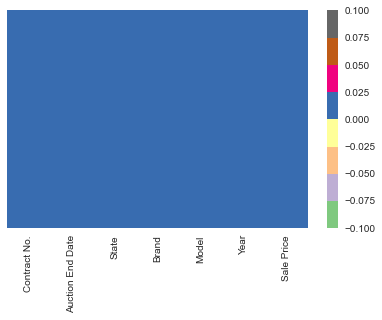

In [361]:
# Checking for null values:
print(df.isnull().sum())

# Heatmap to identify nulll values using graph
sns.heatmap(df.isnull(),yticklabels=False,cbar=True,cmap='Accent')

In [362]:
# Define numeric variable and categorical variable to work separatly on them
num_col=['Year']
cat_cols=['State','Brand','Model']

## Sale Price

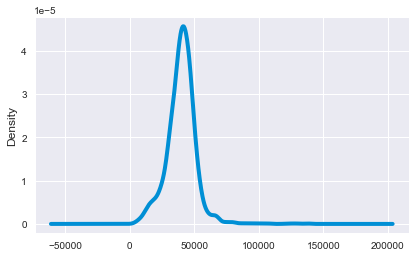

In [363]:
df['Sale Price'].plot(kind='density')

### In the regression model, for any fixed value of X, Y is distributed in this problem data-target value (Sale Price) not normally distributed, it is right skewed.
### To solve this problem, the log transformation on the target variable is applied when it has skewed distribution and we need to apply an inverse function on the predicted values to get the actual predicted target value.

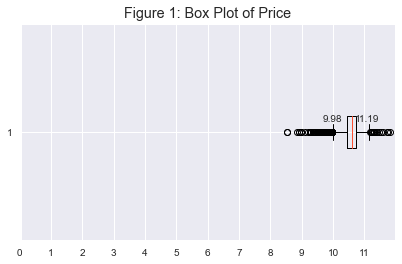

In [364]:
def min_max_price(df):
    r=[]
    q1,q3=(df['Logprice'].quantile([0.25,0.75]))
    r.append(q1-1.5*(q3-q1))
    r.append(q3+1.5*(q3-q1))
    return (r)

df['Logprice'] = np.log(df['Sale Price'])
x=df['Logprice']
price_range=list(range(0,int(max(df['Logprice']))+1))
red_square = dict(markerfacecolor='g', marker='s')
plt.boxplot(x, vert=False)
plt.xticks(price_range)
plt.text(min_max_price(df)[0]-0.3,1.05,str(round(min_max_price(df)[0],2)))
plt.text(min_max_price(df)[1]-0.5,1.05,str(round(min_max_price(df)[1],2)))
plt.title("Figure 1: Box Plot of Price")
plt.savefig('graph-boxplot-price.jpg',dpi=1200)
plt.show()

In [365]:
def outliers(arr,col):
    '''
    The Function will return the range of the numerical variables and the values outside this range will be outliers
    '''
    x=sorted(arr[col].values.ravel())
    L_25=25/100*(len(x)+1) #L_p where p=25%
    i_p=int(str(L_25).split(".")[0])
    f_p=int(str(L_25).split(".")[1])
    q1=x[i_p]+f_p*(x[i_p+1]-x[i_p])
    
    L_75=75/100*(len(x)+1) #L_p where p=75%
    i_p=int(str(L_75).split(".")[0])
    f_p=int(str(L_75).split(".")[1])
    q3=x[i_p]+f_p*(x[i_p+1]-x[i_p])
    
    #q1,q3=(arr[col].quantile([0.25,0.75]))
    
    IQR=q3-q1
    x1=q1-1.5*IQR
    x2=q3+1.5*IQR
    return (x1,x2)

## Year

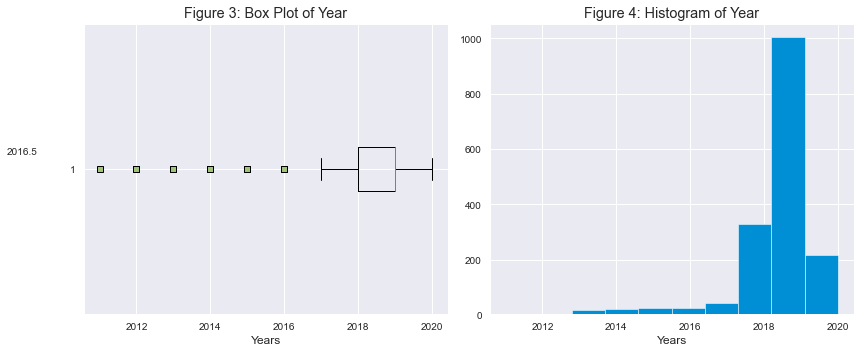

In [366]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))

#ploting boxplot
o1,o2=outliers(df,'Year')
ax1.boxplot(sorted(df['Year']), vert=False, flierprops=red_square)
ax1.set_xlabel("Years")
ax1.set_title("Figure 3: Box Plot of Year")
ax1.text(o1-8,1.05,str(round(o1,2)))

#ploting histogram
hist,bins=np.histogram(df['Year'])
n, bins, patches = ax2.hist(x=df['Year'], bins=bins)
ax2.set_xlabel("Years")
ax2.set_title("Figure 4: Histogram of Year")
for i in range(len(n)):
    if(n[i]>2000):
        ax2.text(bins[i],n[i]+3000,str(n[i]))

plt.tight_layout()
plt.savefig('graph-barplot-histogram-year.jpg',dpi=1200)
plt.show()

# Handling Outliers

## InterQuartile Range (IQR) method is used to remove the outliers from the data

In [367]:
# Removing Outliers 
df_new = df.copy()
out = np.array(['Year','Logprice'])
for col in out:
    o1,o2 = outliers(df_new,col)
    df_new = df_new[(df_new[col]>=o1) & (df_new[col]<=o2)]
    print('IQR of',col,'=',o1,o2)
df_new = df_new[df_new['Sale Price']!=0]
df_new.drop('Logprice',axis=1,inplace=True)

IQR of Year = 2016.5 2020.5
IQR of Logprice = 10.082247198806302 11.135689269892184


In [368]:
df_new.head()

Contract No. Auction End Date              State            Brand  \
0  ORBABJTW06456       2021-01-13             ORISSA             HMSI   
1  ORBUBTTW08001       2021-01-13             ORISSA             HMSI   
3  DHDLPVTW00152       2021-01-11  DELHI AND HARYANA  HERO MOTOR CORP   
4  DHDLLNTW04794       2021-01-11  DELHI AND HARYANA  HERO MOTOR CORP   
5  DHDLKBTW00337       2021-01-11  DELHI AND HARYANA  HERO MOTOR CORP   

              Model  Year  Sale Price  
0  HONDA SHINE DISC  2018       32000  
1      HONDA ACTIVA  2018       40786  
3     SPLENDOR PLUS  2020       45500  
4     SPLENDOR PLUS  2019       38500  
5     SPLENDOR PLUS  2019       38500

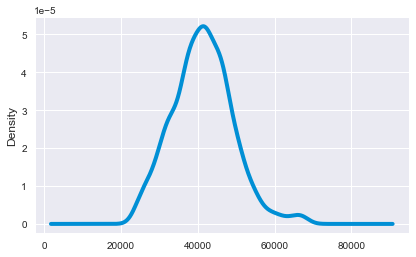

In [369]:
df_new['Sale Price'].plot(kind='density')

## As we can see sale price is normally distributed

## References:
https://towardsdatascience.com/used-car-price-prediction-using-machine-learning-e3be02d977b2

In [370]:
df_new.columns

Index(['Contract No.', 'Auction End Date', 'State', 'Brand', 'Model', 'Year',
       'Sale Price'],
      dtype='object')

## Train and Test Data Splitting

In [371]:
from sklearn.model_selection import train_test_split

In [372]:
X_train, X_test, y_train, y_test = train_test_split(df_new[['State', 'Brand', 'Model','Year']],df_new['Sale Price'],test_size = 0.1,random_state = 0)

In [373]:
X_train.shape, X_test.shape

((1370, 4), (153, 4))

## Categorical Variable Encoding

## Let's Explore Cardinality

In [374]:
# State has 13 labels:
X_train['State'].unique()

array(['TELANGANA', 'RAJASTHAN', 'CENTRAL', 'GUJARAT',
       'DELHI AND HARYANA', 'TAMIL NADU', 'ORISSA', 'ANDHRA PRADESH',
       'KARNATAKA', 'PUNJAB', 'UTTAR PRADESH', 'EAST', 'MAHARASHTRA'],
      dtype=object)

In [375]:
# Brand has 7 labels:
X_train['Brand'].unique()

array(['HMSI', 'HERO MOTOR CORP', 'TVS MOTORS', 'YAMAHA', 'SUZUKI',
       'BAJAJ AUTO LTD', 'PIAGGIO PVT LTD'], dtype=object)

In [376]:
# Model has 93 labels:
X_train['Model'].unique()

array(['HONDA CD110', 'HONDA ACTIVA 5G', 'PASSION PRO', 'SPLENDOR PLUS',
       'HONDA GRAZIA', 'HERO HF DELUXE', 'APACHE 160 RTR', 'HONDA ACTIVA',
       'JUPITER', 'HONDA SHINE', 'YAMAHA FZ S V 2.0', 'LIVO (CBF110G)',
       'PLEASURE', 'DREAM CD 110 DRUM', 'SPLENDOR', 'HONDA AVIATOR',
       'ACCESS 125', 'TVS XL SUPER HD', 'GLAMOUR', 'JUPITER CLASSIC',
       'TVS STAR SPORTS', 'GIXXER 155 CC', 'HONDA ACTIVA I',
       'HONDA SHINE DRUM', 'HONDA DIO', 'NTORQ', 'SUZUKI',
       'TVS APACHE RTR 160 4V FI ABS', 'DREAM YUGA', 'HONDA SHINE SP',
       'HONDA ACTIVA 125', 'SUPER SPLANDER', 'MAESTRO EDGE', 'PLATINA',
       'JUPITER DISC', 'TVS XL SUPER', 'HONDA UNICORN', 'APACHE 180',
       'MAESTRO', 'TVS SCOOTY PEP PLUS', 'HONDA SHINE DISC',
       'CBZ XTREME (SS)', 'HERO DESTINI 125 VX', 'TVS STAR CITY', 'ALPHA',
       'JUPITER BASE', 'HONDA DREAM', 'TVS JUPITER', 'HONDA ACTIVA 4G',
       'PULSAR 150CC DTSI', 'FZ S', 'BURGMAN STREET', 'TVS RADEON',
       'TVS VICTOR', 'DREAM YUGA

## 1. One Hot Encoding

One hot encoding, consists in encoding each categorical variable with different boolean variables (also called dummy variables) which take values 0 or 1, indicating if a category is present in an observation.

For example, for the categorical variable "Gender", with labels 'female' and 'male', we can generate the boolean variable "female", which takes 1 if the person is 'female' or 0 otherwise, or we can generate the variable "male", which takes 1 if the person is 'male' and 0 otherwise.

For the categorical variable "colour" with values 'red', 'blue' and 'green', we can create 3 new variables called "red", "blue" and "green". These variables will take the value 1, if the observation is of the said colour or 0 otherwise. 


### Encoding into k-1 dummy variables

Note however, that for the variable "colour", by creating 2 binary variables, say "red" and "blue", we already encode **ALL** the information:

- if the observation is red, it will be captured by the variable "red" (red = 1, blue = 0)
- if the observation is blue, it will be captured by the variable "blue" (red = 0, blue = 1)
- if the observation is green, it will be captured by the combination of "red" and "blue" (red = 0, blue = 0)

We do not need to add a third variable "green" to capture that the observation is green.

More generally, a categorical variable should be encoded by creating k-1 binary variables, where k is the number of distinct categories. In the case of gender, k=2 (male / female), therefore we need to create only 1 (k - 1 = 1) binary variable. In the case of colour, which has 3 different categories (k=3), we need to create 2 (k - 1 = 2) binary variables to capture all the information.

One hot encoding into k-1 binary variables takes into account that we can use 1 less dimension and still represent the whole information: if the observation is 0 in all the binary variables, then it must be 1 in the final (not present) binary variable.

**When one hot encoding categorical variables, we create k - 1 binary variables**


Most machine learning algorithms, consider the entire data set while being fit. Therefore, encoding categorical variables into k - 1 binary variables, is better, as it avoids introducing redundant information.


### Exception: One hot encoding into k dummy variables

There are a few occasions when it is better to encode variables into k dummy variables:

- when building tree based algorithms
- when doing feature selection by recursive algorithms
- when interested in determine the importance of each single category

Tree based algorithms, as opposed to the majority of machine learning algorithms, **do not** evaluate the entire dataset while being trained. They randomly extract a subset of features from the data set at each node for each tree. Therefore, if we want a tree based algorithm to consider **all** the categories, we need to encode categorical variables into **k binary variables**.

If we are planning to do feature selection by recursive elimination (or addition), or if we want to evaluate the importance of each single category of the categorical variable, then we will also need the entire set of binary variables (k) to let the machine learning model select which ones have the most predictive power.


### Advantages of one hot encoding

- Straightforward to implement
- Makes no assumption about the distribution or categories of the categorical variable
- Keeps all the information of the categorical variable
- Suitable for linear models

### Limitations

- Expands the feature space
- Does not add extra information while encoding
- Many dummy variables may be identical, introducing redundant information

In [377]:
# For one hot encoding with feature-engine
from feature_engine.encoding import OneHotEncoder

In [378]:
ohe_enc = OneHotEncoder(
    top_categories=None,
    variables=['State', 'Brand','Model'])# we can select which variables to encode


ohe_enc.fit(X_train)

OneHotEncoder(drop_last=False, top_categories=None,
              variables=['State', 'Brand', 'Model'])

In [379]:
ohe_enc.variables

['State', 'Brand', 'Model']

In [380]:
ohe_enc_train = ohe_enc.transform(X_train)

ohe_enc_train.head()

Year  State_TELANGANA  State_RAJASTHAN  State_CENTRAL  State_GUJARAT  \
482   2019                1                0              0              0   
1507  2019                0                1              0              0   
1340  2019                0                1              0              0   
451   2017                0                0              1              0   
1603  2018                0                1              0              0   

      State_DELHI AND HARYANA  State_TAMIL NADU  State_ORISSA  \
482                         0                 0             0   
1507                        0                 0             0   
1340                        0                 0             0   
451                         0                 0             0   
1603                        0                 0             0   

      State_ANDHRA PRADESH  State_KARNATAKA  ...  Model_ACCESS SPL DISC  \
482                      0                0  ...                      0   
1507                     0                0  ...                      0   
1340                     0                0  ...                      0   
451                      0                0  ...                      0   
1603                     0                0  ...                      0   

      Model_VESPA NOTTE 125  Model_WEGO  Model_HONDA TWISTER  \
482                       0           0                    0   
1507                      0           0                    0   
1340                      0           0                    0   
451                       0           0                    0   
1603                      0           0                    0   

      Model_HONDA AVIATOR DRUM  Model_APACHE 180 RTR  \
482                          0                     0   
1507                         0                     0   
1340                         0                     0   
451                          0                     0   
1603                         0                     0   

      Model_HONDA X BLADE FS JID  Model_APACHE RTR 200  Model_ACTIVA 6  \
482                            0                     0               0   
1507                           0                     0               0   
1340                           0                     0               0   
451                            0                     0               0   
1603                           0                     0               0   

      Model_X-TREAM-DISC SELF  
482                         0  
1507                        0  
1340                        0  
451                         0  
1603                        0  

[5 rows x 114 columns]

In [381]:
ohe_enc_test = ohe_enc.transform(X_test)

ohe_enc_test.head()

Year  State_TELANGANA  State_RAJASTHAN  State_CENTRAL  State_GUJARAT  \
1369  2019                0                1              0              0   
1116  2019                0                1              0              0   
10    2018                0                0              0              0   
318   2019                0                0              0              0   
308   2019                1                0              0              0   

      State_DELHI AND HARYANA  State_TAMIL NADU  State_ORISSA  \
1369                        0                 0             0   
1116                        0                 0             0   
10                          1                 0             0   
318                         0                 0             0   
308                         0                 0             0   

      State_ANDHRA PRADESH  State_KARNATAKA  ...  Model_ACCESS SPL DISC  \
1369                     0                0  ...                      0   
1116                     0                0  ...                      0   
10                       0                0  ...                      0   
318                      1                0  ...                      0   
308                      0                0  ...                      0   

      Model_VESPA NOTTE 125  Model_WEGO  Model_HONDA TWISTER  \
1369                      0           0                    0   
1116                      0           0                    0   
10                        0           0                    0   
318                       0           0                    0   
308                       0           0                    0   

      Model_HONDA AVIATOR DRUM  Model_APACHE 180 RTR  \
1369                         0                     0   
1116                         0                     0   
10                           0                     0   
318                          0                     0   
308                          0                     0   

      Model_HONDA X BLADE FS JID  Model_APACHE RTR 200  Model_ACTIVA 6  \
1369                           0                     0               0   
1116                           0                     0               0   
10                             0                     0               0   
318                            0                     0               0   
308                            0                     0               0   

      Model_X-TREAM-DISC SELF  
1369                        0  
1116                        0  
10                          0  
318                         0  
308                         0  

[5 rows x 114 columns]

## 2. One Hot Encoding of Frequent Categories

High cardinality and rare labels may result in certain categories appearing only in the train set, therefore causing over-fitting, or only in the test set, and then our models wouldn't know how to score those observations.

One hot encoding, that if categorical variables contain multiple labels, then by re-encoding them with dummy variables we will expand the feature space dramatically.

**In order to avoid these complications, we can create dummy variables only for the most frequent categories**

This procedure is also called one hot encoding of top categories.

In fact, in the winning solution of the KDD 2009 cup: ["Winning the KDD Cup Orange Challenge with Ensemble Selection"](http://www.mtome.com/Publications/CiML/CiML-v3-book.pdf), the authors limit one hot encoding to the 10 most frequent labels of the variable. This means that they would make one binary variable for each of the 10 most frequent labels only.

OHE of frequent or top categories is equivalent to grouping all the remaining categories under a new category.


### Advantages of OHE of top categories

- Straightforward to implement
- Does not require hrs of variable exploration
- Does not expand massively the feature space
- Suitable for linear models


### Limitations

- Does not add any information that may make the variable more predictive
- Does not keep the information of the ignored labels

In [382]:
# For one hot encoding with feature-engine
from feature_engine.encoding import OneHotEncoder

In [383]:
ohe_enc = OneHotEncoder(
    top_categories=10,  # you can change this value to select more or less variables
    # we can select which variables to encode
    variables=['State', 'Brand', 'Model'],
    drop_last=False)

ohe_enc.fit(X_train)

OneHotEncoder(drop_last=False, top_categories=10,
              variables=['State', 'Brand', 'Model'])

In [384]:
# In the encoder dict we can observe each of the top categories
# Selected for each of the variables

ohe_enc.encoder_dict_

{'State': ['RAJASTHAN',
  'GUJARAT',
  'TELANGANA',
  'CENTRAL',
  'ANDHRA PRADESH',
  'DELHI AND HARYANA',
  'TAMIL NADU',
  'KARNATAKA',
  'ORISSA',
  'UTTAR PRADESH'],
 'Brand': ['HMSI',
  'HERO MOTOR CORP',
  'TVS MOTORS',
  'SUZUKI',
  'YAMAHA',
  'BAJAJ AUTO LTD',
  'PIAGGIO PVT LTD'],
 'Model': ['HONDA ACTIVA 5G',
  'SPLENDOR PLUS',
  'HERO HF DELUXE',
  'HONDA SHINE',
  'HONDA CD110',
  'ACCESS 125',
  'HONDA DIO',
  'GLAMOUR',
  'PASSION PRO',
  'HONDA ACTIVA']}

In [385]:
# This is the list of variables that the encoder will transform
ohe_enc.variables

['State', 'Brand', 'Model']

In [386]:
ohe_enc_train_top = ohe_enc.transform(X_train)
ohe_enc_test_top = ohe_enc.transform(X_test)

# let's explore the result
ohe_enc_train_top.head()

Year  State_RAJASTHAN  State_GUJARAT  State_TELANGANA  State_CENTRAL  \
482   2019                0              0                1              0   
1507  2019                1              0                0              0   
1340  2019                1              0                0              0   
451   2017                0              0                0              1   
1603  2018                1              0                0              0   

      State_ANDHRA PRADESH  State_DELHI AND HARYANA  State_TAMIL NADU  \
482                      0                        0                 0   
1507                     0                        0                 0   
1340                     0                        0                 0   
451                      0                        0                 0   
1603                     0                        0                 0   

      State_KARNATAKA  State_ORISSA  ...  Model_HONDA ACTIVA 5G  \
482                 0             0  ...                      0   
1507                0             0  ...                      1   
1340                0             0  ...                      0   
451                 0             0  ...                      0   
1603                0             0  ...                      1   

      Model_SPLENDOR PLUS  Model_HERO HF DELUXE  Model_HONDA SHINE  \
482                     0                     0                  0   
1507                    0                     0                  0   
1340                    0                     0                  0   
451                     1                     0                  0   
1603                    0                     0                  0   

      Model_HONDA CD110  Model_ACCESS 125  Model_HONDA DIO  Model_GLAMOUR  \
482                   1                 0                0              0   
1507                  0                 0                0              0   
1340                  0                 0                0              0   
451                   0                 0                0              0   
1603                  0                 0                0              0   

      Model_PASSION PRO  Model_HONDA ACTIVA  
482                   0                   0  
1507                  0                   0  
1340                  1                   0  
451                   0                   0  
1603                  0                   0  

[5 rows x 28 columns]

## 3. Count or frequency encoding

In count encoding we replace the categories by the count of the observations that show that category in the dataset. Similarly, we can replace the category by the frequency -or percentage- of observations in the dataset. That is, if 10 of our 100 observations show the colour blue, we would replace blue by 10 if doing count encoding, or by 0.1 if replacing by the frequency. These techniques capture the representation of each label in a dataset, but the encoding may not necessarily be predictive of the outcome. These are however, very popular encoding methods in Kaggle competitions.

The assumption of this technique is that the number observations shown by each variable is somewhat informative of the predictive power of the category.


### Advantages

- Simple
- Does not expand the feature space

### Disadvantages

- If 2 different categories appear the same amount of times in the dataset, that is, they appear in the same number of observations, they will be replaced by the same number: may lose valuable information.

In [387]:
# To encode with feature-engine
from feature_engine.encoding import CountFrequencyEncoder

### Count Encoding

In [388]:
count_enc = CountFrequencyEncoder(
    encoding_method='count', # to do frequency ==> encoding_method='frequency'
    variables=['State', 'Brand', 'Model'])

count_enc.fit(X_train)

CountFrequencyEncoder(encoding_method='count',
                      variables=['State', 'Brand', 'Model'])

In [389]:
# in the encoder dict we can observe the number of 
# observations per category for each variable

count_enc.encoder_dict_

{'State': {'RAJASTHAN': 554,
  'GUJARAT': 276,
  'TELANGANA': 206,
  'CENTRAL': 66,
  'ANDHRA PRADESH': 52,
  'DELHI AND HARYANA': 45,
  'TAMIL NADU': 45,
  'KARNATAKA': 42,
  'ORISSA': 38,
  'UTTAR PRADESH': 21,
  'EAST': 19,
  'PUNJAB': 5,
  'MAHARASHTRA': 1},
 'Brand': {'HMSI': 647,
  'HERO MOTOR CORP': 525,
  'TVS MOTORS': 115,
  'SUZUKI': 54,
  'YAMAHA': 18,
  'BAJAJ AUTO LTD': 10,
  'PIAGGIO PVT LTD': 1},
 'Model': {'HONDA ACTIVA 5G': 292,
  'SPLENDOR PLUS': 202,
  'HERO HF DELUXE': 179,
  'HONDA SHINE': 80,
  'HONDA CD110': 47,
  'ACCESS 125': 40,
  'HONDA DIO': 38,
  'GLAMOUR': 31,
  'PASSION PRO': 28,
  'HONDA ACTIVA': 22,
  'HONDA ACTIVA 125': 22,
  'JUPITER': 21,
  'SPLENDOR': 19,
  'DREAM CD 110 DRUM': 18,
  'HONDA SHINE SP': 17,
  'LIVO (CBF110G)': 17,
  'HONDA SHINE DRUM': 14,
  'HONDA ACTIVA 4G': 13,
  'SUPER SPLANDER': 11,
  'DREAM YUGA': 10,
  'HONDA SHINE DISC': 10,
  'TVS RADEON': 10,
  'HONDA GRAZIA': 10,
  'MAESTRO EDGE': 9,
  'PLEASURE': 9,
  'HERO DESTINI 125 VX'

In [390]:
count_enc_train = count_enc.transform(X_train)
count_enc_test = count_enc.transform(X_test)

# let's explore the result
count_enc_train.head()

State  Brand  Model  Year
482     206    647     47  2019
1507    554    647    292  2019
1340    554    525     28  2019
451      66    525    202  2017
1603    554    647    292  2018

### Frequency Encoding

In [391]:
frequency_enc = CountFrequencyEncoder(
    encoding_method='frequency', # to do count ==> encoding_method='count'
    variables=['State', 'Brand', 'Model'])

frequency_enc.fit(X_train)

CountFrequencyEncoder(encoding_method='frequency',
                      variables=['State', 'Brand', 'Model'])

In [392]:
# In the encoder dict we can observe the number of 
# Frequency per category for each variable

frequency_enc.encoder_dict_

{'State': {'RAJASTHAN': 0.4043795620437956,
  'GUJARAT': 0.20145985401459854,
  'TELANGANA': 0.15036496350364964,
  'CENTRAL': 0.04817518248175182,
  'ANDHRA PRADESH': 0.03795620437956204,
  'DELHI AND HARYANA': 0.032846715328467155,
  'TAMIL NADU': 0.032846715328467155,
  'KARNATAKA': 0.030656934306569343,
  'ORISSA': 0.027737226277372264,
  'UTTAR PRADESH': 0.015328467153284672,
  'EAST': 0.013868613138686132,
  'PUNJAB': 0.0036496350364963502,
  'MAHARASHTRA': 0.00072992700729927},
 'Brand': {'HMSI': 0.47226277372262776,
  'HERO MOTOR CORP': 0.38321167883211676,
  'TVS MOTORS': 0.08394160583941605,
  'SUZUKI': 0.03941605839416058,
  'YAMAHA': 0.013138686131386862,
  'BAJAJ AUTO LTD': 0.0072992700729927005,
  'PIAGGIO PVT LTD': 0.00072992700729927},
 'Model': {'HONDA ACTIVA 5G': 0.21313868613138687,
  'SPLENDOR PLUS': 0.14744525547445256,
  'HERO HF DELUXE': 0.13065693430656936,
  'HONDA SHINE': 0.058394160583941604,
  'HONDA CD110': 0.034306569343065696,
  'ACCESS 125': 0.0291970802

In [393]:
frequency_enc_train = frequency_enc.transform(X_train)
frequency_enc_test = frequency_enc.transform(X_test)

# let's explore the result
frequency_enc_train.head()

State     Brand     Model  Year
482   0.150365  0.472263  0.034307  2019
1507  0.404380  0.472263  0.213139  2019
1340  0.404380  0.383212  0.020438  2019
451   0.048175  0.383212  0.147445  2017
1603  0.404380  0.472263  0.213139  2018

## 4. Integer Encoding

Integer encoding consist in replacing the categories by digits from 1 to n (or 0 to n-1, depending the implementation), where n is the number of distinct categories of the variable.

The numbers are assigned arbitrarily. This encoding method allows for quick benchmarking of machine learning models. 


### Advantages

- Straightforward to implement
- Does not expand the feature space


### Limitations

- Does not capture any information about the categories labels
- Not suitable for linear models.

Integer encoding is better suited for non-linear methods which are able to navigate through the arbitrarily assigned digits to try and find patters that relate them to the target.

In [394]:
# for integer encoding using feature-engine
from feature_engine.encoding import OrdinalEncoder

In [395]:
ordinal_enc = OrdinalEncoder(
    encoding_method='arbitrary',
    variables=['State', 'Brand', 'Model'])

ordinal_enc.fit(X_train)

OrdinalEncoder(encoding_method='arbitrary',
               variables=['State', 'Brand', 'Model'])

In [396]:
# in the encoder dict we can observe the numbers
# assigned to each category for all the indicated variables

ordinal_enc.encoder_dict_

{'State': {'TELANGANA': 0,
  'RAJASTHAN': 1,
  'CENTRAL': 2,
  'GUJARAT': 3,
  'DELHI AND HARYANA': 4,
  'TAMIL NADU': 5,
  'ORISSA': 6,
  'ANDHRA PRADESH': 7,
  'KARNATAKA': 8,
  'PUNJAB': 9,
  'UTTAR PRADESH': 10,
  'EAST': 11,
  'MAHARASHTRA': 12},
 'Brand': {'HMSI': 0,
  'HERO MOTOR CORP': 1,
  'TVS MOTORS': 2,
  'YAMAHA': 3,
  'SUZUKI': 4,
  'BAJAJ AUTO LTD': 5,
  'PIAGGIO PVT LTD': 6},
 'Model': {'HONDA CD110': 0,
  'HONDA ACTIVA 5G': 1,
  'PASSION PRO': 2,
  'SPLENDOR PLUS': 3,
  'HONDA GRAZIA': 4,
  'HERO HF DELUXE': 5,
  'APACHE 160 RTR': 6,
  'HONDA ACTIVA': 7,
  'JUPITER': 8,
  'HONDA SHINE': 9,
  'YAMAHA FZ S V 2.0': 10,
  'LIVO (CBF110G)': 11,
  'PLEASURE': 12,
  'DREAM CD 110 DRUM': 13,
  'SPLENDOR': 14,
  'HONDA AVIATOR': 15,
  'ACCESS 125': 16,
  'TVS XL SUPER HD': 17,
  'GLAMOUR': 18,
  'JUPITER CLASSIC': 19,
  'TVS STAR SPORTS': 20,
  'GIXXER 155 CC': 21,
  'HONDA ACTIVA I': 22,
  'HONDA SHINE DRUM': 23,
  'HONDA DIO': 24,
  'NTORQ': 25,
  'SUZUKI': 26,
  'TVS APACHE 

In [397]:
# this is the list of variables that the encoder will transform

ordinal_enc.variables

['State', 'Brand', 'Model']

In [398]:
int_enc_train = ordinal_enc.transform(X_train)
int_enc_test = ordinal_enc.transform(X_test)

# let's explore the result
int_enc_train.head()

State  Brand  Model  Year
482       0      0      0  2019
1507      1      0      1  2019
1340      1      1      2  2019
451       2      1      3  2017
1603      1      0      1  2018

## 5. Target guided encodings

In the previous lectures in this section, we learned how to convert a label into a number, by using one hot encoding, replacing by a digit or replacing by frequency or counts of observations. These methods are simple, make (almost) no assumptions and work generally well in different scenarios.

There are however methods that allow us to capture information while pre-processing the labels of categorical variables. These methods include:

- Ordering the labels according to the target
- Replacing labels by the target mean (mean encoding / target encoding)
- Replacing the labels by the probability ratio of the target being 1 or 0
- Weight of evidence.

All of the above methods have something in common:

- the encoding is **guided by the target**, and
- they create a **monotonic relationship** between the variable and the target.


### Monotonicity

A monotonic relationship is a relationship that does one of the following:

- (1) as the value of one variable increases, so does the value of the other variable; or
- (2) as the value of one variable increases, the value of the other variable decreases.

In this case, as the value of the independent variable (predictor) increases, so does the target, or conversely, as the value of the variable increases, the target value decreases.



### Advantages of target guided encodings

- Capture information within the category, therefore creating more predictive features
- Create a monotonic relationship between the variable and the target, therefore suitable for linear models
- Do not expand the feature space


### Limitations

- Prone to cause over-fitting
- Difficult to cross-validate with current libraries

## Ordered Integer Encoding

Ordering the categories according to the target means assigning a number to the category from 1 to k, where k is the number of distinct categories in the variable, but this numbering is informed by the mean of the target for each category.

For example, we have the variable city with values London, Manchester and Bristol; if the default rate is 30% in London, 20% in Bristol and 10% in Manchester, then we replace London by 1, Bristol by 2 and Manchester by 3.

In [399]:
# for encoding with feature-engine
from feature_engine.encoding import OrdinalEncoder

### Explore original relationship between categorical variables and target

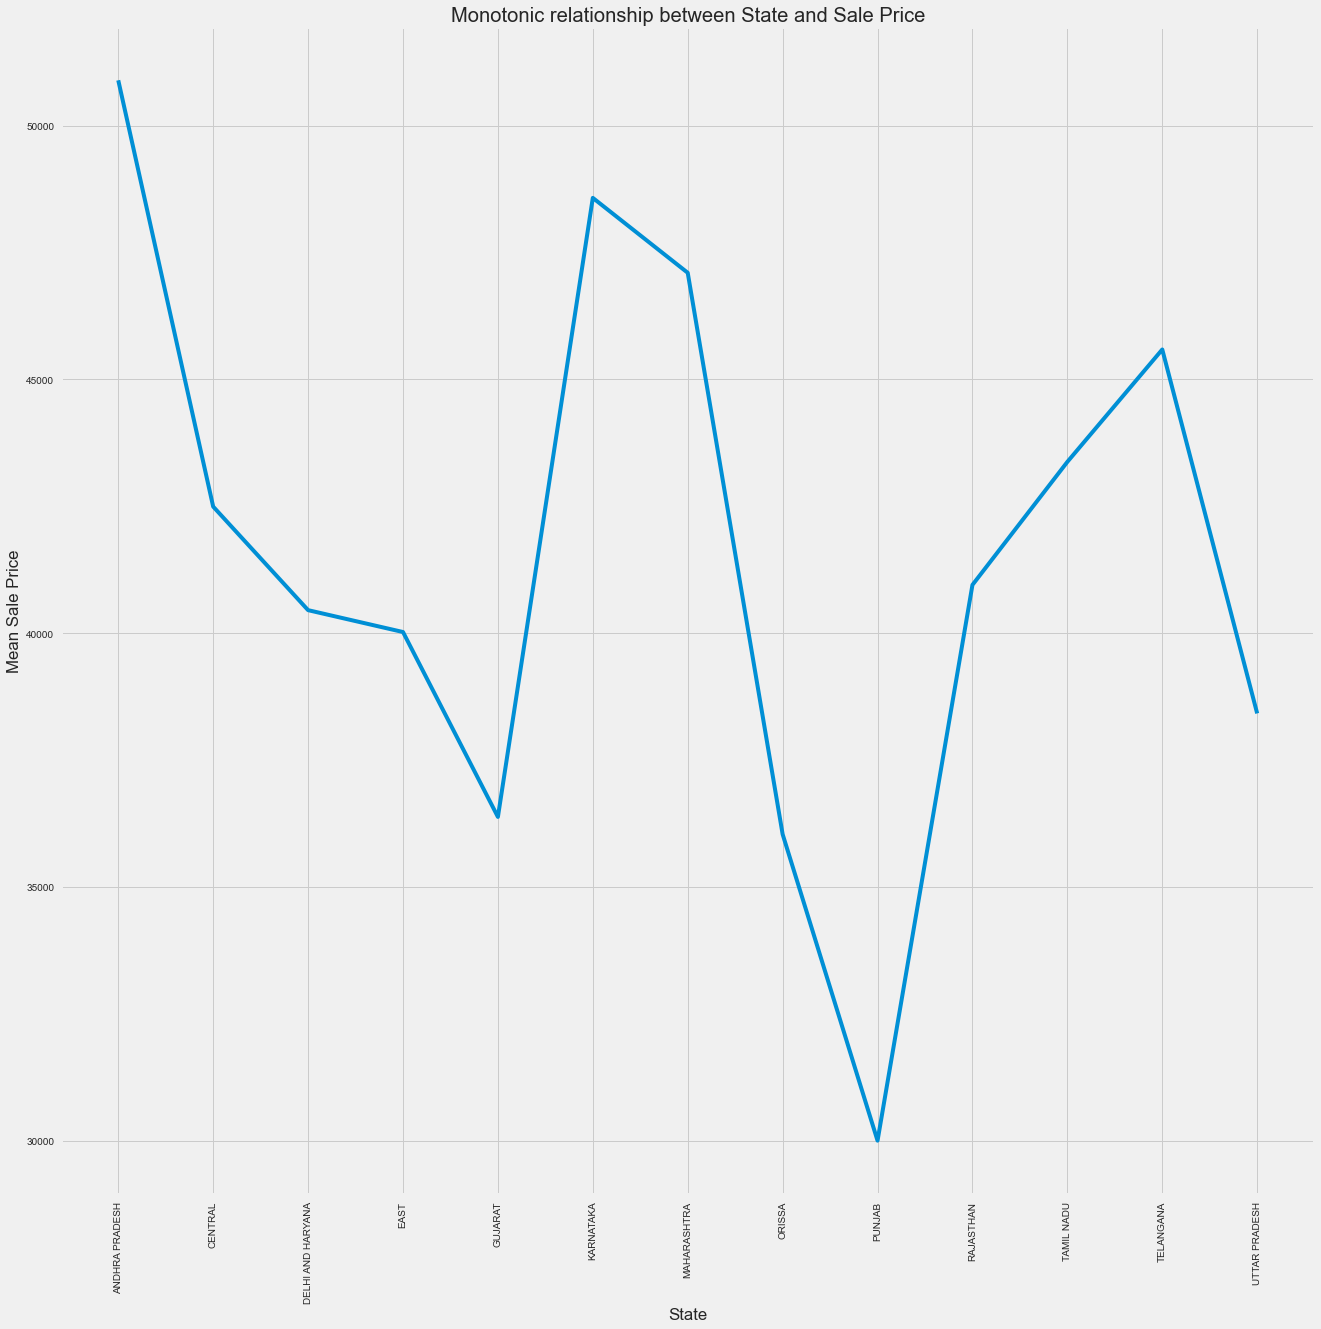

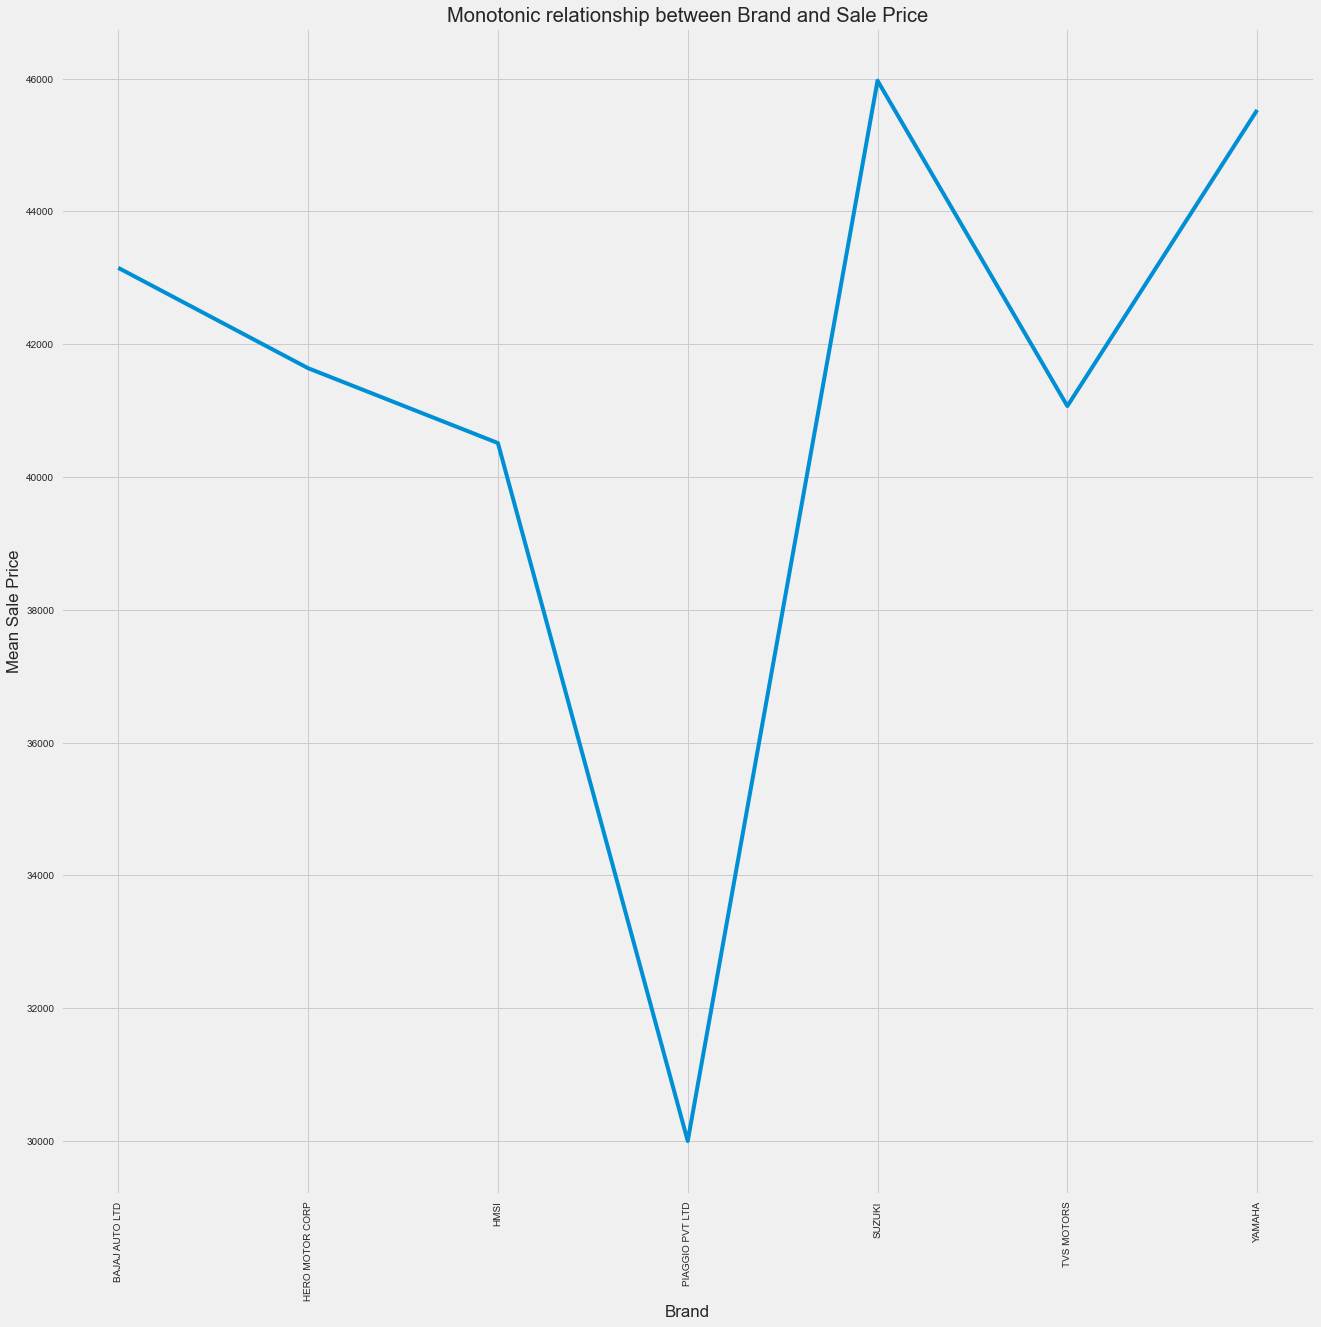

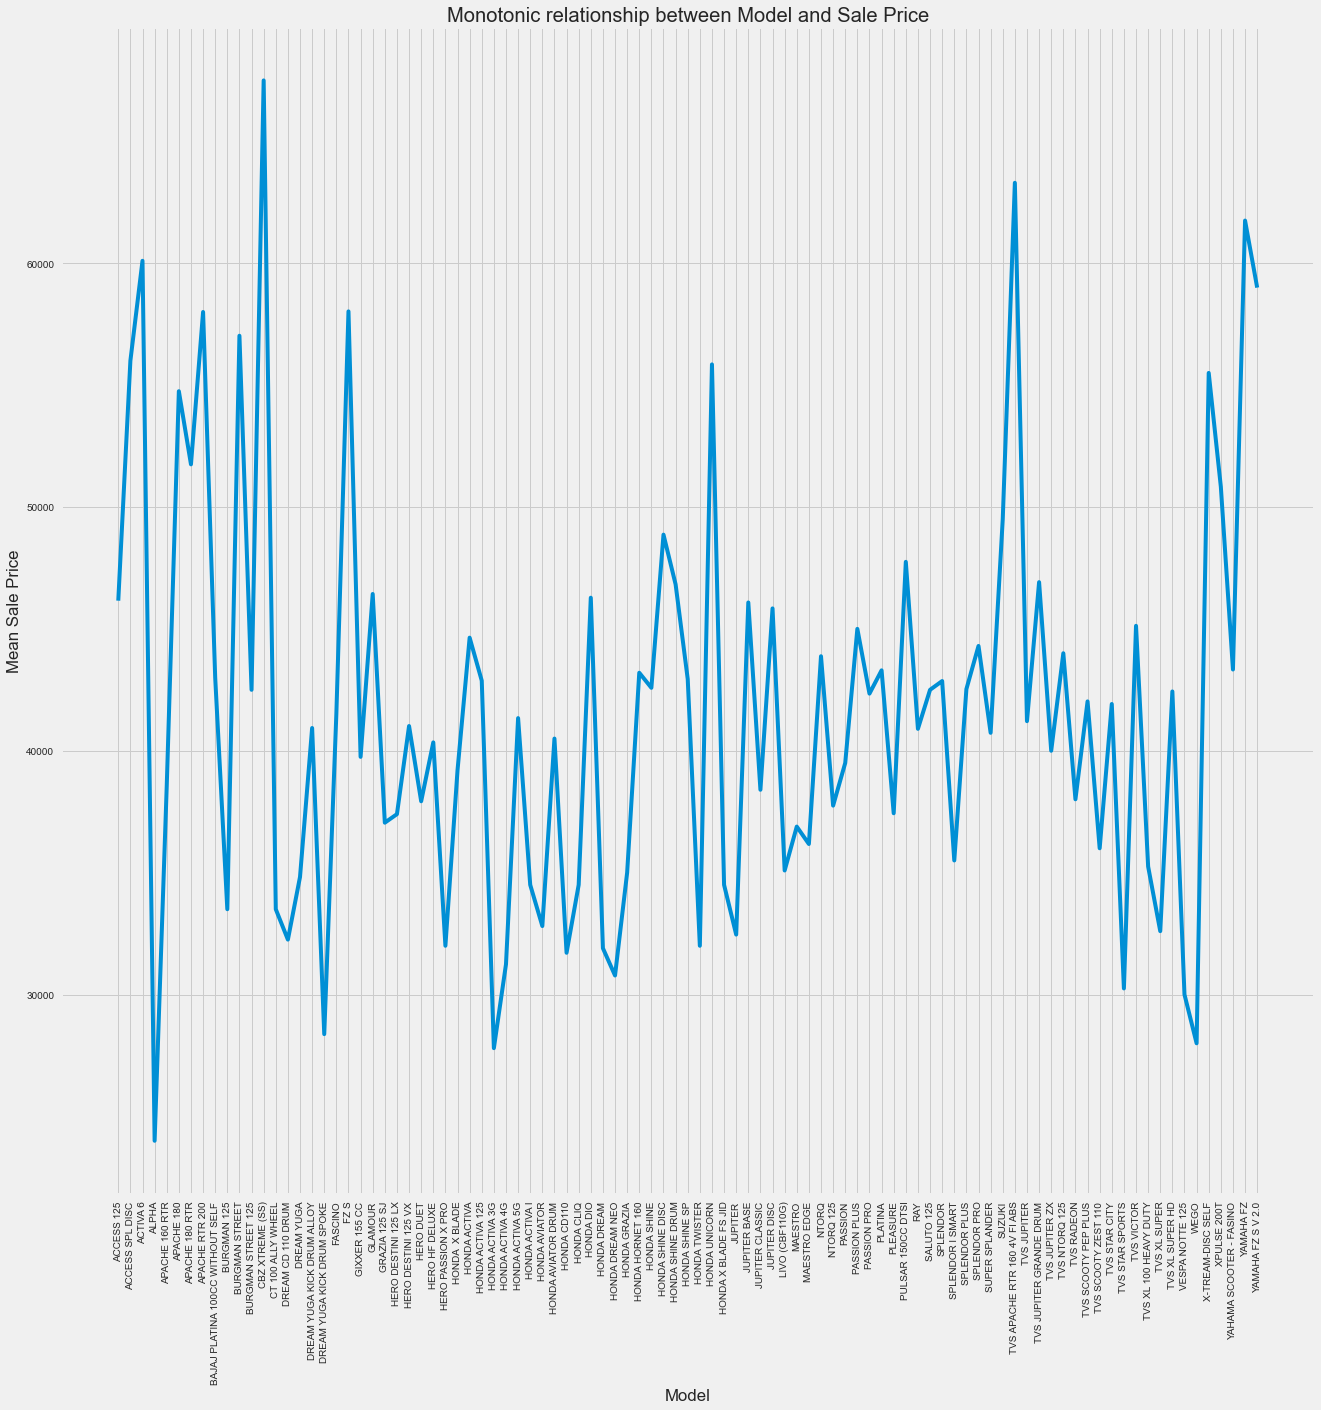

In [740]:
# let's explore the relationship of the categories with the target
for var in ['State', 'Brand', 'Model']:
    plt.figure(figsize=(20,20))
    x = df_new.groupby([var])['Sale Price'].mean().index
    y = df_new.groupby([var])['Sale Price'].mean().values
    plt.title('Monotonic relationship between {} and Sale Price'.format(var))
    plt.xlabel(var)
    plt.ylabel('Mean Sale Price')
    plt.plot(x,y)
    plt.xticks(rotation=90)
    plt.show()

You can see that the relationship between the target and the categories of the categorical variables goes up and down, depending on the category.

In [741]:
ordinal_enc = OrdinalEncoder(
    # NOTE that we indicate ordered in the encoding_method, otherwise it assings numbers arbitrarily
    encoding_method='ordered',
    variables=['State', 'Brand', 'Model'])

In [742]:
# when fitting the transformer, we need to pass the target as well
# just like with any Scikit-learn predictor class

ordinal_enc.fit(X_train, y_train)

OrdinalEncoder(encoding_method='ordered', variables=['State', 'Brand', 'Model'])

In [743]:
# in the encoder dict we can observe each of the top categories
# selected for each of the variables

ordinal_enc.encoder_dict_

{'State': {'PUNJAB': 0,
  'ORISSA': 1,
  'GUJARAT': 2,
  'UTTAR PRADESH': 3,
  'EAST': 4,
  'DELHI AND HARYANA': 5,
  'RAJASTHAN': 6,
  'CENTRAL': 7,
  'TAMIL NADU': 8,
  'TELANGANA': 9,
  'MAHARASHTRA': 10,
  'KARNATAKA': 11,
  'ANDHRA PRADESH': 12},
 'Brand': {'PIAGGIO PVT LTD': 0,
  'TVS MOTORS': 1,
  'HMSI': 2,
  'HERO MOTOR CORP': 3,
  'BAJAJ AUTO LTD': 4,
  'YAMAHA': 5,
  'SUZUKI': 6},
 'Model': {'ALPHA': 0,
  'HONDA ACTIVA 3G': 1,
  'WEGO': 2,
  'DREAM YUGA KICK DRUM SPOKE': 3,
  'HONDA DREAM': 4,
  'VESPA NOTTE 125': 5,
  'TVS STAR SPORTS': 6,
  'HONDA ACTIVA 4G': 7,
  'HONDA CD110': 8,
  'HONDA TWISTER': 9,
  'HERO PASSION X PRO': 10,
  'DREAM CD 110 DRUM': 11,
  'JUPITER': 12,
  'TVS XL SUPER': 13,
  'APACHE 160 RTR': 14,
  'GRAZIA 125 SJ': 15,
  'BURGMAN 125': 16,
  'CT 100 ALLY WHEEL': 17,
  'HONDA AVIATOR': 18,
  'HONDA ACTIVA I': 19,
  'HONDA X BLADE FS JID': 20,
  'HONDA CLIQ': 21,
  'DREAM YUGA': 22,
  'MAESTRO EDGE': 23,
  'MAESTRO': 24,
  'HONDA GRAZIA': 25,
  'HONDA 

In [770]:
from sklearn.externals import joblib 
  
# Save the model as a pickle in a file 
joblib.dump(ordinal_enc, 'ordinal_enc.pkl') 
  
# Load the model from the file 
ordinal_from_joblib = joblib.load('ordinal_enc.pkl')  
  
# Use the loaded model to make transfromations 
ordinal_from_joblib.transform(pd.DataFrame(data=[['CENTRAL', 'HERO MOTOR CORP', 'PASSION PRO', 2019]],columns=['State','Brand','Model','Year']))

State  Brand  Model  Year
0      7      3     49  2019

In [404]:
# this is the list of variables that the encoder will transform

ordinal_enc.variables

['State', 'Brand', 'Model']

In [405]:
ordered_int_enc_train = ordinal_enc.transform(X_train)
ordered_int_enc_test = ordinal_enc.transform(X_test)

# let's explore the result
ordered_int_enc_train.head()

State  Brand  Model  Year
482       9      2      8  2019
1507      6      2     45  2019
1340      6      3     49  2019
451       7      3     53  2017
1603      6      2     45  2018

In [406]:
encoded_df = pd.concat([ordered_int_enc_train,y_train],axis=1)

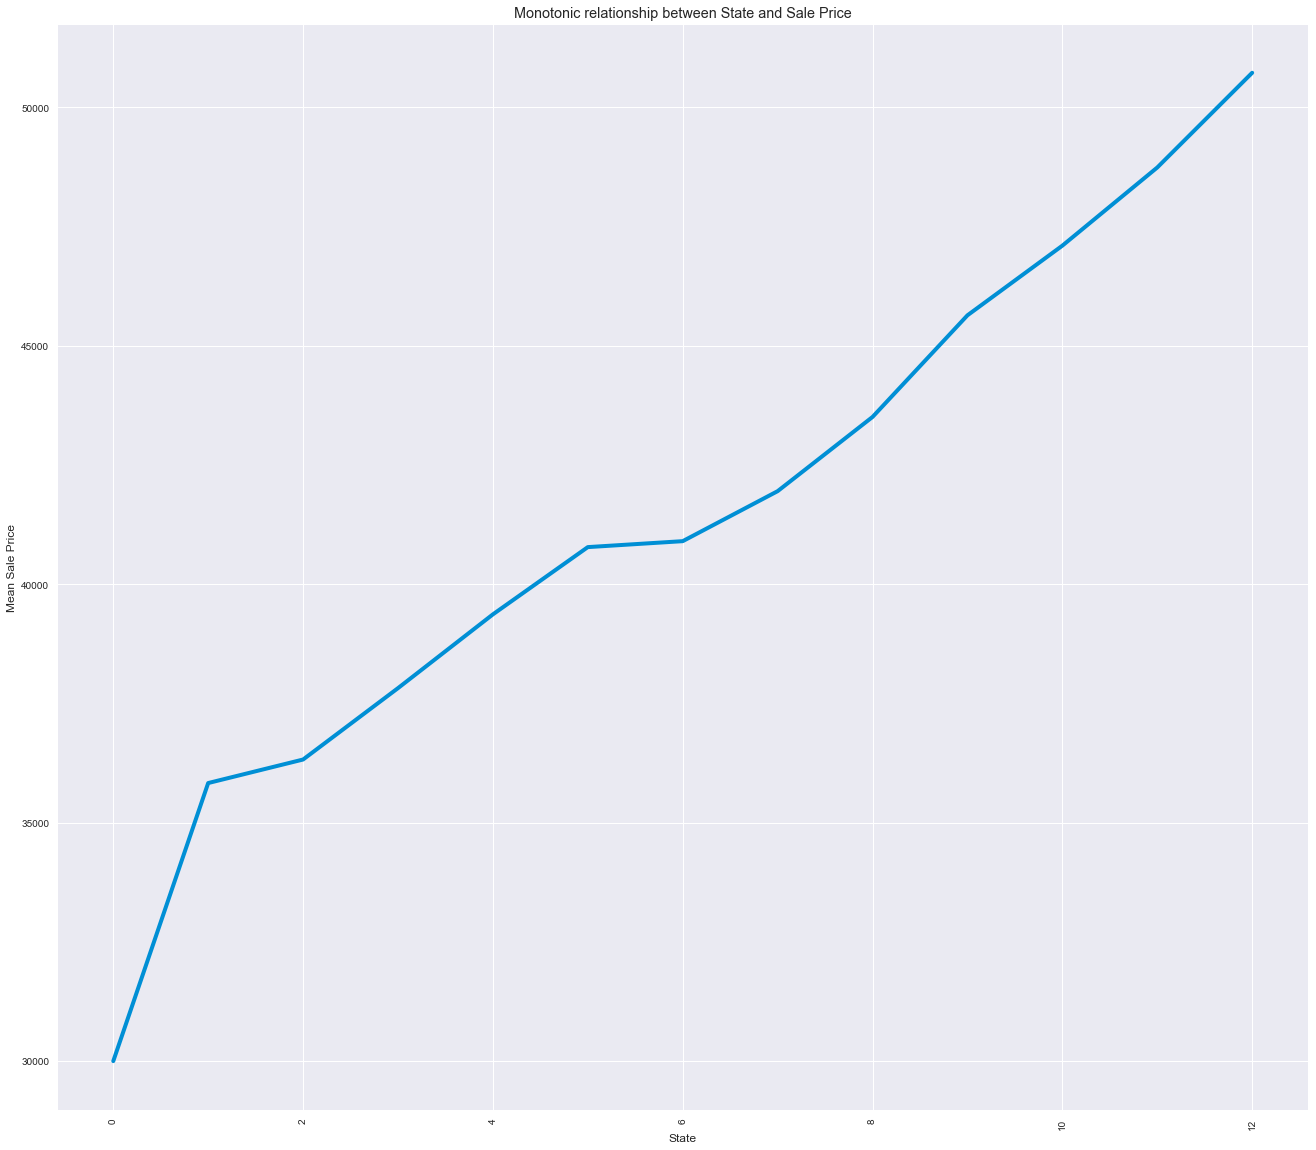

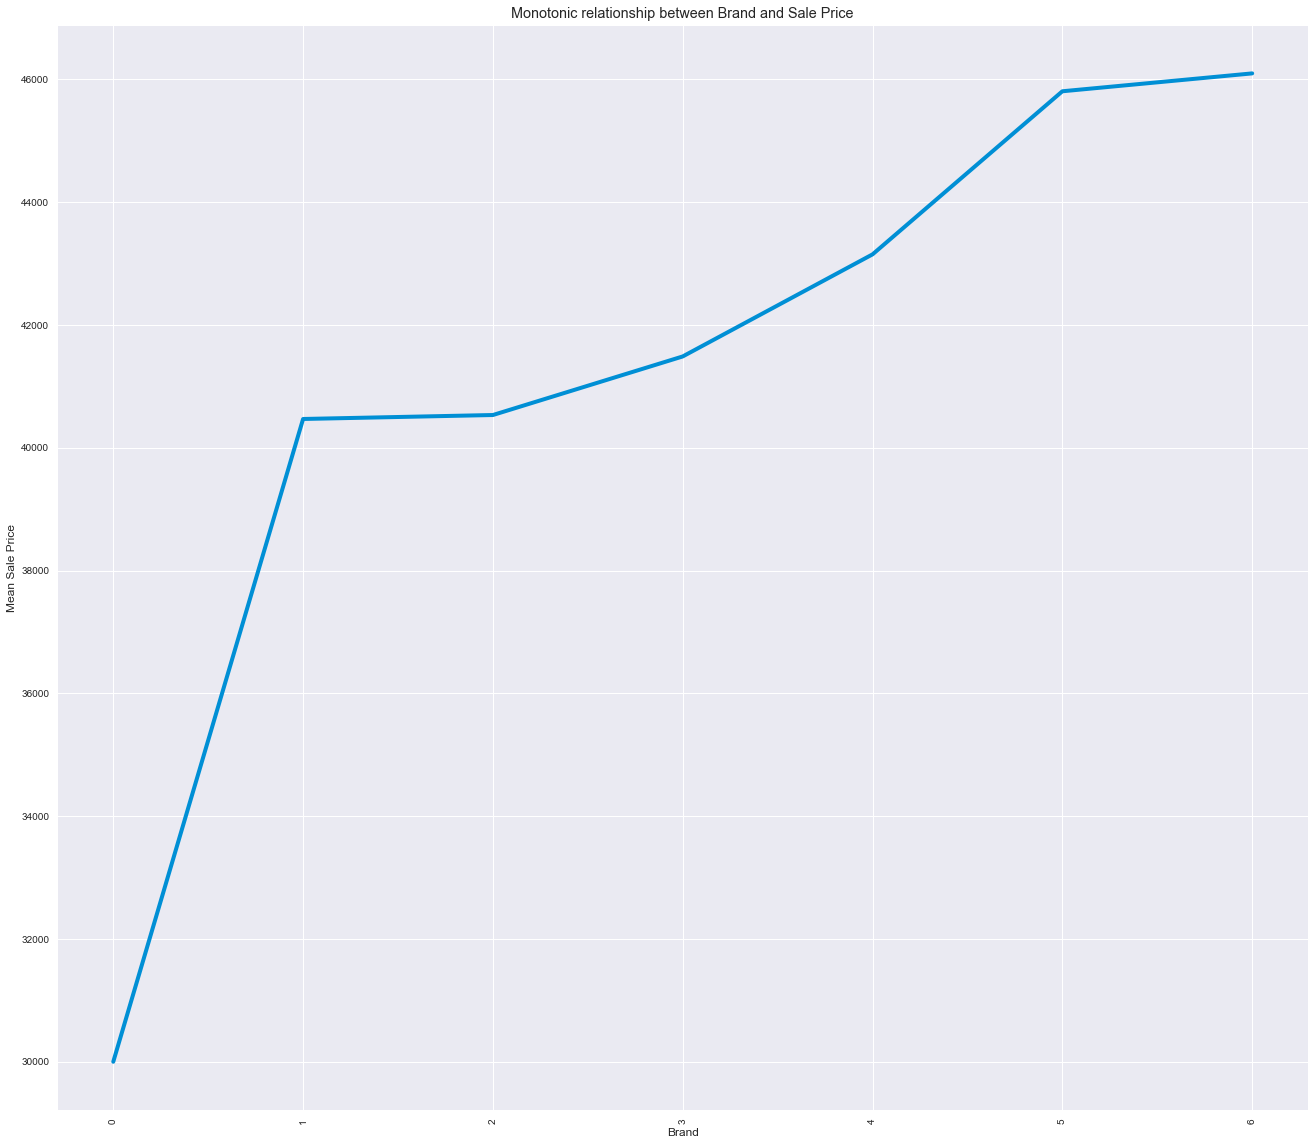

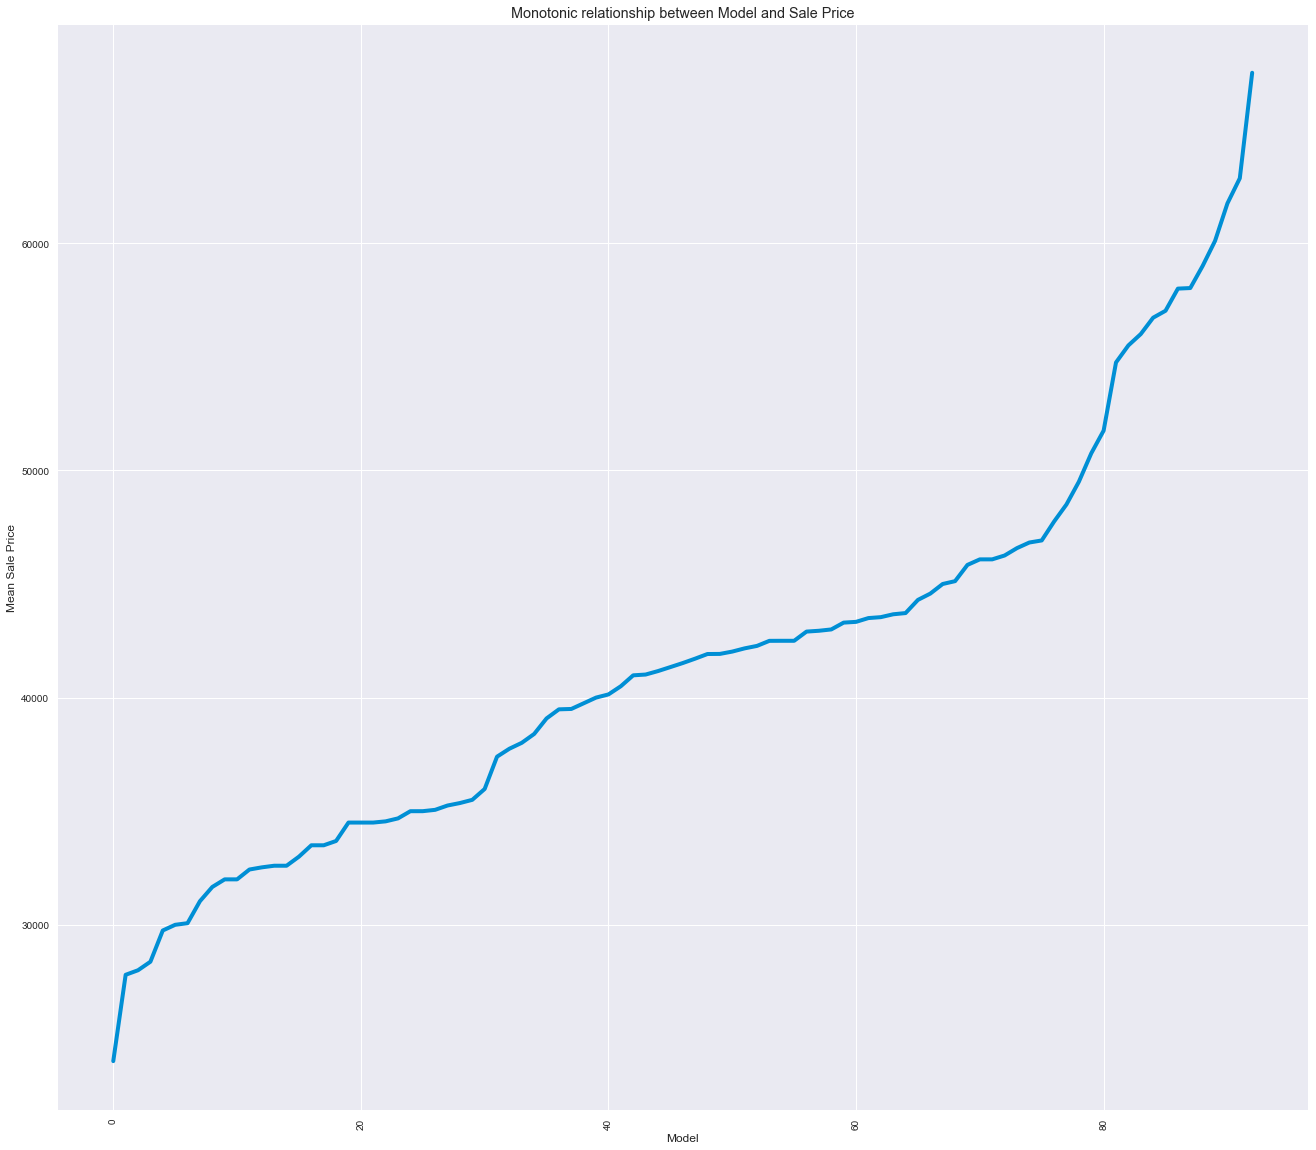

In [407]:
# let's explore the monotonic relationship of the categories with the target
for var in ['State', 'Brand', 'Model']:
    plt.figure(figsize=(20,20))
    x = encoded_df.groupby([var])['Sale Price'].mean().index
    y = encoded_df.groupby([var])['Sale Price'].mean().values
    plt.title('Monotonic relationship between {} and Sale Price'.format(var))
    plt.xlabel(var)
    plt.ylabel('Mean Sale Price')
    plt.plot(x,y)
    plt.xticks(rotation=90)
    plt.show()

We see from the plots above that the relationship between the categories and the target is now monotonic, and for the first 2 variables, almost linear, which helps improve linear models performance.

### Note

Monotonic does not mean strictly linear. Monotonic means that it increases constantly, or it decreases constantly.

Replacing categorical labels with this code and method will generate missing values for categories present in the test set that were not seen in the training set. Therefore it is extremely important to handle rare labels before-hand.

## 6. Mean Encoding or Target Encoding

Mean encoding implies replacing the category by the average target value for that category. For example, if we have the variable city, with categories London, Manchester and Bristol, and we want to predict the default rate, if the default rate for London is 30% we replace London by 0.3, if the default rate for Manchester is 20% we replace Manchester by 0.2 and so on.

In [771]:
from feature_engine.encoding import MeanEncoder

In [772]:
mean_enc = MeanEncoder(variables=['State', 'Brand', 'Model'])

In [773]:
# when fitting the transformer, we need to pass the target as well
# just like with any Scikit-learn predictor class

mean_enc.fit(X_train, y_train)

MeanEncoder(variables=['State', 'Brand', 'Model'])

In [774]:
from sklearn.externals import joblib 
  
# Save the model as a pickle in a file 
joblib.dump(mean_enc, 'mean_enc.pkl') 
  
# Load the model from the file 
mean_from_joblib = joblib.load('mean_enc.pkl')  
  
# Use the loaded model to make transfromations 
mean_from_joblib.transform(pd.DataFrame(data=[['CENTRAL', 'HERO MOTOR CORP', 'PASSION PRO', 2019]],columns=['State','Brand','Model','Year']))

State         Brand    Model  Year
0  41951.787879  41487.266667  41922.5  2019

In [411]:
# in the encoder dict we see the target mean assigned to each
# category for each of the selected variables

mean_enc.encoder_dict_

{'State': {'ANDHRA PRADESH': 50725.17307692308,
  'CENTRAL': 41951.78787878788,
  'DELHI AND HARYANA': 40778.666666666664,
  'EAST': 39368.42105263158,
  'GUJARAT': 36324.637681159424,
  'KARNATAKA': 48739.04761904762,
  'MAHARASHTRA': 47100.0,
  'ORISSA': 35831.05263157895,
  'PUNJAB': 30000.0,
  'RAJASTHAN': 40903.29963898917,
  'TAMIL NADU': 43508.0,
  'TELANGANA': 45639.14077669903,
  'UTTAR PRADESH': 37821.42857142857},
 'Brand': {'BAJAJ AUTO LTD': 43150.0,
  'HERO MOTOR CORP': 41487.26666666667,
  'HMSI': 40533.383307573415,
  'PIAGGIO PVT LTD': 30000.0,
  'SUZUKI': 46097.31481481482,
  'TVS MOTORS': 40468.77391304348,
  'YAMAHA': 45806.11111111111},
 'Model': {'ACCESS 125': 46253.875,
  'ACCESS SPL DISC': 56000.0,
  'ACTIVA 6': 60100.0,
  'ALPHA': 24000.0,
  'APACHE 160 RTR': 32600.0,
  'APACHE 180': 54750.0,
  'APACHE 180 RTR': 51750.0,
  'APACHE RTR 200': 58000.0,
  'BAJAJ PLATINA 100CC WITHOUT SELF': 43000.0,
  'BURGMAN 125': 33500.0,
  'BURGMAN STREET': 57025.0,
  'CBZ XTREM

In [412]:
# this is the list of variables that the encoder will transform

mean_enc.variables

['State', 'Brand', 'Model']

In [413]:
mean_enc_train = mean_enc.transform(X_train)
mean_enc_test = mean_enc.transform(X_test)

# let's explore the result
mean_enc_train.head()

State         Brand         Model  Year
482   45639.140777  40533.383308  31665.659574  2019
1507  40903.299639  40533.383308  41342.328767  2019
1340  40903.299639  41487.266667  41922.500000  2019
451   41951.787879  41487.266667  42497.693069  2017
1603  40903.299639  40533.383308  41342.328767  2018

In [414]:
encoded_df = pd.concat([mean_enc_train,y_train],axis=1)

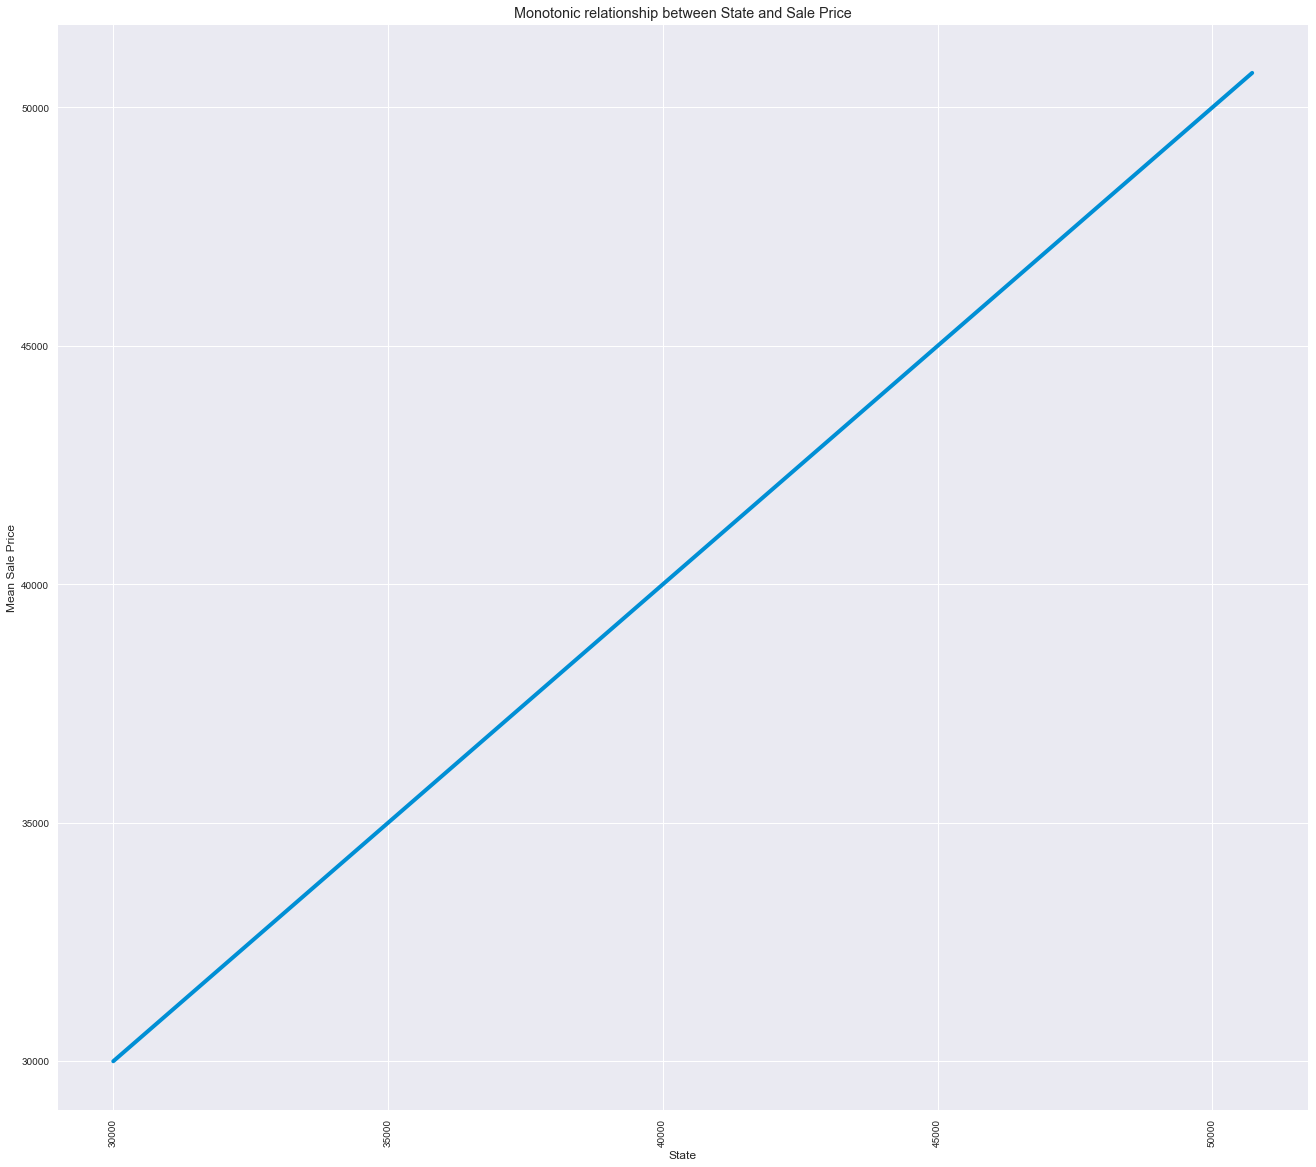

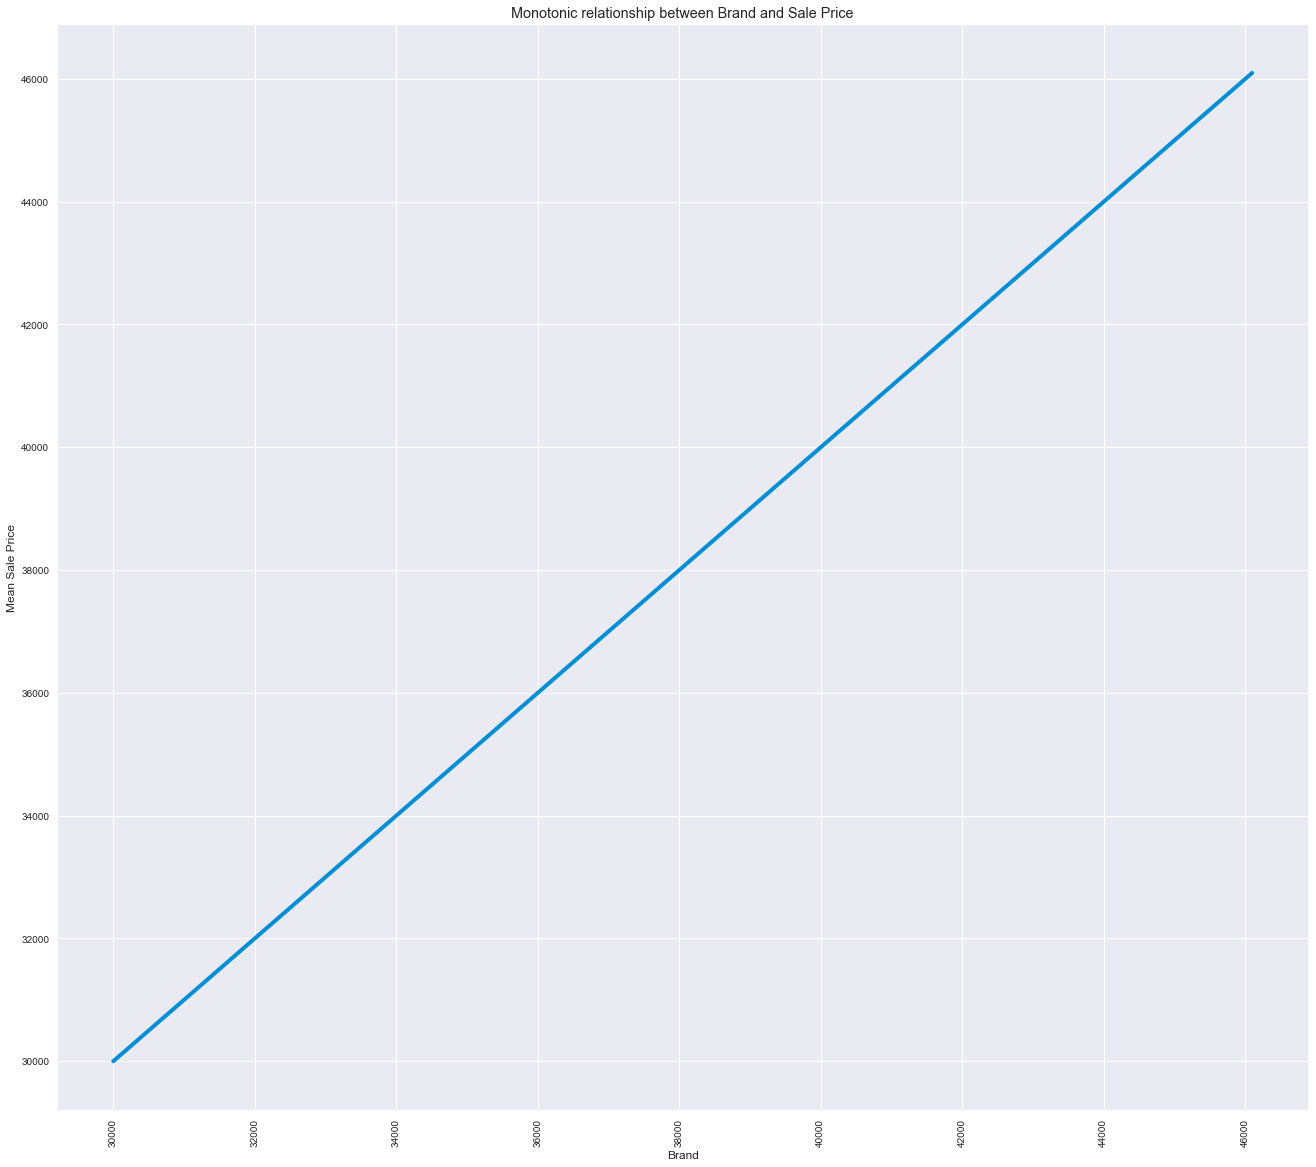

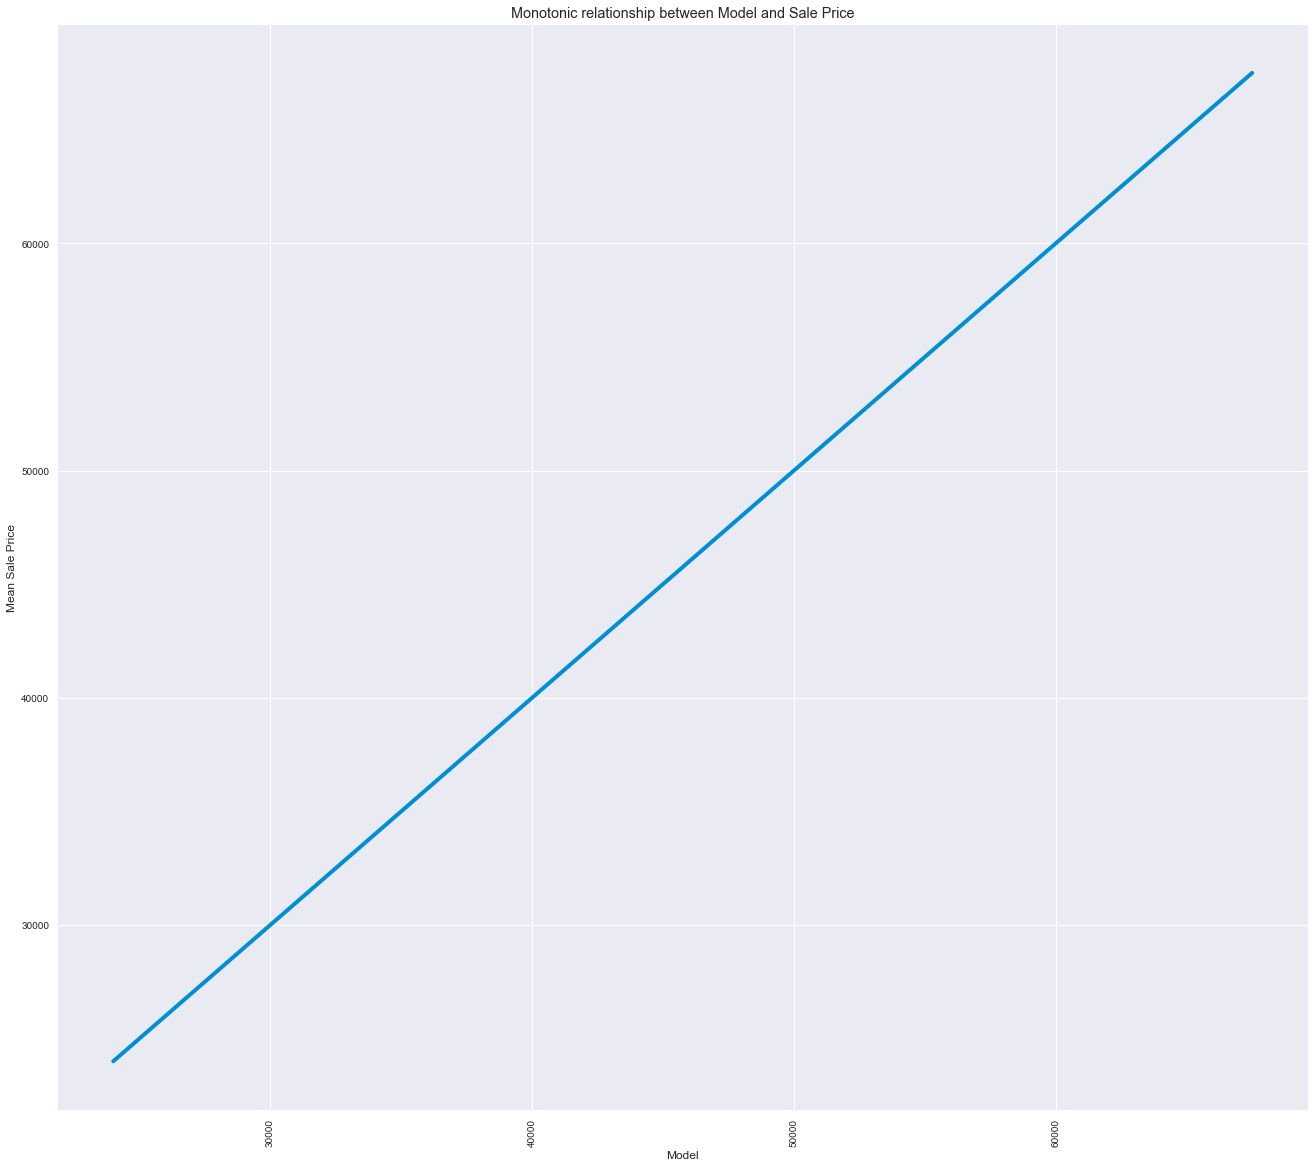

In [415]:
# let's explore the monotonic relationship of the categories with the target
for var in ['State', 'Brand', 'Model']:
    plt.figure(figsize=(20,20))
    x = encoded_df.groupby([var])['Sale Price'].mean().index
    y = encoded_df.groupby([var])['Sale Price'].mean().values
    plt.title('Monotonic relationship between {} and Sale Price'.format(var))
    plt.xlabel(var)
    plt.ylabel('Mean Sale Price')
    plt.plot(x,y)
    plt.xticks(rotation=90)
    plt.show()

## 7. Engineering Rare Categories

Rare values are categories within a categorical variable that are present only in a small percentage of the observations. There is no rule of thumb to determine how small is a small percentage, but typically, any value below 5 % can be considered rare.

As we discussed in section 3 of the course, Infrequent labels are so few, that it is hard to derive reliable information from them. But more importantly, if you remember from section 3, infrequent labels tend to appear only on train set or only on the test set:

- If only on the train set, they may cause over-fitting
- If only on the test set, our machine learning model will not know how to score them

Therefore, to avoid this behaviour, we tend to group those into a new category called 'Rare' or 'Other'.

Rare labels can appear in low or highly cardinal variables. There is no rule of thumb to determine how many different labels are considered high cardinality. It depend as well on how many observations there are in the dataset. In a dataset with 1,000 observations, 100 labels may seem a lot, whereas in a dataset with 100,000 observations it may not be so high.

Highly cardinal variables tend to have many infrequent or rare categories, whereas low cardinal variables, may have only 1 or 2 rare labels.

### Note the following:

**Note that grouping infrequent labels or categories under a new category called 'Rare' or 'Other' is the common practice in machine learning for business.**

- Grouping categories into rare for variables that show low cardinality may or may not improve model performance, however, we tend to re-group them into a new category to smooth model deployment.

- Grouping categories into rare for variables with high cardinality, tends to improve model performance as well.



We are going to re-group rare labels under a new category called rare, and compare the implications of this encoding in variables with:

- One predominant category
- A small number of categories
- High cardinality

### Important

The identification of rare labels should be done using only the training set, and then propagated to the test set. Rare labels should be identified in the training set only. In practice, what we will do is identify **non-rare labels**, and then any other label, either in the train or the test or future live data that is not in that list of **non-rare** labels, will be re=grouped into the new category.

For example, let's imagine that we have in the training set the variable 'city' with the labels 'London', 'Manchester' and 'Yorkshire'. 'Yorkshire' is present in less than 5% of the observations so we decide to re-group it in a new category called 'Rare'.

In the test set, we should also replace 'Yorkshire' by 'Rare', regardless of the percentage of observations for 'Yorkshire' in the test set. In addition, if in the test set we find the category 'Milton Keynes', that was not present in the training set, we should also replace that category by 'Rare'. On other words, all categories present in test set, not present in the list of **non-rare** categories derived from the training set, should be treated as rare values and re-grouped into 'Rare'.

## Finding variables with one dominant category

In [416]:
# let's explore a few examples in which variables have only a few categories, say less than 3

for col in X_train.columns:
    
    if X_train[col].dtypes == 'O':  # if the variable is categorical
        
        if X_train[col].nunique() < 3:  # if the variable has less than 3 categories
            
            # print percentage of observations per category
            print(X_train.groupby(col)[col].count() / len(X_train))
            print()

### Conclusion

From above we know there is no one dominant category

## Finding variables with few categories

In [417]:
cols = ['State', 'Brand', 'Model']

for col in cols:
    if(X_train.loc[:,col].nunique() < 10):
        print(X_train.groupby(col)[col].count() / len(X_train)) # frequency
        print()

Brand
BAJAJ AUTO LTD     0.007299
HERO MOTOR CORP    0.383212
HMSI               0.472263
PIAGGIO PVT LTD    0.000730
SUZUKI             0.039416
TVS MOTORS         0.083942
YAMAHA             0.013139
Name: Brand, dtype: float64



## Finding variable with high cardinality

In [418]:
# let's explore examples in which variables have several categories, say more than 10

multi_cat_cols = []

for col in X_train.columns:

    if X_train[col].dtypes =='O': # if variable  is categorical
    
        if X_train[col].nunique() > 10: # and has more than 10 categories
            
            multi_cat_cols.append(col)  # add to the list
            
            print(X_train.groupby(col)[col].count()/ len(X_train)) # and print the percentage of observations within each category
            
            print()

State
ANDHRA PRADESH       0.037956
CENTRAL              0.048175
DELHI AND HARYANA    0.032847
EAST                 0.013869
GUJARAT              0.201460
KARNATAKA            0.030657
MAHARASHTRA          0.000730
ORISSA               0.027737
PUNJAB               0.003650
RAJASTHAN            0.404380
TAMIL NADU           0.032847
TELANGANA            0.150365
UTTAR PRADESH        0.015328
Name: State, dtype: float64

Model
ACCESS 125                 0.029197
ACCESS SPL DISC            0.000730
ACTIVA 6                   0.000730
ALPHA                      0.000730
APACHE 160 RTR             0.002190
                             ...   
X-TREAM-DISC SELF          0.000730
XPULSE 200T                0.001460
YAHAMA SCOOTER - FASINO    0.002190
YAMAHA FZ                  0.001460
YAMAHA FZ S V 2.0          0.000730
Name: Model, Length: 93, dtype: float64



We can see that many categories are rare in the 2 categorical variables printed above.

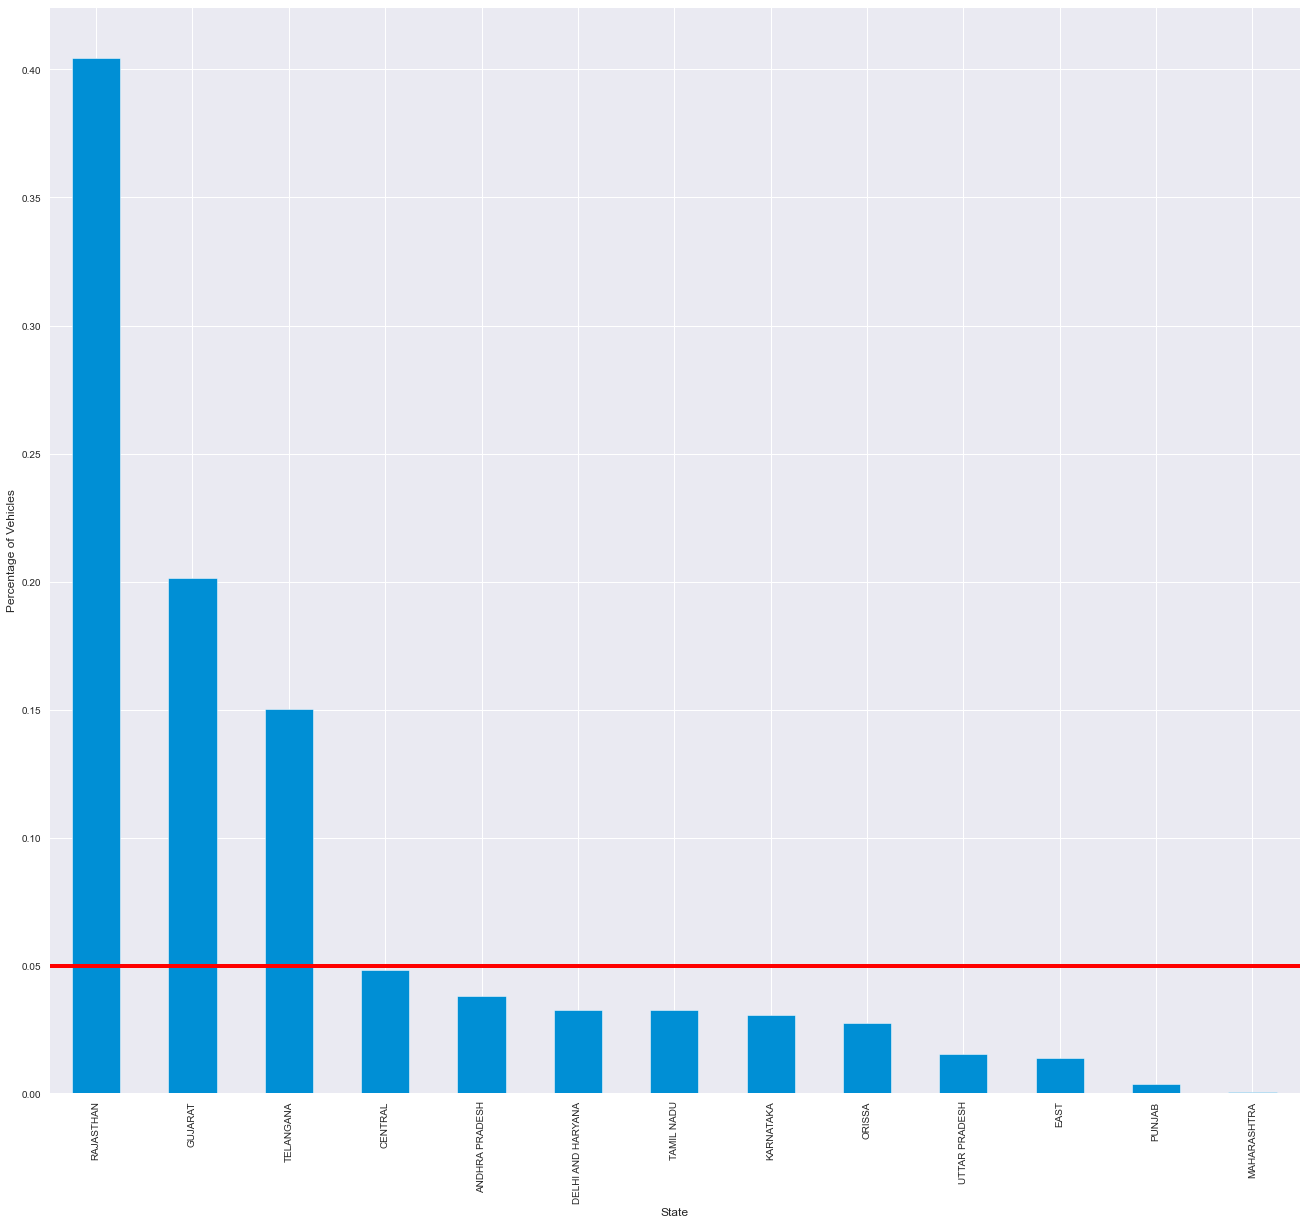

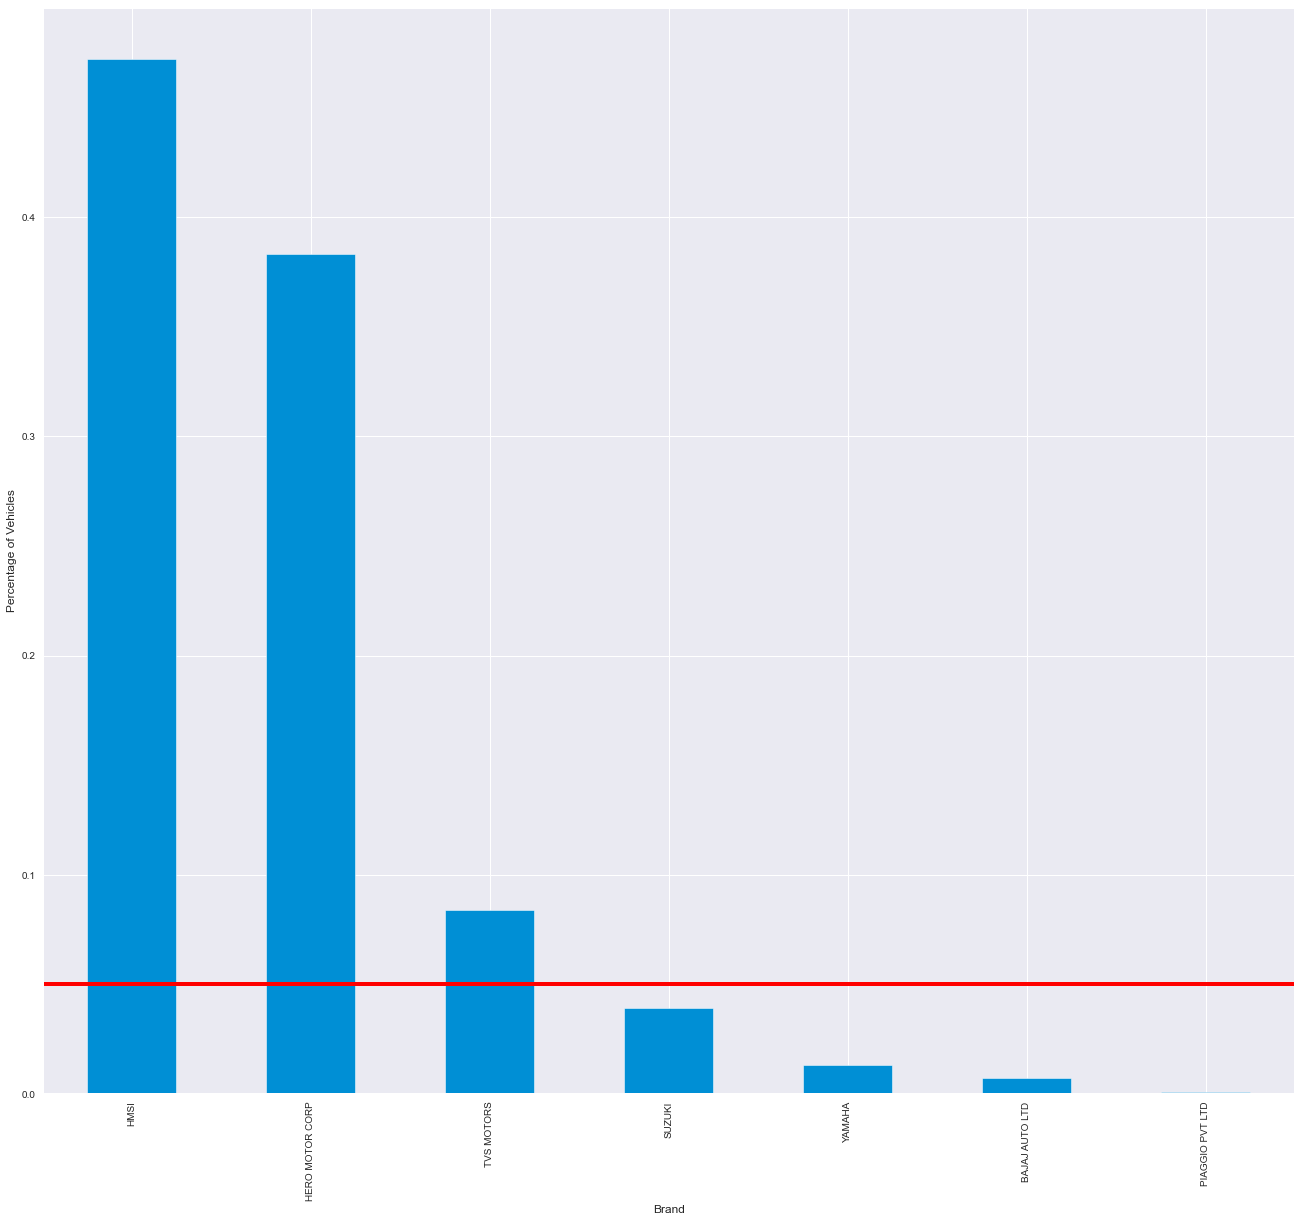

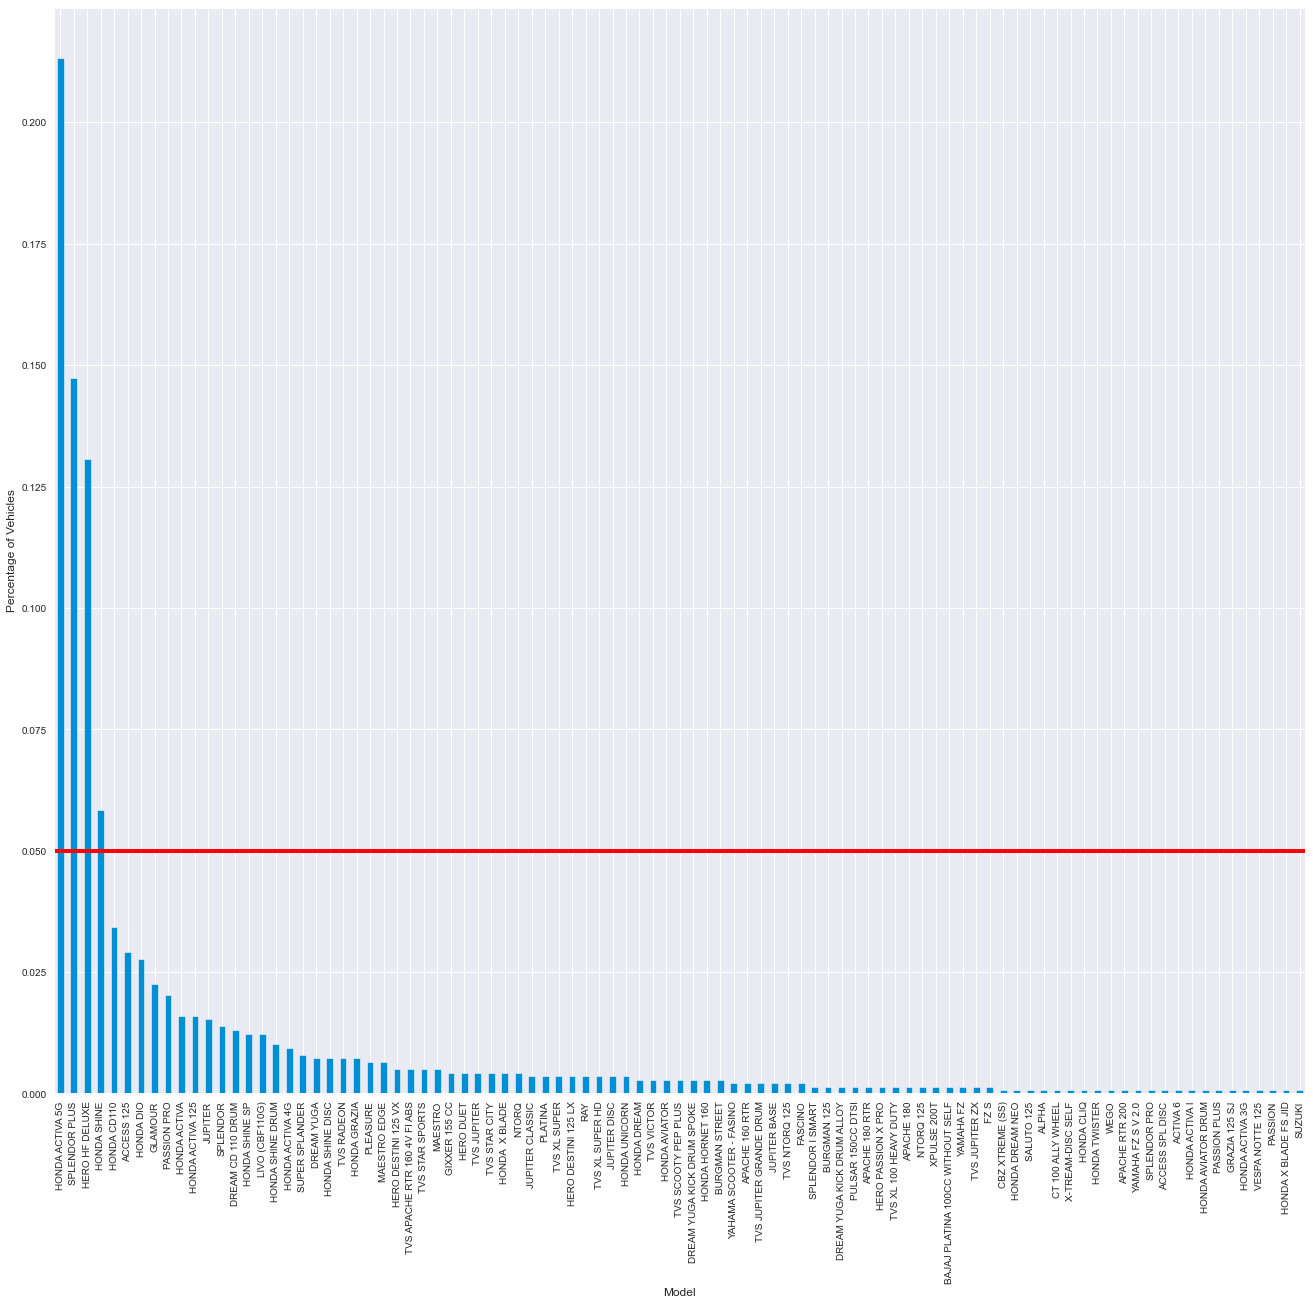

In [419]:
for col in ['State', 'Brand', 'Model']:
    temp_df = pd.Series(X_train[col].value_counts() / len(X_train) )
    
    fig = plt.figure(figsize=(20,20))
    # make plot with the above percentages
    fig = temp_df.sort_values(ascending=False).plot.bar()
    fig.set_xlabel(col)

    # add a line at 5 % to flag the threshold for rare categories
    fig.axhline(y=0.05, color='red')
    fig.set_ylabel('Percentage of Vehicles')
    plt.show()

In [420]:
from feature_engine.encoding import RareLabelEncoder

In [421]:
# Rare value encoder
rare_encoder = RareLabelEncoder(
    tol=0.05,  # minimal percentage to be considered non-rare
    n_categories=4, # minimal number of categories the variable should have to re-cgroup rare categories
    variables=['State', 'Brand', 'Model'] # variables to re-group
)  

In [422]:
rare_encoder.fit(X_train)

RareLabelEncoder(max_n_categories=None, n_categories=4, replace_with='Rare',
                 tol=0.05, variables=['State', 'Brand', 'Model'])

In [423]:
rare_encoder.variables

['State', 'Brand', 'Model']

In [424]:
# the encoder_dict_ is a dictionary of variable: frequent labels pair
rare_encoder.encoder_dict_

{'State': Index(['RAJASTHAN', 'GUJARAT', 'TELANGANA'], dtype='object'),
 'Brand': Index(['HMSI', 'HERO MOTOR CORP', 'TVS MOTORS'], dtype='object'),
 'Model': Index(['HONDA ACTIVA 5G', 'SPLENDOR PLUS', 'HERO HF DELUXE', 'HONDA SHINE'], dtype='object')}

In [425]:
rare_enc_train = rare_encoder.transform(X_train)
rare_enc_test = rare_encoder.transform(X_test)

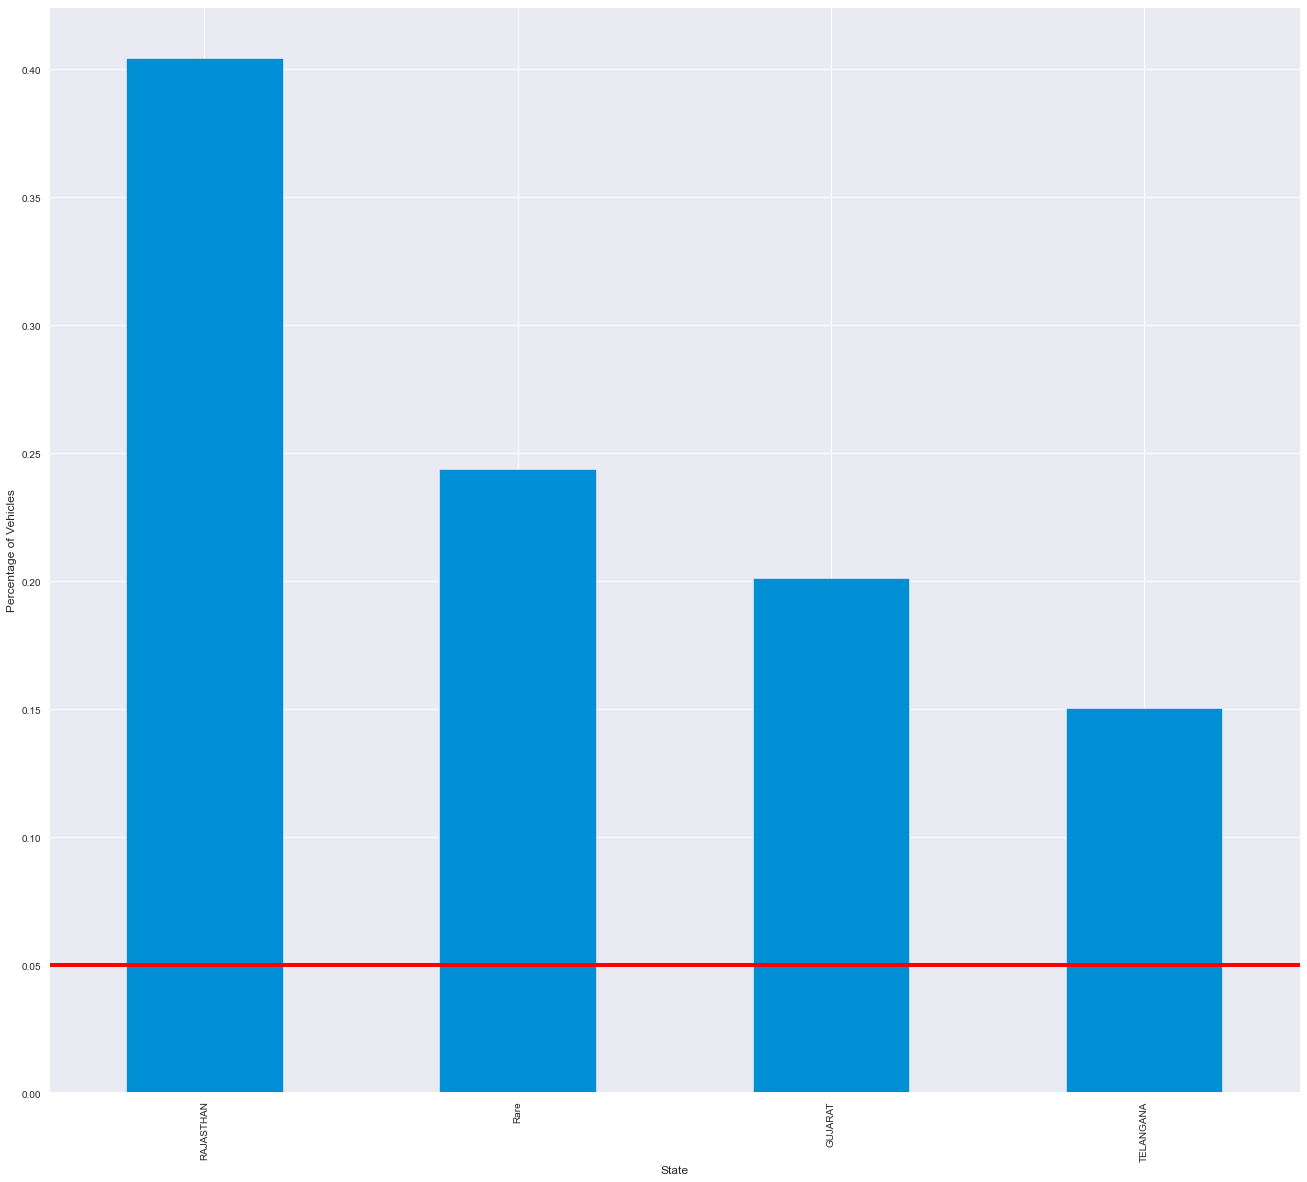

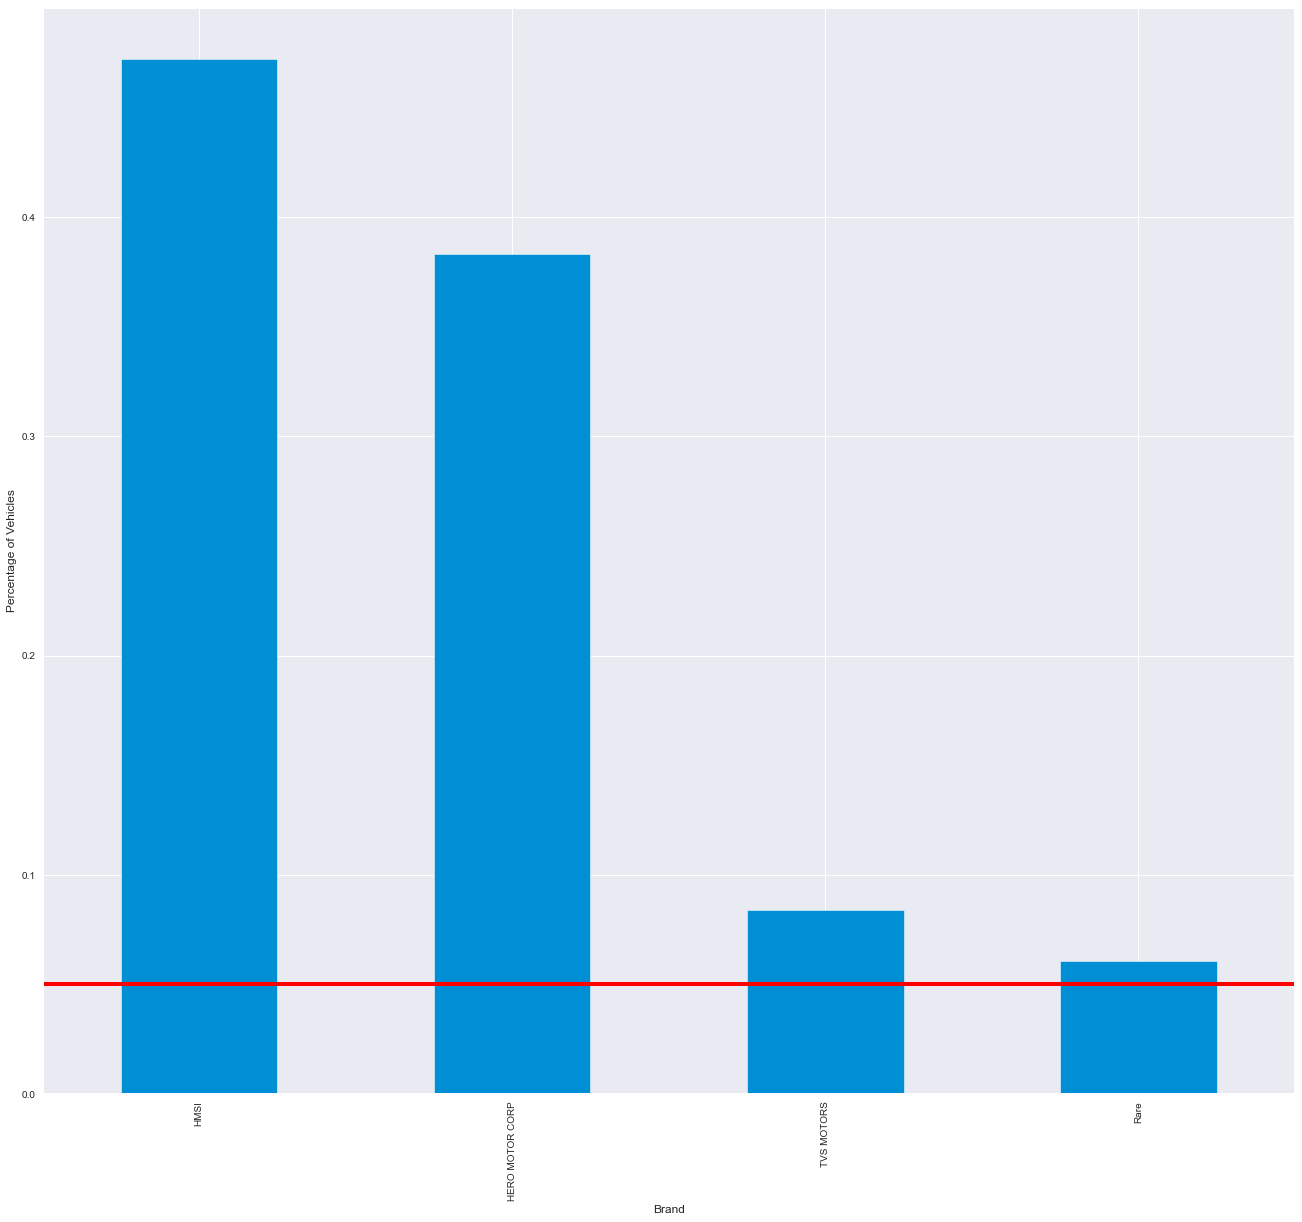

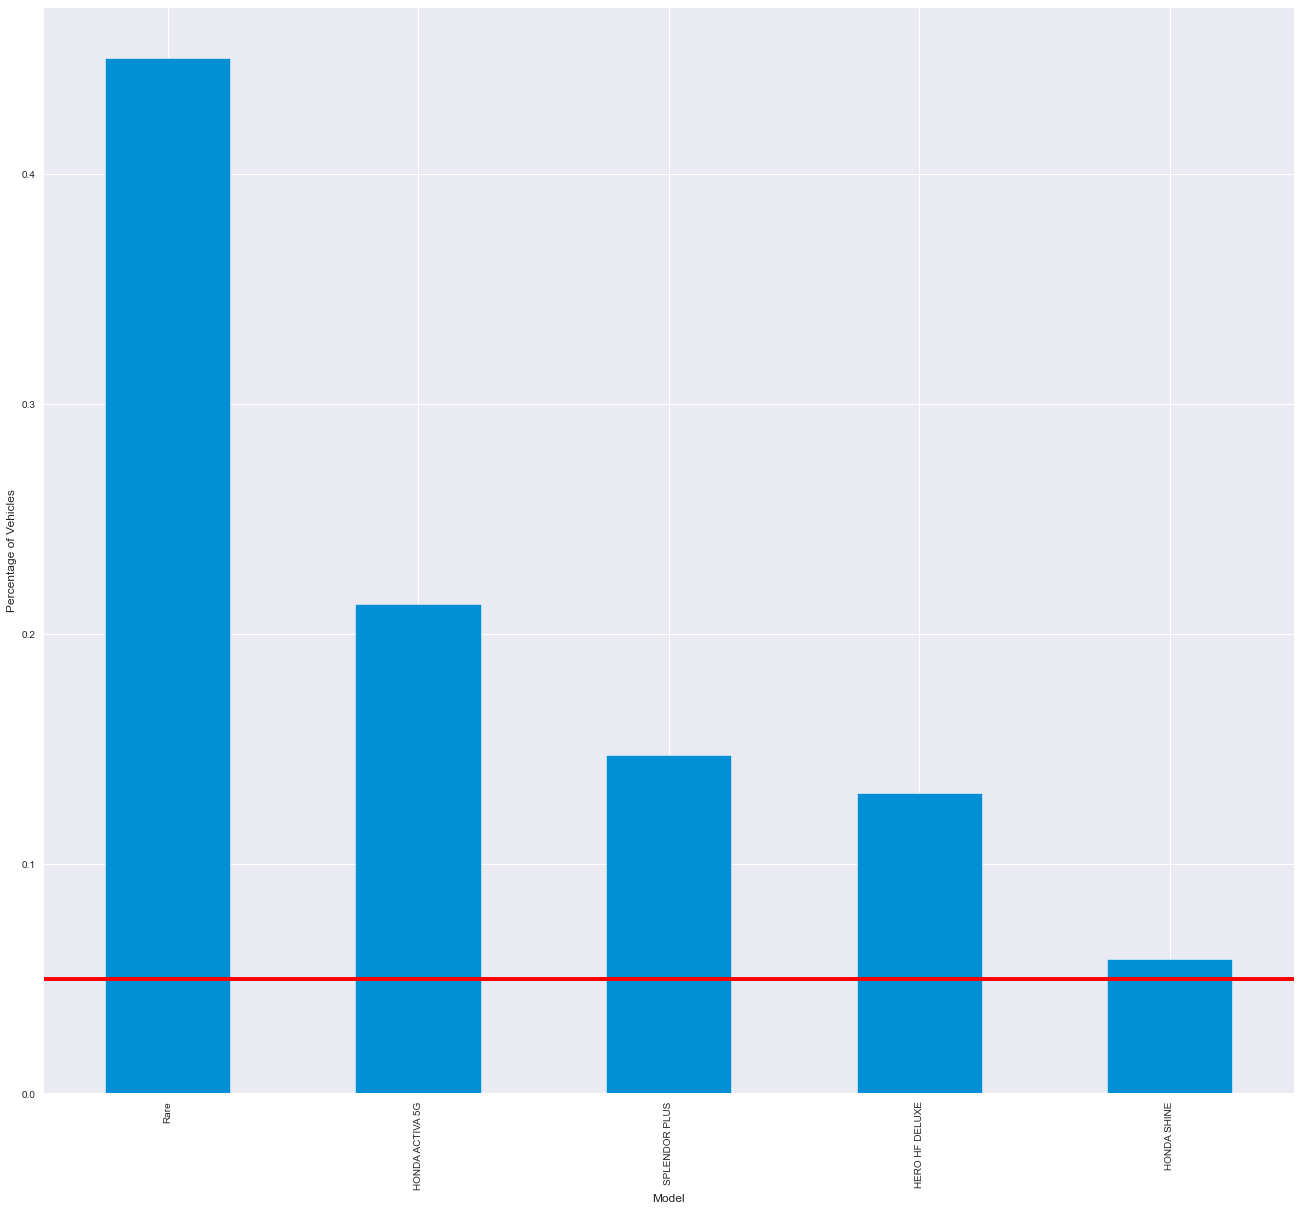

In [426]:
for col in ['State', 'Brand', 'Model']:
    temp_df = pd.Series(rare_enc_train[col].value_counts() / len(rare_enc_train) )
    
    fig = plt.figure(figsize=(20,20))
    # make plot with the above percentages
    fig = temp_df.sort_values(ascending=False).plot.bar()
    fig.set_xlabel(col)

    # add a line at 5 % to flag the threshold for rare categories
    fig.axhline(y=0.05, color='red')
    fig.set_ylabel('Percentage of Vehicles')
    plt.show()

In [427]:
# For one hot encoding with feature-engine
from feature_engine.encoding import OneHotEncoder

In [428]:
ohe_enc = OneHotEncoder(
    top_categories=None,
    variables=['State', 'Brand','Model'])# we can select which variables to encode


ohe_enc.fit(rare_enc_train)

OneHotEncoder(drop_last=False, top_categories=None,
              variables=['State', 'Brand', 'Model'])

In [429]:
rare_ohe_enc_train = ohe_enc.transform(rare_enc_train)

rare_ohe_enc_train.head()

Year  State_TELANGANA  State_RAJASTHAN  State_Rare  State_GUJARAT  \
482   2019                1                0           0              0   
1507  2019                0                1           0              0   
1340  2019                0                1           0              0   
451   2017                0                0           1              0   
1603  2018                0                1           0              0   

      Brand_HMSI  Brand_HERO MOTOR CORP  Brand_TVS MOTORS  Brand_Rare  \
482            1                      0                 0           0   
1507           1                      0                 0           0   
1340           0                      1                 0           0   
451            0                      1                 0           0   
1603           1                      0                 0           0   

      Model_Rare  Model_HONDA ACTIVA 5G  Model_SPLENDOR PLUS  \
482            1                      0                    0   
1507           0                      1                    0   
1340           1                      0                    0   
451            0                      0                    1   
1603           0                      1                    0   

      Model_HERO HF DELUXE  Model_HONDA SHINE  
482                      0                  0  
1507                     0                  0  
1340                     0                  0  
451                      0                  0  
1603                     0                  0

In [430]:
rare_ohe_enc_test = ohe_enc.transform(rare_enc_test)
rare_ohe_enc_test.head()

Year  State_TELANGANA  State_RAJASTHAN  State_Rare  State_GUJARAT  \
1369  2019                0                1           0              0   
1116  2019                0                1           0              0   
10    2018                0                0           1              0   
318   2019                0                0           1              0   
308   2019                1                0           0              0   

      Brand_HMSI  Brand_HERO MOTOR CORP  Brand_TVS MOTORS  Brand_Rare  \
1369           0                      1                 0           0   
1116           0                      1                 0           0   
10             0                      1                 0           0   
318            0                      1                 0           0   
308            0                      1                 0           0   

      Model_Rare  Model_HONDA ACTIVA 5G  Model_SPLENDOR PLUS  \
1369           1                      0                    0   
1116           0                      0                    1   
10             0                      0                    1   
318            1                      0                    0   
308            1                      0                    0   

      Model_HERO HF DELUXE  Model_HONDA SHINE  
1369                     0                  0  
1116                     0                  0  
10                       0                  0  
318                      0                  0  
308                      0                  0

In [431]:
# libraries for evaluation
from sklearn.metrics import mean_squared_log_error,r2_score,mean_squared_error


#libraries for models
from sklearn.linear_model import LinearRegression

from sklearn.linear_model import Ridge
from sklearn.linear_model import LassoCV,RidgeCV
from yellowbrick.regressor import AlphaSelection

from sklearn.linear_model import Lasso

from sklearn.neighbors import KNeighborsRegressor

from sklearn.ensemble import RandomForestRegressor

from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

from sklearn.ensemble import AdaBoostRegressor

import xgboost as xgb

import warnings
warnings.filterwarnings('ignore')

In [432]:
# Function for evaluation of model
all_data = []
def result(method,y_test,y_pred,model):
    r=[]
    r.append(method)
    r.append(mean_squared_log_error(y_test, y_pred))
    r.append(np.sqrt(r[1]))
    r.append(r2_score(y_test,y_pred))
    r.append(round(r2_score(y_test,y_pred)*100))
    r.append(model)
    all_data.append(r)
    return (r)

#dataframe that store the performance of each model
accu=pd.DataFrame(index=['Encoding_Method','MSLE', 'Root MSLE', 'R2 Score','Accuracy(%)','Model'])

# 1. Linear Regression

### I. One Hot Encoded Variables

In [433]:
# Fitting model
LR = LinearRegression()
LR.fit(ohe_enc_train,y_train)
y_pred=LR.predict(ohe_enc_test)

In [434]:
# Some of models will predict neg values so this function will remove that values
y_test_1 = []
y_pred_1 = []
for i in range(len(y_test)):
    if(y_pred[i] > 0):
        y_pred_1.append(y_pred[i])
        y_test_1.append(y_test.iloc[i])

In [435]:
# Calculating error/accuracy
r1_lr = result('OHE',y_test_1,y_pred_1,'Linear Regression')
print('Coefficients: \n', LR.coef_)
print("MSLE : {}".format(r1_lr[1]))
print("Root MSLE : {}".format(r1_lr[2]))
print("R2 Score : {} or {}%".format(r1_lr[3],r1_lr[4]))
accu['Linear Regression']=r1_lr

Coefficients: 
 [ 5.03981404e+03  1.56326765e+16  1.56326765e+16  1.56326765e+16
  1.56326765e+16  1.56326765e+16  1.56326765e+16  1.56326765e+16
  1.56326765e+16  1.56326765e+16  1.56326765e+16  1.56326765e+16
  1.56326765e+16  1.56326765e+16  8.17433634e+14  8.17433634e+14
  4.03946673e+14 -6.79106214e+14  2.99642421e+15 -2.22393812e+15
  1.95466988e+14 -9.37386680e+14 -9.37386680e+14 -9.37386680e+14
 -9.37386680e+14 -9.37386680e+14 -9.37386680e+14 -5.23899720e+14
 -9.37386680e+14 -5.23899720e+14 -9.37386680e+14  5.59153168e+14
 -9.37386680e+14 -9.37386680e+14 -9.37386680e+14 -9.37386680e+14
 -9.37386680e+14 -3.11637726e+15 -5.23899720e+14 -9.37386680e+14
 -5.23899720e+14 -5.23899720e+14 -3.11637726e+15 -9.37386680e+14
 -9.37386680e+14 -9.37386680e+14 -5.23899720e+14 -3.11637726e+15
 -5.23899720e+14 -9.37386680e+14 -9.37386680e+14 -9.37386680e+14
 -9.37386680e+14 -9.37386680e+14  2.10398508e+15 -5.23899720e+14
 -5.23899720e+14 -9.37386680e+14 -5.23899720e+14 -9.37386680e+14
 -5.23899

### R2 is negative only when the chosen model does not follow the trend of the data, so fits worse than a horizontal line.

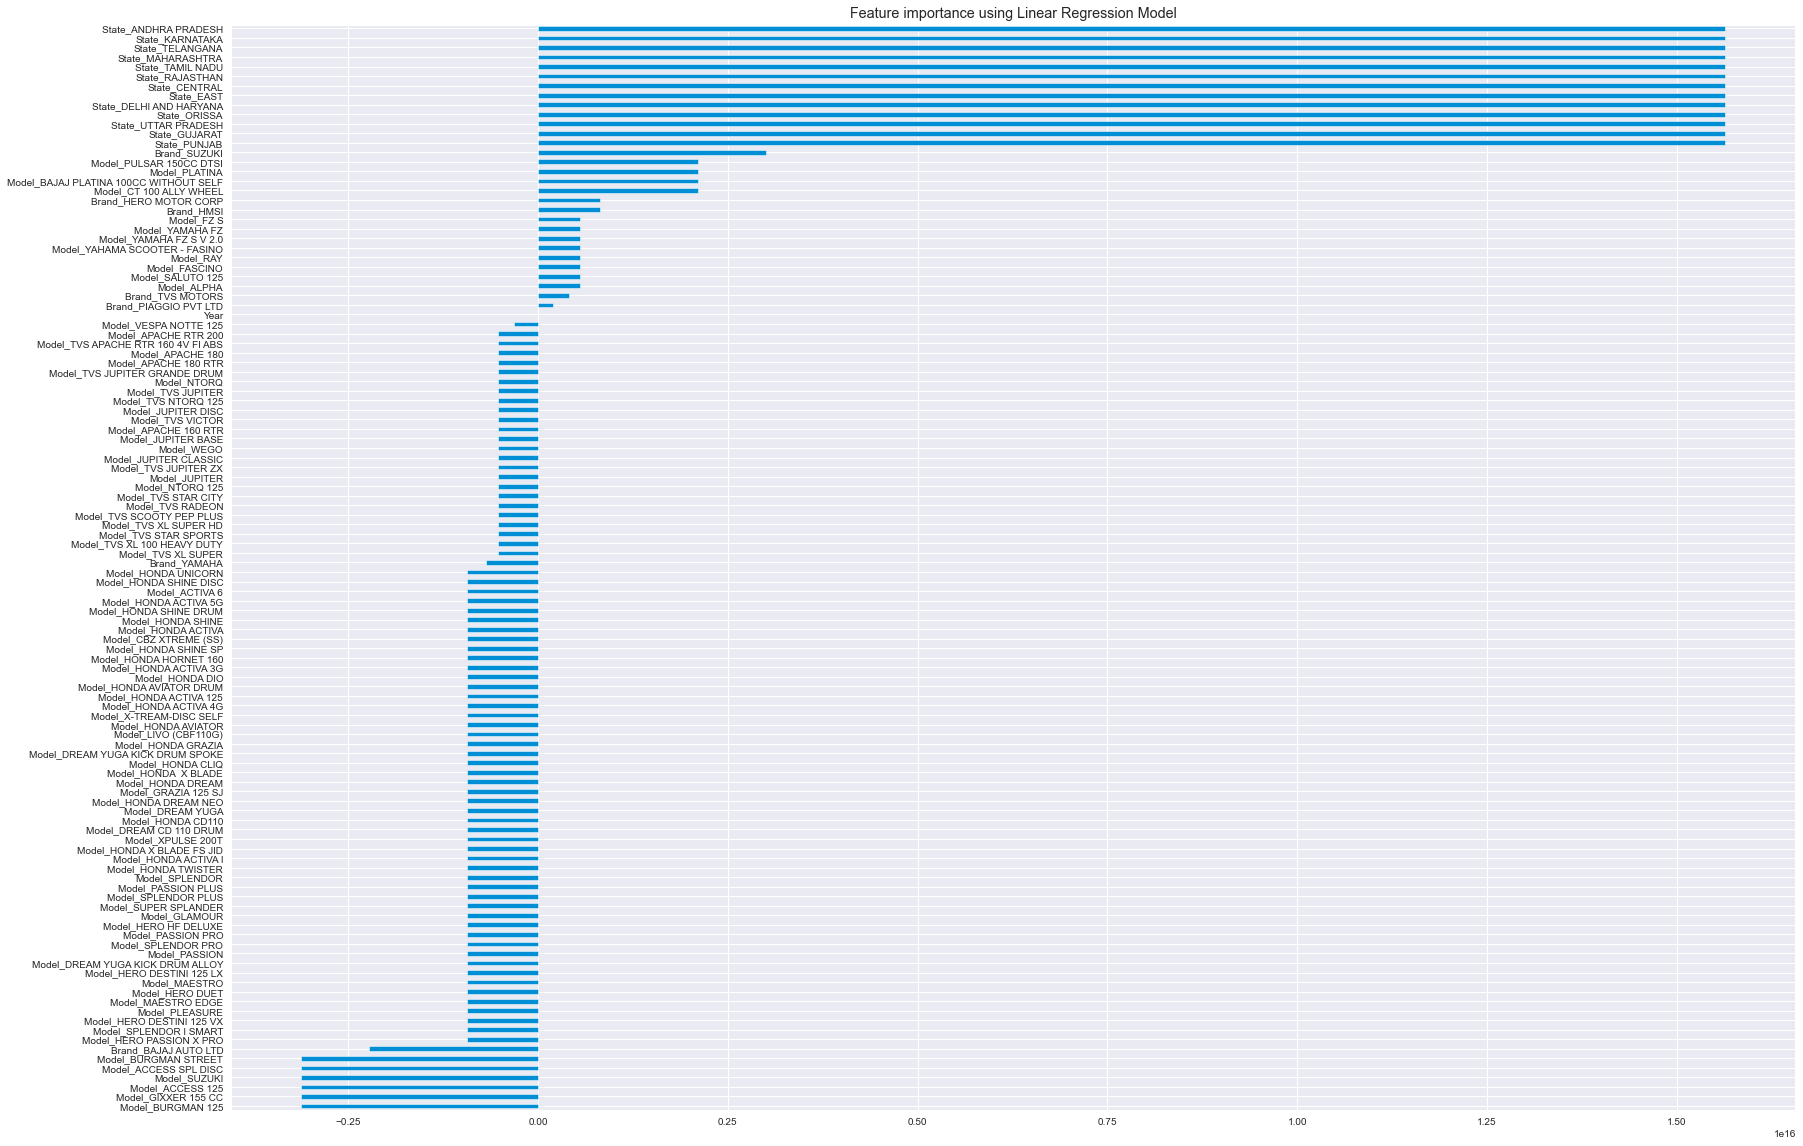

In [436]:
#Ploting feature importance graph
import matplotlib
coef = pd.Series(LR.coef_, index = ohe_enc_train.columns)
imp_coef = coef.sort_values()
matplotlib.rcParams['figure.figsize'] = (25.0, 20.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Linear Regression Model")
plt.savefig('Linear-Regression-Feature-Importance.jpg')
plt.show()

### II. One Hot Encoding of Frequent Categories

In [438]:
# Fitting model
LR = LinearRegression()
LR.fit(ohe_enc_train_top,y_train)
y_pred=LR.predict(ohe_enc_test_top)

In [439]:
# Calculating error/accuracy
r1_lr = result('OHE_TOP',y_test,y_pred,'Linear Regression')
print('Coefficients: \n', LR.coef_)
print("MSLE : {}".format(r1_lr[1]))
print("Root MSLE : {}".format(r1_lr[2]))
print("R2 Score : {} or {}%".format(r1_lr[3],r1_lr[4]))
accu['Linear Regression']=r1_lr

Coefficients: 
 [ 4915.78069747   214.2066275  -3987.73138196  6754.85539278
  1152.76000049 10090.18430587  -937.37482758  2679.37460822
  7148.62773095 -1327.27124451 -4257.51346198  -600.11432347
   525.24144046   957.61807421  3996.73312105  4018.12086212
  -147.00693118 -8750.59224319  5328.39868503  4036.15124445
   507.15925816  4379.599696   -6451.09943812   214.99162508
  2629.64036466  2234.05756454   -80.99318217  4074.89859569]
MSLE : 0.023530999161510018
Root MSLE : 0.15339817196273892
R2 Score : 0.31592980734979936 or 32.0%


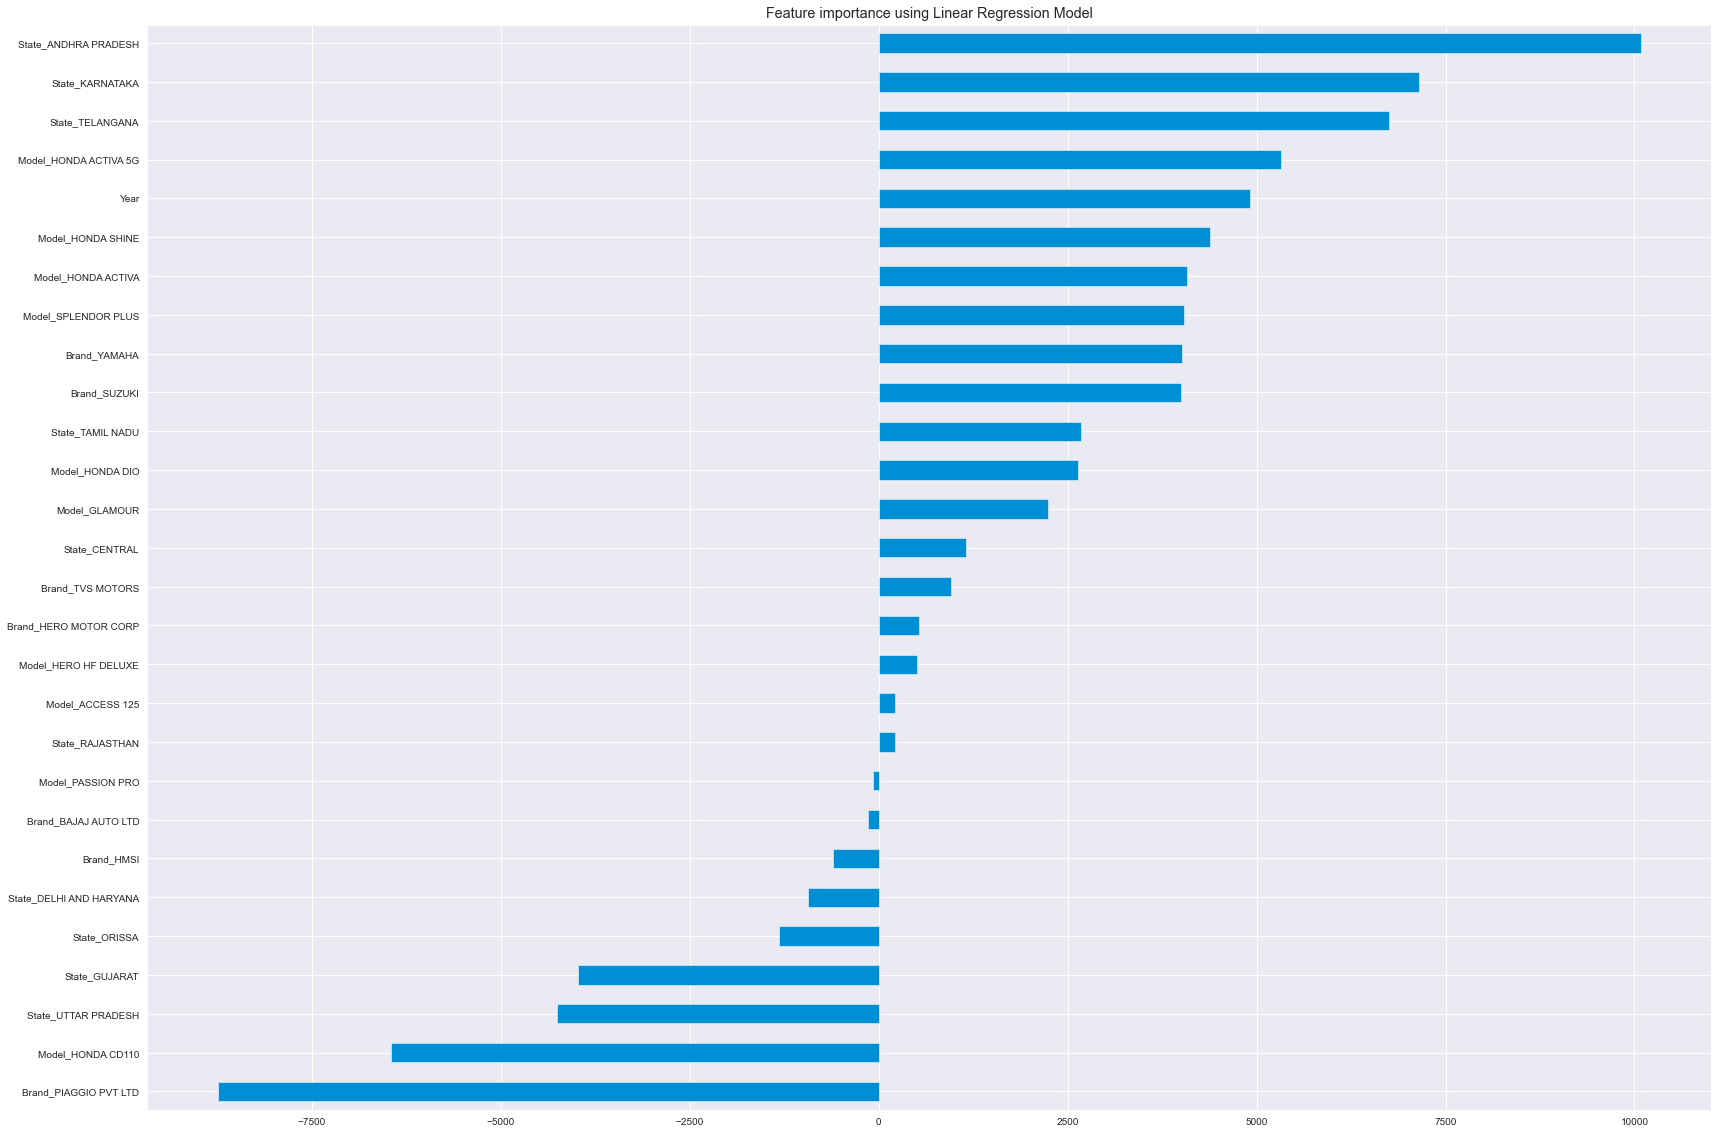

In [440]:
#Ploting feature importance graph
import matplotlib
coef = pd.Series(LR.coef_, index = ohe_enc_train_top.columns)
imp_coef = coef.sort_values()
matplotlib.rcParams['figure.figsize'] = (25.0, 20.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Linear Regression Model")
plt.savefig('Linear-Regression-Feature-Importance.jpg')
plt.show()

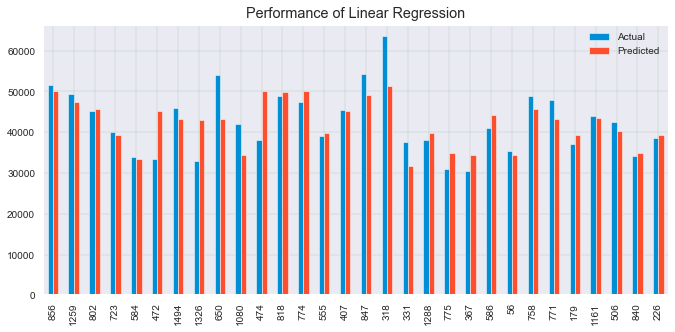

In [441]:
#Visualization of true value and predicted

df_check = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_check = df_check.sample(30)
df_check.plot(kind='bar',figsize=(10,5))
plt.grid(which='major', linestyle='-', linewidth='0.1', color='Green')
plt.title('Performance of Linear Regression')
plt.savefig('Linear-Regression-Performance')
plt.show()

### III.Count Encoding

In [442]:
# Fitting model
count_enc_test_filled = count_enc_test.fillna(0)
LR = LinearRegression()
LR.fit(count_enc_train,y_train)
y_pred=LR.predict(count_enc_test_filled)

In [443]:
# Calculating error/accuracy
r1_lr = result('COUNT_ENC',y_test,y_pred,'Linear Regression')
print('Coefficients: \n', LR.coef_)
print("MSLE : {}".format(r1_lr[1]))
print("Root MSLE : {}".format(r1_lr[2]))
print("R2 Score : {} or {}%".format(r1_lr[3],r1_lr[4]))
accu['Linear Regression']=r1_lr

Coefficients: 
 [-6.79808349e+00 -3.02697945e+00  6.99613023e+00  5.25667475e+03]
MSLE : 0.03091562424592138
Root MSLE : 0.1758283943108205
R2 Score : 0.12094490258381396 or 12.0%


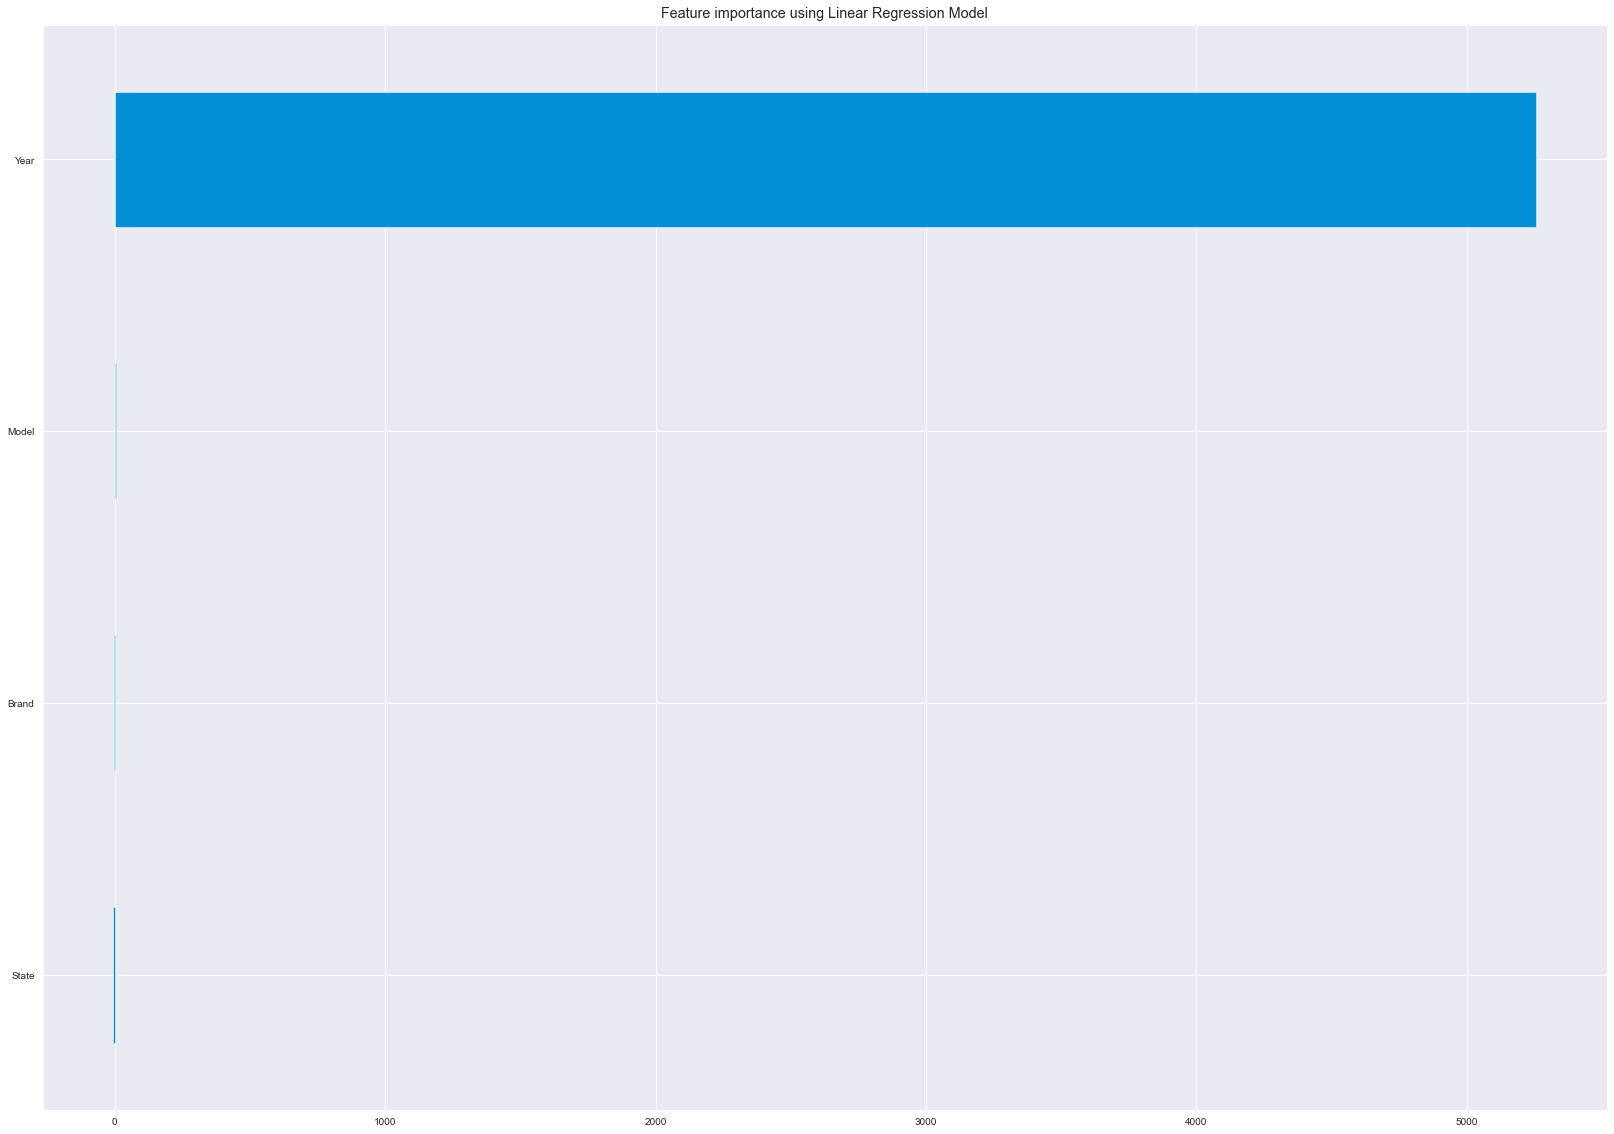

In [444]:
#Ploting feature importance graph
import matplotlib
coef = pd.Series(LR.coef_, index = count_enc_train.columns)
imp_coef = coef.sort_values()
matplotlib.rcParams['figure.figsize'] = (25.0, 20.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Linear Regression Model")
plt.savefig('Linear-Regression-Feature-Importance.jpg')
plt.show()

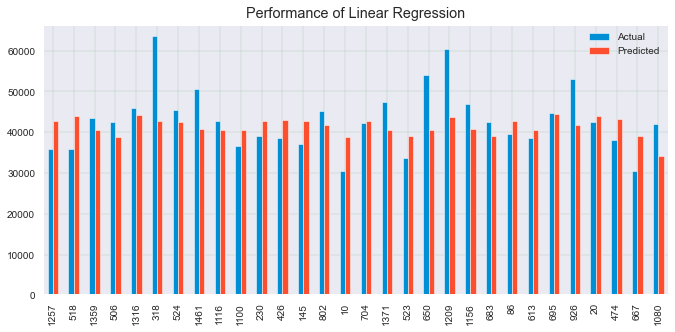

In [445]:
#Visualization of true value and predicted

df_check = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_check = df_check.sample(30)
df_check.plot(kind='bar',figsize=(10,5))
plt.grid(which='major', linestyle='-', linewidth='0.1', color='Green')
plt.title('Performance of Linear Regression')
plt.savefig('Linear-Regression-Performance')
plt.show()

### IV. Frquency Encoding

In [446]:
# Fitting model
frequency_enc_test_filled = frequency_enc_test.fillna(0.0)
LR = LinearRegression()
LR.fit(frequency_enc_train,y_train)
y_pred=LR.predict(frequency_enc_test_filled)

In [447]:
# Calculating error/accuracy
r1_lr = result('FREQUENCY_ENC',y_test,y_pred,'Linear Regression')
print('Coefficients: \n', LR.coef_)
print("MSLE : {}".format(r1_lr[1]))
print("Root MSLE : {}".format(r1_lr[2]))
print("R2 Score : {} or {}%".format(r1_lr[3],r1_lr[4]))
accu['Linear Regression']=r1_lr

Coefficients: 
 [-9313.37437707 -4146.96184557  9584.69841928  5256.67474764]
MSLE : 0.03091562424592138
Root MSLE : 0.1758283943108205
R2 Score : 0.12094490258381396 or 12.0%


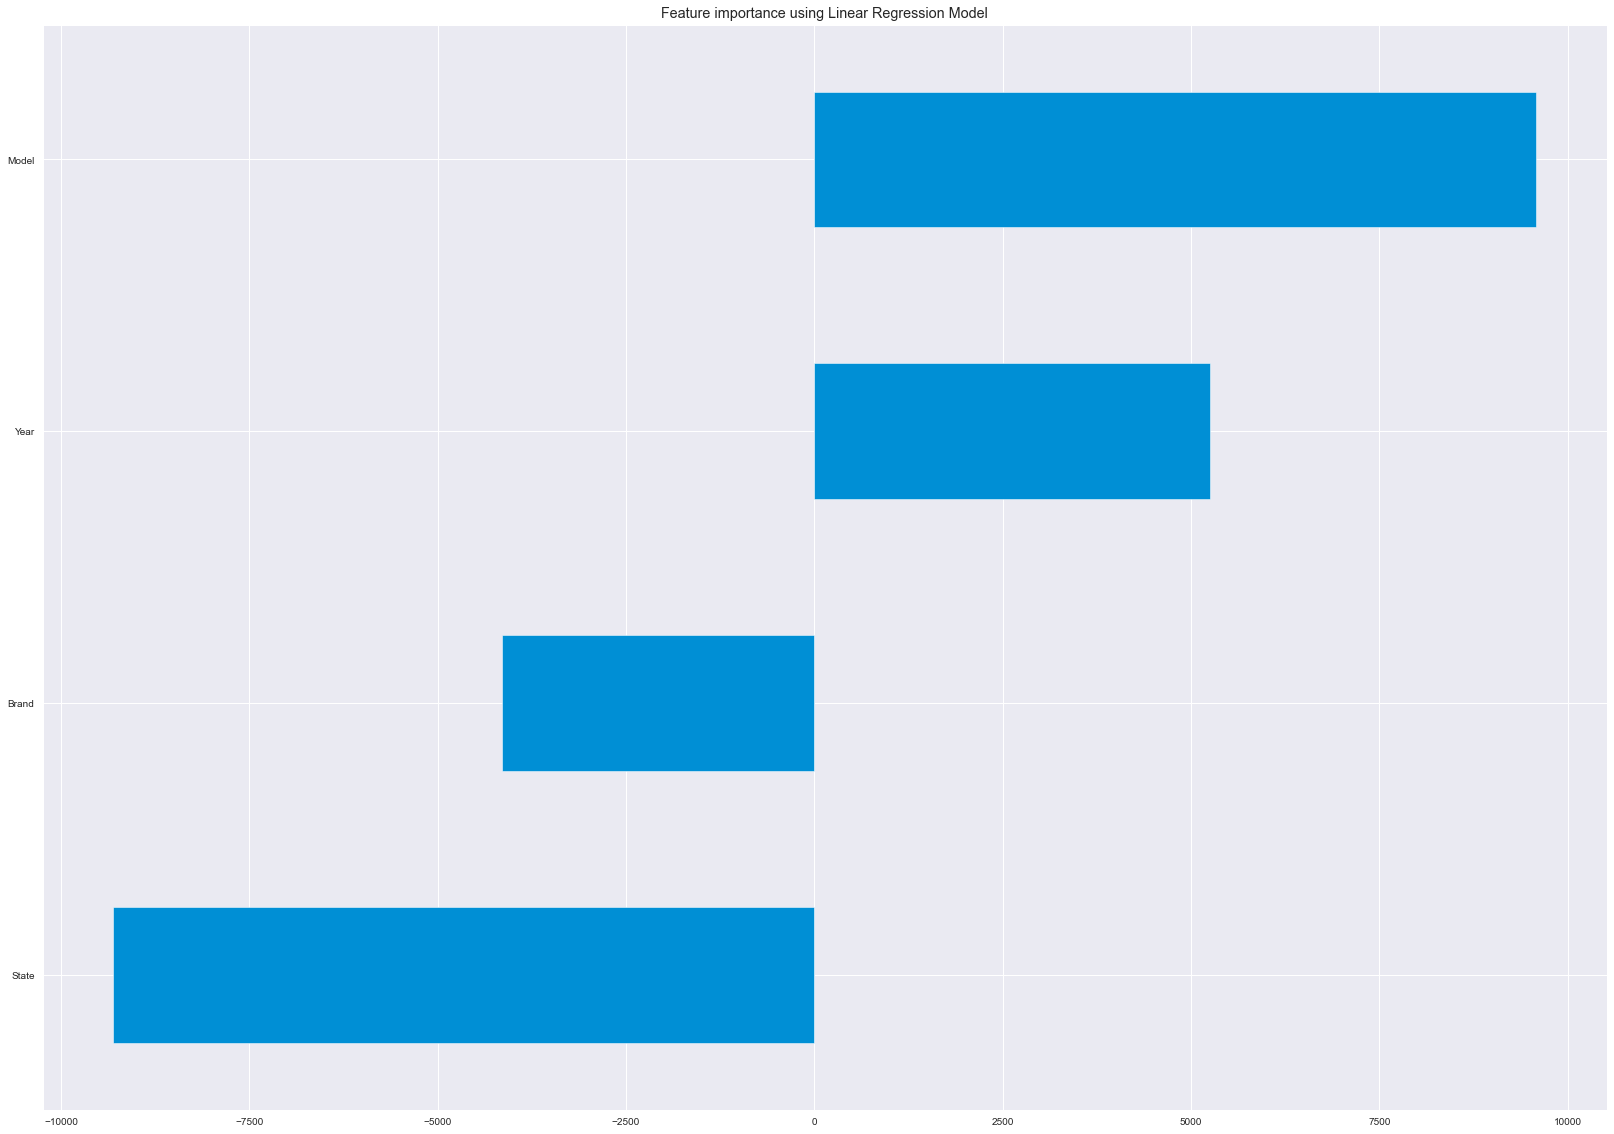

In [448]:
#Ploting feature importance graph
import matplotlib
coef = pd.Series(LR.coef_, index = frequency_enc_train.columns)
imp_coef = coef.sort_values()
matplotlib.rcParams['figure.figsize'] = (25.0, 20.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Linear Regression Model")
plt.savefig('Linear-Regression-Feature-Importance.jpg')
plt.show()

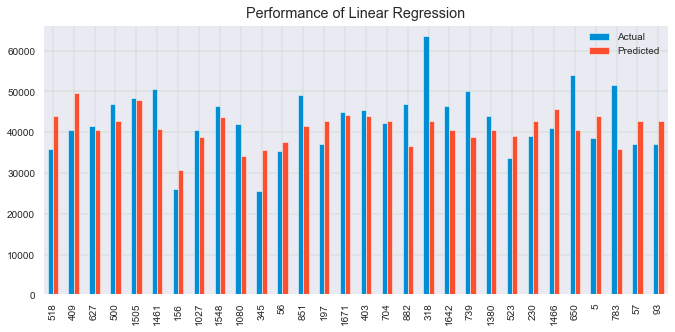

In [449]:
#Visualization of true value and predicted
df_check = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_check = df_check.sample(30)
df_check.plot(kind='bar',figsize=(10,5))
plt.grid(which='major', linestyle='-', linewidth='0.1', color='Green')
plt.title('Performance of Linear Regression')
plt.savefig('Linear-Regression-Performance')
plt.show()

### V. Integer Encoding

In [450]:
# Fitting model
int_enc_test_filled = int_enc_test.fillna(0.0)
LR = LinearRegression()
LR.fit(int_enc_train,y_train)
y_pred=LR.predict(int_enc_test_filled)

In [451]:
# Calculating error/accuracy
r1_lr = result('INT_ENC',y_test,y_pred,'Linear Regression')
print('Coefficients: \n', LR.coef_)
print("MSLE : {}".format(r1_lr[1]))
print("Root MSLE : {}".format(r1_lr[2]))
print("R2 Score : {} or {}%".format(r1_lr[3],r1_lr[4]))
accu['Linear Regression']=r1_lr

Coefficients: 
 [-3.06610220e+01  7.65956141e+02 -2.32147859e+00  4.83076838e+03]
MSLE : 0.03187787356453371
Root MSLE : 0.17854375812257822
R2 Score : 0.09754303177106805 or 10.0%


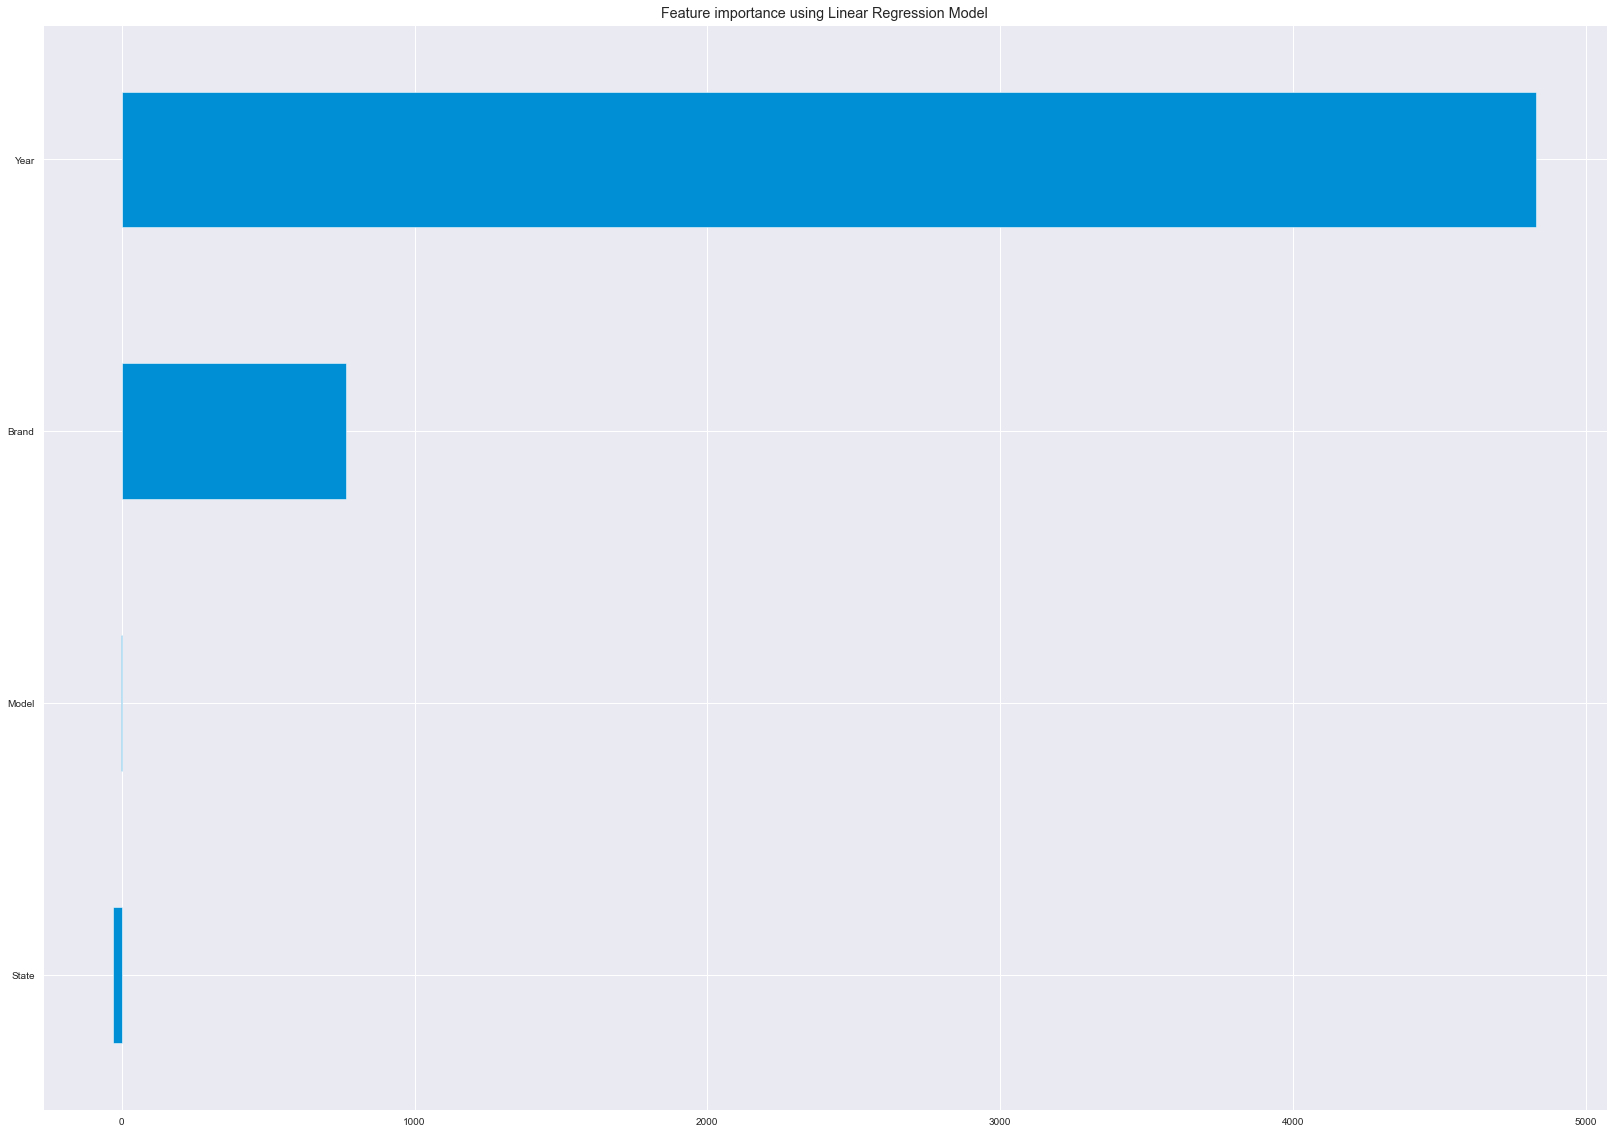

In [452]:
#Ploting feature importance graph
import matplotlib
coef = pd.Series(LR.coef_, index = int_enc_train.columns)
imp_coef = coef.sort_values()
matplotlib.rcParams['figure.figsize'] = (25.0, 20.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Linear Regression Model")
plt.savefig('Linear-Regression-Feature-Importance.jpg')
plt.show()

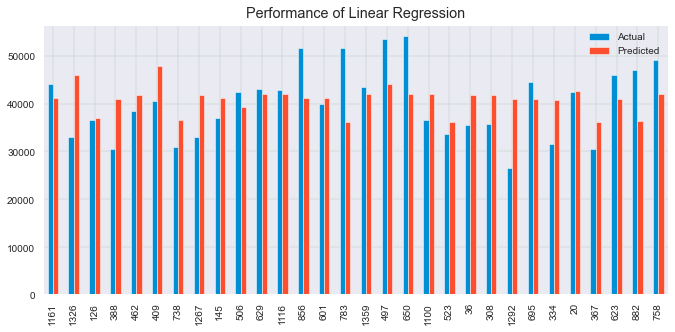

In [453]:
#Visualization of true value and predicted
df_check = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_check = df_check.sample(30)
df_check.plot(kind='bar',figsize=(10,5))
plt.grid(which='major', linestyle='-', linewidth='0.1', color='Green')
plt.title('Performance of Linear Regression')
plt.savefig('Linear-Regression-Performance')
plt.show()

### VI. Ordered Integer Encoding

In [454]:
ordered_int_enc_test_filled = ordered_int_enc_test.fillna(0)

# Fitting model
LR = LinearRegression()
LR.fit(ordered_int_enc_train,y_train)
y_pred=LR.predict(ordered_int_enc_test_filled)

In [455]:
# Calculating error/accuracy
r1_lr = result('ORDERED_INT_ENC',y_test,y_pred,'Linear Regression')
print('Coefficients: \n', LR.coef_)
print("MSLE : {}".format(r1_lr[1]))
print("Root MSLE : {}".format(r1_lr[2]))
print("R2 Score : {} or {}%".format(r1_lr[3],r1_lr[4]))
accu['Linear Regression']=r1_lr

Coefficients: 
 [ 914.75042415 -364.43978448  219.33813065 3929.02145796]
MSLE : 0.022857834675513784
Root MSLE : 0.15118807716058097
R2 Score : 0.42020612660301127 or 42.0%


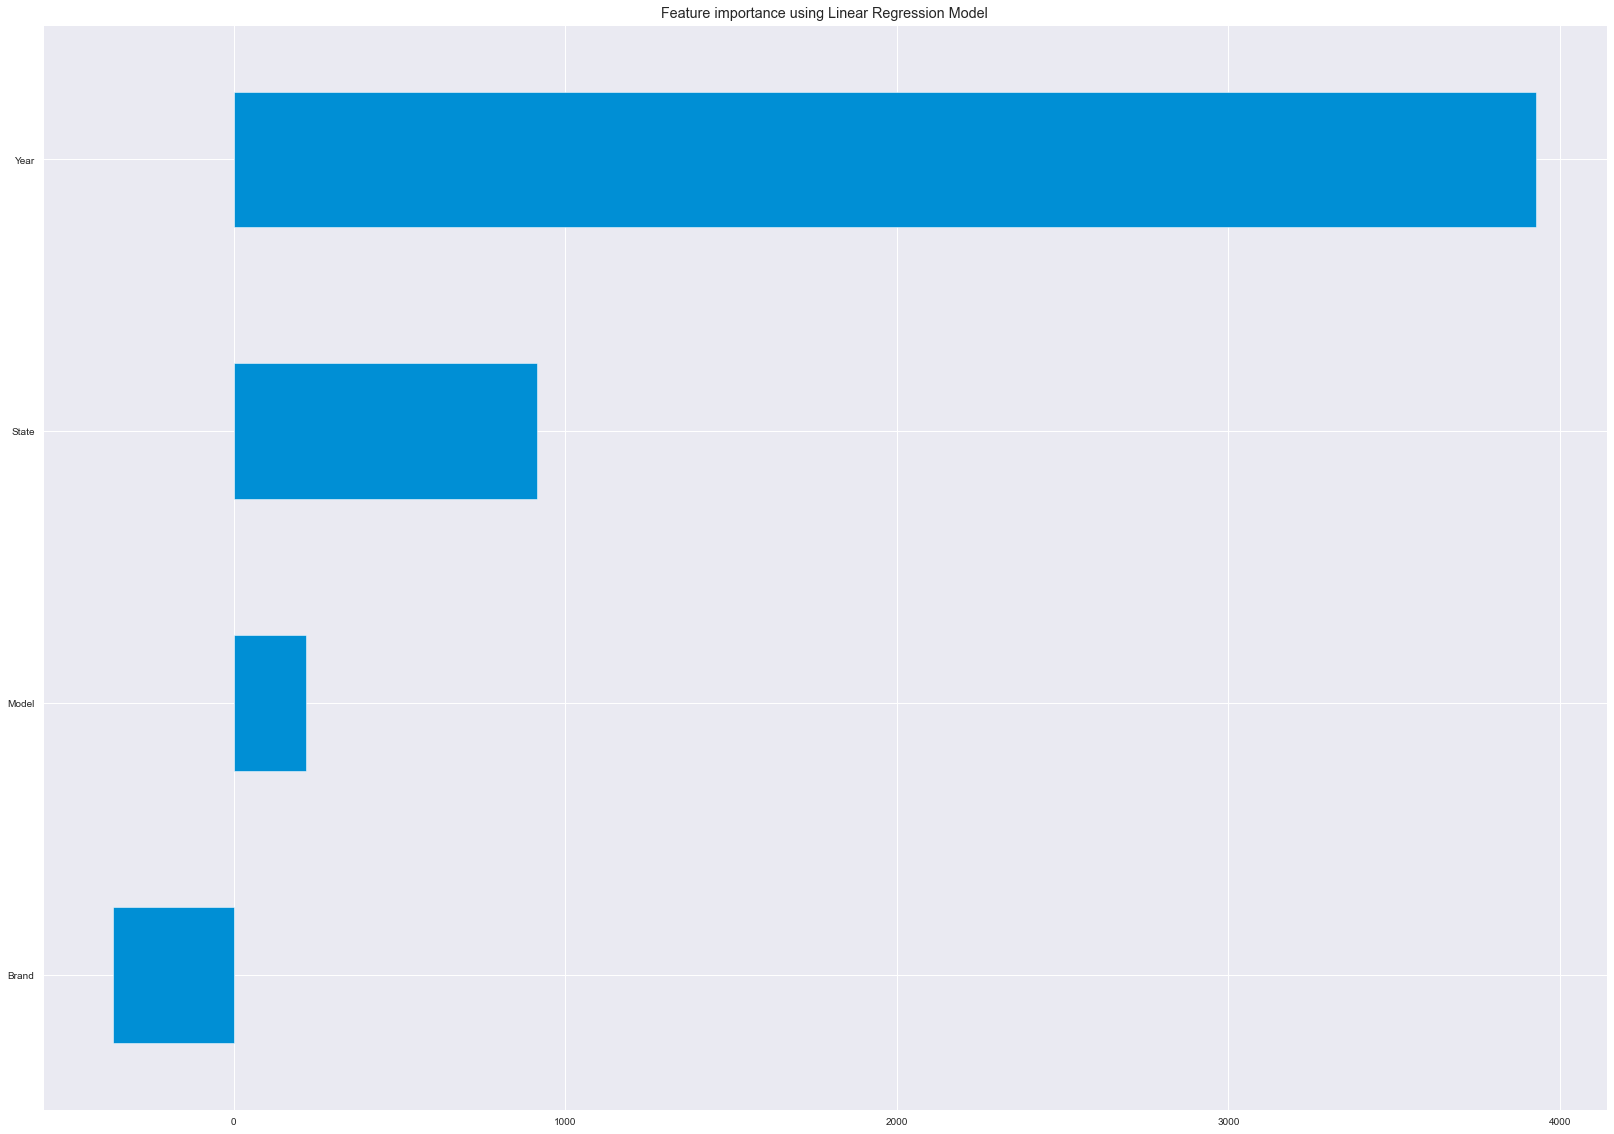

In [456]:
#Ploting feature importance graph
import matplotlib
coef = pd.Series(LR.coef_, index = ordered_int_enc_train.columns)
imp_coef = coef.sort_values()
matplotlib.rcParams['figure.figsize'] = (25.0, 20.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Linear Regression Model")
plt.savefig('Linear-Regression-Feature-Importance.jpg')
plt.show()

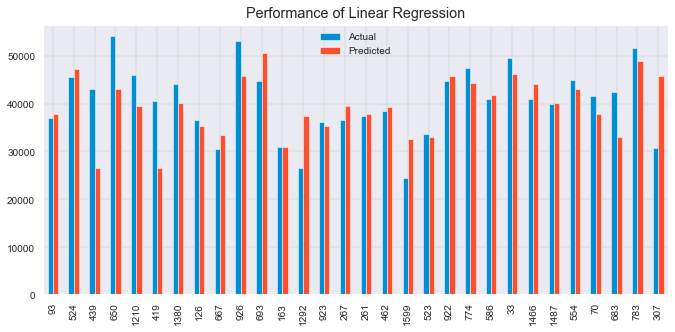

In [457]:
#Visualization of true value and predicted
df_check = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_check = df_check.sample(30)
df_check.plot(kind='bar',figsize=(10,5))
plt.grid(which='major', linestyle='-', linewidth='0.1', color='Green')
plt.title('Performance of Linear Regression')
plt.savefig('Linear-Regression-Performance')
plt.show()

### VII. Mean Encoding or Target Encoding

In [458]:
mean_enc_test_filled = mean_enc_test.fillna(0.0)

# Fitting model
LR = LinearRegression()
LR.fit(mean_enc_train,y_train)
y_pred=LR.predict(mean_enc_test_filled)

In [459]:
# Calculating error/accuracy
r1_lr = result('MEAN_ENC',y_test,y_pred,'Linear Regression')
print('Coefficients: \n', LR.coef_)
print("MSLE : {}".format(r1_lr[1]))
print("Root MSLE : {}".format(r1_lr[2]))
print("R2 Score : {} or {}%".format(r1_lr[3],r1_lr[4]))
accu['Linear Regression']=r1_lr

Coefficients: 
 [ 7.21649024e-01 -3.10647680e-01  8.62393651e-01  4.01317476e+03]
MSLE : 0.09235735356186667
Root MSLE : 0.30390352673482857
R2 Score : 0.24670758944342186 or 25.0%


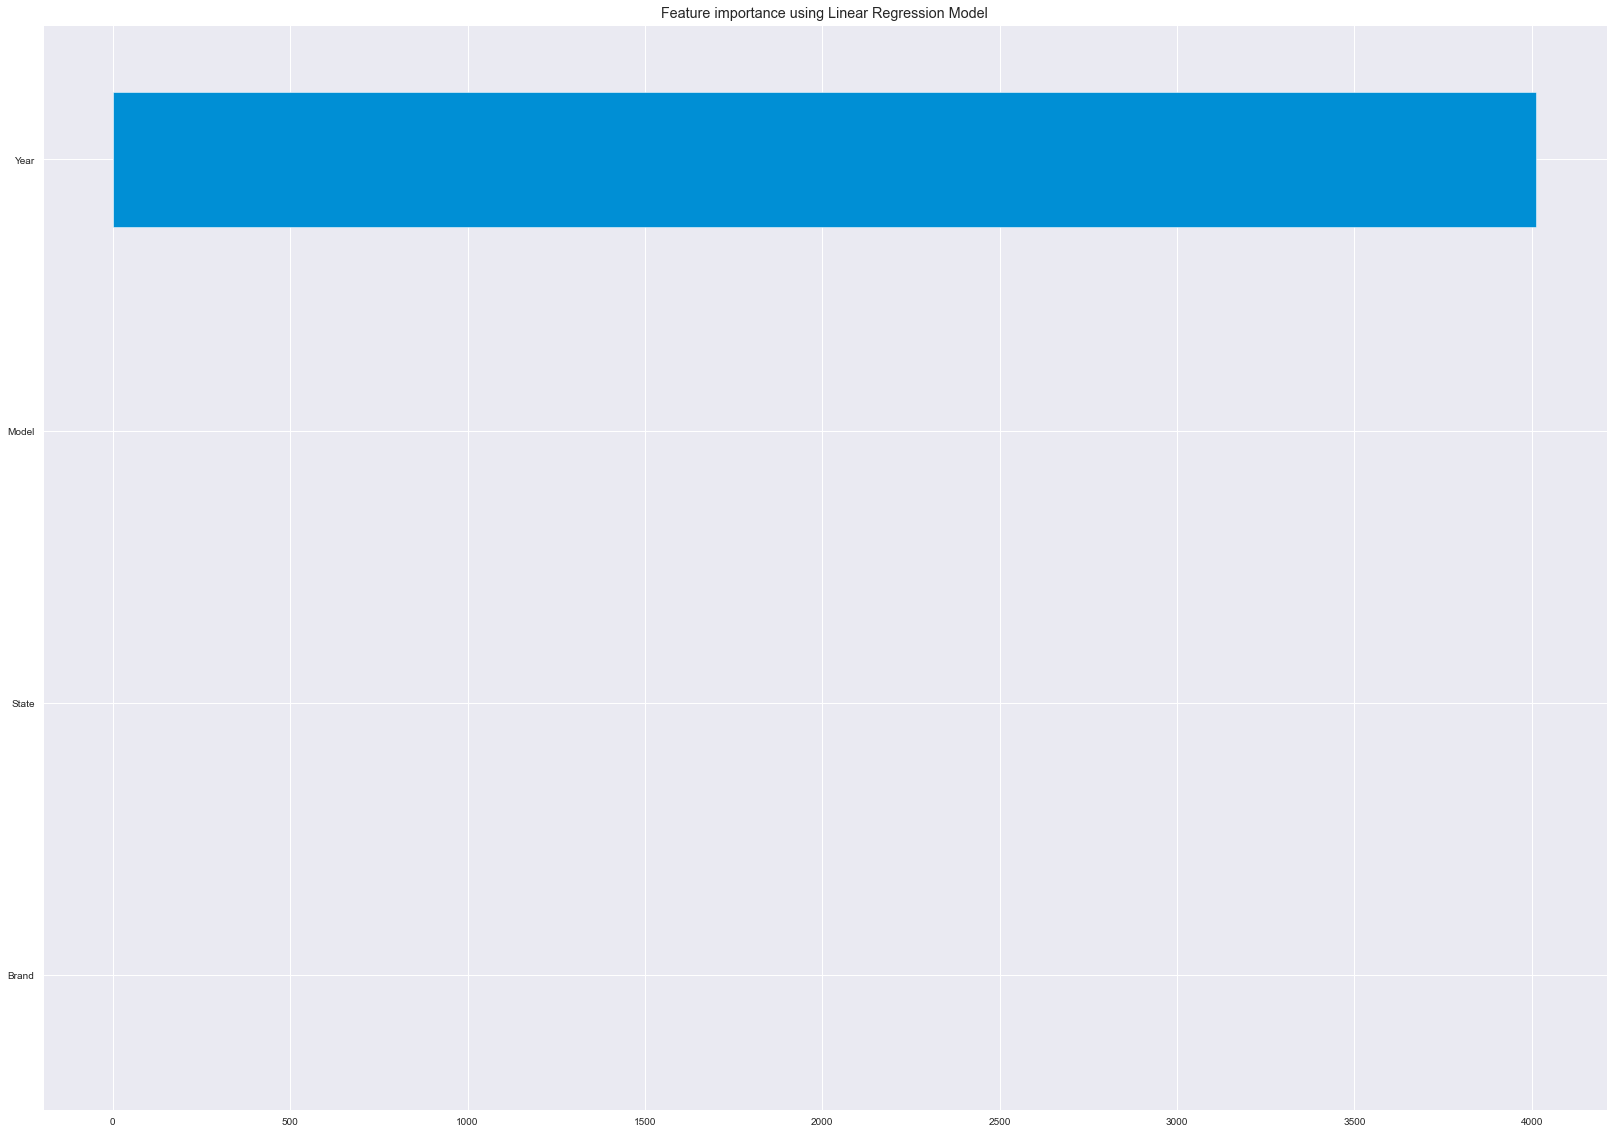

In [460]:
#Ploting feature importance graph
import matplotlib
coef = pd.Series(LR.coef_, index = mean_enc_train.columns)
imp_coef = coef.sort_values()
matplotlib.rcParams['figure.figsize'] = (25.0, 20.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Linear Regression Model")
plt.savefig('Linear-Regression-Feature-Importance.jpg')
plt.show()

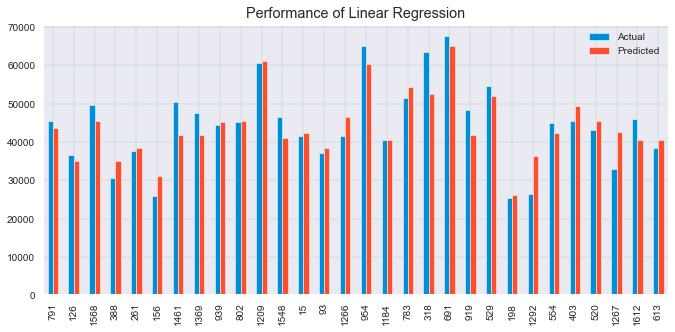

In [461]:
#Visualization of true value and predicted
df_check = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_check = df_check.sample(30)
df_check.plot(kind='bar',figsize=(10,5))
plt.grid(which='major', linestyle='-', linewidth='0.1', color='Green')
plt.title('Performance of Linear Regression')
plt.savefig('Linear-Regression-Performance')
plt.show()

### VIII. Engineering Rare Categories

In [462]:
# Fitting model
LR = LinearRegression()
LR.fit(rare_ohe_enc_train,y_train)
y_pred=LR.predict(rare_ohe_enc_test)

In [463]:
# Calculating error/accuracy
r1_lr = result('RARE_ENC',y_test,y_pred,'Linear Regression')
print('Coefficients: \n', LR.coef_)
print("MSLE : {}".format(r1_lr[1]))
print("Root MSLE : {}".format(r1_lr[2]))
print("R2 Score : {} or {}%".format(r1_lr[3],r1_lr[4]))
accu['Linear Regression']=r1_lr

Coefficients: 
 [ 5112.69558574  5658.0661569  -1491.45309859  1210.73896042
 -5377.35201873 -2250.86521715  -152.17237037  -518.61711887
  2921.65470639 -2554.2137268   2842.18328654   348.8557088
 -2700.41608826  2063.59081972]
MSLE : 0.025082397000955173
Root MSLE : 0.15837423086144783
R2 Score : 0.26487905098325426 or 26.0%


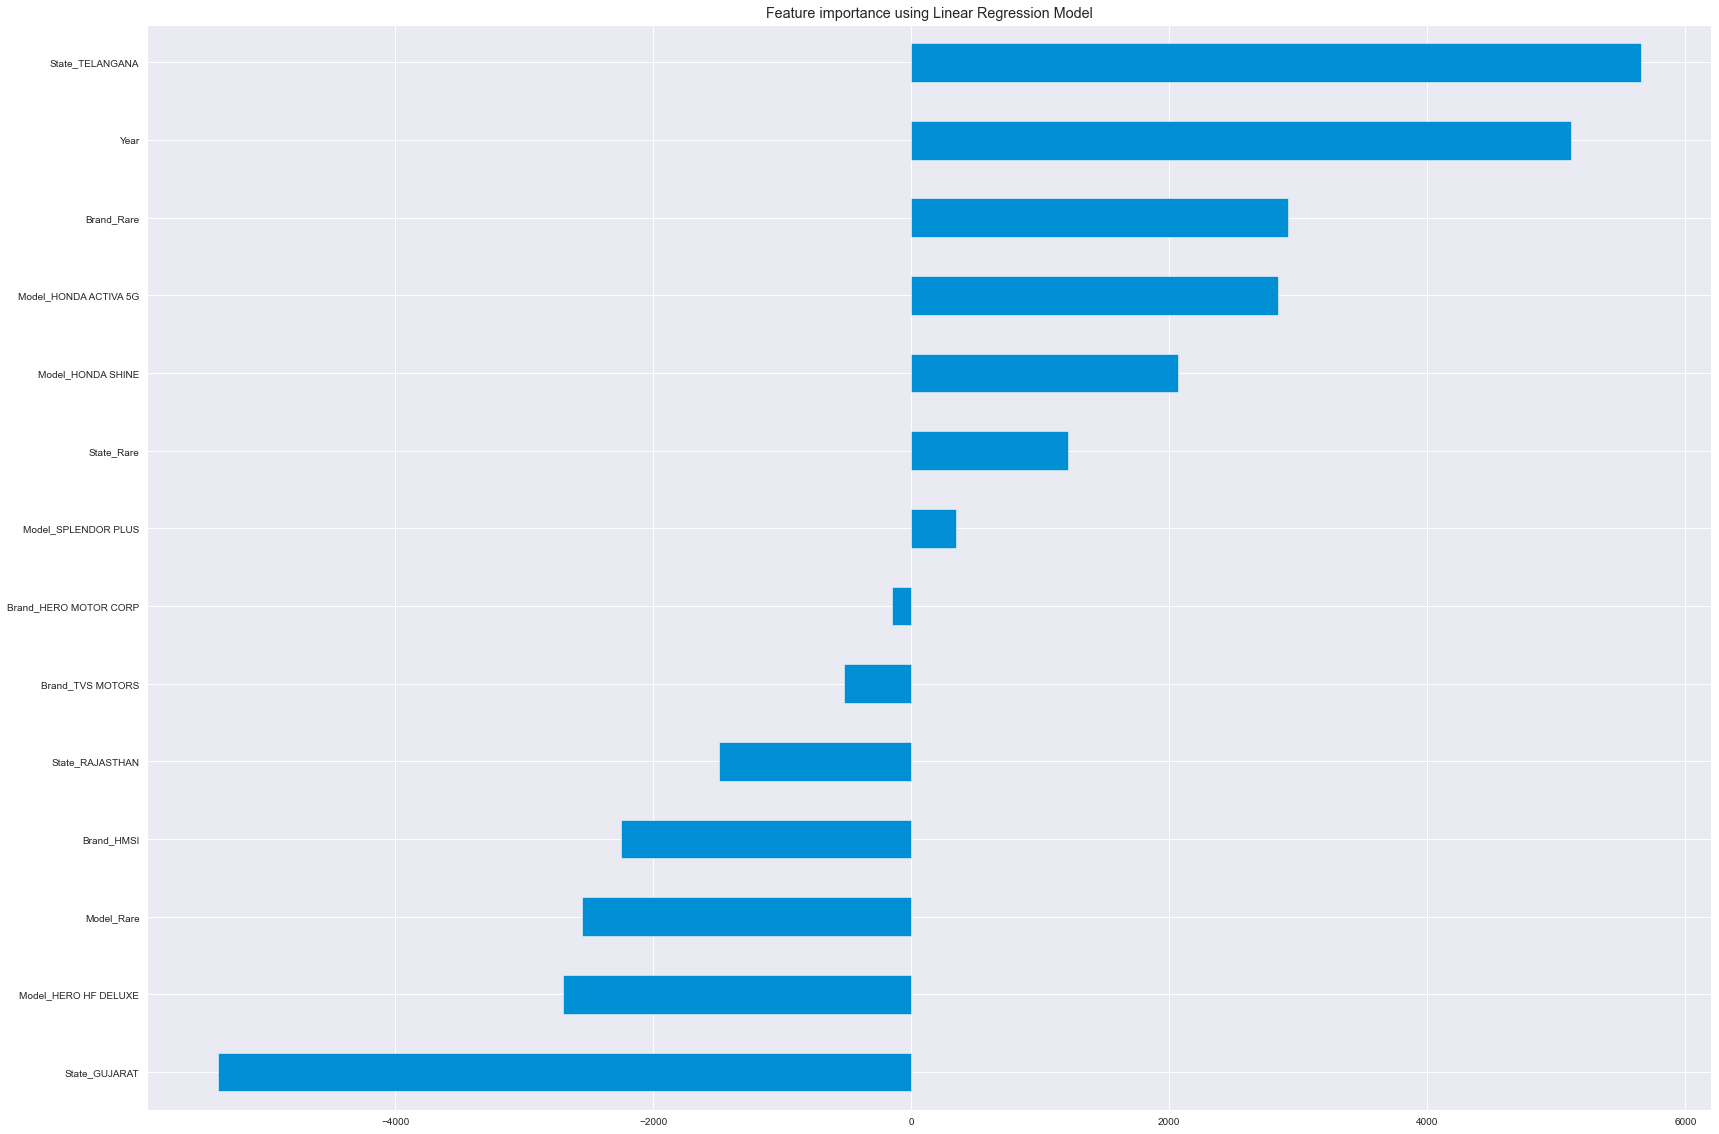

In [464]:
#Ploting feature importance graph
import matplotlib
coef = pd.Series(LR.coef_, index = rare_ohe_enc_train.columns)
imp_coef = coef.sort_values()
matplotlib.rcParams['figure.figsize'] = (25.0, 20.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Linear Regression Model")
plt.savefig('Linear-Regression-Feature-Importance.jpg')
plt.show()

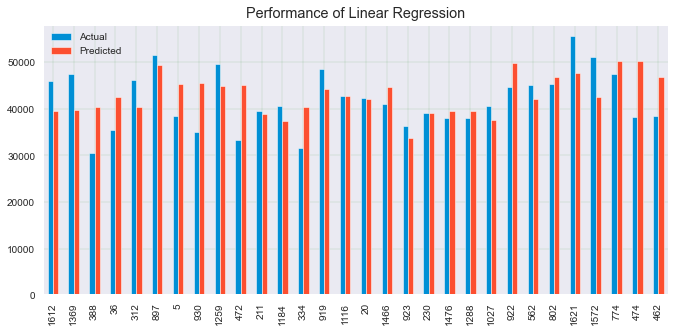

In [465]:
#Visualization of true value and predicted
df_check = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_check = df_check.sample(30)
df_check.plot(kind='bar',figsize=(10,5))
plt.grid(which='major', linestyle='-', linewidth='0.1', color='Green')
plt.title('Performance of Linear Regression')
plt.savefig('Linear-Regression-Performance')
plt.show()

# 2. Ridge Regression

### I.One Hot Encoding

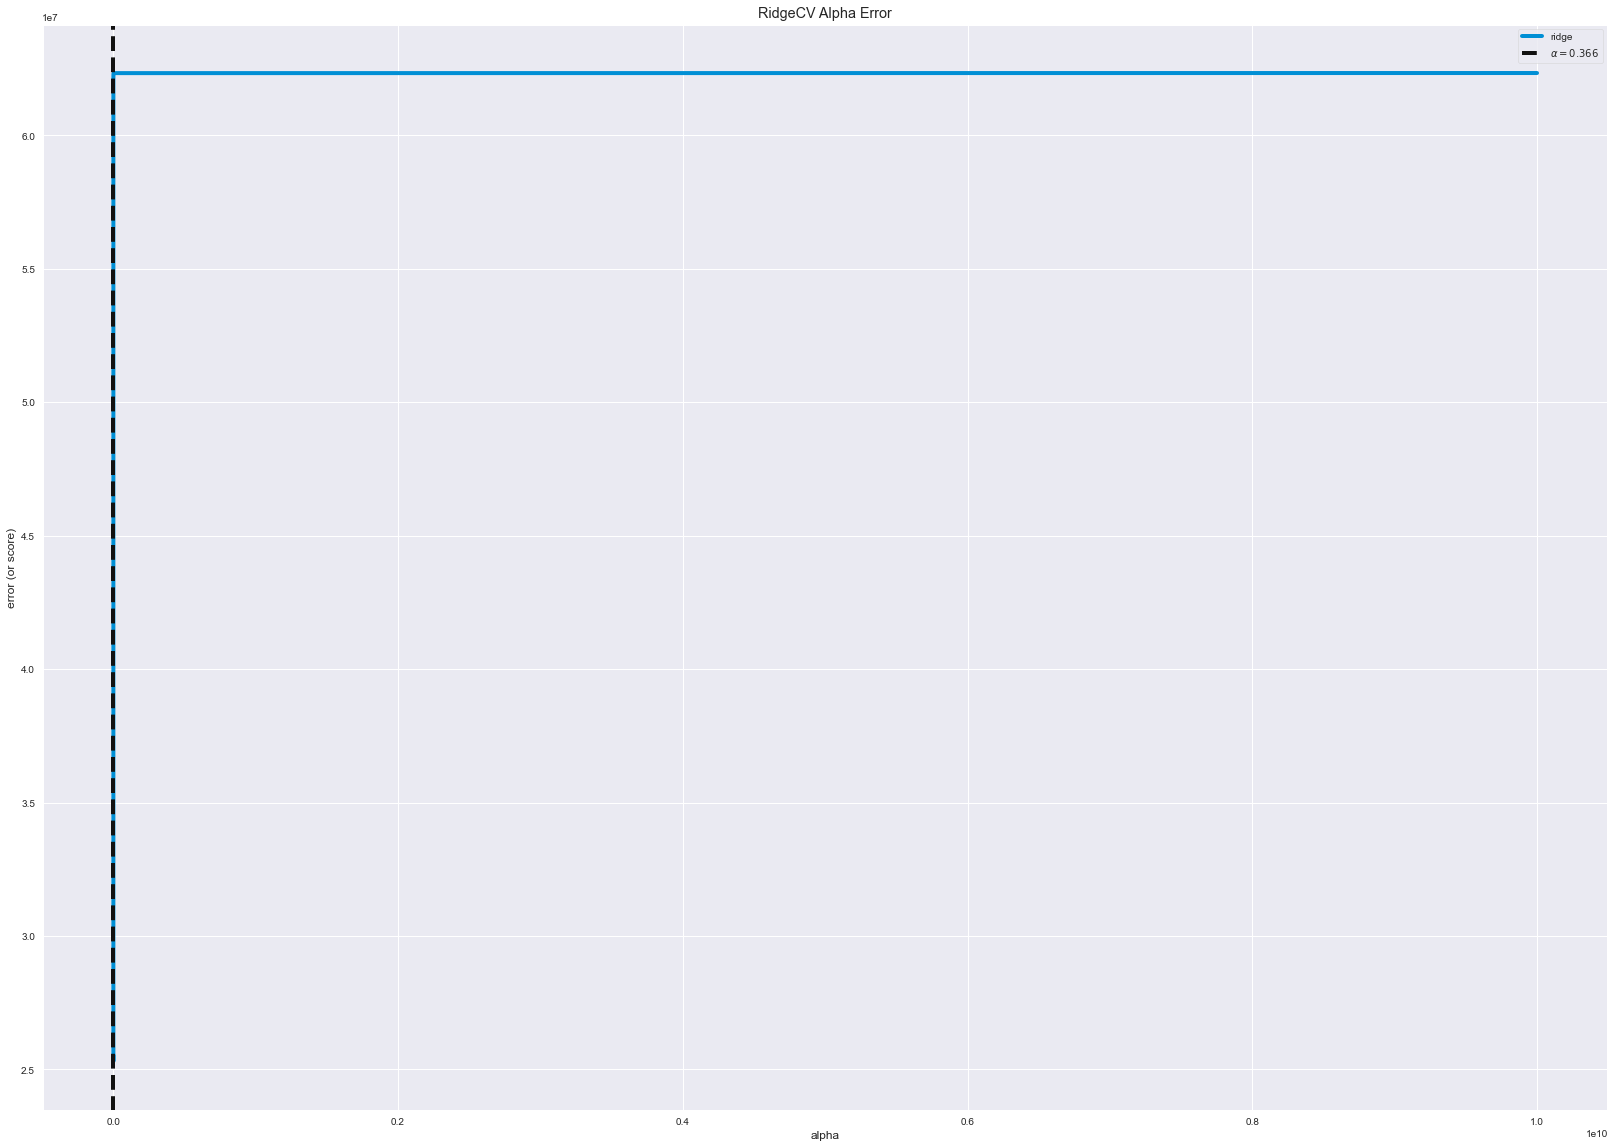

In [466]:
#predicting value of alpha
alphas = 10**np.linspace(10,-2,400)
model = RidgeCV(alphas=alphas)
visualizer = AlphaSelection(model)
visualizer.fit(ohe_enc_train,y_train)
visualizer.show()

In [467]:
#model object and fitting model
RR=Ridge(alpha=0.366,solver='auto')
RR.fit(ohe_enc_train,y_train)
y_pred=RR.predict(ohe_enc_test)

In [468]:
r2_ridge=result('OHE',y_test,y_pred,'Ridge Regression')
print("MSLE : {}".format(r2_ridge[1]))
print("Root MSLE : {}".format(r2_ridge[2]))
print("R2 Score : {} or {}%".format(r2_ridge[3],r2_ridge[4]))
accu['Ridge Regression']=r2_ridge

MSLE : 0.015355773269452559
Root MSLE : 0.12391841376265497
R2 Score : 0.5912687742839043 or 59.0%


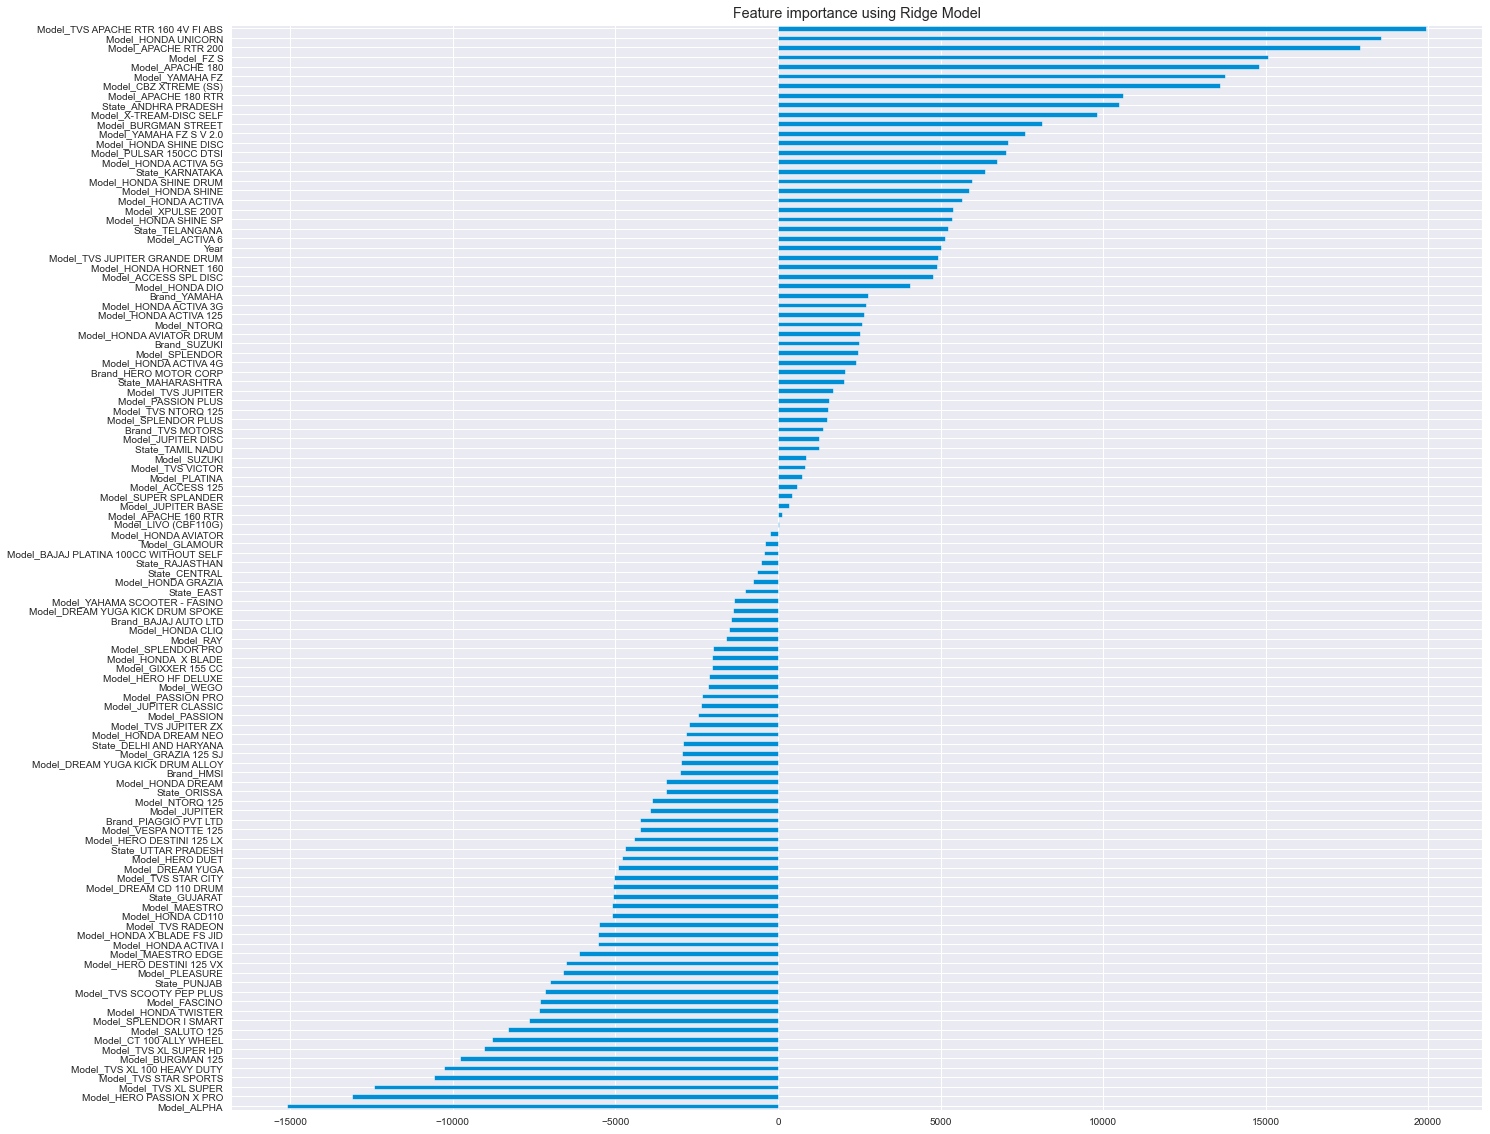

In [469]:
#Visualization of Feature Importance
coef = pd.Series(RR.coef_, index = ohe_enc_train.columns)
imp_coef = coef.sort_values()
matplotlib.rcParams['figure.figsize'] = (20.0, 20.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Ridge Model")
plt.savefig('Ridge-Regression-Feature-Importance.jpg')
plt.show()

### II. One Hot Encoding Top Categories

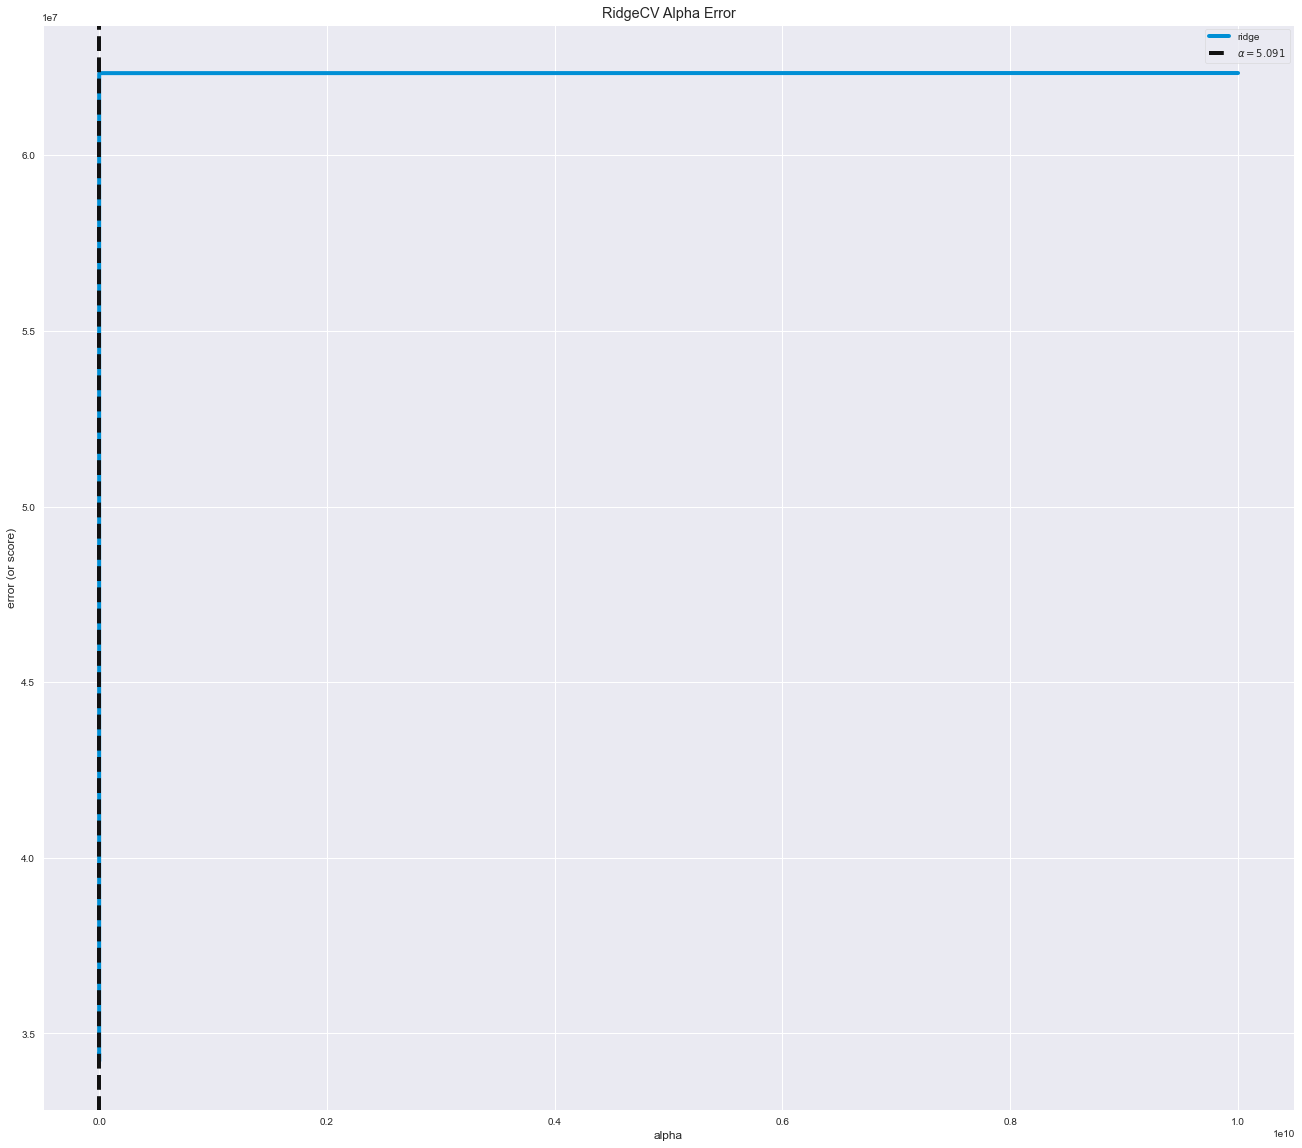

In [470]:
# Predicting value of alpha
alphas = 10**np.linspace(10,-2,400)
model = RidgeCV(alphas=alphas)
visualizer = AlphaSelection(model)
visualizer.fit(ohe_enc_train_top,y_train)
visualizer.show()

In [471]:
# Model object and fitting model
RR=Ridge(alpha=5.091,solver='auto')
RR.fit(ohe_enc_train_top,y_train)
y_pred=RR.predict(ohe_enc_test_top)

In [472]:
# Model evaluation
r2_ridge=result('OHE_TOP',y_test,y_pred,'Ridge Regression')
print("MSLE : {}".format(r2_ridge[1]))
print("Root MSLE : {}".format(r2_ridge[2]))
print("R2 Score : {} or {}%".format(r2_ridge[3],r2_ridge[4]))
accu['Ridge Regression']=r2_ridge

MSLE : 0.02307859948194089
Root MSLE : 0.15191642268675526
R2 Score : 0.3264808783063575 or 33.0%


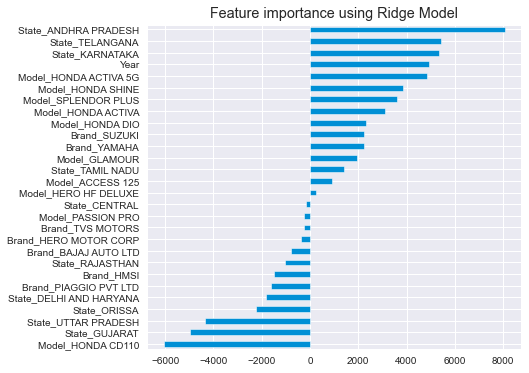

In [473]:
# Visualization of Feature Importance
coef = pd.Series(RR.coef_, index = ohe_enc_train_top.columns)
imp_coef = coef.sort_values()
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Ridge Model")
plt.savefig('Ridge-Regression-Feature-Importance.jpg')
plt.show()

### III. Count Encoding

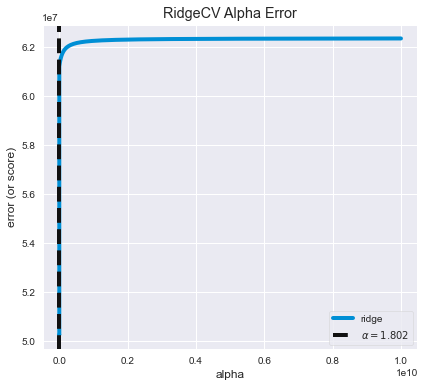

In [474]:
# Predicting value of alpha
alphas = 10**np.linspace(10,-2,400)
model = RidgeCV(alphas=alphas)
visualizer = AlphaSelection(model)
visualizer.fit(count_enc_train,y_train)
visualizer.show()

In [475]:
# Model object and fitting model
RR=Ridge(alpha=1.802,solver='auto')
RR.fit(count_enc_train,y_train)
y_pred=RR.predict(count_enc_test_filled)

In [476]:
# Model evaluation
r2_ridge=result('COUNT_ENC',y_test,y_pred,'Ridge Regression')
print("MSLE : {}".format(r2_ridge[1]))
print("Root MSLE : {}".format(r2_ridge[2]))
print("R2 Score : {} or {}%".format(r2_ridge[3],r2_ridge[4]))
accu['Ridge Regression']=r2_ridge

MSLE : 0.030909557150882724
Root MSLE : 0.17581114057670727
R2 Score : 0.12115368650072678 or 12.0%


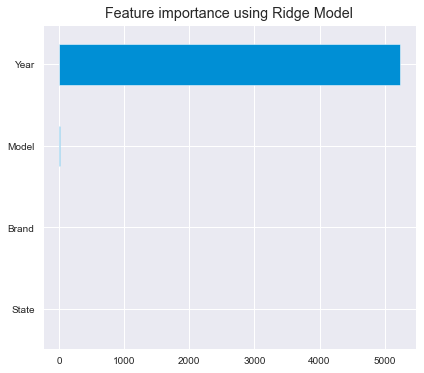

In [477]:
# Visualization of Feature Importance
coef = pd.Series(RR.coef_, index = count_enc_train.columns)
imp_coef = coef.sort_values()
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Ridge Model")
plt.savefig('Ridge-Regression-Feature-Importance.jpg')
plt.show()

### IV. Frequency Encoding

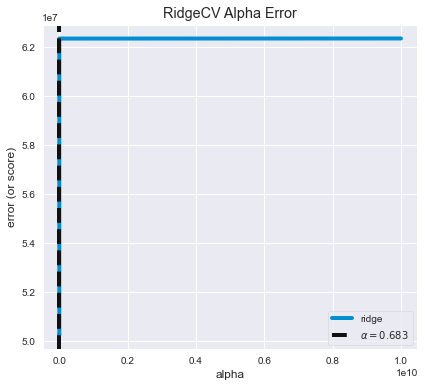

In [478]:
# Predicting value of alpha
alphas = 10**np.linspace(10,-2,400)
model = RidgeCV(alphas=alphas)
visualizer = AlphaSelection(model)
visualizer.fit(frequency_enc_train,y_train)
visualizer.show()

In [479]:
# Model object and fitting model
RR=Ridge(alpha=0.683,solver='auto')
RR.fit(frequency_enc_train,y_train)
y_pred=RR.predict(frequency_enc_test_filled)

In [480]:
# Model evaluation
r2_ridge=result('FREQUENCY_ENC',y_test,y_pred,'Ridge Regression')
print("MSLE : {}".format(r2_ridge[1]))
print("Root MSLE : {}".format(r2_ridge[2]))
print("R2 Score : {} or {}%".format(r2_ridge[3],r2_ridge[4]))
accu['Ridge Regression']=r2_ridge

MSLE : 0.030931692115198993
Root MSLE : 0.17587408028245377
R2 Score : 0.12133860438541022 or 12.0%


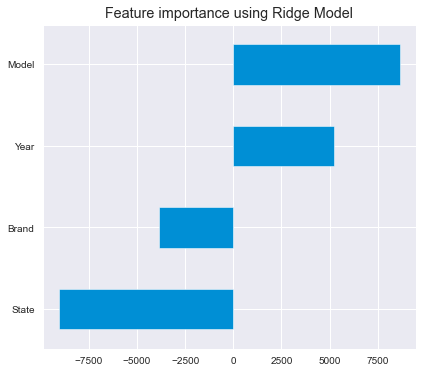

In [481]:
# Visualization of Feature Importance
coef = pd.Series(RR.coef_, index = frequency_enc_train.columns)
imp_coef = coef.sort_values()
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Ridge Model")
plt.savefig('Ridge-Regression-Feature-Importance.jpg')
plt.show()

### V. Integer Encoding

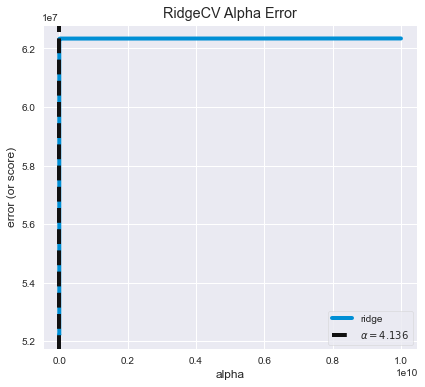

In [482]:
# Predicting value of alpha
alphas = 10**np.linspace(10,-2,400)
model = RidgeCV(alphas=alphas)
visualizer = AlphaSelection(model)
visualizer.fit(int_enc_train,y_train)
visualizer.show()

In [483]:
# Model object and fitting model
RR=Ridge(alpha=4.136,solver='auto')
RR.fit(int_enc_train,y_train)
y_pred=RR.predict(int_enc_test_filled)

In [484]:
# Model evaluation
r2_ridge=result('INT_ENC',y_test,y_pred,'Ridge Regression')
print("MSLE : {}".format(r2_ridge[1]))
print("Root MSLE : {}".format(r2_ridge[2]))
print("R2 Score : {} or {}%".format(r2_ridge[3],r2_ridge[4]))
accu['Ridge Regression']=r2_ridge

MSLE : 0.031866861513551
Root MSLE : 0.17851291693754542
R2 Score : 0.0979202076093385 or 10.0%


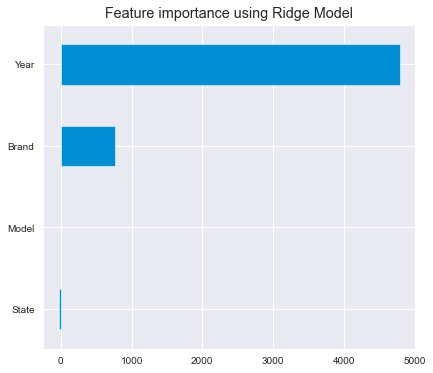

In [485]:
# Visualization of Feature Importance
coef = pd.Series(RR.coef_, index = int_enc_train.columns)
imp_coef = coef.sort_values()
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Ridge Model")
plt.savefig('Ridge-Regression-Feature-Importance.jpg')
plt.show()

### VI. Ordered Integer Encoding

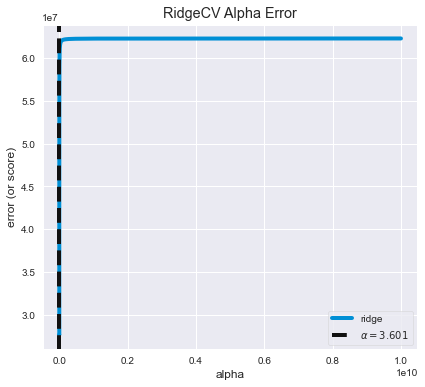

In [486]:
# Predicting value of alpha
alphas = 10**np.linspace(10,-2,400)
model = RidgeCV(alphas=alphas)
visualizer = AlphaSelection(model)
visualizer.fit(ordered_int_enc_train,y_train)
visualizer.show()

In [487]:
# Model object and fitting model
RR=Ridge(alpha=3.601,solver='auto')
RR.fit(ordered_int_enc_train,y_train)
y_pred=RR.predict(ordered_int_enc_test_filled)

In [488]:
# Model evaluation
r2_ridge=result('ORDERED_INT_ENC',y_test,y_pred,'Ridge Regression')
print("MSLE : {}".format(r2_ridge[1]))
print("Root MSLE : {}".format(r2_ridge[2]))
print("R2 Score : {} or {}%".format(r2_ridge[3],r2_ridge[4]))
accu['Ridge Regression']=r2_ridge

MSLE : 0.0228441725024355
Root MSLE : 0.1511428877004654
R2 Score : 0.42036599297226973 or 42.0%


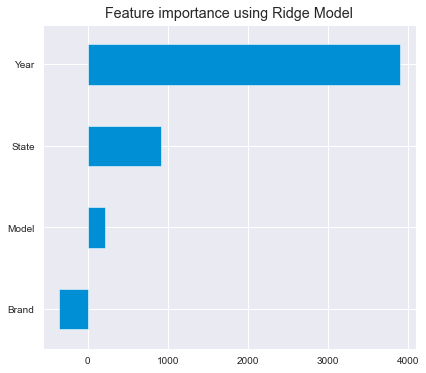

In [489]:
# Visualization of Feature Importance
coef = pd.Series(RR.coef_, index = ordered_int_enc_train.columns)
imp_coef = coef.sort_values()
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Ridge Model")
plt.savefig('Ridge-Regression-Feature-Importance.jpg')
plt.show()

### VII. Mean Target Encoding 

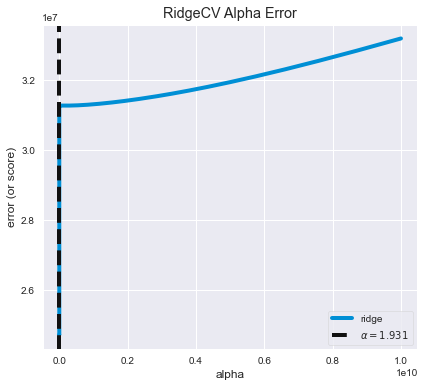

In [490]:
# Predicting value of alpha
alphas = 10**np.linspace(10,-2,400)
model = RidgeCV(alphas=alphas)
visualizer = AlphaSelection(model)
visualizer.fit(mean_enc_train,y_train)
visualizer.show()

In [491]:
# Model object and fitting model
RR=Ridge(alpha=1.931,solver='auto')
RR.fit(mean_enc_train,y_train)
y_pred=RR.predict(mean_enc_test_filled)

In [492]:
# Model evaluation
r2_ridge=result('MEAN_ENC',y_test,y_pred,'Ridge Regression')
print("MSLE : {}".format(r2_ridge[1]))
print("Root MSLE : {}".format(r2_ridge[2]))
print("R2 Score : {} or {}%".format(r2_ridge[3],r2_ridge[4]))
accu['Ridge Regression']=r2_ridge

MSLE : 0.0922116163720749
Root MSLE : 0.3036636566533356
R2 Score : 0.24682101745090923 or 25.0%


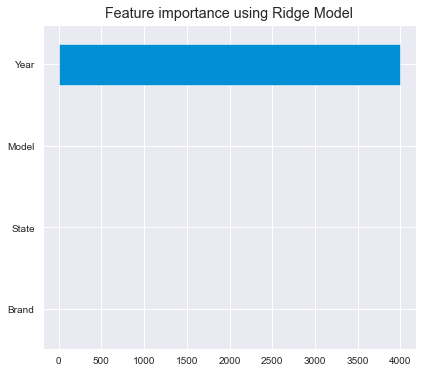

In [493]:
# Visualization of Feature Importance
coef = pd.Series(RR.coef_, index = mean_enc_train.columns)
imp_coef = coef.sort_values()
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Ridge Model")
plt.savefig('Ridge-Regression-Feature-Importance.jpg')
plt.show()

### VIII. Engineering Rare Labels

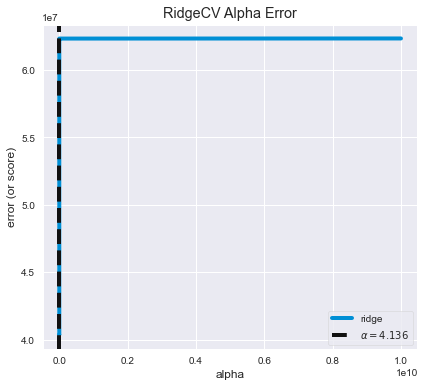

In [494]:
# Predicting value of alpha
alphas = 10**np.linspace(10,-2,400)
model = RidgeCV(alphas=alphas)
visualizer = AlphaSelection(model)
visualizer.fit(rare_ohe_enc_train,y_train)
visualizer.show()

In [495]:
# Model object and fitting model
RR=Ridge(alpha=4.136,solver='auto')
RR.fit(rare_ohe_enc_train,y_train)
y_pred=RR.predict(rare_ohe_enc_test)

In [496]:
# Model evaluation
r2_ridge=result('RARE_ENC',y_test,y_pred,'Ridge Regression')
print("MSLE : {}".format(r2_ridge[1]))
print("Root MSLE : {}".format(r2_ridge[2]))
print("R2 Score : {} or {}%".format(r2_ridge[3],r2_ridge[4]))
accu['Ridge Regression']=r2_ridge

MSLE : 0.02507841395466139
Root MSLE : 0.1583616555693372
R2 Score : 0.26595427445549713 or 27.0%


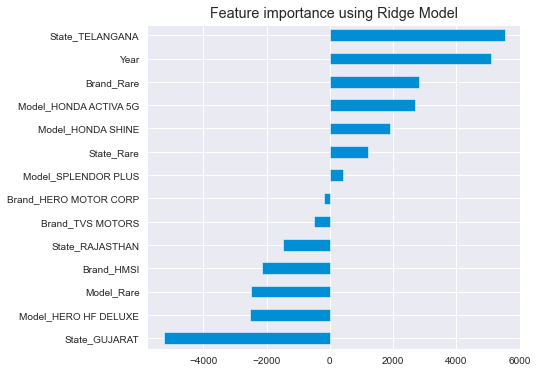

In [497]:
# Visualization of Feature Importance
coef = pd.Series(RR.coef_, index = rare_ohe_enc_train.columns)
imp_coef = coef.sort_values()
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Ridge Model")
plt.savefig('Ridge-Regression-Feature-Importance.jpg')
plt.show()

# 3. Lasso Regression

### I. One Hot Encoding

In [498]:
# Model object and fitting it
lasso=Lasso(alpha=0.0001)
lasso.fit(ohe_enc_train,y_train)
y_pred=lasso.predict(ohe_enc_test)

In [499]:
# Model evaluation
r3_lasso=result('OHE',y_test,y_pred,'Lasso Regression')
print("MSLE : {}".format(r3_lasso[1]))
print("Root MSLE : {}".format(r3_lasso[2]))
print("R2 Score : {} or {}%".format(r3_lasso[3],r3_lasso[4]))
accu['Lasso Regression']=r3_lasso

MSLE : 0.015291961544152355
Root MSLE : 0.1236606709675811
R2 Score : 0.5937247240375869 or 59.0%


### II. One Hot Top Encoding

In [500]:
# Model object and fitting it
lasso=Lasso(alpha=0.0001)
lasso.fit(ohe_enc_train_top,y_train)
y_pred=lasso.predict(ohe_enc_test_top)

In [501]:
# Model evaluation
r3_lasso=result('OHE_TOP',y_test,y_pred,'Lasso Regression')
print("MSLE : {}".format(r3_lasso[1]))
print("Root MSLE : {}".format(r3_lasso[2]))
print("R2 Score : {} or {}%".format(r3_lasso[3],r3_lasso[4]))
accu['Lasso Regression']=r3_lasso

MSLE : 0.02353099477869721
Root MSLE : 0.15339815767699821
R2 Score : 0.31592990276883737 or 32.0%


### III. Count Encoding

In [502]:
# Model object and fitting it
lasso=Lasso(alpha=0.0001)
lasso.fit(count_enc_train,y_train)
y_pred=lasso.predict(count_enc_test_filled)

In [503]:
# Model evaluation
r3_lasso=result('COUNT_ENC',y_test,y_pred,'Lasso Regression')
print("MSLE : {}".format(r3_lasso[1]))
print("Root MSLE : {}".format(r3_lasso[2]))
print("R2 Score : {} or {}%".format(r3_lasso[3],r3_lasso[4]))
accu['Lasso Regression']=r3_lasso

MSLE : 0.030915624157361894
Root MSLE : 0.1758283940589855
R2 Score : 0.12094490563978522 or 12.0%


### IV. Frequency Encoding

In [504]:
# Model object and fitting it
lasso=Lasso(alpha=0.0001)
lasso.fit(frequency_enc_train,y_train)
y_pred=lasso.predict(frequency_enc_test_filled)

In [505]:
# Model evaluation
r3_lasso=result('FREQUENCY_ENC',y_test,y_pred,'Lasso Regression')
print("MSLE : {}".format(r3_lasso[1]))
print("Root MSLE : {}".format(r3_lasso[2]))
print("R2 Score : {} or {}%".format(r3_lasso[3],r3_lasso[4]))
accu['Lasso Regression']=r3_lasso

MSLE : 0.030915624791475926
Root MSLE : 0.17582839586220403
R2 Score : 0.12094490901224053 or 12.0%


### V. Integer Encoding

In [506]:
# Model object and fitting it
lasso=Lasso(alpha=0.0001)
lasso.fit(int_enc_train,y_train)
y_pred=lasso.predict(int_enc_test_filled)

In [507]:
# Model evaluation
r3_lasso=result('INT_ENC',y_test,y_pred,'Lasso Regression')
print("MSLE : {}".format(r3_lasso[1]))
print("Root MSLE : {}".format(r3_lasso[2]))
print("R2 Score : {} or {}%".format(r3_lasso[3],r3_lasso[4]))
accu['Lasso Regression']=r3_lasso

MSLE : 0.031877873458127405
Root MSLE : 0.17854375782459436
R2 Score : 0.09754303508459061 or 10.0%


### VI. Ordered Integer Encoding

In [508]:
# Model object and fitting it
lasso=Lasso(alpha=0.0001)
lasso.fit(ordered_int_enc_train,y_train)
y_pred=lasso.predict(ordered_int_enc_test_filled)

In [509]:
# Model evaluation
r3_lasso=result('ORDERED_INT_ENC',y_test,y_pred,'Lasso Regression')
print("MSLE : {}".format(r3_lasso[1]))
print("Root MSLE : {}".format(r3_lasso[2]))
print("R2 Score : {} or {}%".format(r3_lasso[3],r3_lasso[4]))
accu['Lasso Regression']=r3_lasso

MSLE : 0.02285783454387201
Root MSLE : 0.1511880767252233
R2 Score : 0.4202061268861832 or 42.0%


### VII. Mean Target Encoding

In [510]:
# Model object and fitting it
lasso=Lasso(alpha=0.0001)
lasso.fit(mean_enc_train,y_train)
y_pred=lasso.predict(mean_enc_test_filled)

In [511]:
# Model evaluation
r3_lasso=result('MEAN_ENC',y_test,y_pred,'Lasso Regression')
print("MSLE : {}".format(r3_lasso[1]))
print("Root MSLE : {}".format(r3_lasso[2]))
print("R2 Score : {} or {}%".format(r3_lasso[3],r3_lasso[4]))
accu['Lasso Regression']=r3_lasso

MSLE : 0.09235735095570498
Root MSLE : 0.3039035224470177
R2 Score : 0.24670759148222454 or 25.0%


### VIII. Engineering Rare Label

In [512]:
# Model object and fitting it
lasso=Lasso(alpha=0.0001)
lasso.fit(rare_ohe_enc_train,y_train)
y_pred=lasso.predict(rare_ohe_enc_test)

In [513]:
# Model evaluation
r3_lasso=result('RARE_ENC',y_test,y_pred,'Lasso Regression')
print("MSLE : {}".format(r3_lasso[1]))
print("Root MSLE : {}".format(r3_lasso[2]))
print("R2 Score : {} or {}%".format(r3_lasso[3],r3_lasso[4]))
accu['Lasso Regression']=r3_lasso

MSLE : 0.02508239670126483
Root MSLE : 0.15837422991530165
R2 Score : 0.26487906313313814 or 26.0%


# 4. KNN Regressor 

### I. One Hot Encoding

In [514]:
#estimating MSLE for k=1-26
R_MSLE=[]
for i in range(1,26):
    KNN=KNeighborsRegressor(n_neighbors=i)
    KNN.fit(ohe_enc_train,y_train)
    y_pred=KNN.predict(ohe_enc_test)
    error=np.sqrt(mean_squared_log_error(y_test, y_pred))
    R_MSLE.append(error)
    print("K =",i," , Root MSLE =",error)

K = 1  , Root MSLE = 0.15751553444301378
K = 2  , Root MSLE = 0.14572549894589976
K = 3  , Root MSLE = 0.13552149809365105
K = 4  , Root MSLE = 0.13342059884024435
K = 5  , Root MSLE = 0.12746863032079844
K = 6  , Root MSLE = 0.12559561544526282
K = 7  , Root MSLE = 0.12584549697868772
K = 8  , Root MSLE = 0.12698469660539596
K = 9  , Root MSLE = 0.1260986618386726
K = 10  , Root MSLE = 0.12450053854464214
K = 11  , Root MSLE = 0.12724042606748184
K = 12  , Root MSLE = 0.1284780286074956
K = 13  , Root MSLE = 0.13003225740236854
K = 14  , Root MSLE = 0.12880824976459962
K = 15  , Root MSLE = 0.12885332493148893
K = 16  , Root MSLE = 0.1307058896198268
K = 17  , Root MSLE = 0.13123724374228796
K = 18  , Root MSLE = 0.1336051171523792
K = 19  , Root MSLE = 0.13299502730001403
K = 20  , Root MSLE = 0.13395031007427413
K = 21  , Root MSLE = 0.13685313000718197
K = 22  , Root MSLE = 0.13635387404548296
K = 23  , Root MSLE = 0.13657271725648729
K = 24  , Root MSLE = 0.1375161078532153
K = 25

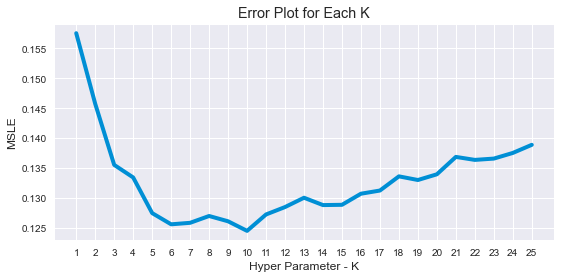

In [515]:
# Plotting Error
curve = pd.DataFrame(R_MSLE) #elbow curve 
plt.figure(figsize=(8,4))
plt.xticks(list(range(1,26)), list(range(1,26)), rotation='horizontal')
plt.plot(list(range(1,26)),R_MSLE)
plt.xlabel('Hyper Parameter - K')
plt.ylabel('MSLE')
plt.title('Error Plot for Each K')
plt.savefig('KNN-Error-Plot.jpg')
plt.show()

In [516]:
#model implementation
KNN=KNeighborsRegressor(n_neighbors=10) 
KNN.fit(ohe_enc_train,y_train)
y_pred=KNN.predict(ohe_enc_test)

In [517]:
#model evaluation
r4_knn=result('OHE',y_test,y_pred,'KNN Regression')
print("MSLE : {}".format(r4_knn[1]))
print("Root MSLE : {}".format(r4_knn[2]))
print("R2 Score : {} or {}%".format(r4_knn[3],r4_knn[4]))
accu['KNN']=r4_knn

MSLE : 0.015500384097905924
Root MSLE : 0.12450053854464214
R2 Score : 0.566177535364083 or 57.0%


### II. One Hot Top Encoding

In [518]:
#estimating MSLE for k=1-26
R_MSLE=[]
for i in range(1,26):
    KNN=KNeighborsRegressor(n_neighbors=i)
    KNN.fit(ohe_enc_train_top,y_train)
    y_pred=KNN.predict(ohe_enc_test_top)
    error=np.sqrt(mean_squared_log_error(y_test, y_pred))
    R_MSLE.append(error)
    print("K =",i," , Root MSLE =",error)

K = 1  , Root MSLE = 0.18625690961972224
K = 2  , Root MSLE = 0.15976748821982317
K = 3  , Root MSLE = 0.1434026209737698
K = 4  , Root MSLE = 0.14183331801106458
K = 5  , Root MSLE = 0.14236749486901412
K = 6  , Root MSLE = 0.1411819880446825
K = 7  , Root MSLE = 0.14209972820950312
K = 8  , Root MSLE = 0.1409256868026824
K = 9  , Root MSLE = 0.1416047467030387
K = 10  , Root MSLE = 0.14120199306195927
K = 11  , Root MSLE = 0.14108914088113908
K = 12  , Root MSLE = 0.14153291113968708
K = 13  , Root MSLE = 0.14268090342534095
K = 14  , Root MSLE = 0.14399207488841717
K = 15  , Root MSLE = 0.1438393941208386
K = 16  , Root MSLE = 0.14437069998292157
K = 17  , Root MSLE = 0.14497818389306946
K = 18  , Root MSLE = 0.14475789117428184
K = 19  , Root MSLE = 0.14582717304979098
K = 20  , Root MSLE = 0.14428815507137993
K = 21  , Root MSLE = 0.1433207344788539
K = 22  , Root MSLE = 0.14099306234638903
K = 23  , Root MSLE = 0.1421671911191786
K = 24  , Root MSLE = 0.14147373981507155
K = 25  

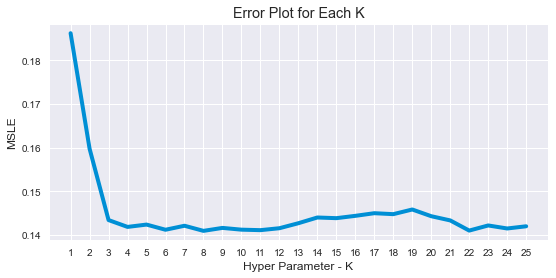

In [519]:
# Plotting Error
curve = pd.DataFrame(R_MSLE) #elbow curve 
plt.figure(figsize=(8,4))
plt.xticks(list(range(1,26)), list(range(1,26)), rotation='horizontal')
plt.plot(list(range(1,26)),R_MSLE)
plt.xlabel('Hyper Parameter - K')
plt.ylabel('MSLE')
plt.title('Error Plot for Each K')
plt.savefig('KNN-Error-Plot.jpg')
plt.show()

In [520]:
#model implementation
KNN=KNeighborsRegressor(n_neighbors=6) 
KNN.fit(ohe_enc_train_top,y_train)
y_pred=KNN.predict(ohe_enc_test_top)

In [521]:
#model evaluation
r4_knn=result('OHE_TOP',y_test,y_pred,'KNN Regression')
print("MSLE : {}".format(r4_knn[1]))
print("Root MSLE : {}".format(r4_knn[2]))
print("R2 Score : {} or {}%".format(r4_knn[3],r4_knn[4]))
accu['KNN']=r4_knn

MSLE : 0.01993235374824887
Root MSLE : 0.1411819880446825
R2 Score : 0.41057878232219347 or 41.0%


### III. Count Encoding

In [522]:
#estimating MSLE for k=1-26
R_MSLE=[]
for i in range(1,26):
    KNN=KNeighborsRegressor(n_neighbors=i)
    KNN.fit(count_enc_train,y_train)
    y_pred=KNN.predict(count_enc_test_filled)
    error=np.sqrt(mean_squared_log_error(y_test, y_pred))
    R_MSLE.append(error)
    print("K =",i," , Root MSLE =",error)

K = 1  , Root MSLE = 0.18685926143965487
K = 2  , Root MSLE = 0.15196864036710456
K = 3  , Root MSLE = 0.14804939848832577
K = 4  , Root MSLE = 0.14859095442744466
K = 5  , Root MSLE = 0.15418889772967423
K = 6  , Root MSLE = 0.15618755052512245
K = 7  , Root MSLE = 0.1549639062976465
K = 8  , Root MSLE = 0.1550321287085762
K = 9  , Root MSLE = 0.15307130477244324
K = 10  , Root MSLE = 0.15263920476459714
K = 11  , Root MSLE = 0.15557945793278652
K = 12  , Root MSLE = 0.15803854585486324
K = 13  , Root MSLE = 0.15877017207618374
K = 14  , Root MSLE = 0.15947753149096436
K = 15  , Root MSLE = 0.1579328446536519
K = 16  , Root MSLE = 0.15747013396332918
K = 17  , Root MSLE = 0.15816334612152413
K = 18  , Root MSLE = 0.15812475146592314
K = 19  , Root MSLE = 0.15844810093536185
K = 20  , Root MSLE = 0.1576413329706221
K = 21  , Root MSLE = 0.1581385016956911
K = 22  , Root MSLE = 0.1584374021015786
K = 23  , Root MSLE = 0.15966311141089784
K = 24  , Root MSLE = 0.16043554642749744
K = 25 

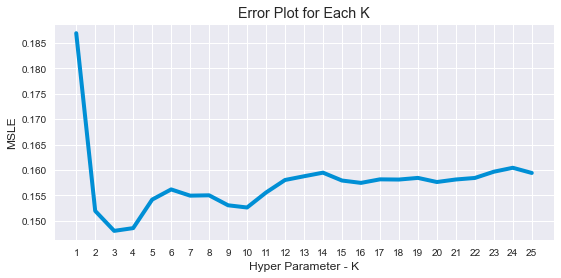

In [523]:
# Plotting Error
curve = pd.DataFrame(R_MSLE) #elbow curve 
plt.figure(figsize=(8,4))
plt.xticks(list(range(1,26)), list(range(1,26)), rotation='horizontal')
plt.plot(list(range(1,26)),R_MSLE)
plt.xlabel('Hyper Parameter - K')
plt.ylabel('MSLE')
plt.title('Error Plot for Each K')
plt.savefig('KNN-Error-Plot.jpg')
plt.show()

In [524]:
#model implementation
KNN=KNeighborsRegressor(n_neighbors=3) 
KNN.fit(count_enc_train,y_train)
y_pred=KNN.predict(count_enc_test_filled)

In [525]:
#model evaluation
r4_knn=result('COUNT_ENC',y_test,y_pred,'KNN Regression')
print("MSLE : {}".format(r4_knn[1]))
print("Root MSLE : {}".format(r4_knn[2]))
print("R2 Score : {} or {}%".format(r4_knn[3],r4_knn[4]))
accu['KNN']=r4_knn

MSLE : 0.02191862439275508
Root MSLE : 0.14804939848832577
R2 Score : 0.37348578747189476 or 37.0%


### IV. Frequency Encoding

In [526]:
#estimating MSLE for k=1-26
R_MSLE=[]
for i in range(1,26):
    KNN=KNeighborsRegressor(n_neighbors=i)
    KNN.fit(frequency_enc_train,y_train)
    y_pred=KNN.predict(frequency_enc_test_filled)
    error=np.sqrt(mean_squared_log_error(y_test, y_pred))
    R_MSLE.append(error)
    print("K =",i," , Root MSLE =",error)

K = 1  , Root MSLE = 0.1914750914291334
K = 2  , Root MSLE = 0.17254940262865254
K = 3  , Root MSLE = 0.16609756216248117
K = 4  , Root MSLE = 0.15851664910708735
K = 5  , Root MSLE = 0.15223563587060734
K = 6  , Root MSLE = 0.15313585933642013
K = 7  , Root MSLE = 0.1548535109232621
K = 8  , Root MSLE = 0.1550183146790775
K = 9  , Root MSLE = 0.15483426591968436
K = 10  , Root MSLE = 0.15662894026647614
K = 11  , Root MSLE = 0.1547422410133971
K = 12  , Root MSLE = 0.1518624132168468
K = 13  , Root MSLE = 0.15114383065779938
K = 14  , Root MSLE = 0.1501520356595174
K = 15  , Root MSLE = 0.1495042135439644
K = 16  , Root MSLE = 0.14831117975500502
K = 17  , Root MSLE = 0.14826230697040493
K = 18  , Root MSLE = 0.14914611915797427
K = 19  , Root MSLE = 0.14830601544114022
K = 20  , Root MSLE = 0.14799168000637883
K = 21  , Root MSLE = 0.14920299887120922
K = 22  , Root MSLE = 0.1508062464938899
K = 23  , Root MSLE = 0.15145085930689367
K = 24  , Root MSLE = 0.15239257641705886
K = 25  ,

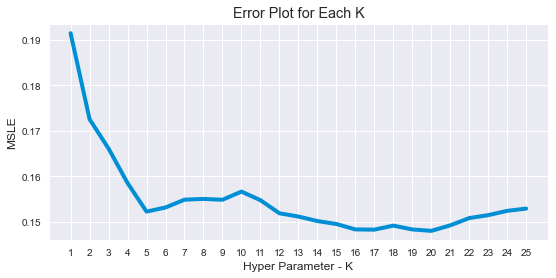

In [527]:
# Plotting Error
curve = pd.DataFrame(R_MSLE) #elbow curve 
plt.figure(figsize=(8,4))
plt.xticks(list(range(1,26)), list(range(1,26)), rotation='horizontal')
plt.plot(list(range(1,26)),R_MSLE)
plt.xlabel('Hyper Parameter - K')
plt.ylabel('MSLE')
plt.title('Error Plot for Each K')
plt.savefig('KNN-Error-Plot.jpg')
plt.show()

In [528]:
#model implementation
KNN=KNeighborsRegressor(n_neighbors=20) 
KNN.fit(frequency_enc_train,y_train)
y_pred=KNN.predict(frequency_enc_test_filled)

In [529]:
#model evaluation
r4_knn=result('FREQUENCY_ENC',y_test,y_pred,'KNN Regression')
print("MSLE : {}".format(r4_knn[1]))
print("Root MSLE : {}".format(r4_knn[2]))
print("R2 Score : {} or {}%".format(r4_knn[3],r4_knn[4]))
accu['KNN']=r4_knn

MSLE : 0.02190153735111043
Root MSLE : 0.14799168000637883
R2 Score : 0.36053126392656976 or 36.0%


### V. Integer Encoding

In [530]:
#estimating MSLE for k=1-26
R_MSLE=[]
for i in range(1,26):
    KNN=KNeighborsRegressor(n_neighbors=i)
    KNN.fit(int_enc_train,y_train)
    y_pred=KNN.predict(int_enc_test_filled)
    error=np.sqrt(mean_squared_log_error(y_test, y_pred))
    R_MSLE.append(error)
    print("K =",i," , Root MSLE =",error)

K = 1  , Root MSLE = 0.18117874026270495
K = 2  , Root MSLE = 0.1576438916142884
K = 3  , Root MSLE = 0.1452708512236384
K = 4  , Root MSLE = 0.14478686886996767
K = 5  , Root MSLE = 0.1378668143747347
K = 6  , Root MSLE = 0.14001471077951186
K = 7  , Root MSLE = 0.14129267287227926
K = 8  , Root MSLE = 0.14334861938967017
K = 9  , Root MSLE = 0.14578977678608446
K = 10  , Root MSLE = 0.1485780678491479
K = 11  , Root MSLE = 0.14896845605367776
K = 12  , Root MSLE = 0.15231980281782875
K = 13  , Root MSLE = 0.15329371494638488
K = 14  , Root MSLE = 0.1556672189708814
K = 15  , Root MSLE = 0.15663290606654048
K = 16  , Root MSLE = 0.1558055971188258
K = 17  , Root MSLE = 0.156690860854391
K = 18  , Root MSLE = 0.1574509260735842
K = 19  , Root MSLE = 0.15863353485511467
K = 20  , Root MSLE = 0.15800470948475567
K = 21  , Root MSLE = 0.15732552551046555
K = 22  , Root MSLE = 0.15839256648343347
K = 23  , Root MSLE = 0.15816837432106806
K = 24  , Root MSLE = 0.15848557698473198
K = 25  , 

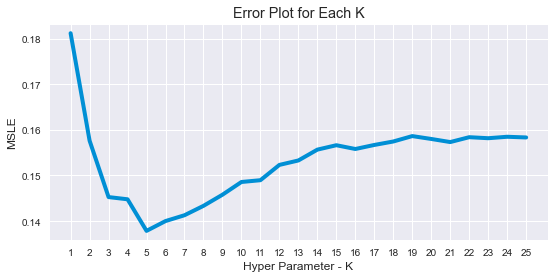

In [531]:
# Plotting Error
curve = pd.DataFrame(R_MSLE) #elbow curve 
plt.figure(figsize=(8,4))
plt.xticks(list(range(1,26)), list(range(1,26)), rotation='horizontal')
plt.plot(list(range(1,26)),R_MSLE)
plt.xlabel('Hyper Parameter - K')
plt.ylabel('MSLE')
plt.title('Error Plot for Each K')
plt.savefig('KNN-Error-Plot.jpg')
plt.show()

In [532]:
#model implementation
KNN=KNeighborsRegressor(n_neighbors=5) 
KNN.fit(int_enc_train,y_train)
y_pred=KNN.predict(int_enc_test_filled)

In [533]:
#model evaluation
r4_knn=result('INT_ENC',y_test,y_pred,'KNN Regression')
print("MSLE : {}".format(r4_knn[1]))
print("Root MSLE : {}".format(r4_knn[2]))
print("R2 Score : {} or {}%".format(r4_knn[3],r4_knn[4]))
accu['KNN']=r4_knn

MSLE : 0.01900725850583755
Root MSLE : 0.1378668143747347
R2 Score : 0.5208646821230059 or 52.0%


### VI. Ordered Integer Encoding 

In [534]:
#estimating MSLE for k=1-26
R_MSLE=[]
for i in range(1,26):
    KNN=KNeighborsRegressor(n_neighbors=i)
    KNN.fit(ordered_int_enc_train,y_train)
    y_pred=KNN.predict(ordered_int_enc_test_filled)
    error=np.sqrt(mean_squared_log_error(y_test, y_pred))
    R_MSLE.append(error)
    print("K =",i," , Root MSLE =",error)

K = 1  , Root MSLE = 0.17353173125585244
K = 2  , Root MSLE = 0.14632505995803488
K = 3  , Root MSLE = 0.13840637095570693
K = 4  , Root MSLE = 0.13472153449701918
K = 5  , Root MSLE = 0.13526825176403778
K = 6  , Root MSLE = 0.13702868909900787
K = 7  , Root MSLE = 0.1372158197856846
K = 8  , Root MSLE = 0.13770983072445164
K = 9  , Root MSLE = 0.13672605273897662
K = 10  , Root MSLE = 0.13550414333365082
K = 11  , Root MSLE = 0.13592286649567004
K = 12  , Root MSLE = 0.13679075686538647
K = 13  , Root MSLE = 0.1381718398859434
K = 14  , Root MSLE = 0.1384635600117852
K = 15  , Root MSLE = 0.1395294979983062
K = 16  , Root MSLE = 0.1412250100379094
K = 17  , Root MSLE = 0.14311194533565313
K = 18  , Root MSLE = 0.14326920716056865
K = 19  , Root MSLE = 0.14244696596621984
K = 20  , Root MSLE = 0.14355704060949503
K = 21  , Root MSLE = 0.14384028033527554
K = 22  , Root MSLE = 0.14347580773109983
K = 23  , Root MSLE = 0.1429851088011074
K = 24  , Root MSLE = 0.1440622833327154
K = 25  

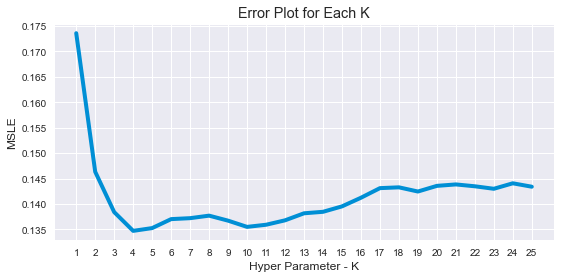

In [535]:
# Plotting Error
curve = pd.DataFrame(R_MSLE) #elbow curve 
plt.figure(figsize=(8,4))
plt.xticks(list(range(1,26)), list(range(1,26)), rotation='horizontal')
plt.plot(list(range(1,26)),R_MSLE)
plt.xlabel('Hyper Parameter - K')
plt.ylabel('MSLE')
plt.title('Error Plot for Each K')
plt.savefig('KNN-Error-Plot.jpg')
plt.show()

In [536]:
#model implementation
KNN=KNeighborsRegressor(n_neighbors=4) 
KNN.fit(ordered_int_enc_train,y_train)
y_pred=KNN.predict(ordered_int_enc_test_filled)

In [537]:
#model evaluation
r4_knn=result('ORDERED_INT_ENC',y_test,y_pred,'KNN Regression')
print("MSLE : {}".format(r4_knn[1]))
print("Root MSLE : {}".format(r4_knn[2]))
print("R2 Score : {} or {}%".format(r4_knn[3],r4_knn[4]))
accu['KNN']=r4_knn

MSLE : 0.01814989185723153
Root MSLE : 0.13472153449701918
R2 Score : 0.5522002160804558 or 55.0%


### VII. Mean Target Encoding

In [538]:
#estimating MSLE for k=1-26
R_MSLE=[]
for i in range(1,26):
    KNN=KNeighborsRegressor(n_neighbors=i)
    KNN.fit(mean_enc_train,y_train)
    y_pred=KNN.predict(mean_enc_test_filled)
    error=np.sqrt(mean_squared_log_error(y_test, y_pred))
    R_MSLE.append(error)
    print("K =",i," , Root MSLE =",error)

K = 1  , Root MSLE = 0.16869282468698688
K = 2  , Root MSLE = 0.13876151280207757
K = 3  , Root MSLE = 0.13441491769177014
K = 4  , Root MSLE = 0.13393667475007734
K = 5  , Root MSLE = 0.13376927026233149
K = 6  , Root MSLE = 0.13630817460610964
K = 7  , Root MSLE = 0.13497476445118242
K = 8  , Root MSLE = 0.1365732240839067
K = 9  , Root MSLE = 0.13634286431847267
K = 10  , Root MSLE = 0.13681843757548826
K = 11  , Root MSLE = 0.13696979772082832
K = 12  , Root MSLE = 0.1380063693901977
K = 13  , Root MSLE = 0.13947796215574915
K = 14  , Root MSLE = 0.13873488478380053
K = 15  , Root MSLE = 0.13907253127050823
K = 16  , Root MSLE = 0.1391367835072601
K = 17  , Root MSLE = 0.13928331352585038
K = 18  , Root MSLE = 0.1400832345359535
K = 19  , Root MSLE = 0.14011621989966047
K = 20  , Root MSLE = 0.13980907412158625
K = 21  , Root MSLE = 0.14045748649476308
K = 22  , Root MSLE = 0.1407219262928745
K = 23  , Root MSLE = 0.14241581683798676
K = 24  , Root MSLE = 0.14195833538067576
K = 25

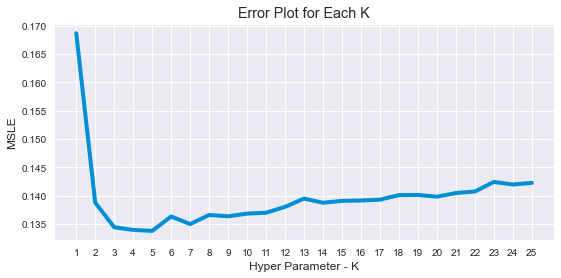

In [539]:
# Plotting Error
curve = pd.DataFrame(R_MSLE) #elbow curve 
plt.figure(figsize=(8,4))
plt.xticks(list(range(1,26)), list(range(1,26)), rotation='horizontal')
plt.plot(list(range(1,26)),R_MSLE)
plt.xlabel('Hyper Parameter - K')
plt.ylabel('MSLE')
plt.title('Error Plot for Each K')
plt.savefig('KNN-Error-Plot.jpg')
plt.show()

In [540]:
#model implementation
KNN=KNeighborsRegressor(n_neighbors=5) 
KNN.fit(ordered_int_enc_train,y_train)
y_pred=KNN.predict(ordered_int_enc_test_filled)

In [541]:
#model evaluation
r4_knn=result('MEAN_ENC',y_test,y_pred,'KNN Regression')
print("MSLE : {}".format(r4_knn[1]))
print("Root MSLE : {}".format(r4_knn[2]))
print("R2 Score : {} or {}%".format(r4_knn[3],r4_knn[4]))
accu['KNN']=r4_knn

MSLE : 0.018297499935299107
Root MSLE : 0.13526825176403778
R2 Score : 0.5567838610318878 or 56.0%


### VIII. Engineering Rare Labels 

In [542]:
#estimating MSLE for k=1-100
R_MSLE=[]
for i in range(1,26):
    KNN=KNeighborsRegressor(n_neighbors=i)
    KNN.fit(rare_ohe_enc_train,y_train)
    y_pred=KNN.predict(rare_ohe_enc_test)
    error=np.sqrt(mean_squared_log_error(y_test, y_pred))
    R_MSLE.append(error)

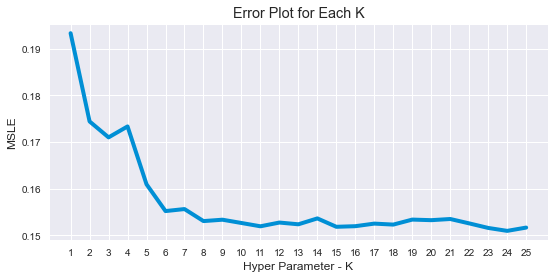

In [543]:
# Plotting Error
curve = pd.DataFrame(R_MSLE) #elbow curve 
plt.figure(figsize=(8,4))
plt.xticks(list(range(1,26)), list(range(1,26)), rotation='horizontal')
plt.plot(list(range(1,26)),R_MSLE)
plt.xlabel('Hyper Parameter - K')
plt.ylabel('MSLE')
plt.title('Error Plot for Each K')
plt.savefig('KNN-Error-Plot.jpg')
plt.show()

In [544]:
#model implementation
KNN=KNeighborsRegressor(n_neighbors=24) 
KNN.fit(rare_ohe_enc_train,y_train)
y_pred=KNN.predict(rare_ohe_enc_test)

In [545]:
#model evaluation
r4_knn=result('RARE_ENC',y_test,y_pred,'KNN Regression')
print("MSLE : {}".format(r4_knn[1]))
print("Root MSLE : {}".format(r4_knn[2]))
print("R2 Score : {} or {}%".format(r4_knn[3],r4_knn[4]))
accu['KNN']=r4_knn

MSLE : 0.02279441420310941
Root MSLE : 0.15097819115060762
R2 Score : 0.3379958073991137 or 34.0%


# 5. Random Forest Regressor

### I. One Hot Encoding

In [546]:
RFR = RandomForestRegressor(n_estimators=180,random_state=0, min_samples_leaf=1, max_features=0.5, n_jobs=-1, oob_score=True)
RFR.fit(ohe_enc_train,y_train)
y_pred = RFR.predict(ohe_enc_test)

In [547]:
r5_rf=result('OHE',y_test,y_pred,'RF Regressor')
print("MSLE : {}".format(r5_rf[1]))
print("Root MSLE : {}".format(r5_rf[2]))
print("R2 Score : {} or {}%".format(r5_rf[3],r5_rf[4]))
accu['RandomForest Regressor']=r5_rf

MSLE : 0.01622910743951926
Root MSLE : 0.1273935141187308
R2 Score : 0.5881404614505901 or 59.0%


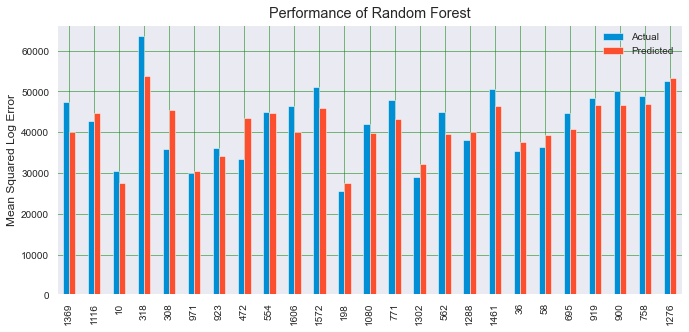

In [548]:
df_check = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_check = df_check.head(25)
df_check.plot(kind='bar',figsize=(10,5))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.title('Performance of Random Forest')
plt.ylabel('Mean Squared Log Error')
plt.savefig('Random-Forest-Performance.jpg')
plt.show()

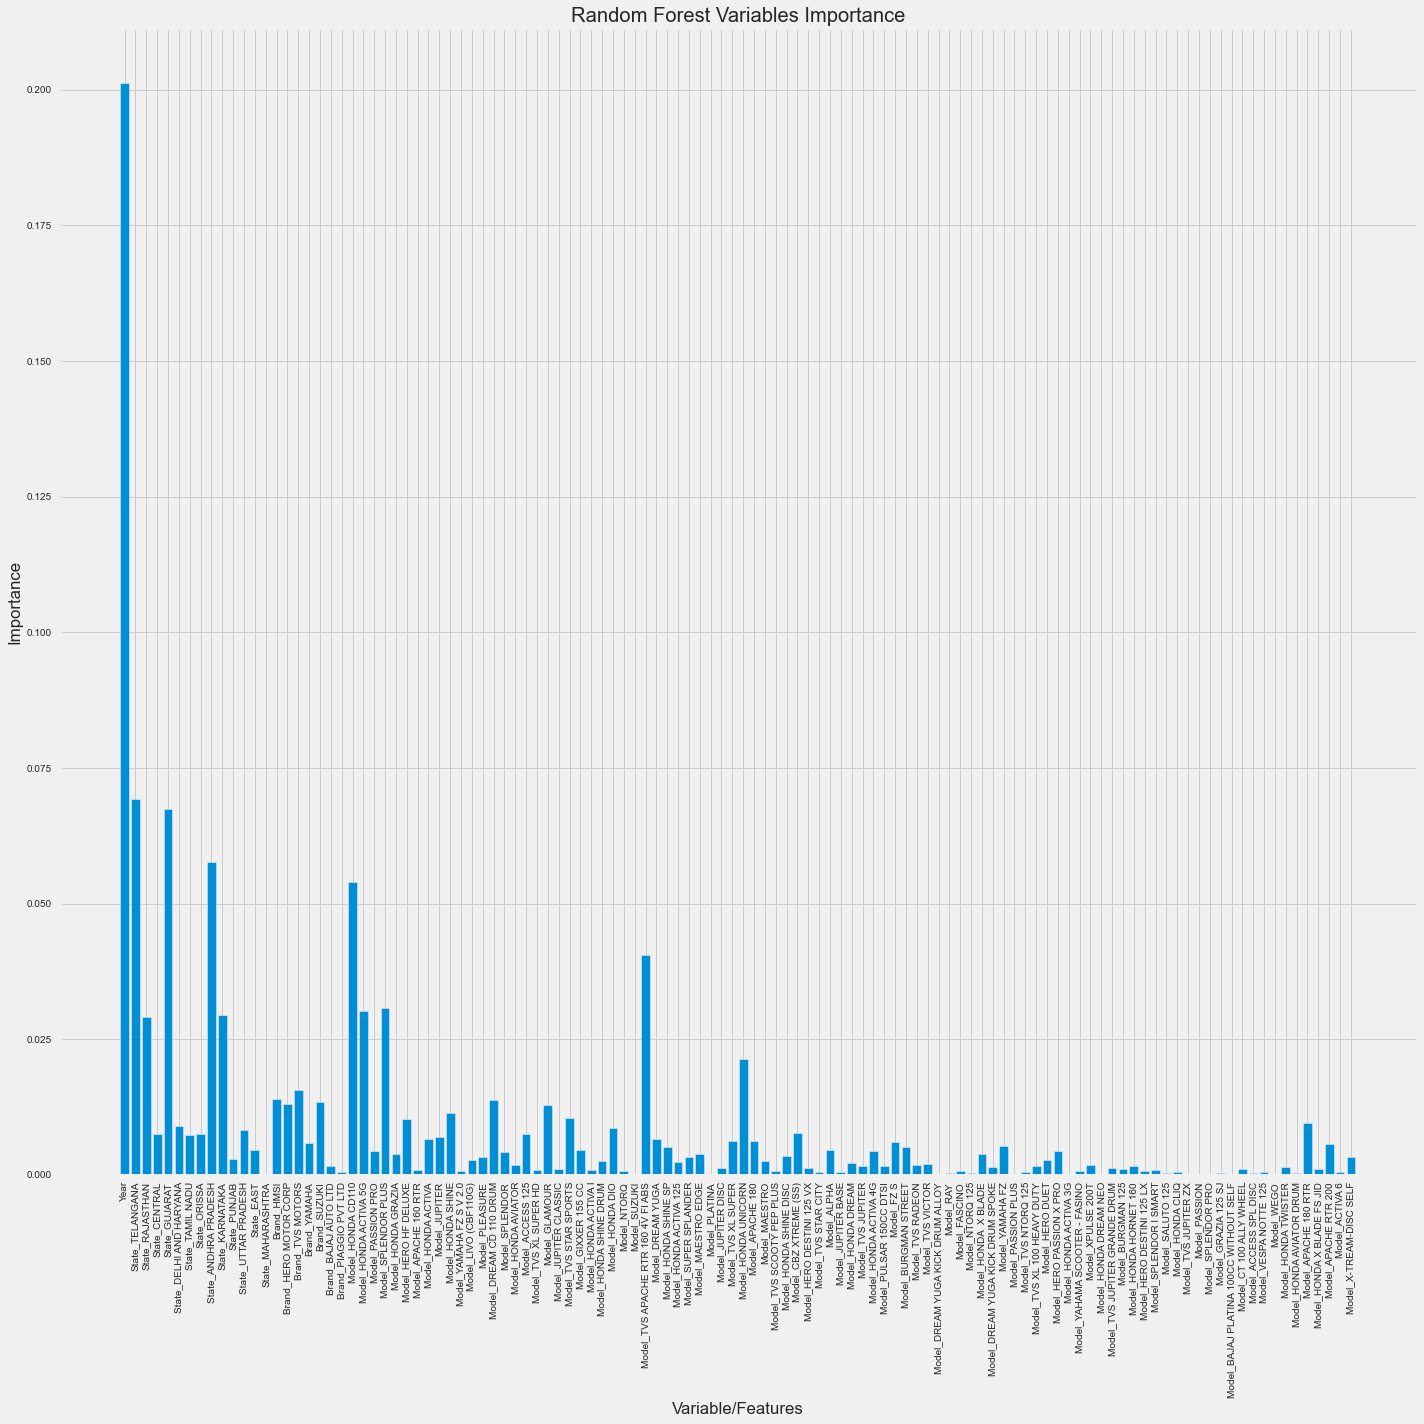

In [549]:
importances=RFR.feature_importances_
features=ohe_enc_train.columns

# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.figure(figsize=(20,20))
plt.bar(x_values, importances, orientation = ('vertical'))
# Tick labels for x axis
plt.xticks(x_values, features, rotation=(90))
# Axis labels and title
plt.ylabel('Importance'); 
plt.xlabel('Variable/Features'); 
plt.title('Random Forest Variables Importance')
plt.tight_layout()
plt.savefig('Random-Forest-Variables-Importances.jpg',dpi=600)
plt.show();

### II. One Hot Top Encoding

In [550]:
RFR = RandomForestRegressor(n_estimators=180,random_state=0, min_samples_leaf=1, max_features=0.5, n_jobs=-1, oob_score=True)
RFR.fit(ohe_enc_train_top,y_train)
y_pred = RFR.predict(ohe_enc_test_top)

In [551]:
r5_rf=result('OHE_TOP',y_test,y_pred,'RF Regressor')
print("MSLE : {}".format(r5_rf[1]))
print("Root MSLE : {}".format(r5_rf[2]))
print("R2 Score : {} or {}%".format(r5_rf[3],r5_rf[4]))
accu['RandomForest Regressor']=r5_rf

MSLE : 0.016767370894933575
Root MSLE : 0.1294888832870744
R2 Score : 0.5035843421542787 or 50.0%


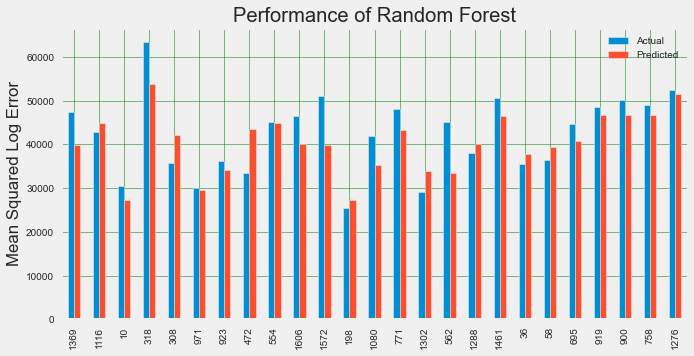

In [552]:
df_check = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_check = df_check.head(25)
df_check.plot(kind='bar',figsize=(10,5))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.title('Performance of Random Forest')
plt.ylabel('Mean Squared Log Error')
plt.savefig('Random-Forest-Performance.jpg')
plt.show()

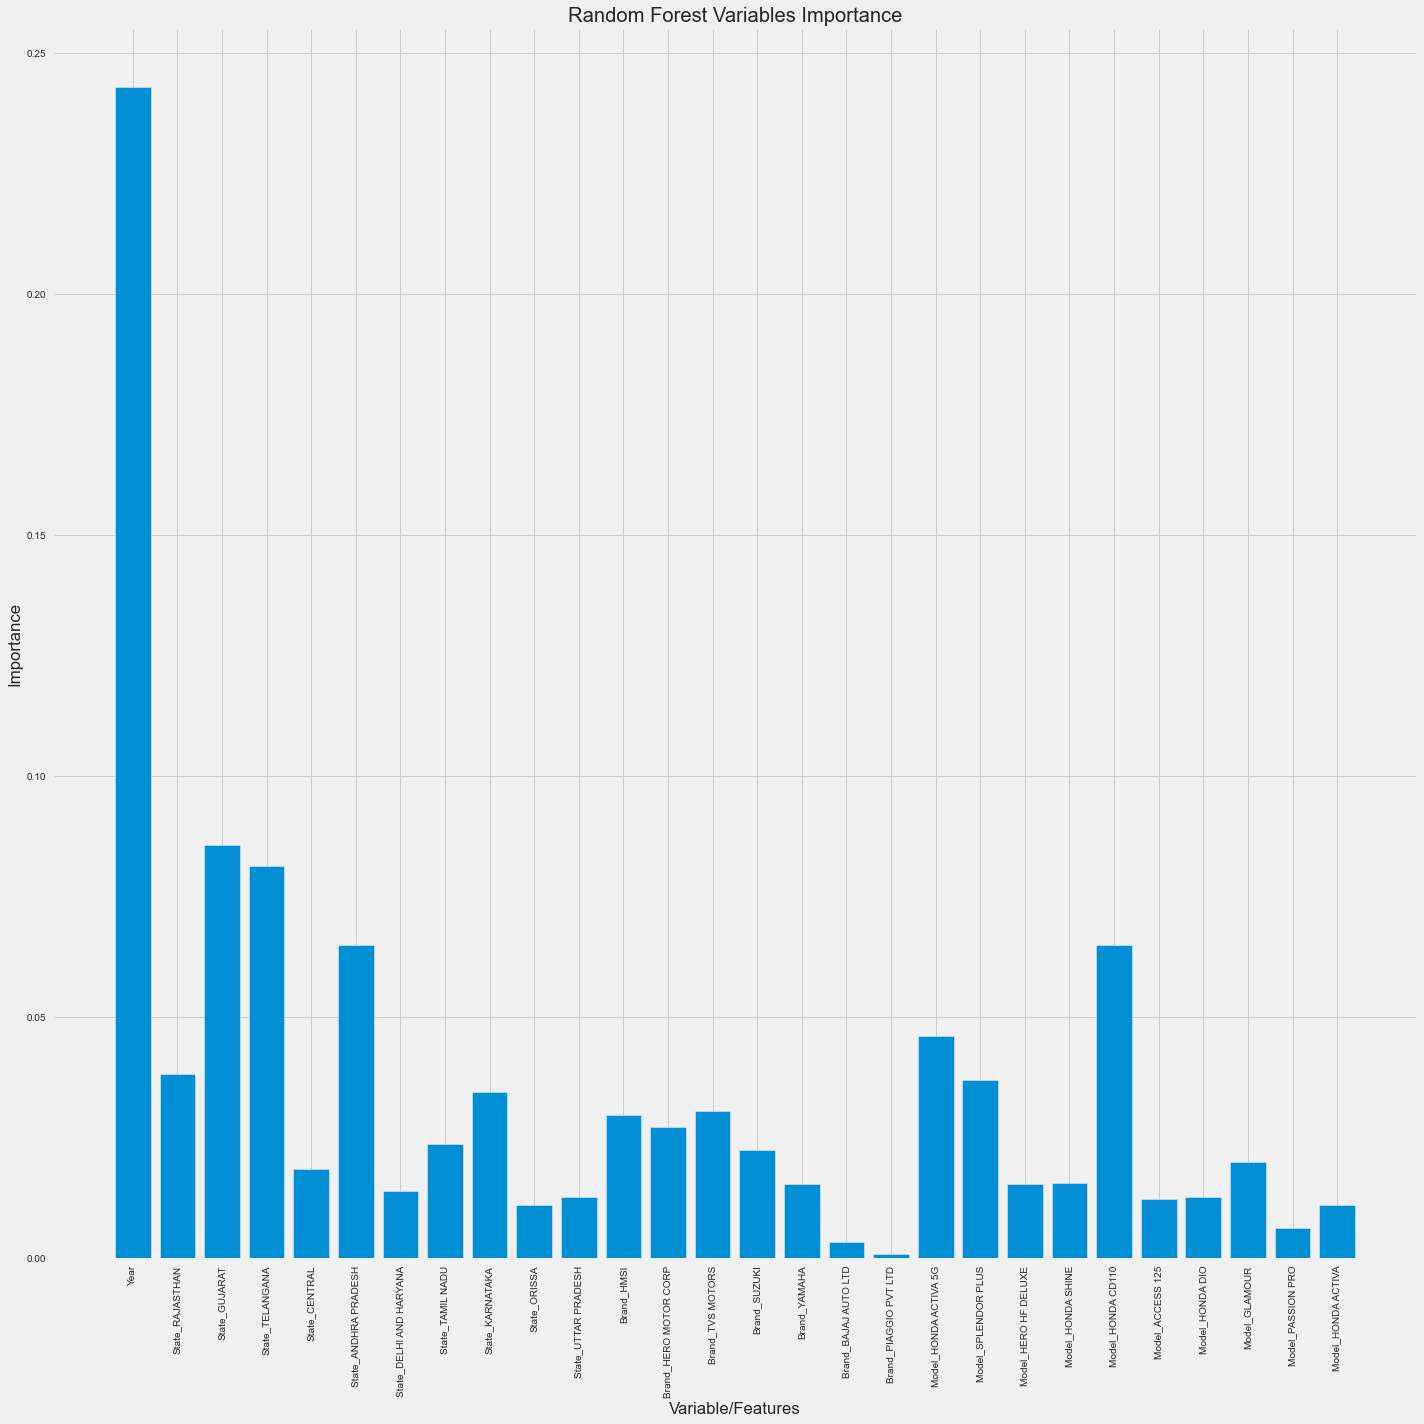

In [553]:
importances=RFR.feature_importances_
features=ohe_enc_train_top.columns

# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.figure(figsize=(20,20))
plt.bar(x_values, importances, orientation = ('vertical'))
# Tick labels for x axis
plt.xticks(x_values, features, rotation=(90))
# Axis labels and title
plt.ylabel('Importance'); 
plt.xlabel('Variable/Features'); 
plt.title('Random Forest Variables Importance')
plt.tight_layout()
plt.savefig('Random-Forest-Variables-Importances.jpg',dpi=600)
plt.show();

### III. Count Encoding

In [554]:
RFR = RandomForestRegressor(n_estimators=180,random_state=0, min_samples_leaf=1, max_features=0.5, n_jobs=-1, oob_score=True)
RFR.fit(count_enc_train,y_train)
y_pred = RFR.predict(count_enc_test_filled)

In [555]:
r5_rf=result('COUNT_ENC',y_test,y_pred,'RF Regressor')
print("MSLE : {}".format(r5_rf[1]))
print("Root MSLE : {}".format(r5_rf[2]))
print("R2 Score : {} or {}%".format(r5_rf[3],r5_rf[4]))
accu['RandomForest Regressor']=r5_rf

MSLE : 0.02205275021791595
Root MSLE : 0.14850168422585633
R2 Score : 0.40367322162049657 or 40.0%


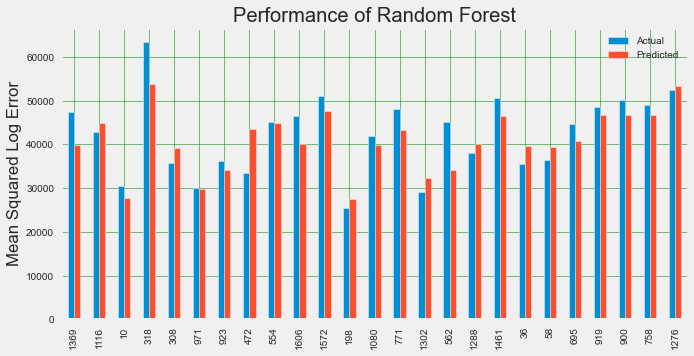

In [556]:
df_check = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_check = df_check.head(25)
df_check.plot(kind='bar',figsize=(10,5))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.title('Performance of Random Forest')
plt.ylabel('Mean Squared Log Error')
plt.savefig('Random-Forest-Performance.jpg')
plt.show()

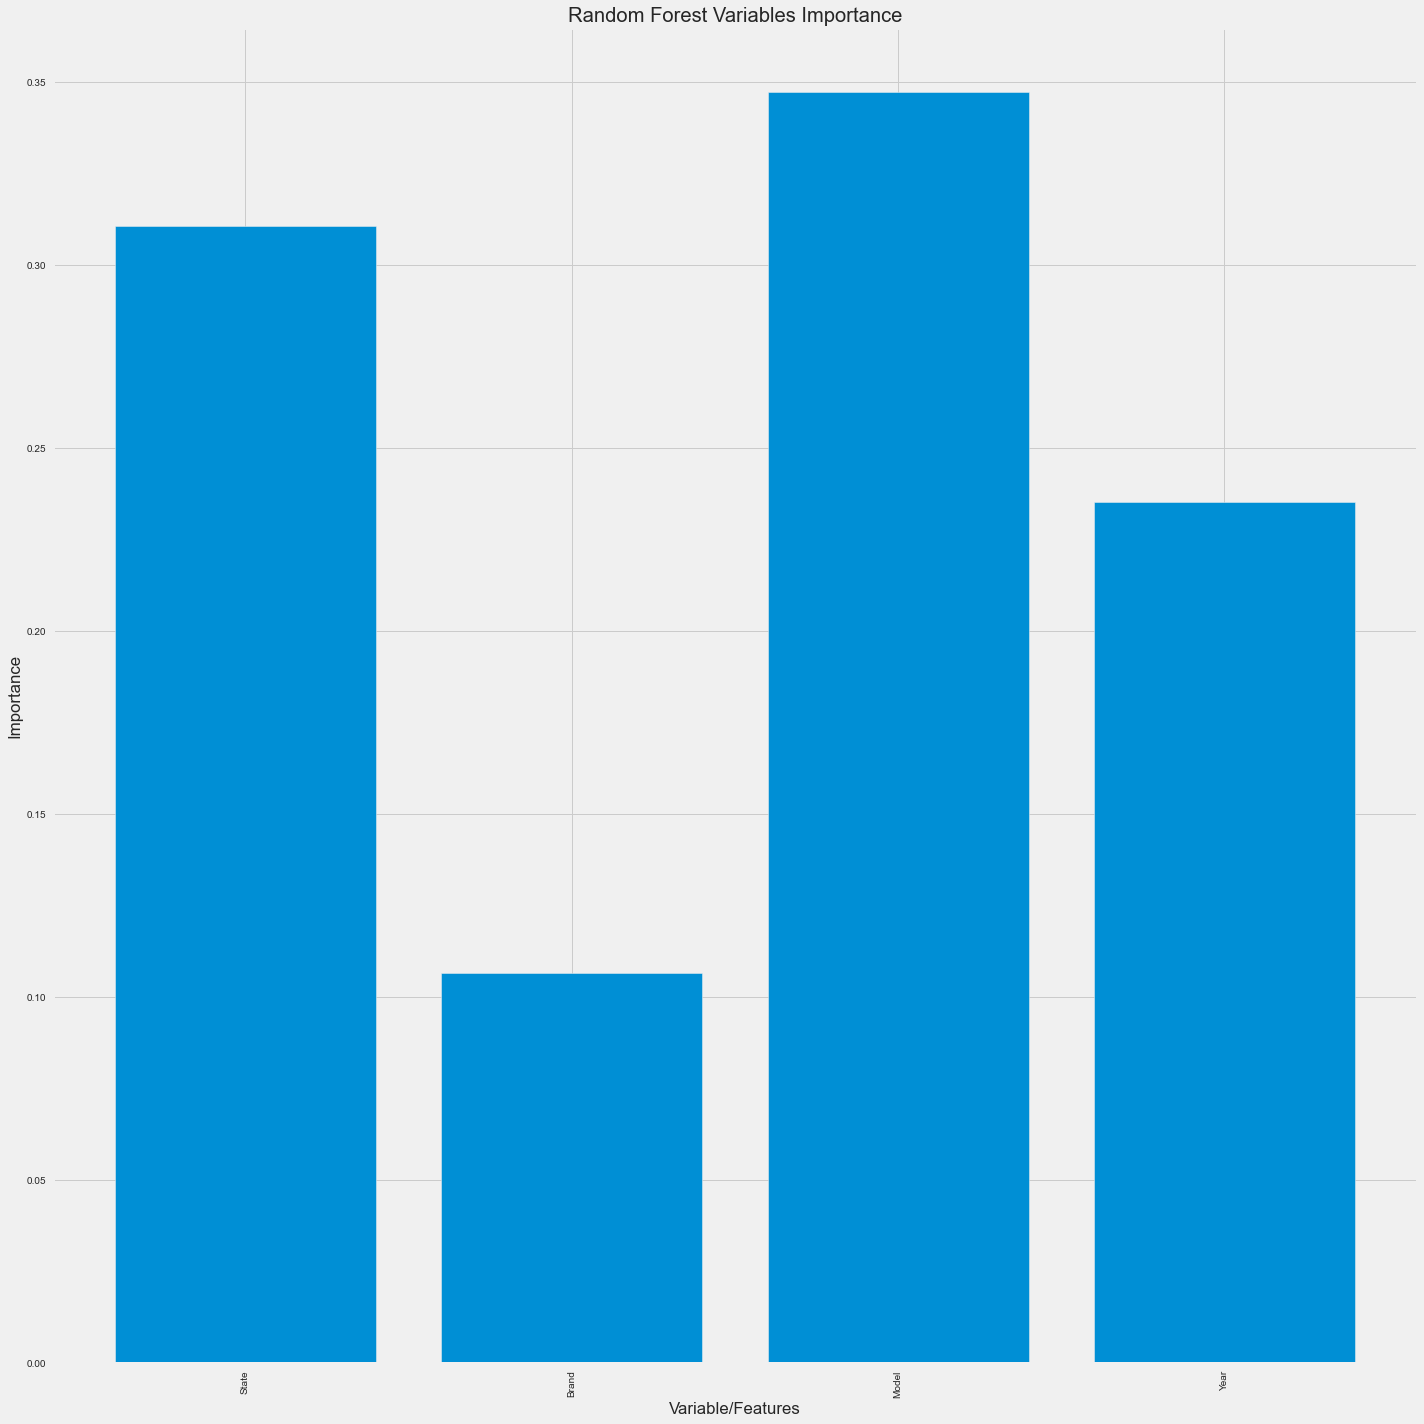

In [557]:
importances=RFR.feature_importances_
features=count_enc_train.columns

# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.figure(figsize=(20,20))
plt.bar(x_values, importances, orientation = ('vertical'))
# Tick labels for x axis
plt.xticks(x_values, features, rotation=(90))
# Axis labels and title
plt.ylabel('Importance'); 
plt.xlabel('Variable/Features'); 
plt.title('Random Forest Variables Importance')
plt.tight_layout()
plt.savefig('Random-Forest-Variables-Importances.jpg',dpi=600)
plt.show();

### IV. Frequency Encoding

In [558]:
RFR = RandomForestRegressor(n_estimators=180,random_state=0, min_samples_leaf=1, max_features=0.5, n_jobs=-1, oob_score=True)
RFR.fit(frequency_enc_train,y_train)
y_pred = RFR.predict(frequency_enc_test_filled)

In [559]:
r5_rf=result('FREQUENCY_ENC',y_test,y_pred,'RF Regressor')
print("MSLE : {}".format(r5_rf[1]))
print("Root MSLE : {}".format(r5_rf[2]))
print("R2 Score : {} or {}%".format(r5_rf[3],r5_rf[4]))
accu['RandomForest Regressor']=r5_rf

MSLE : 0.02237134383265599
Root MSLE : 0.14957053129763226
R2 Score : 0.3975177711690181 or 40.0%


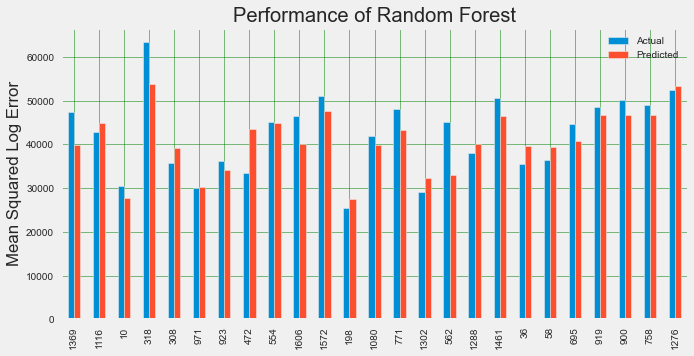

In [560]:
df_check = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_check = df_check.head(25)
df_check.plot(kind='bar',figsize=(10,5))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.title('Performance of Random Forest')
plt.ylabel('Mean Squared Log Error')
plt.savefig('Random-Forest-Performance.jpg')
plt.show()

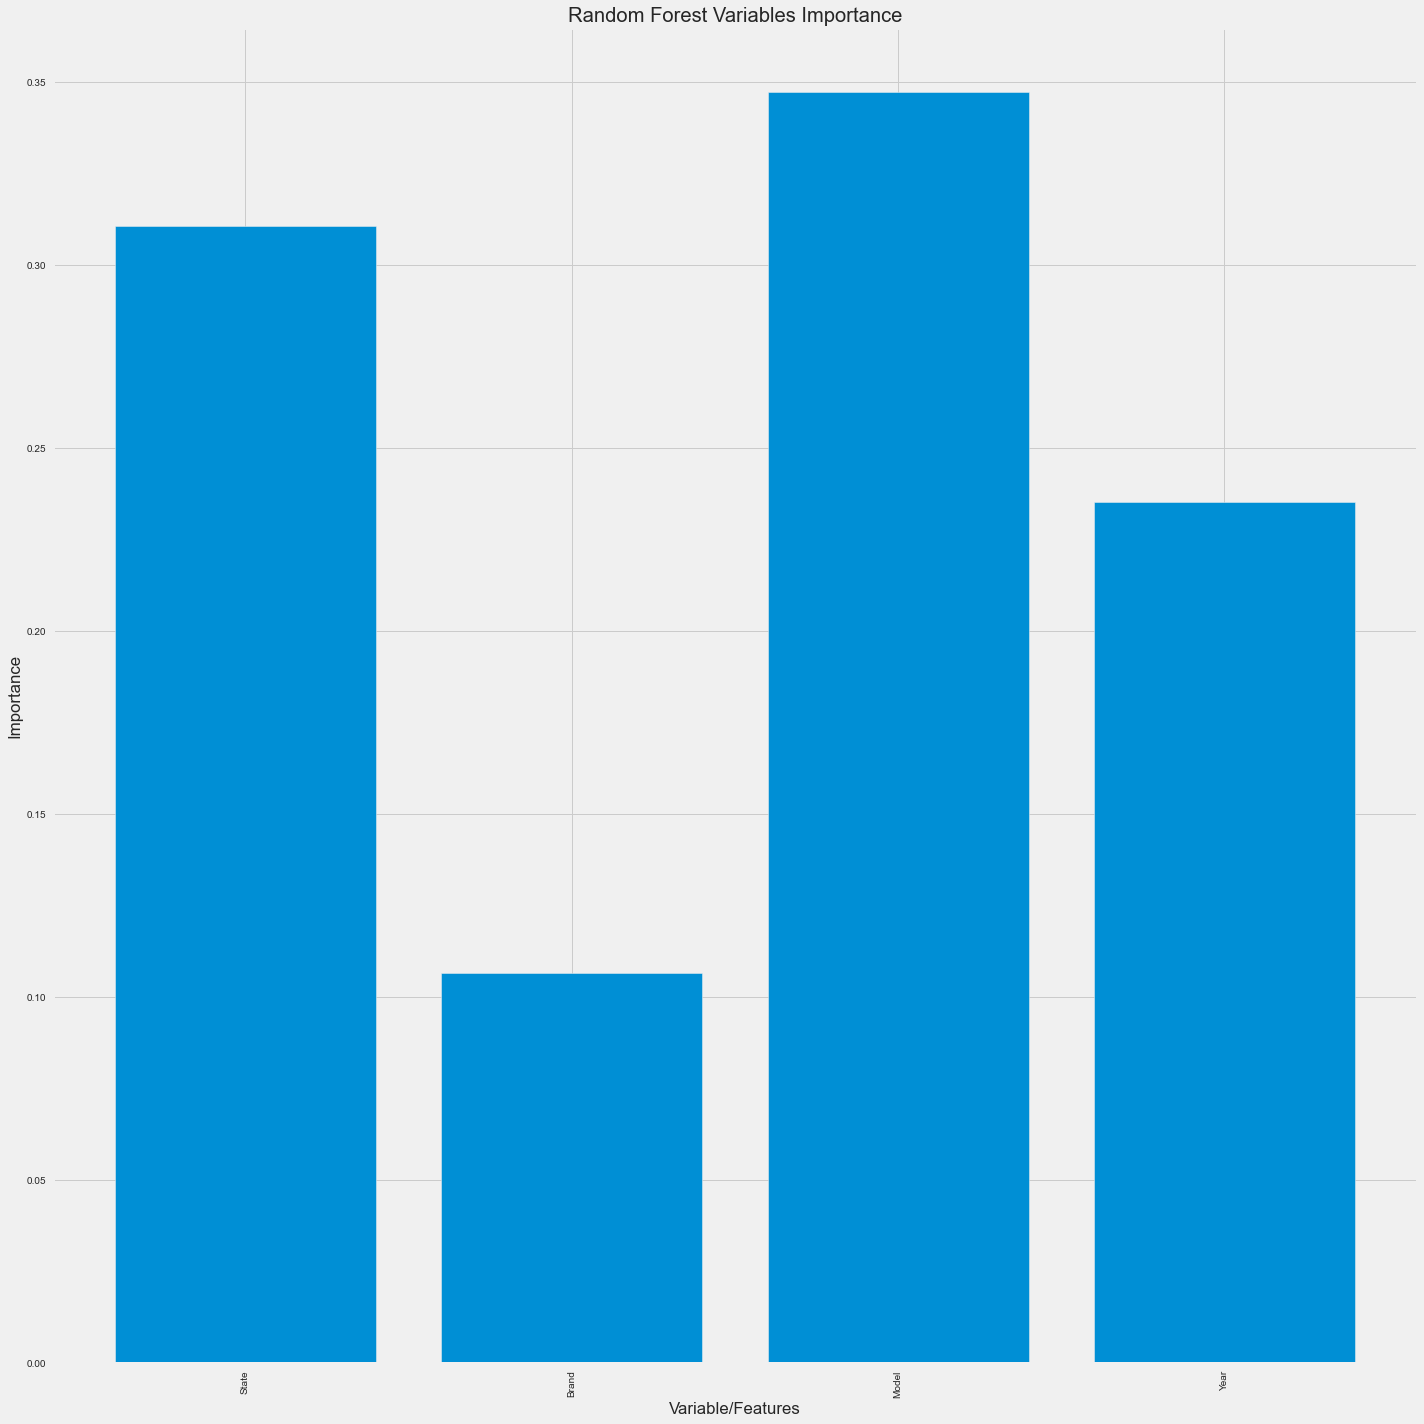

In [561]:
importances=RFR.feature_importances_
features=frequency_enc_train.columns

# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.figure(figsize=(20,20))
plt.bar(x_values, importances, orientation = ('vertical'))
# Tick labels for x axis
plt.xticks(x_values, features, rotation=(90))
# Axis labels and title
plt.ylabel('Importance'); 
plt.xlabel('Variable/Features'); 
plt.title('Random Forest Variables Importance')
plt.tight_layout()
plt.savefig('Random-Forest-Variables-Importances.jpg',dpi=600)
plt.show();

### V. Integer Encoding

In [562]:
RFR = RandomForestRegressor(n_estimators=180,random_state=0, min_samples_leaf=1, max_features=0.5, n_jobs=-1, oob_score=True)
RFR.fit(int_enc_train,y_train)
y_pred = RFR.predict(int_enc_test_filled)

In [563]:
r5_rf=result('INT_ENC',y_test,y_pred,'RF Regressor')
print("MSLE : {}".format(r5_rf[1]))
print("Root MSLE : {}".format(r5_rf[2]))
print("R2 Score : {} or {}%".format(r5_rf[3],r5_rf[4]))
accu['RandomForest Regressor']=r5_rf

MSLE : 0.017104105459549747
Root MSLE : 0.130782664981066
R2 Score : 0.5659658233066254 or 57.0%


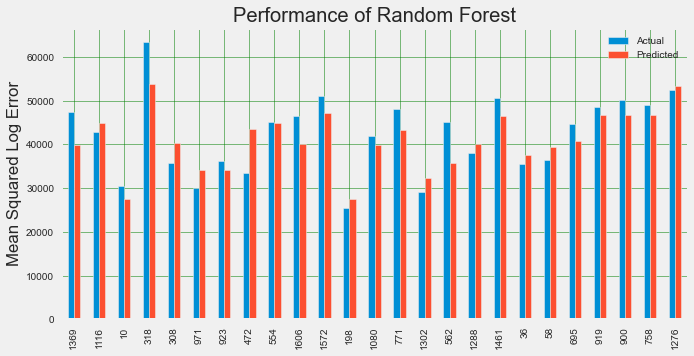

In [564]:
df_check = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_check = df_check.head(25)
df_check.plot(kind='bar',figsize=(10,5))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.title('Performance of Random Forest')
plt.ylabel('Mean Squared Log Error')
plt.savefig('Random-Forest-Performance.jpg')
plt.show()

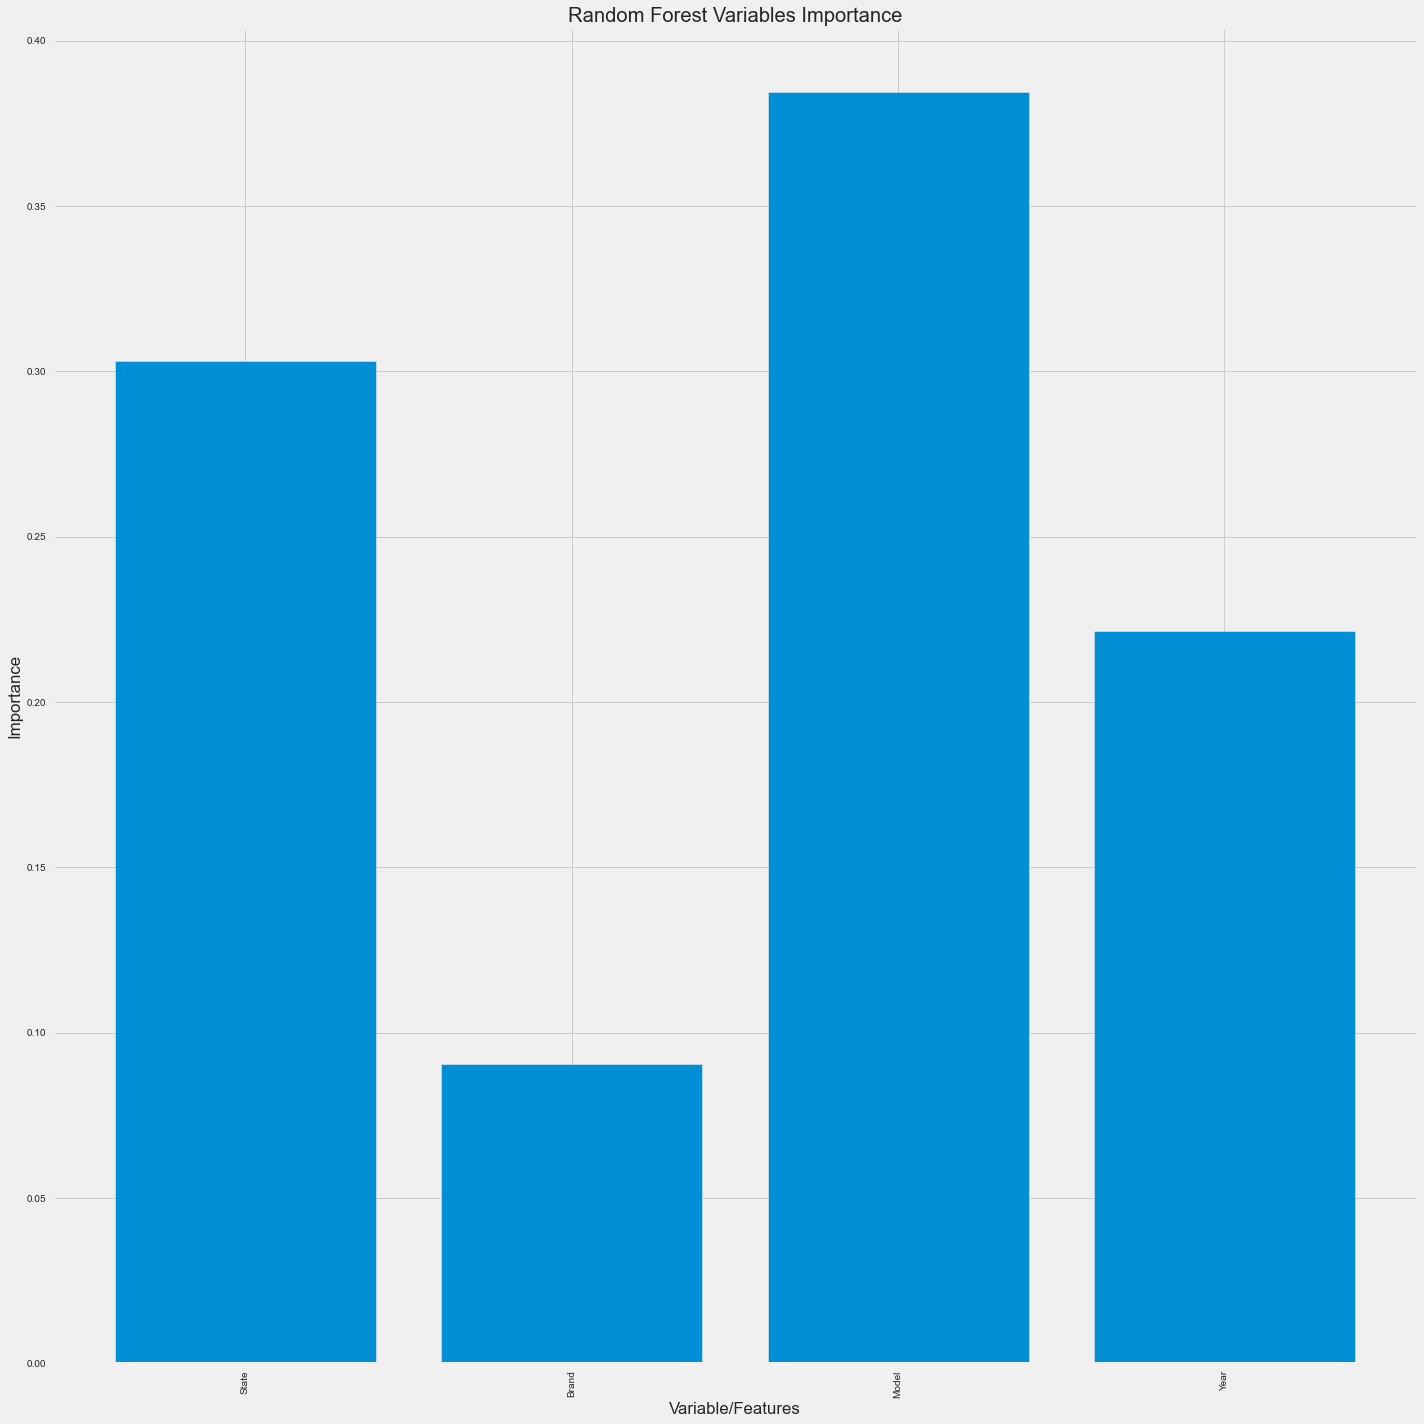

In [565]:
importances=RFR.feature_importances_
features=int_enc_train.columns

# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.figure(figsize=(20,20))
plt.bar(x_values, importances, orientation = ('vertical'))
# Tick labels for x axis
plt.xticks(x_values, features, rotation=(90))
# Axis labels and title
plt.ylabel('Importance'); 
plt.xlabel('Variable/Features'); 
plt.title('Random Forest Variables Importance')
plt.tight_layout()
plt.savefig('Random-Forest-Variables-Importances.jpg',dpi=600)
plt.show();

### VI. Ordered Integer Encoding

In [566]:
RFR = RandomForestRegressor(n_estimators=180,random_state=0, min_samples_leaf=1, max_features=0.5, n_jobs=-1, oob_score=True)
RFR.fit(ordered_int_enc_train,y_train)
y_pred = RFR.predict(ordered_int_enc_test_filled)

In [567]:
r5_rf=result('ORDERED_INT_ENC',y_test,y_pred,'RF Regressor')
print("MSLE : {}".format(r5_rf[1]))
print("Root MSLE : {}".format(r5_rf[2]))
print("R2 Score : {} or {}%".format(r5_rf[3],r5_rf[4]))
accu['RandomForest Regressor']=r5_rf

MSLE : 0.015979927703575505
Root MSLE : 0.12641173878867226
R2 Score : 0.6020507412998826 or 60.0%


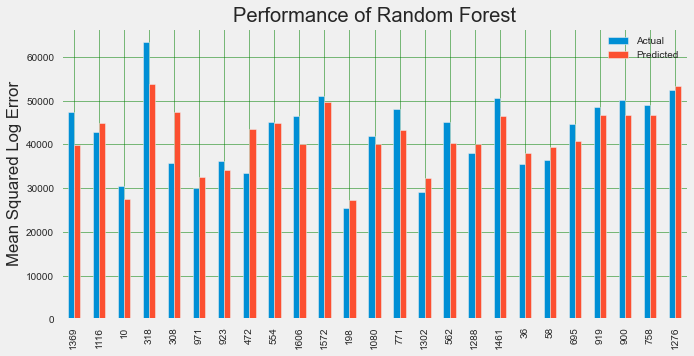

In [568]:
df_check = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_check = df_check.head(25)
df_check.plot(kind='bar',figsize=(10,5))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.title('Performance of Random Forest')
plt.ylabel('Mean Squared Log Error')
plt.savefig('Random-Forest-Performance.jpg')
plt.show()

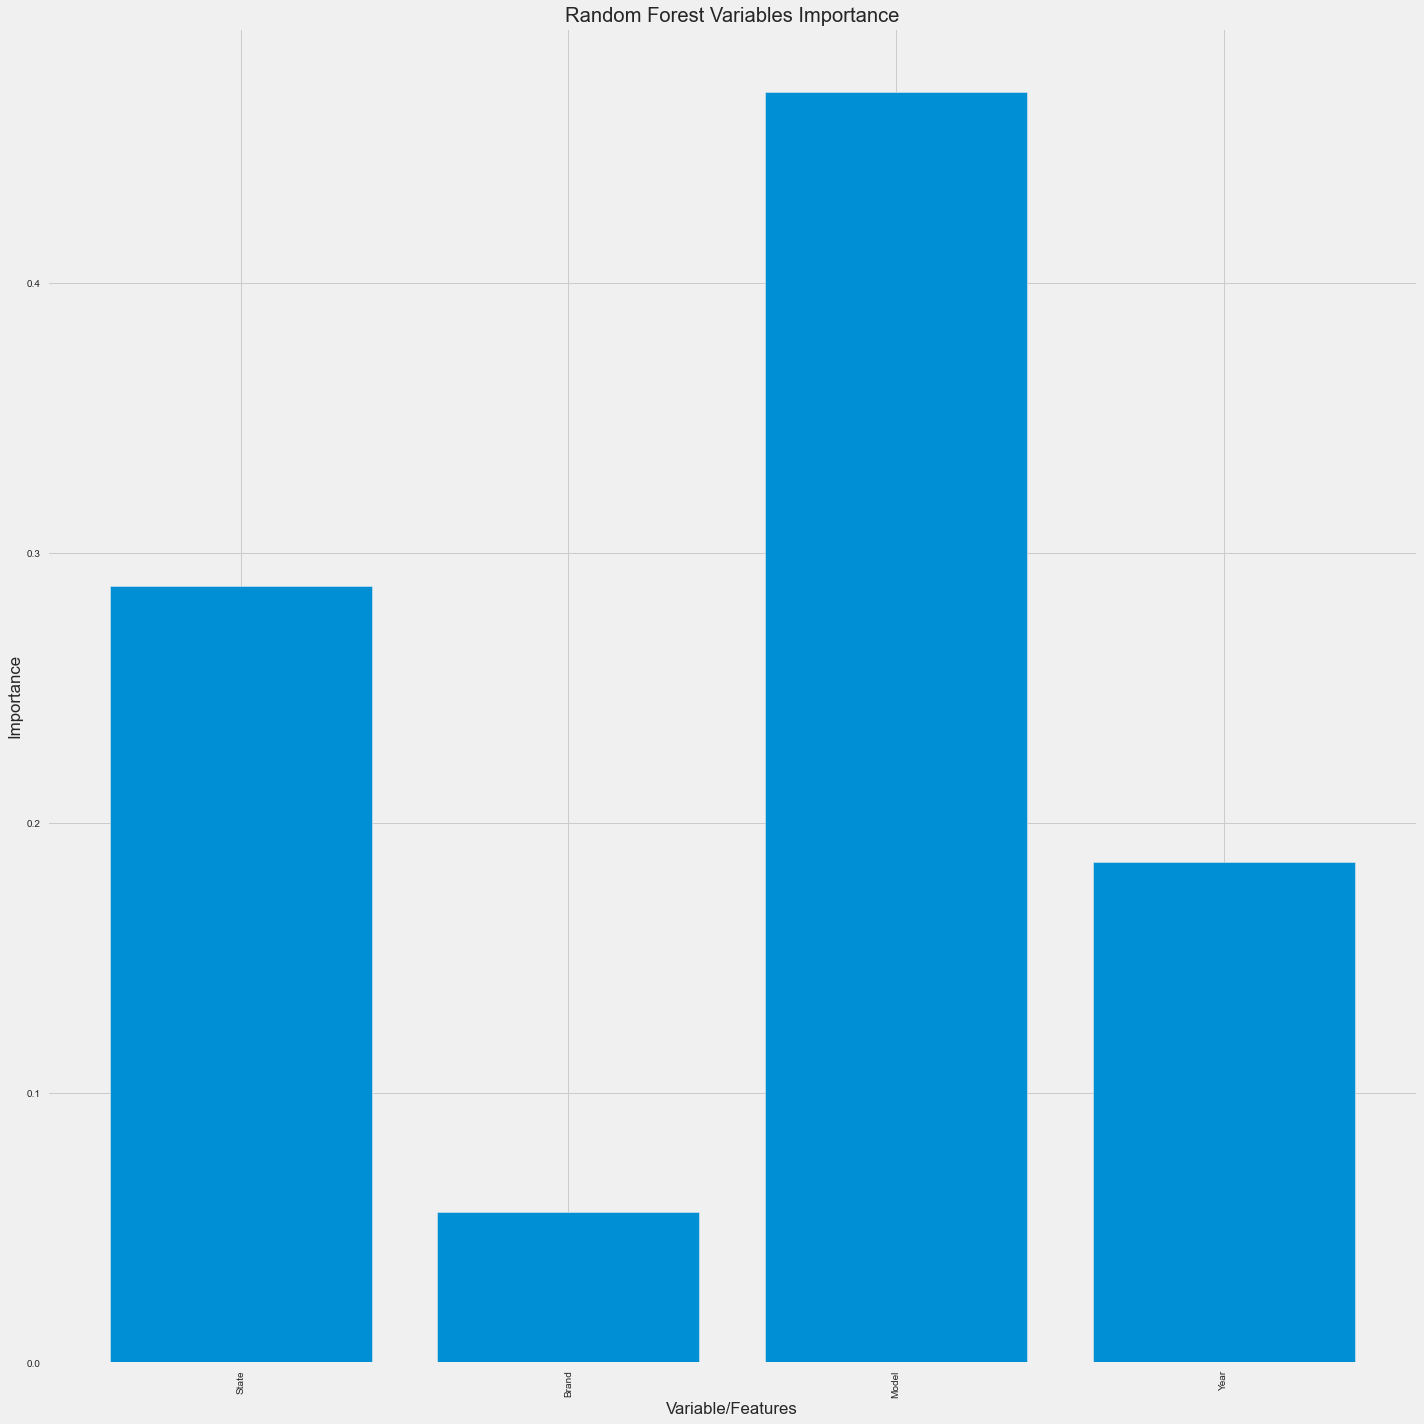

In [569]:
importances=RFR.feature_importances_
features = ordered_int_enc_train.columns

# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.figure(figsize=(20,20))
plt.bar(x_values, importances, orientation = ('vertical'))
# Tick labels for x axis
plt.xticks(x_values, features, rotation=(90))
# Axis labels and title
plt.ylabel('Importance'); 
plt.xlabel('Variable/Features'); 
plt.title('Random Forest Variables Importance')
plt.tight_layout()
plt.savefig('Random-Forest-Variables-Importances.jpg',dpi=600)
plt.show();

### VII. Mean Target Encoding

In [570]:
RFR = RandomForestRegressor(n_estimators=180,random_state=0, min_samples_leaf=1, max_features=0.5, n_jobs=-1, oob_score=True)
RFR.fit(mean_enc_train,y_train)
y_pred = RFR.predict(mean_enc_test_filled)

In [571]:
r5_rf=result('MEAN_ENC',y_test,y_pred,'RF Regressor')
print("MSLE : {}".format(r5_rf[1]))
print("Root MSLE : {}".format(r5_rf[2]))
print("R2 Score : {} or {}%".format(r5_rf[3],r5_rf[4]))
accu['RandomForest Regressor']=r5_rf

MSLE : 0.015804770182908393
Root MSLE : 0.12571702423661002
R2 Score : 0.6048277399890726 or 60.0%


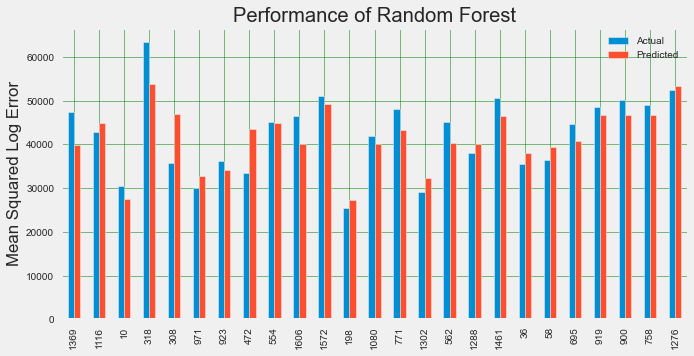

In [572]:
df_check = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_check = df_check.head(25)
df_check.plot(kind='bar',figsize=(10,5))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.title('Performance of Random Forest')
plt.ylabel('Mean Squared Log Error')
plt.savefig('Random-Forest-Performance.jpg')
plt.show()

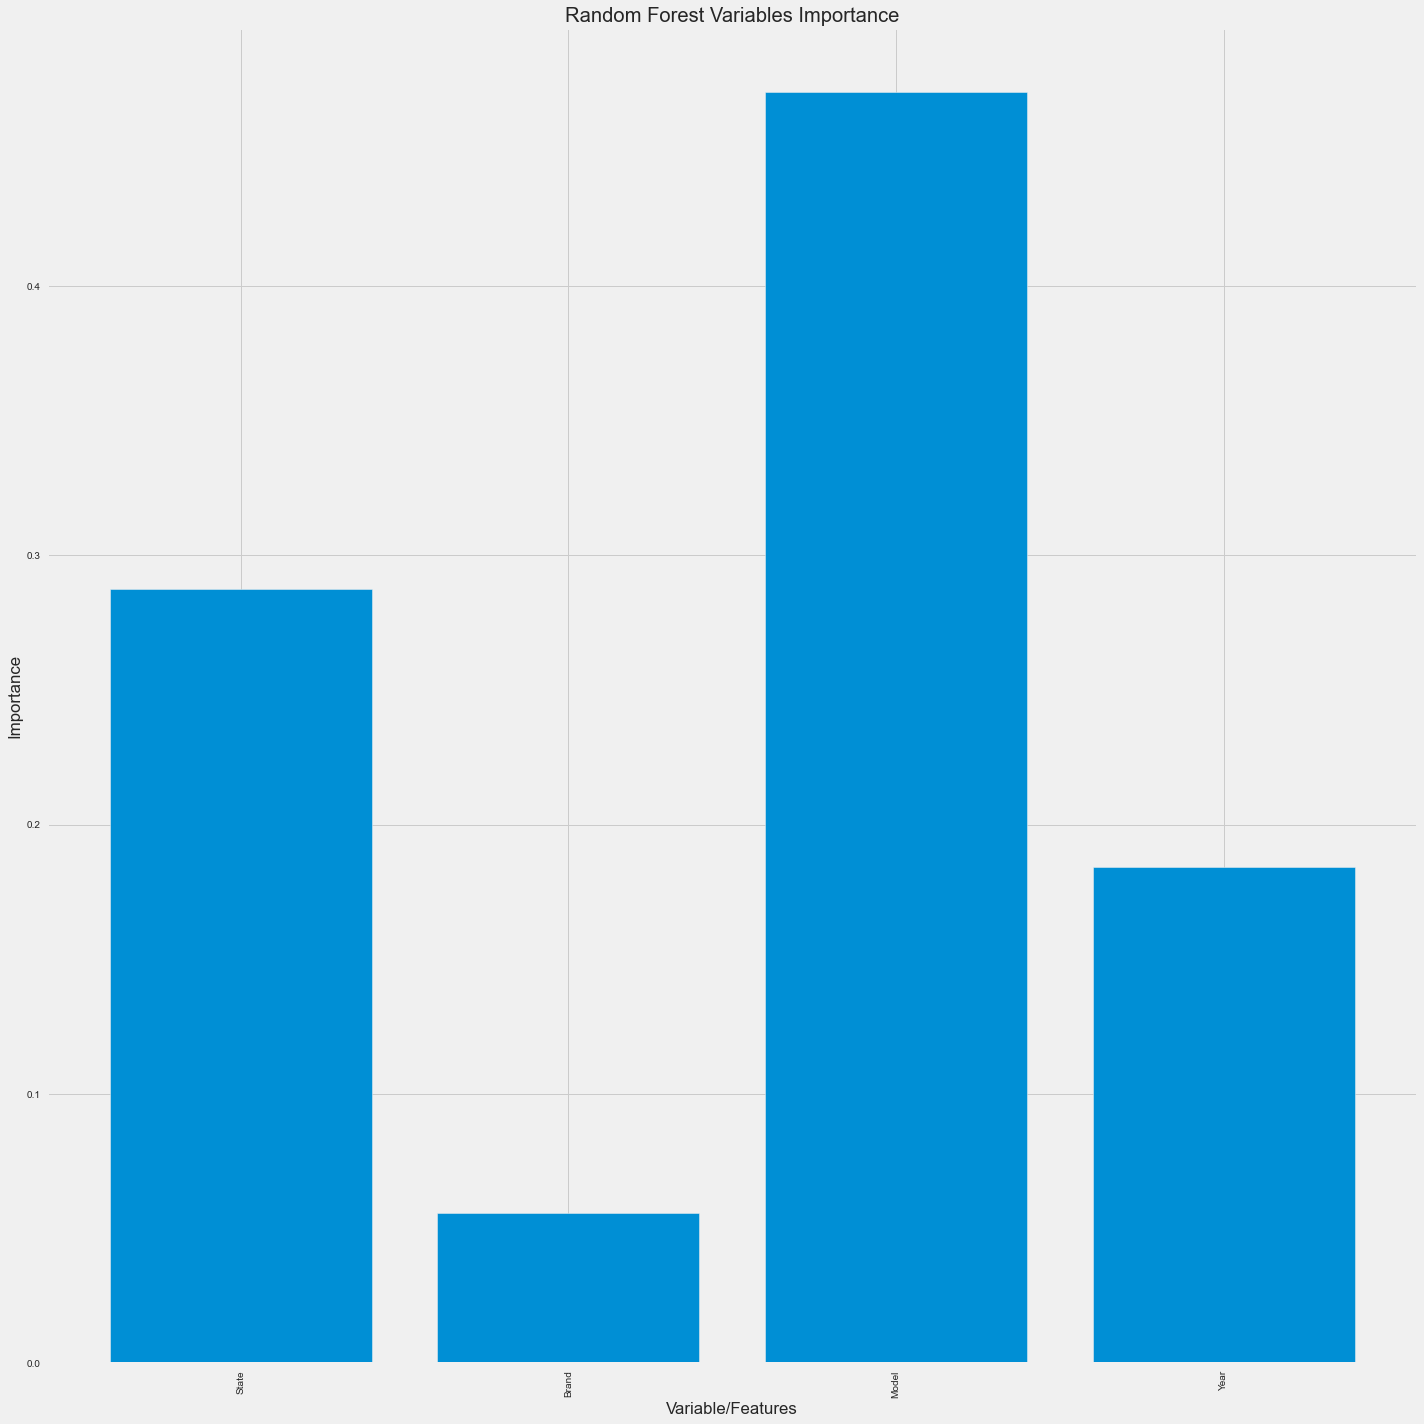

In [573]:
importances=RFR.feature_importances_
features = mean_enc_train.columns

# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.figure(figsize=(20,20))
plt.bar(x_values, importances, orientation = ('vertical'))
# Tick labels for x axis
plt.xticks(x_values, features, rotation=(90))
# Axis labels and title
plt.ylabel('Importance'); 
plt.xlabel('Variable/Features'); 
plt.title('Random Forest Variables Importance')
plt.tight_layout()
plt.savefig('Random-Forest-Variables-Importances.jpg',dpi=600)
plt.show();

### VIII. Engineering Rare Labels

In [574]:
RFR = RandomForestRegressor(n_estimators=180,random_state=0, min_samples_leaf=1, max_features=0.5, n_jobs=-1, oob_score=True)
RFR.fit(rare_ohe_enc_train,y_train)
y_pred = RFR.predict(rare_ohe_enc_test)

In [575]:
r5_rf=result('RARE_ENC',y_test,y_pred,'RF Regressor')
print("MSLE : {}".format(r5_rf[1]))
print("Root MSLE : {}".format(r5_rf[2]))
print("R2 Score : {} or {}%".format(r5_rf[3],r5_rf[4]))
accu['RandomForest Regressor']=r5_rf

MSLE : 0.02417938115092203
Root MSLE : 0.15549720624796456
R2 Score : 0.2963455093779529 or 30.0%


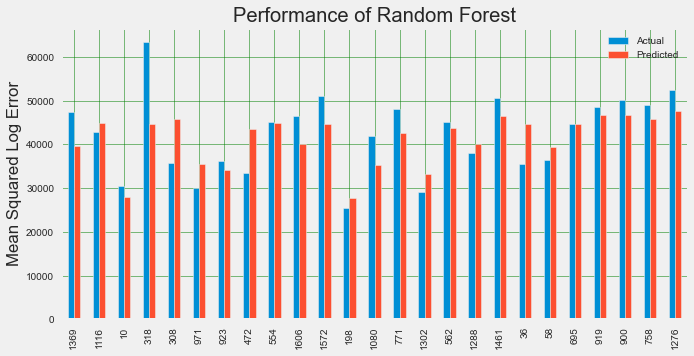

In [576]:
df_check = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_check = df_check.head(25)
df_check.plot(kind='bar',figsize=(10,5))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.title('Performance of Random Forest')
plt.ylabel('Mean Squared Log Error')
plt.savefig('Random-Forest-Performance.jpg')
plt.show()

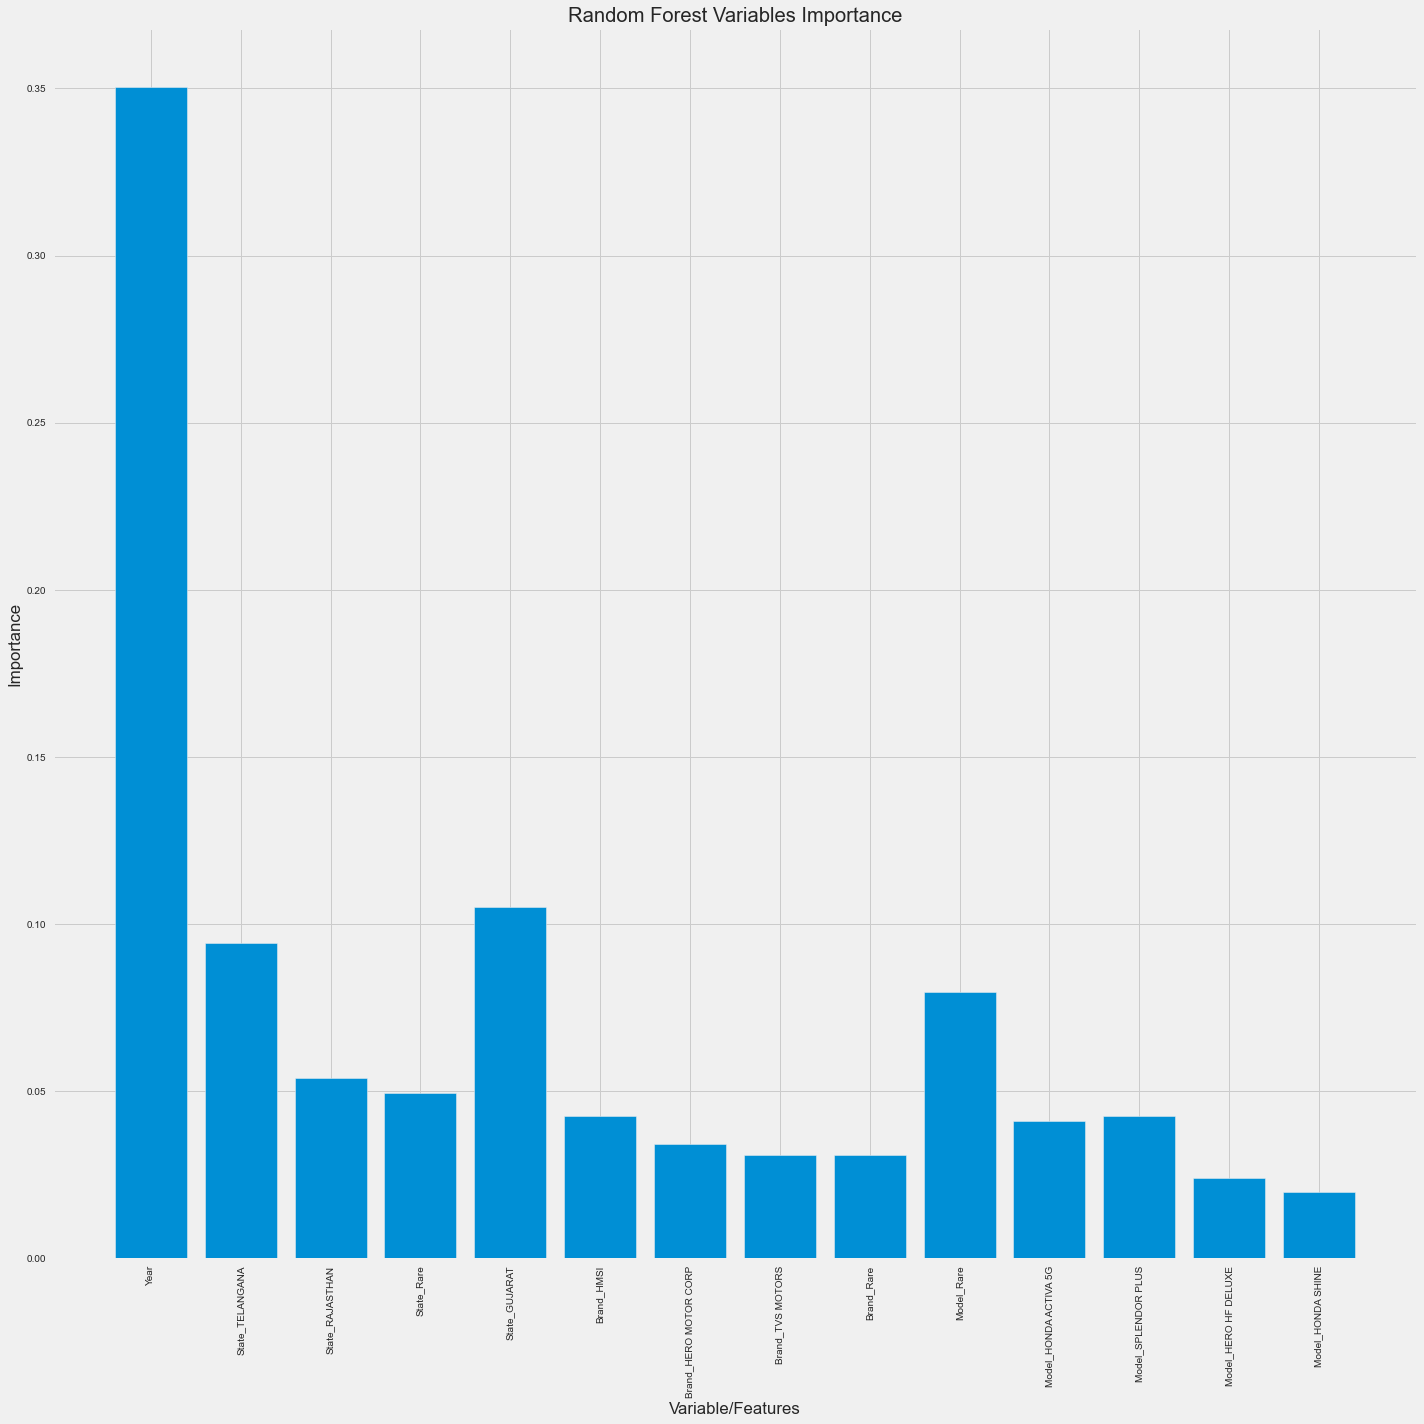

In [577]:
importances=RFR.feature_importances_
features = rare_ohe_enc_train.columns

# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.figure(figsize=(20,20))
plt.bar(x_values, importances, orientation = ('vertical'))
# Tick labels for x axis
plt.xticks(x_values, features, rotation=(90))
# Axis labels and title
plt.ylabel('Importance'); 
plt.xlabel('Variable/Features'); 
plt.title('Random Forest Variables Importance')
plt.tight_layout()
plt.savefig('Random-Forest-Variables-Importances.jpg',dpi=600)
plt.show();

# 6. Bagging Regressor

### I. One Hot Encoding

In [578]:
#model implementation
baggReg=BaggingRegressor(base_estimator=DecisionTreeRegressor(max_depth=20),n_estimators=50, random_state=1,
                         max_samples=1.0, max_features=1.0, bootstrap=False, 
                         bootstrap_features=False, oob_score=False, warm_start=False, n_jobs=-1, verbose=0)
baggReg.fit(ohe_enc_train,y_train)
y_pred=baggReg.predict(ohe_enc_test)

In [579]:
#model evaluation
r6_br=result('OHE',y_test,y_pred,'Bagging Regressor')
print("MSLE : {}".format(r6_br[1]))
print("Root MSLE : {}".format(r6_br[2]))
print("R2 Score : {} or {}%".format(r6_br[3],r6_br[4]))

MSLE : 0.01726725892101987
Root MSLE : 0.13140494252888613
R2 Score : 0.5490576972353194 or 55.0%


### II. One Hot Top Encoding

In [580]:
#model implementation
baggReg=BaggingRegressor(base_estimator=DecisionTreeRegressor(max_depth=20),n_estimators=50, random_state=1,
                         max_samples=1.0, max_features=1.0, bootstrap=False, 
                         bootstrap_features=False, oob_score=False, warm_start=False, n_jobs=-1, verbose=0)
baggReg.fit(ohe_enc_train_top,y_train)
y_pred=baggReg.predict(ohe_enc_test_top)

In [581]:
#model evaluation
r6_br=result('OHE_TOP',y_test,y_pred,'Bagging Regressor')
print("MSLE : {}".format(r6_br[1]))
print("Root MSLE : {}".format(r6_br[2]))
print("R2 Score : {} or {}%".format(r6_br[3],r6_br[4]))

MSLE : 0.019091170350507718
Root MSLE : 0.13817080136739354
R2 Score : 0.4233714286268009 or 42.0%


### III. Count Encoding

In [582]:
#model implementation
baggReg=BaggingRegressor(base_estimator=DecisionTreeRegressor(max_depth=20),n_estimators=50, random_state=1,
                         max_samples=1.0, max_features=1.0, bootstrap=False, 
                         bootstrap_features=False, oob_score=False, warm_start=False, n_jobs=-1, verbose=0)
baggReg.fit(count_enc_train,y_train)
y_pred=baggReg.predict(count_enc_test_filled)

In [583]:
#model evaluation
r6_br=result('COUNT_ENC',y_test,y_pred,'Bagging Regressor')
print("MSLE : {}".format(r6_br[1]))
print("Root MSLE : {}".format(r6_br[2]))
print("R2 Score : {} or {}%".format(r6_br[3],r6_br[4]))

MSLE : 0.03352164433980265
Root MSLE : 0.18308917046019585
R2 Score : 0.07523498242168525 or 8.0%


### IV. Frequency Encoding

In [584]:
#model implementation
baggReg=BaggingRegressor(base_estimator=DecisionTreeRegressor(max_depth=20),n_estimators=50, random_state=1,
                         max_samples=1.0, max_features=1.0, bootstrap=False, 
                         bootstrap_features=False, oob_score=False, warm_start=False, n_jobs=-1, verbose=0)
baggReg.fit(frequency_enc_train,y_train)
y_pred=baggReg.predict(frequency_enc_test_filled)

In [585]:
#model evaluation
r6_br=result('FREQUENCY_ENC',y_test,y_pred,'Bagging Regressor')
print("MSLE : {}".format(r6_br[1]))
print("Root MSLE : {}".format(r6_br[2]))
print("R2 Score : {} or {}%".format(r6_br[3],r6_br[4]))

MSLE : 0.03352164433980265
Root MSLE : 0.18308917046019585
R2 Score : 0.07523498242168525 or 8.0%


### V. Integer Encoding

In [586]:
#model implementation
baggReg=BaggingRegressor(base_estimator=DecisionTreeRegressor(max_depth=20),n_estimators=50, random_state=1,
                         max_samples=1.0, max_features=1.0, bootstrap=False, 
                         bootstrap_features=False, oob_score=False, warm_start=False, n_jobs=-1, verbose=0)
baggReg.fit(int_enc_train,y_train)
y_pred=baggReg.predict(int_enc_test_filled)

In [587]:
#model evaluation
r6_br=result('INT_ENC',y_test,y_pred,'Bagging Regressor')
print("MSLE : {}".format(r6_br[1]))
print("Root MSLE : {}".format(r6_br[2]))
print("R2 Score : {} or {}%".format(r6_br[3],r6_br[4]))

MSLE : 0.02406869789637052
Root MSLE : 0.1551408969175134
R2 Score : 0.42021740789662176 or 42.0%


### VI. Ordered Integer Encoding

In [588]:
#model implementation
baggReg=BaggingRegressor(base_estimator=DecisionTreeRegressor(max_depth=20),n_estimators=50, random_state=1,
                         max_samples=1.0, max_features=1.0, bootstrap=False, 
                         bootstrap_features=False, oob_score=False, warm_start=False, n_jobs=-1, verbose=0)
baggReg.fit(ordered_int_enc_train,y_train)
y_pred=baggReg.predict(ordered_int_enc_test_filled)

In [589]:
#model evaluation
r6_br=result('ORDERED_INT',y_test,y_pred,'Bagging Regressor')
print("MSLE : {}".format(r6_br[1]))
print("Root MSLE : {}".format(r6_br[2]))
print("R2 Score : {} or {}%".format(r6_br[3],r6_br[4]))

MSLE : 0.02205594129761858
Root MSLE : 0.1485124280914516
R2 Score : 0.4597100547277463 or 46.0%


### VII. Mean Target Encoding

In [590]:
#model implementation
baggReg=BaggingRegressor(base_estimator=DecisionTreeRegressor(max_depth=20),n_estimators=50, random_state=1,
                         max_samples=1.0, max_features=1.0, bootstrap=False, 
                         bootstrap_features=False, oob_score=False, warm_start=False, n_jobs=-1, verbose=0)
baggReg.fit(mean_enc_train,y_train)
y_pred=baggReg.predict(mean_enc_test_filled)

In [591]:
#model evaluation
r6_br=result('MEAN_ENC',y_test,y_pred,'Bagging Regressor')
print("MSLE : {}".format(r6_br[1]))
print("Root MSLE : {}".format(r6_br[2]))
print("R2 Score : {} or {}%".format(r6_br[3],r6_br[4]))

MSLE : 0.021261365381886617
Root MSLE : 0.14581277509836585
R2 Score : 0.47338979669908154 or 47.0%


### VIII. Engineering Rare Labels 

In [592]:
#model implementation
baggReg=BaggingRegressor(base_estimator=DecisionTreeRegressor(max_depth=20),n_estimators=50, random_state=1,
                         max_samples=1.0, max_features=1.0, bootstrap=False, 
                         bootstrap_features=False, oob_score=False, warm_start=False, n_jobs=-1, verbose=0)
baggReg.fit(rare_ohe_enc_train,y_train)
y_pred=baggReg.predict(rare_ohe_enc_test)

In [593]:
#model evaluation
r6_br=result('RARE_ENC',y_test,y_pred,'Bagging Regressor')
print("MSLE : {}".format(r6_br[1]))
print("Root MSLE : {}".format(r6_br[2]))
print("R2 Score : {} or {}%".format(r6_br[3],r6_br[4]))

MSLE : 0.024121332399673633
Root MSLE : 0.15531043879814915
R2 Score : 0.2979300486193609 or 30.0%


# 7. AdaBoost Regressor

### I. One Hot Encoding

In [594]:
#model implementation
ABR = AdaBoostRegressor(DecisionTreeRegressor(max_depth=24),n_estimators=200,learning_rate=0.6)
ABR.fit(ohe_enc_train, y_train)
y_pred = ABR.predict(ohe_enc_test)

In [595]:
#model evaluation
r7_ab=result('OHE',y_test,y_pred,'AdaBoost Regressor')
print("MSLE : {}".format(r7_ab[1]))
print("Root MSLE : {}".format(r7_ab[2]))
print("R2 Score : {} or {}%".format(r7_ab[3],r7_ab[4]))
accu['AdaBoost Regressor']=r7_ab

MSLE : 0.019168011040583164
Root MSLE : 0.13844858627152234
R2 Score : 0.5119102632989394 or 51.0%


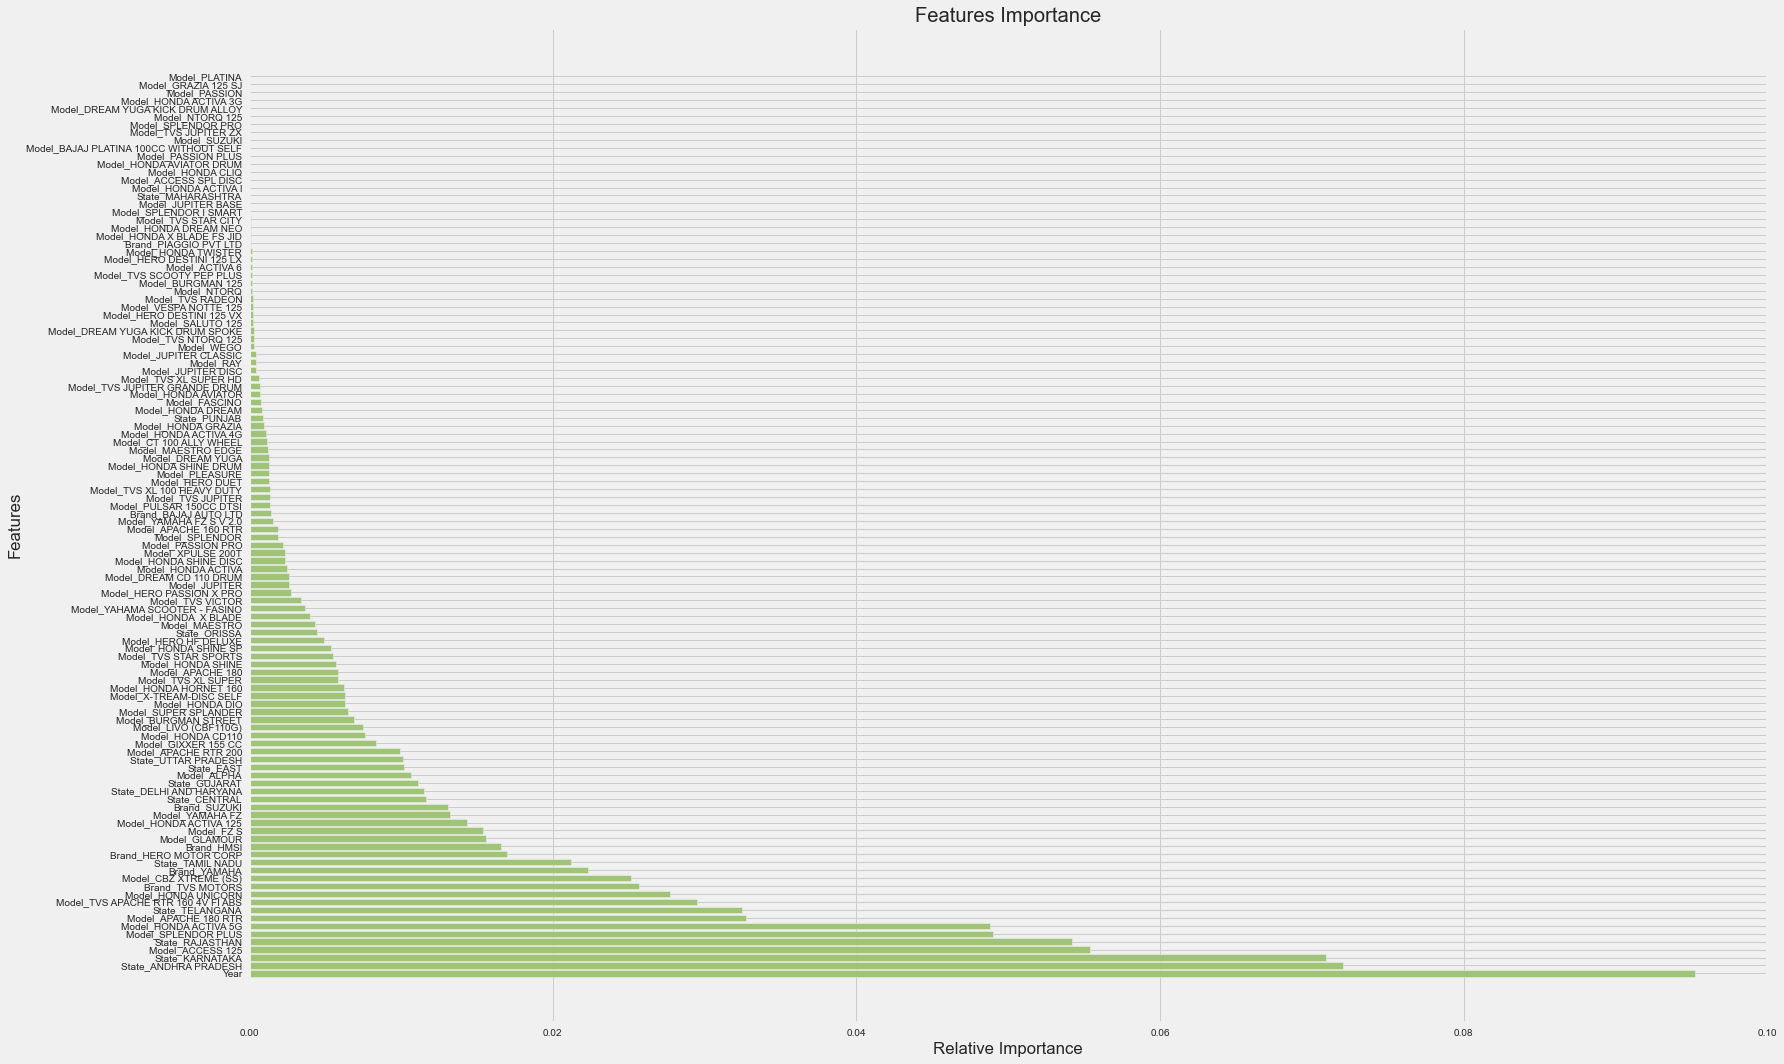

In [596]:
importances=ABR.feature_importances_
features=ohe_enc_train.columns

indices = np.argsort(importances)
indices = [x for x in reversed(indices)]
plt.figure(figsize=(25,15))
plt.title('Features Importance')
plt.barh(range(len(indices)), importances[indices], color='g', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')
plt.ylabel('Features')
plt.tight_layout()
plt.savefig('Adaboost-Features-Importance2.jpg',dpi=60)
plt.show();

### II. One Hot Top Encoding

In [597]:
#model implementation
ABR = AdaBoostRegressor(DecisionTreeRegressor(max_depth=24),n_estimators=200,learning_rate=0.6)
ABR.fit(ohe_enc_train_top, y_train)
y_pred = ABR.predict(ohe_enc_test_top)

In [598]:
#model evaluation
r7_ab=result('OHE_TOP',y_test,y_pred,'AdaBoost Regressor')
print("MSLE : {}".format(r7_ab[1]))
print("Root MSLE : {}".format(r7_ab[2]))
print("R2 Score : {} or {}%".format(r7_ab[3],r7_ab[4]))
accu['AdaBoost Regressor']=r7_ab

MSLE : 0.01860005061259514
Root MSLE : 0.13638200252450886
R2 Score : 0.46255885302668076 or 46.0%


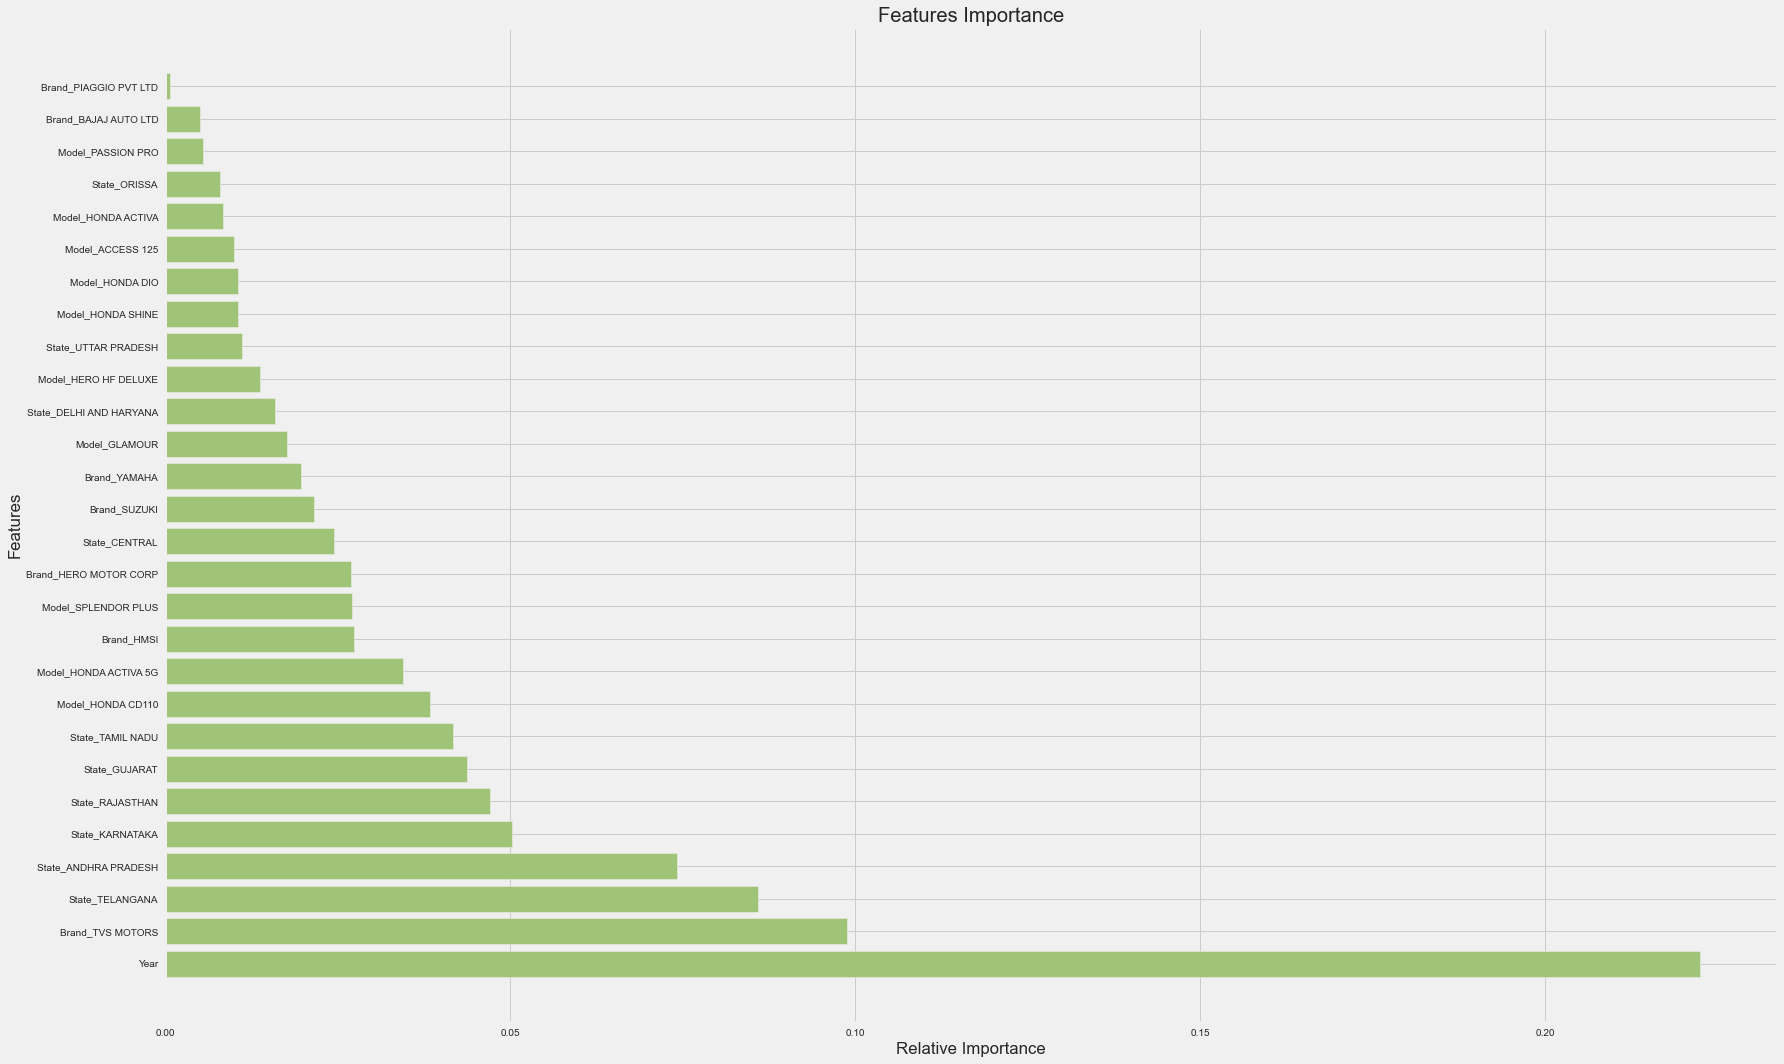

In [599]:
importances=ABR.feature_importances_
features=ohe_enc_train_top.columns

indices = np.argsort(importances)
indices = [x for x in reversed(indices)]
plt.figure(figsize=(25,15))
plt.title('Features Importance')
plt.barh(range(len(indices)), importances[indices], color='g', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')
plt.ylabel('Features')
plt.tight_layout()
plt.savefig('Adaboost-Features-Importance2.jpg',dpi=60)
plt.show();

### III.Count Encoding

In [600]:
#model implementation
ABR = AdaBoostRegressor(DecisionTreeRegressor(max_depth=24),n_estimators=200,learning_rate=0.6)
ABR.fit(count_enc_train, y_train)
y_pred = ABR.predict(count_enc_test_filled)

In [601]:
#model evaluation
r7_ab=result('COUNT_ENC',y_test,y_pred,'AdaBoost Regressor')
print("MSLE : {}".format(r7_ab[1]))
print("Root MSLE : {}".format(r7_ab[2]))
print("R2 Score : {} or {}%".format(r7_ab[3],r7_ab[4]))
accu['AdaBoost Regressor']=r7_ab

MSLE : 0.030125980834586997
Root MSLE : 0.17356837509922998
R2 Score : 0.23099995787110417 or 23.0%


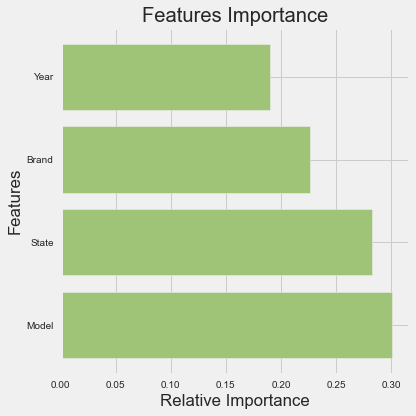

In [602]:
importances=ABR.feature_importances_
features=count_enc_train.columns

indices = np.argsort(importances)
indices = [x for x in reversed(indices)]
plt.figure(figsize=(6,6))
plt.title('Features Importance')
plt.barh(range(len(indices)), importances[indices], color='g', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')
plt.ylabel('Features')
plt.tight_layout()
plt.savefig('Adaboost-Features-Importance2.jpg',dpi=60)
plt.show();

### IV. Frequency Encoding

In [603]:
#model implementation
ABR = AdaBoostRegressor(DecisionTreeRegressor(max_depth=24),n_estimators=200,learning_rate=0.6)
ABR.fit(frequency_enc_train, y_train)
y_pred = ABR.predict(frequency_enc_test_filled)

In [604]:
#model evaluation
r7_ab=result('FREQUENCY_ENC',y_test,y_pred,'AdaBoost Regressor')
print("MSLE : {}".format(r7_ab[1]))
print("Root MSLE : {}".format(r7_ab[2]))
print("R2 Score : {} or {}%".format(r7_ab[3],r7_ab[4]))
accu['AdaBoost Regressor']=r7_ab

MSLE : 0.030291183680120865
Root MSLE : 0.17404362579572072
R2 Score : 0.2419133883203256 or 24.0%


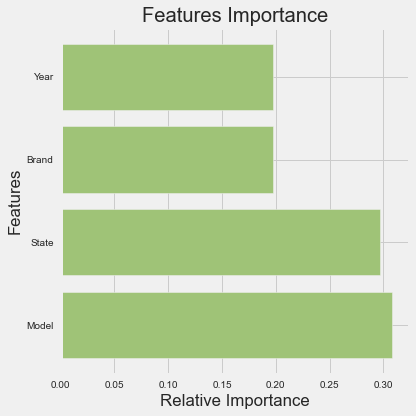

In [605]:
importances=ABR.feature_importances_
features=frequency_enc_train.columns

indices = np.argsort(importances)
indices = [x for x in reversed(indices)]
plt.figure(figsize=(6,6))
plt.title('Features Importance')
plt.barh(range(len(indices)), importances[indices], color='g', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')
plt.ylabel('Features')
plt.tight_layout()
plt.savefig('Adaboost-Features-Importance2.jpg',dpi=60)
plt.show();

### V. Integer Encoding

In [606]:
#model implementation
ABR = AdaBoostRegressor(DecisionTreeRegressor(max_depth=24),n_estimators=200,learning_rate=0.6)
ABR.fit(int_enc_train, y_train)
y_pred = ABR.predict(int_enc_test_filled)

In [607]:
#model evaluation
r7_ab=result('INT_ENC',y_test,y_pred,'AdaBoost Regressor')
print("MSLE : {}".format(r7_ab[1]))
print("Root MSLE : {}".format(r7_ab[2]))
print("R2 Score : {} or {}%".format(r7_ab[3],r7_ab[4]))
accu['AdaBoost Regressor']=r7_ab

MSLE : 0.019990082796853492
Root MSLE : 0.14138628928171745
R2 Score : 0.48707737328582845 or 49.0%


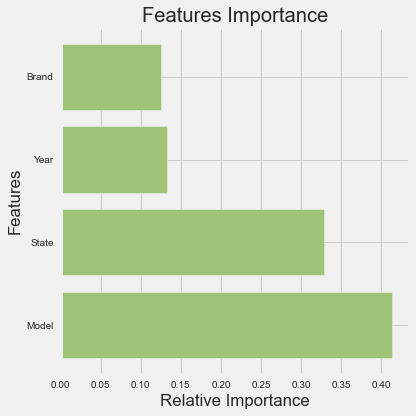

In [608]:
importances=ABR.feature_importances_
features=int_enc_train.columns

indices = np.argsort(importances)
indices = [x for x in reversed(indices)]
plt.figure(figsize=(6,6))
plt.title('Features Importance')
plt.barh(range(len(indices)), importances[indices], color='g', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')
plt.ylabel('Features')
plt.tight_layout()
plt.savefig('Adaboost-Features-Importance2.jpg',dpi=60)
plt.show();

### VI. Ordered Integer Encoding

In [609]:
#model implementation
ABR = AdaBoostRegressor(DecisionTreeRegressor(max_depth=24),n_estimators=200,learning_rate=0.6)
ABR.fit(ordered_int_enc_train, y_train)
y_pred = ABR.predict(ordered_int_enc_test_filled)

In [610]:
#model evaluation
r7_ab=result('ORDERED_INT_ENC',y_test,y_pred,'AdaBoost Regressor')
print("MSLE : {}".format(r7_ab[1]))
print("Root MSLE : {}".format(r7_ab[2]))
print("R2 Score : {} or {}%".format(r7_ab[3],r7_ab[4]))
accu['AdaBoost Regressor']=r7_ab

MSLE : 0.01997453517174402
Root MSLE : 0.1413312957973004
R2 Score : 0.514340801275836 or 51.0%


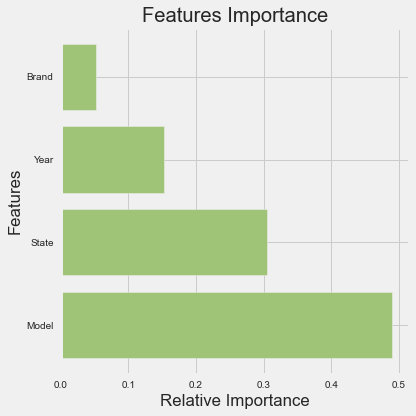

In [611]:
importances=ABR.feature_importances_
features=ordered_int_enc_train.columns

indices = np.argsort(importances)
indices = [x for x in reversed(indices)]
plt.figure(figsize=(6,6))
plt.title('Features Importance')
plt.barh(range(len(indices)), importances[indices], color='g', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')
plt.ylabel('Features')
plt.tight_layout()
plt.savefig('Adaboost-Features-Importance2.jpg',dpi=60)
plt.show();

### VII. Mean Target Encoding

In [612]:
#model implementation
ABR = AdaBoostRegressor(DecisionTreeRegressor(max_depth=24),n_estimators=200,learning_rate=0.6)
ABR.fit(mean_enc_train, y_train)
y_pred = ABR.predict(mean_enc_test_filled)

In [613]:
#model evaluation
r7_ab=result('MEAN_ENC',y_test,y_pred,'AdaBoost Regressor')
print("MSLE : {}".format(r7_ab[1]))
print("Root MSLE : {}".format(r7_ab[2]))
print("R2 Score : {} or {}%".format(r7_ab[3],r7_ab[4]))
accu['AdaBoost Regressor']=r7_ab

MSLE : 0.02097759667419461
Root MSLE : 0.14483644801704648
R2 Score : 0.47767101580875315 or 48.0%


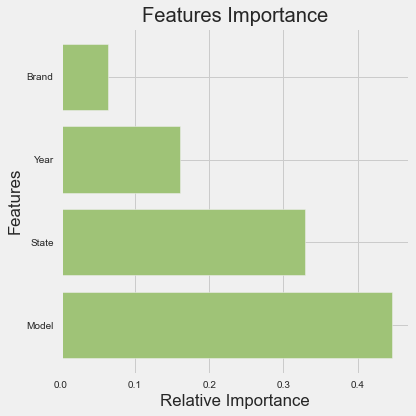

In [614]:
importances=ABR.feature_importances_
features=mean_enc_train.columns

indices = np.argsort(importances)
indices = [x for x in reversed(indices)]
plt.figure(figsize=(6,6))
plt.title('Features Importance')
plt.barh(range(len(indices)), importances[indices], color='g', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')
plt.ylabel('Features')
plt.tight_layout()
plt.savefig('Adaboost-Features-Importance2.jpg',dpi=60)
plt.show();

### VII. Engineering Rare Labels

In [615]:
#model implementation
ABR = AdaBoostRegressor(DecisionTreeRegressor(max_depth=24),n_estimators=200,learning_rate=0.6)
ABR.fit(rare_ohe_enc_train, y_train)
y_pred = ABR.predict(rare_ohe_enc_test)

In [616]:
#model evaluation
r7_ab=result('RARE_ENC',y_test,y_pred,'AdaBoost Regressor')
print("MSLE : {}".format(r7_ab[1]))
print("Root MSLE : {}".format(r7_ab[2]))
print("R2 Score : {} or {}%".format(r7_ab[3],r7_ab[4]))
accu['AdaBoost Regressor']=r7_ab

MSLE : 0.02519648423414872
Root MSLE : 0.15873400465605572
R2 Score : 0.2876435664734679 or 29.0%


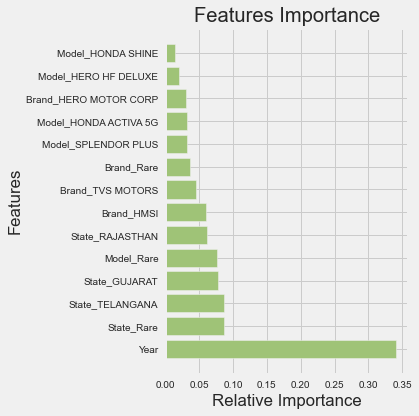

In [617]:
importances=ABR.feature_importances_
features=rare_ohe_enc_train.columns

indices = np.argsort(importances)
indices = [x for x in reversed(indices)]
plt.figure(figsize=(6,6))
plt.title('Features Importance')
plt.barh(range(len(indices)), importances[indices], color='g', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')
plt.ylabel('Features')
plt.tight_layout()
plt.savefig('Adaboost-Features-Importance2.jpg',dpi=60)
plt.show();

# 8. XGBoost Regressor

### I. One Hot Encoding

In [655]:
#model implementation and fitting data
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', learning_rate = 0.4,
                max_depth = 24, alpha = 5, n_estimators = 200)
xg_reg.fit(ohe_enc_train,y_train)
y_pred = xg_reg.predict(ohe_enc_test)

In [656]:
#model evaluation
r8_xg=result('OHE',y_test,y_pred,'XGBoost Regressor')
print("MSLE : {}".format(r8_xg[1]))
print("Root MSLE : {}".format(r8_xg[2]))
print("R2 Score : {} or {}%".format(r8_xg[3],r8_xg[4]))
accu['XGBoost Regressor']=r8_xg

MSLE : 0.018852522197959295
Root MSLE : 0.13730448717343252
R2 Score : 0.5395991825183921 or 54.0%


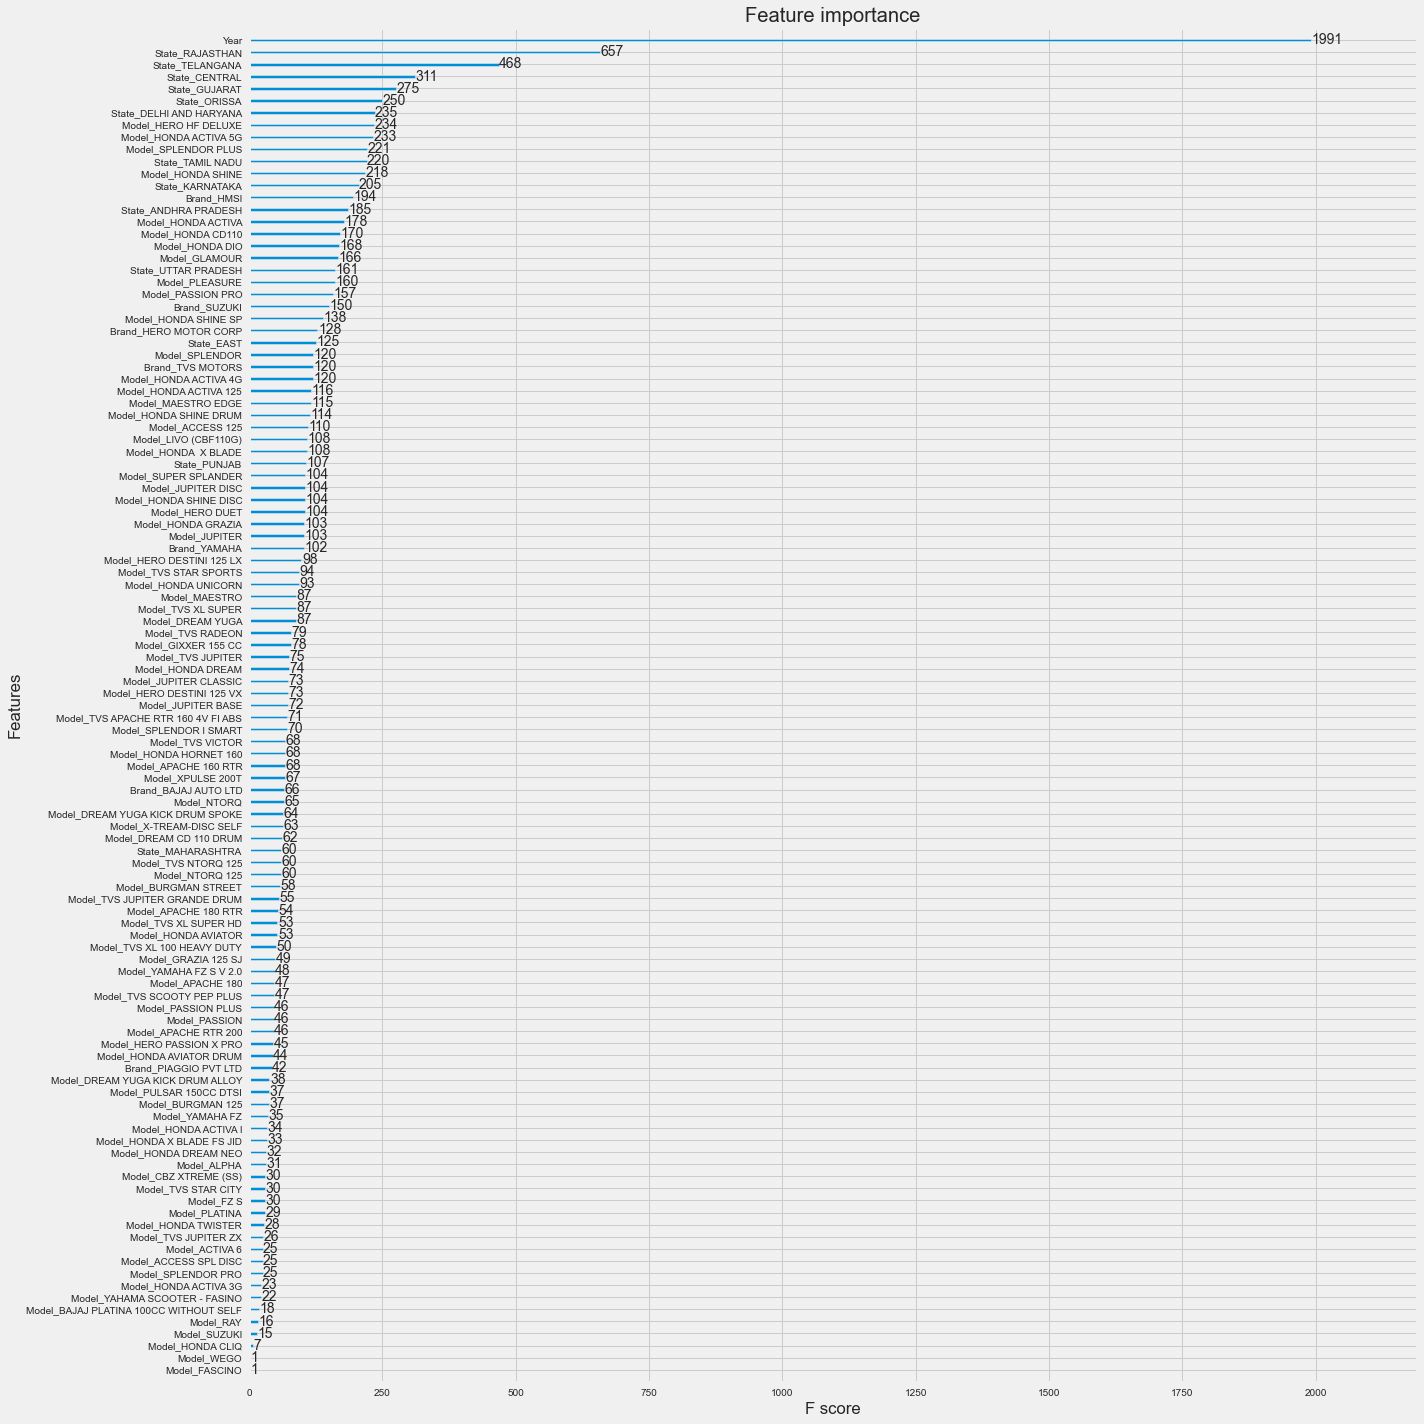

In [657]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [20, 20]
plt.tight_layout()
plt.savefig('XGBoost-Features-Importance.jpg')
plt.show();

### II. One Hot Top Encoding

In [621]:
#model implementation and fitting data
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', learning_rate = 0.4,
                max_depth = 24, alpha = 5, n_estimators = 200)
xg_reg.fit(ohe_enc_train_top,y_train)
y_pred = xg_reg.predict(ohe_enc_test_top)

In [622]:
#model evaluation
r8_xg=result('OHE_TOP',y_test,y_pred,'XGBoost Regressor')
print("MSLE : {}".format(r8_xg[1]))
print("Root MSLE : {}".format(r8_xg[2]))
print("R2 Score : {} or {}%".format(r8_xg[3],r8_xg[4]))
accu['XGBoost Regressor']=r8_xg

MSLE : 0.01785870528497557
Root MSLE : 0.1336364668979825
R2 Score : 0.4624957713311818 or 46.0%


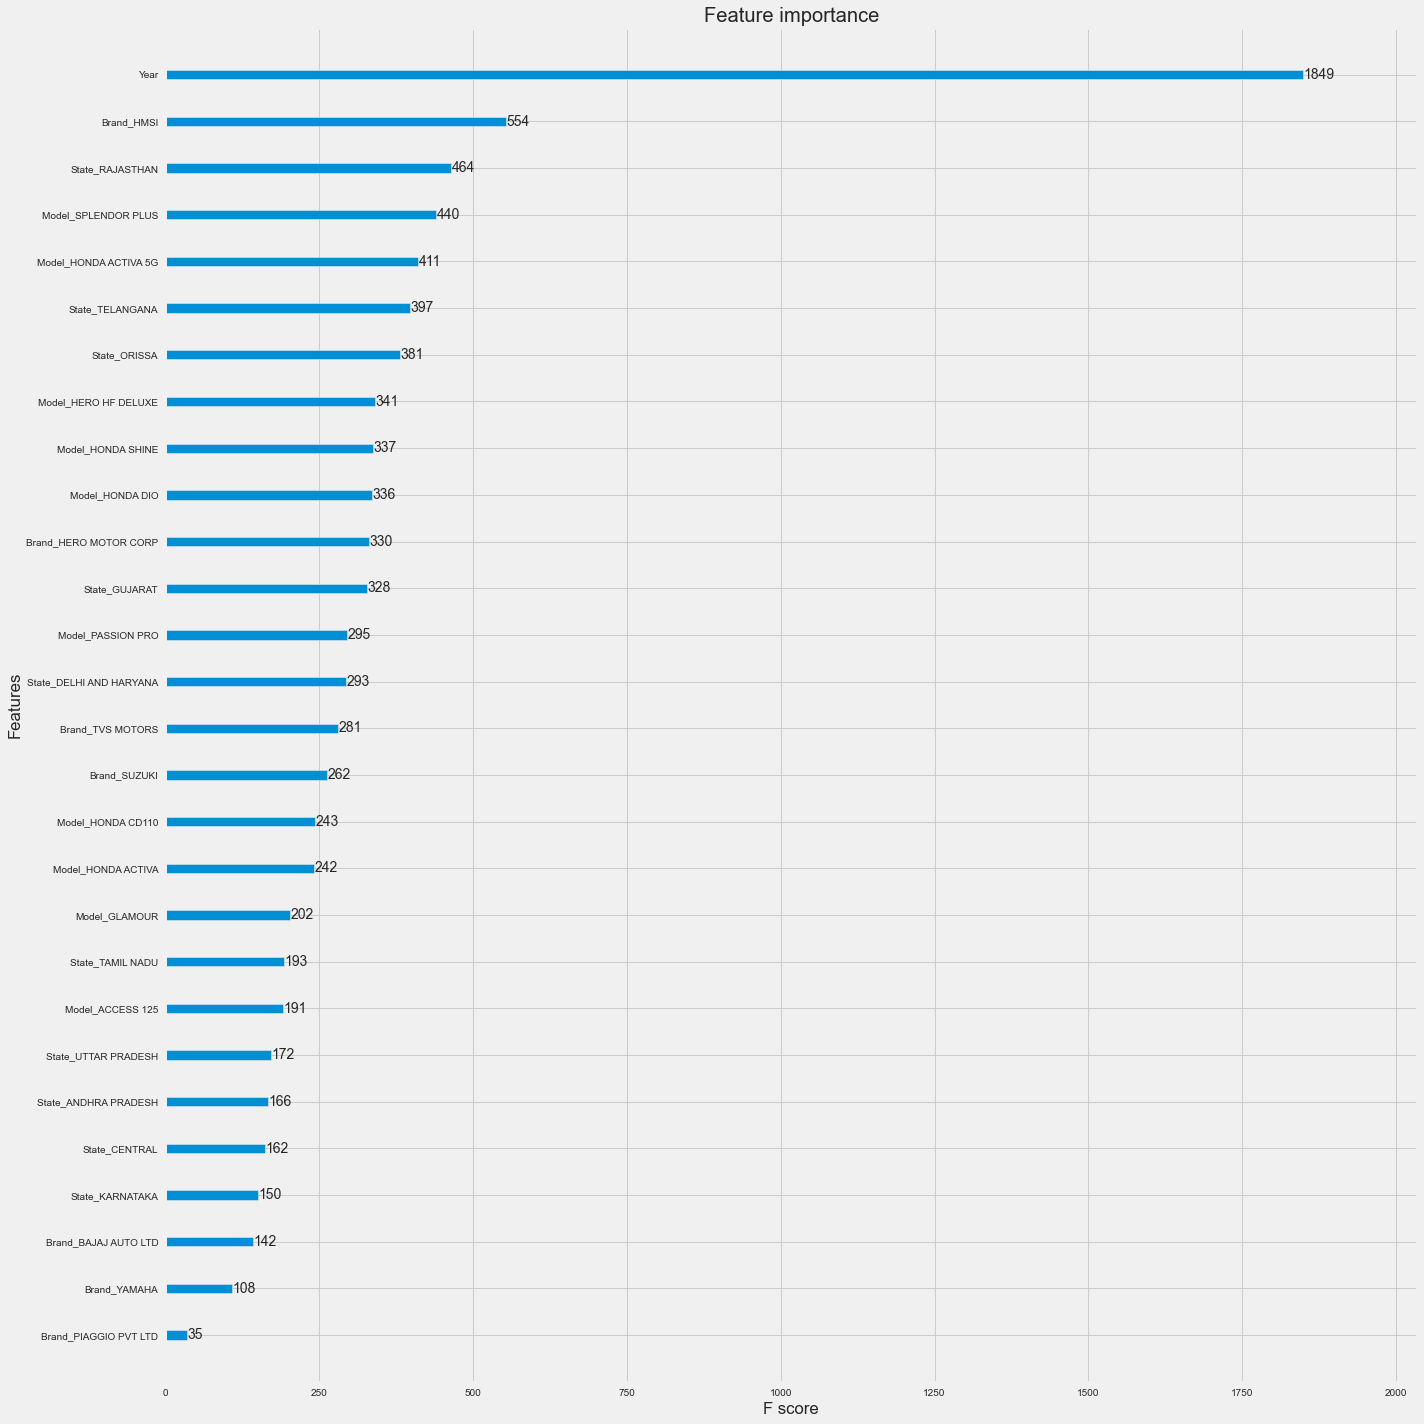

In [623]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [20, 20]
plt.tight_layout()
plt.savefig('XGBoost-Features-Importance.jpg')
plt.show();

### III. Count Encoding

In [624]:
#model implementation and fitting data
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', learning_rate = 0.4,
                max_depth = 24, alpha = 5, n_estimators = 200)
xg_reg.fit(count_enc_train,y_train)
y_pred = xg_reg.predict(count_enc_test_filled)

In [625]:
#model evaluation
r8_xg=result('COUNT_ENC',y_test,y_pred,'XGBoost Regressor')
print("MSLE : {}".format(r8_xg[1]))
print("Root MSLE : {}".format(r8_xg[2]))
print("R2 Score : {} or {}%".format(r8_xg[3],r8_xg[4]))
accu['XGBoost Regressor']=r8_xg

MSLE : 0.02486545948003685
Root MSLE : 0.15768785457363813
R2 Score : 0.36197362720935156 or 36.0%


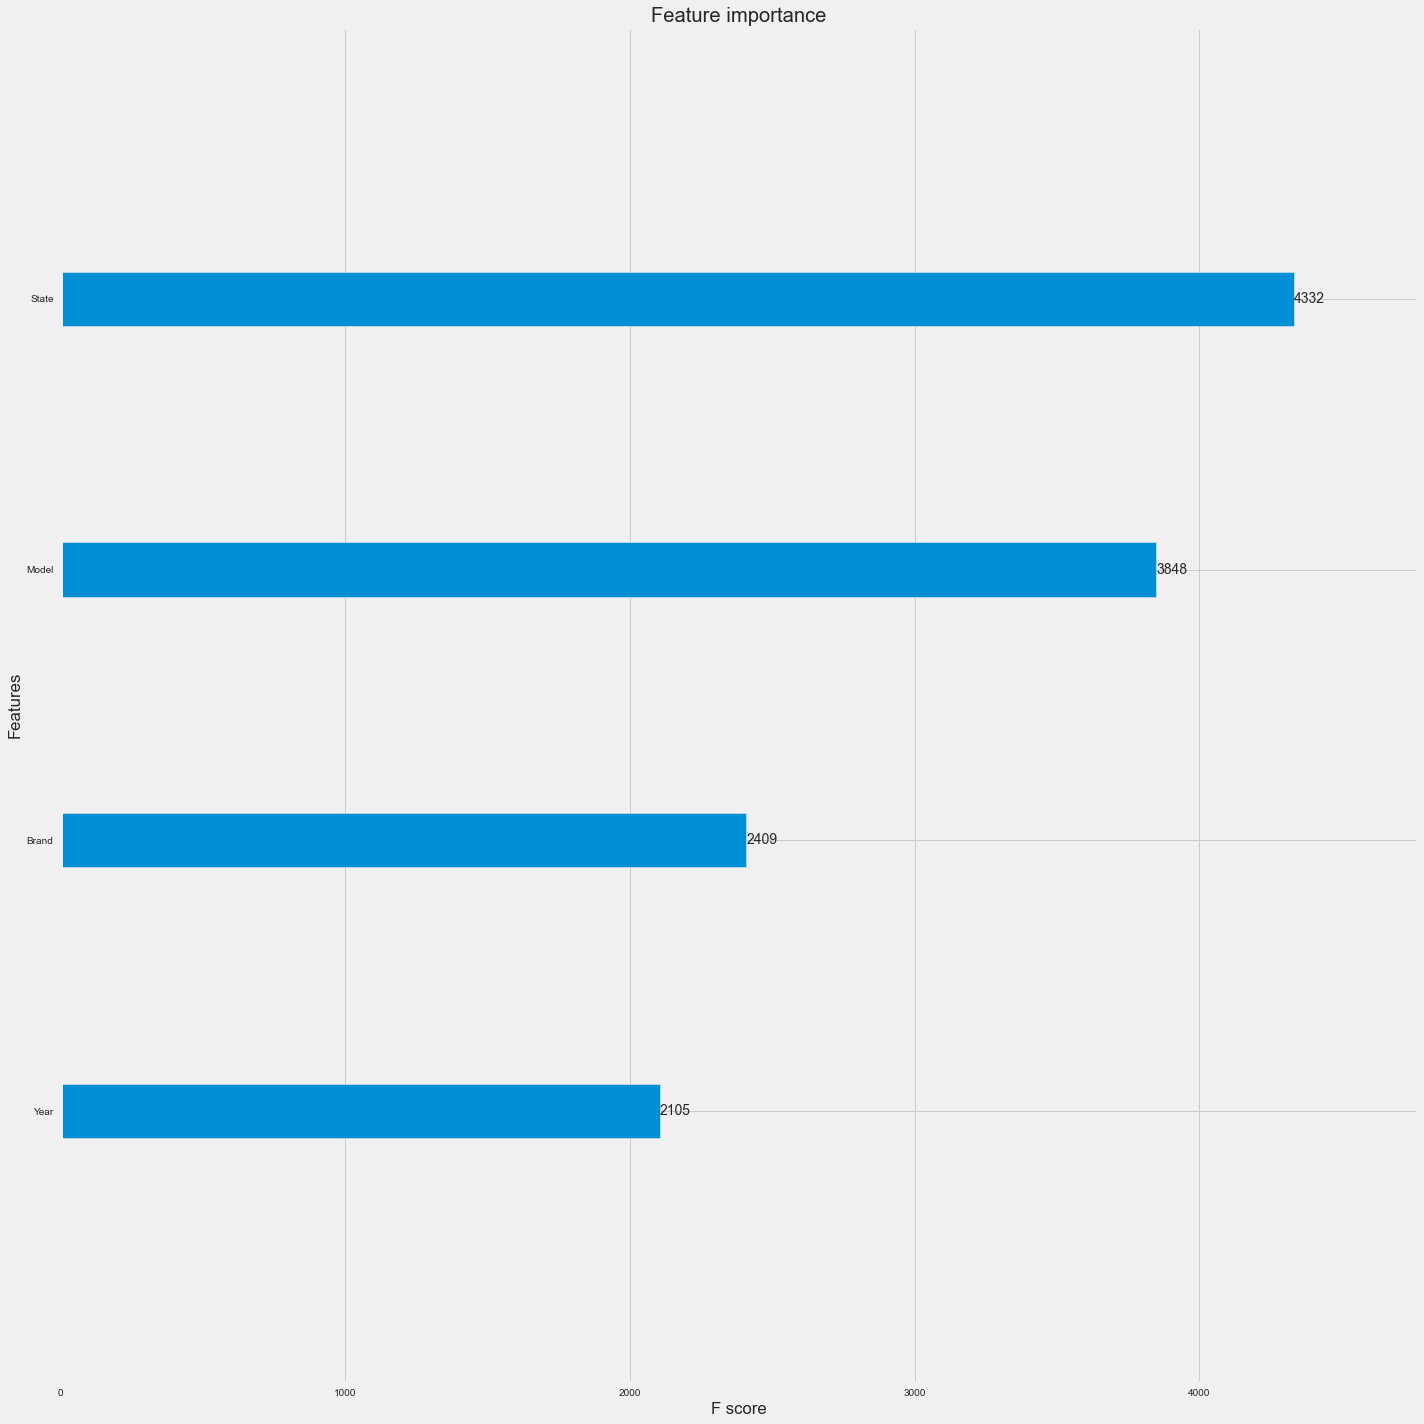

In [626]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [20, 20]
plt.tight_layout()
plt.savefig('XGBoost-Features-Importance.jpg')
plt.show();

### IV. Frequency Encoding

In [627]:
#model implementation and fitting data
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', learning_rate = 0.4,
                max_depth = 24, alpha = 5, n_estimators = 200)
xg_reg.fit(frequency_enc_train,y_train)
y_pred = xg_reg.predict(frequency_enc_test_filled)

In [628]:
#model evaluation
r8_xg=result('FREQUENCY_ENC',y_test,y_pred,'XGBoost Regressor')
print("MSLE : {}".format(r8_xg[1]))
print("Root MSLE : {}".format(r8_xg[2]))
print("R2 Score : {} or {}%".format(r8_xg[3],r8_xg[4]))
accu['XGBoost Regressor']=r8_xg

MSLE : 0.02486545948003685
Root MSLE : 0.15768785457363813
R2 Score : 0.36197362720935156 or 36.0%


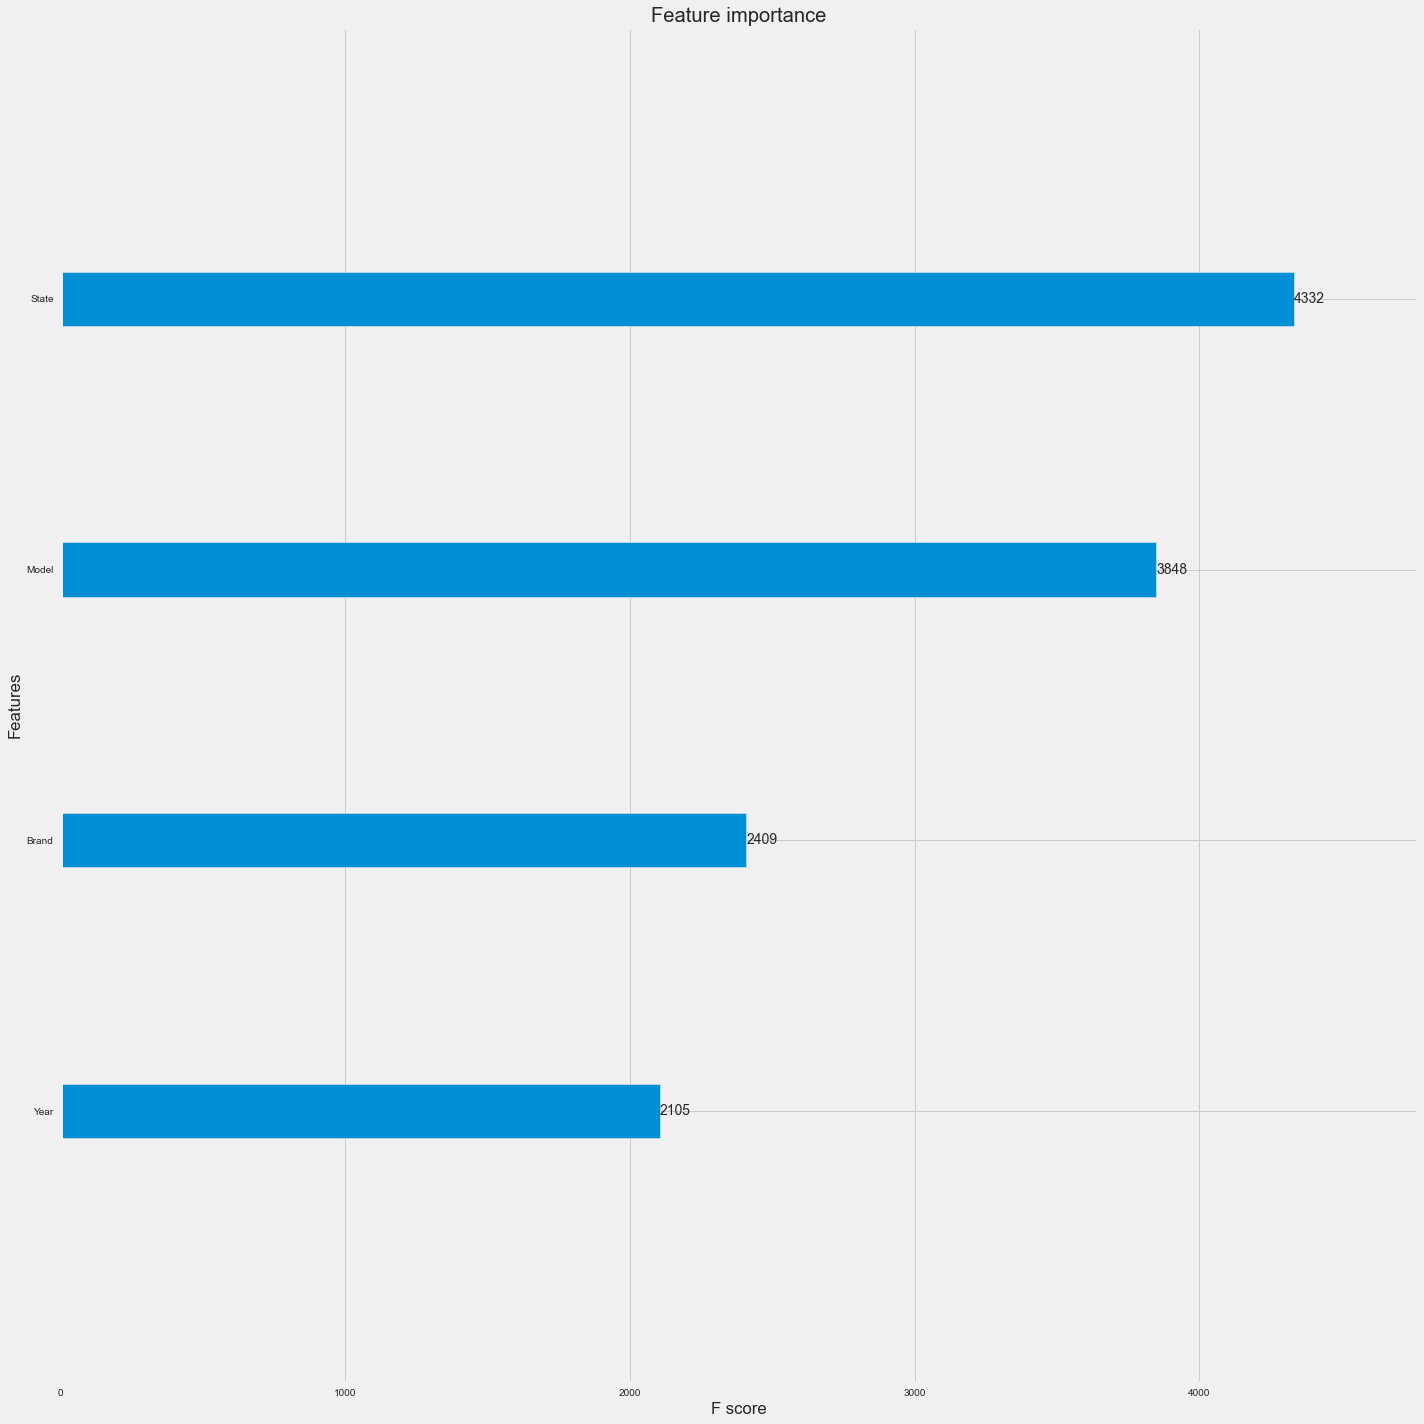

In [629]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [20, 20]
plt.tight_layout()
plt.savefig('XGBoost-Features-Importance.jpg')
plt.show();

### V. Integer Encoding

In [630]:
#model implementation and fitting data
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', learning_rate = 0.4,
                max_depth = 24, alpha = 5, n_estimators = 200)
xg_reg.fit(int_enc_train,y_train)
y_pred = xg_reg.predict(int_enc_test_filled)

In [631]:
#model evaluation
r8_xg=result('INT_ENC',y_test,y_pred,'XGBoost Regressor')
print("MSLE : {}".format(r8_xg[1]))
print("Root MSLE : {}".format(r8_xg[2]))
print("R2 Score : {} or {}%".format(r8_xg[3],r8_xg[4]))
accu['XGBoost Regressor']=r8_xg

MSLE : 0.021716047059132913
Root MSLE : 0.1473636558284739
R2 Score : 0.4969137529479116 or 50.0%


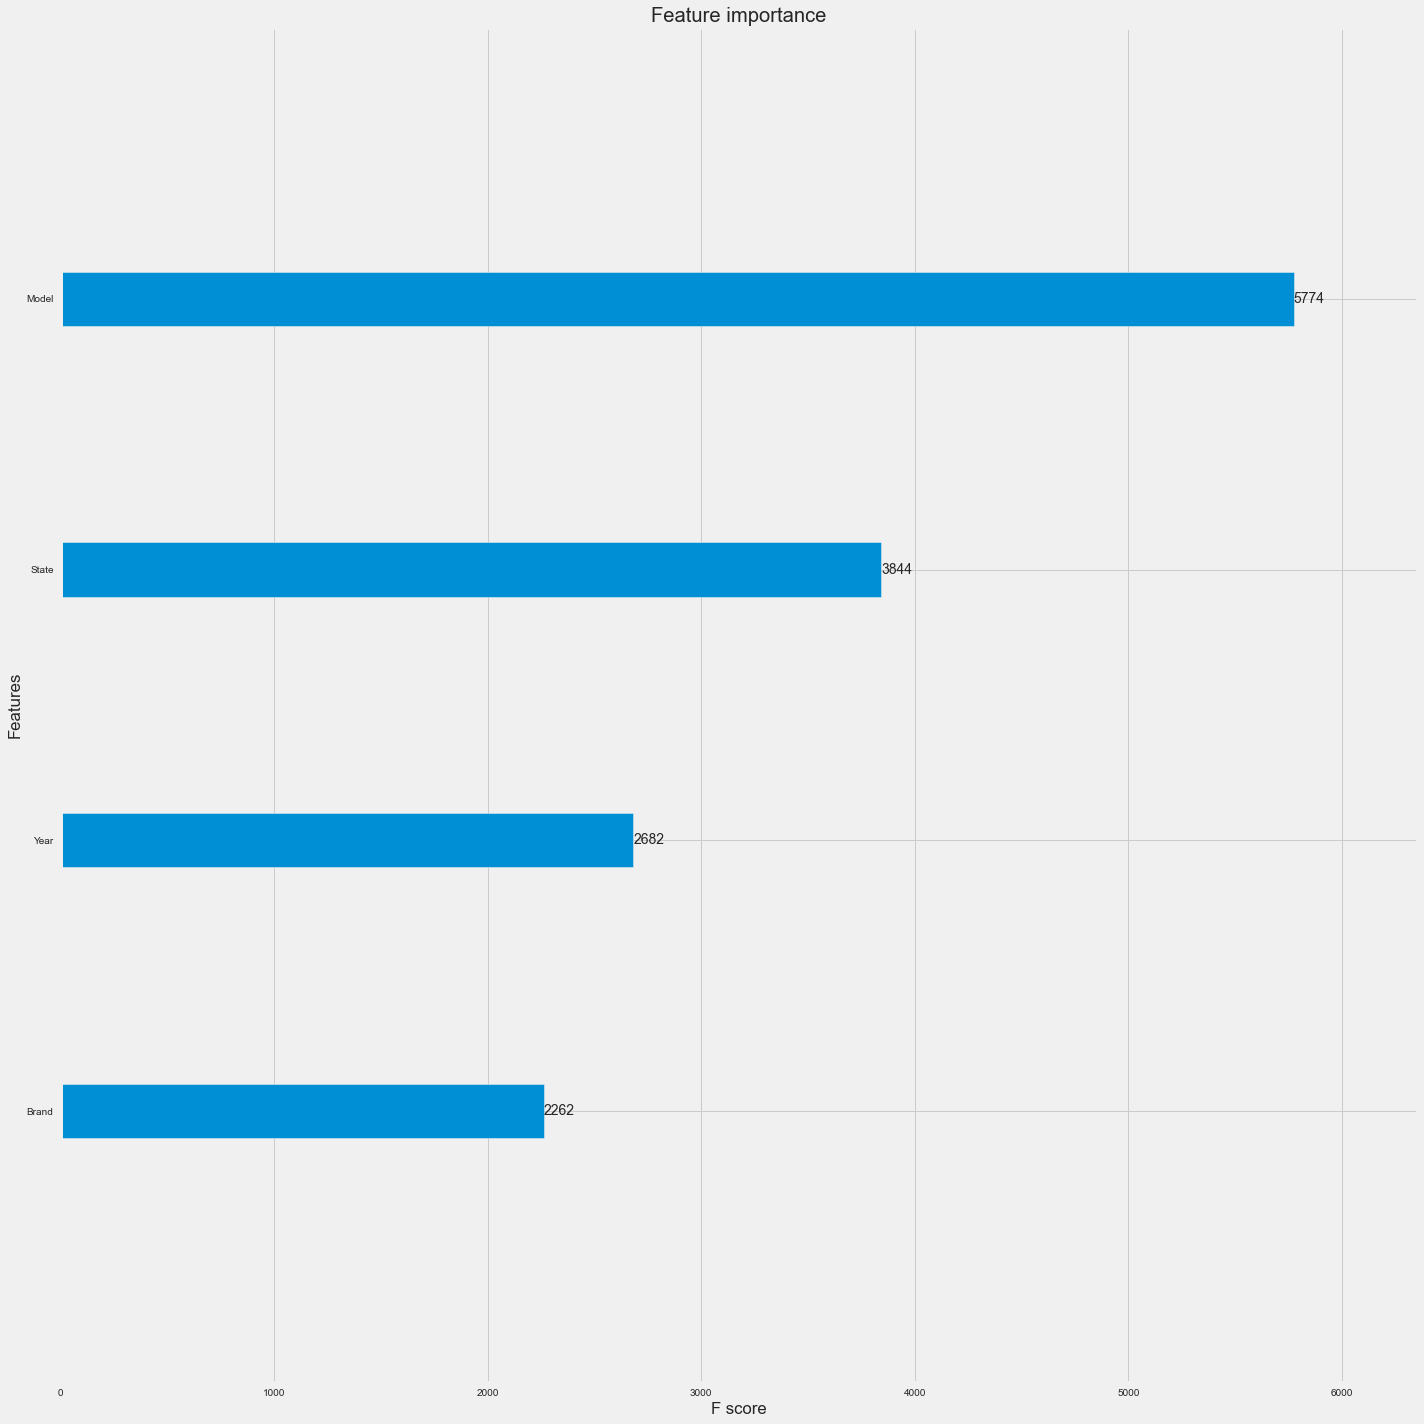

In [632]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [20, 20]
plt.tight_layout()
plt.savefig('XGBoost-Features-Importance.jpg')
plt.show();

### VI. Ordered Integer Encoding

In [633]:
#model implementation and fitting data
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', learning_rate = 0.4,
                max_depth = 24, alpha = 5, n_estimators = 200)
xg_reg.fit(ordered_int_enc_train,y_train)
y_pred = xg_reg.predict(ordered_int_enc_test_filled)

In [634]:
#model evaluation
r8_xg=result('ORDERED_INT_ENC',y_test,y_pred,'XGBoost Regressor')
print("MSLE : {}".format(r8_xg[1]))
print("Root MSLE : {}".format(r8_xg[2]))
print("R2 Score : {} or {}%".format(r8_xg[3],r8_xg[4]))
accu['XGBoost Regressor']=r8_xg

MSLE : 0.01836256101118338
Root MSLE : 0.13550852744821404
R2 Score : 0.566184601871706 or 57.0%


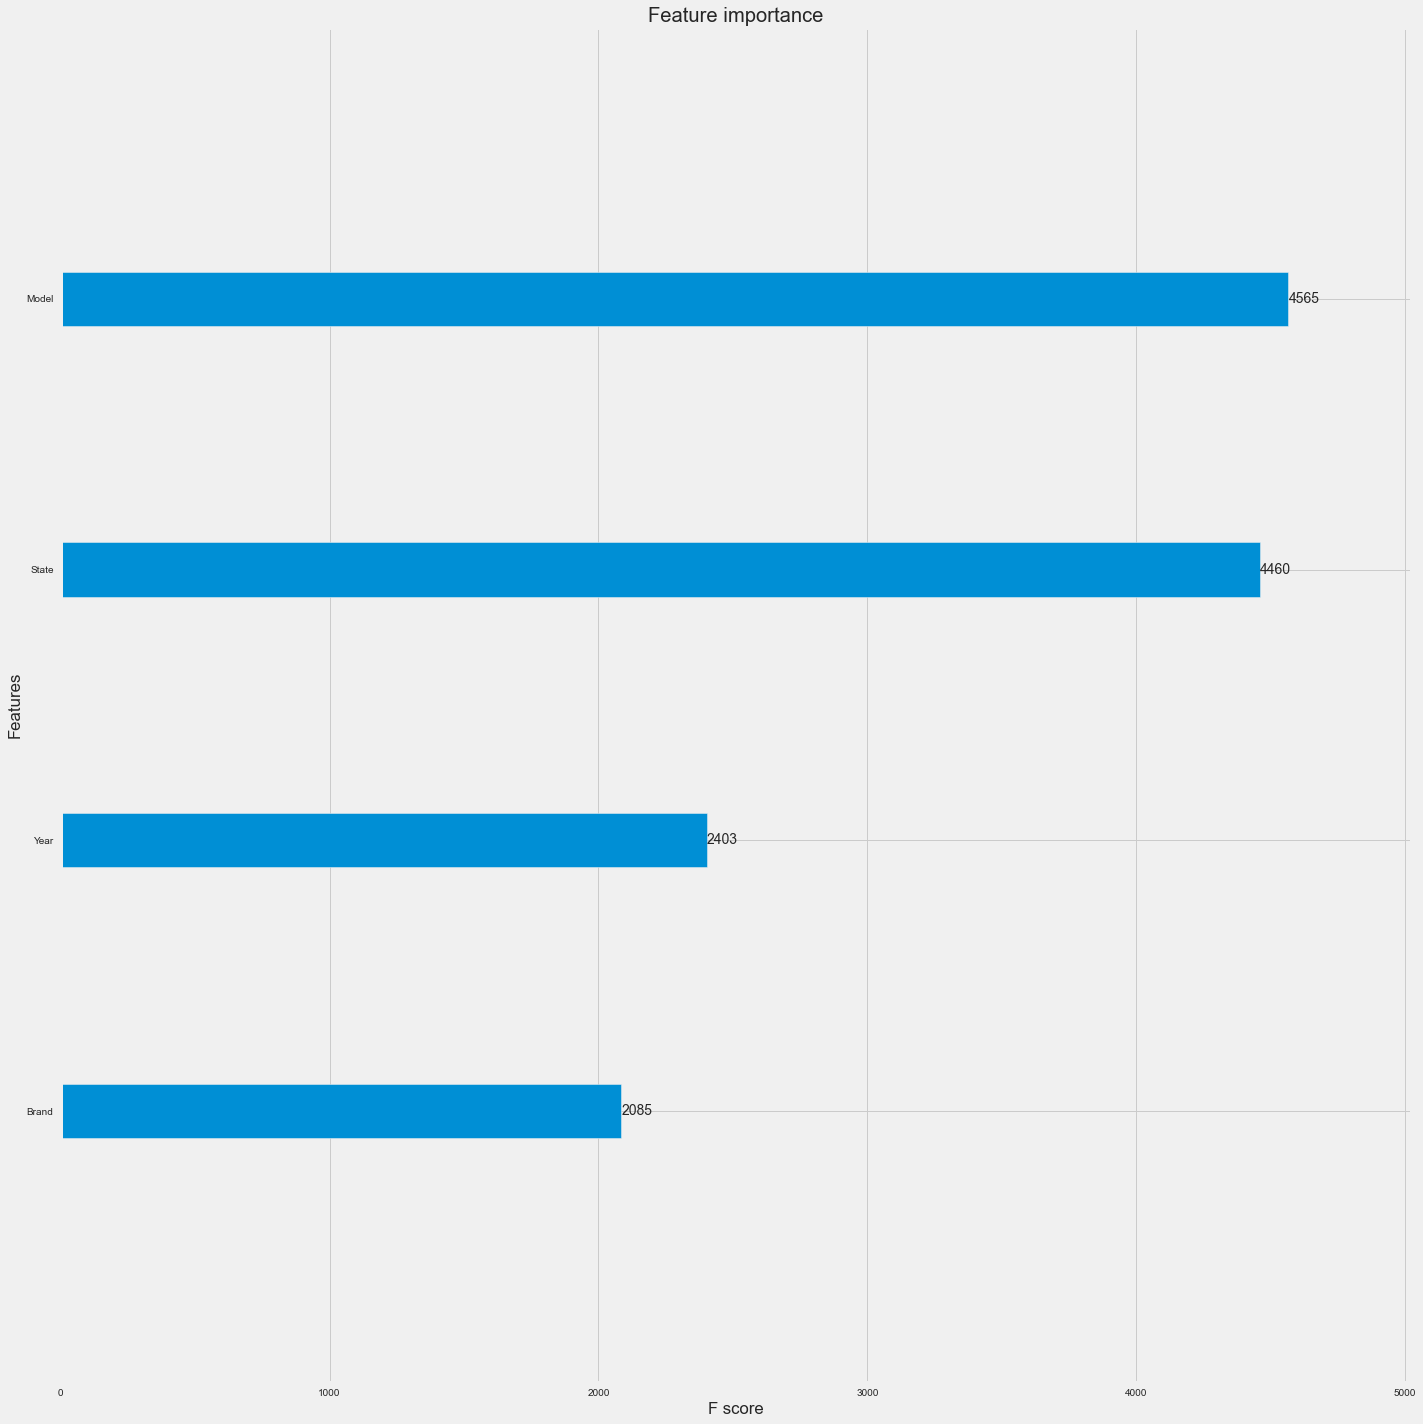

In [635]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [20, 20]
plt.tight_layout()
plt.savefig('XGBoost-Features-Importance.jpg')
plt.show();

### VII. Mean Target Encoding

In [636]:
#model implementation and fitting data
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', learning_rate = 0.4,
                max_depth = 24, alpha = 5, n_estimators = 200)
xg_reg.fit(mean_enc_train,y_train)
y_pred = xg_reg.predict(mean_enc_test_filled)

In [637]:
#model evaluation
r8_xg=result('MEAN_ENC',y_test,y_pred,'XGBoost Regressor')
print("MSLE : {}".format(r8_xg[1]))
print("Root MSLE : {}".format(r8_xg[2]))
print("R2 Score : {} or {}%".format(r8_xg[3],r8_xg[4]))
accu['XGBoost Regressor']=r8_xg

MSLE : 0.01856522708532065
Root MSLE : 0.13625427364057485
R2 Score : 0.560071826175107 or 56.0%


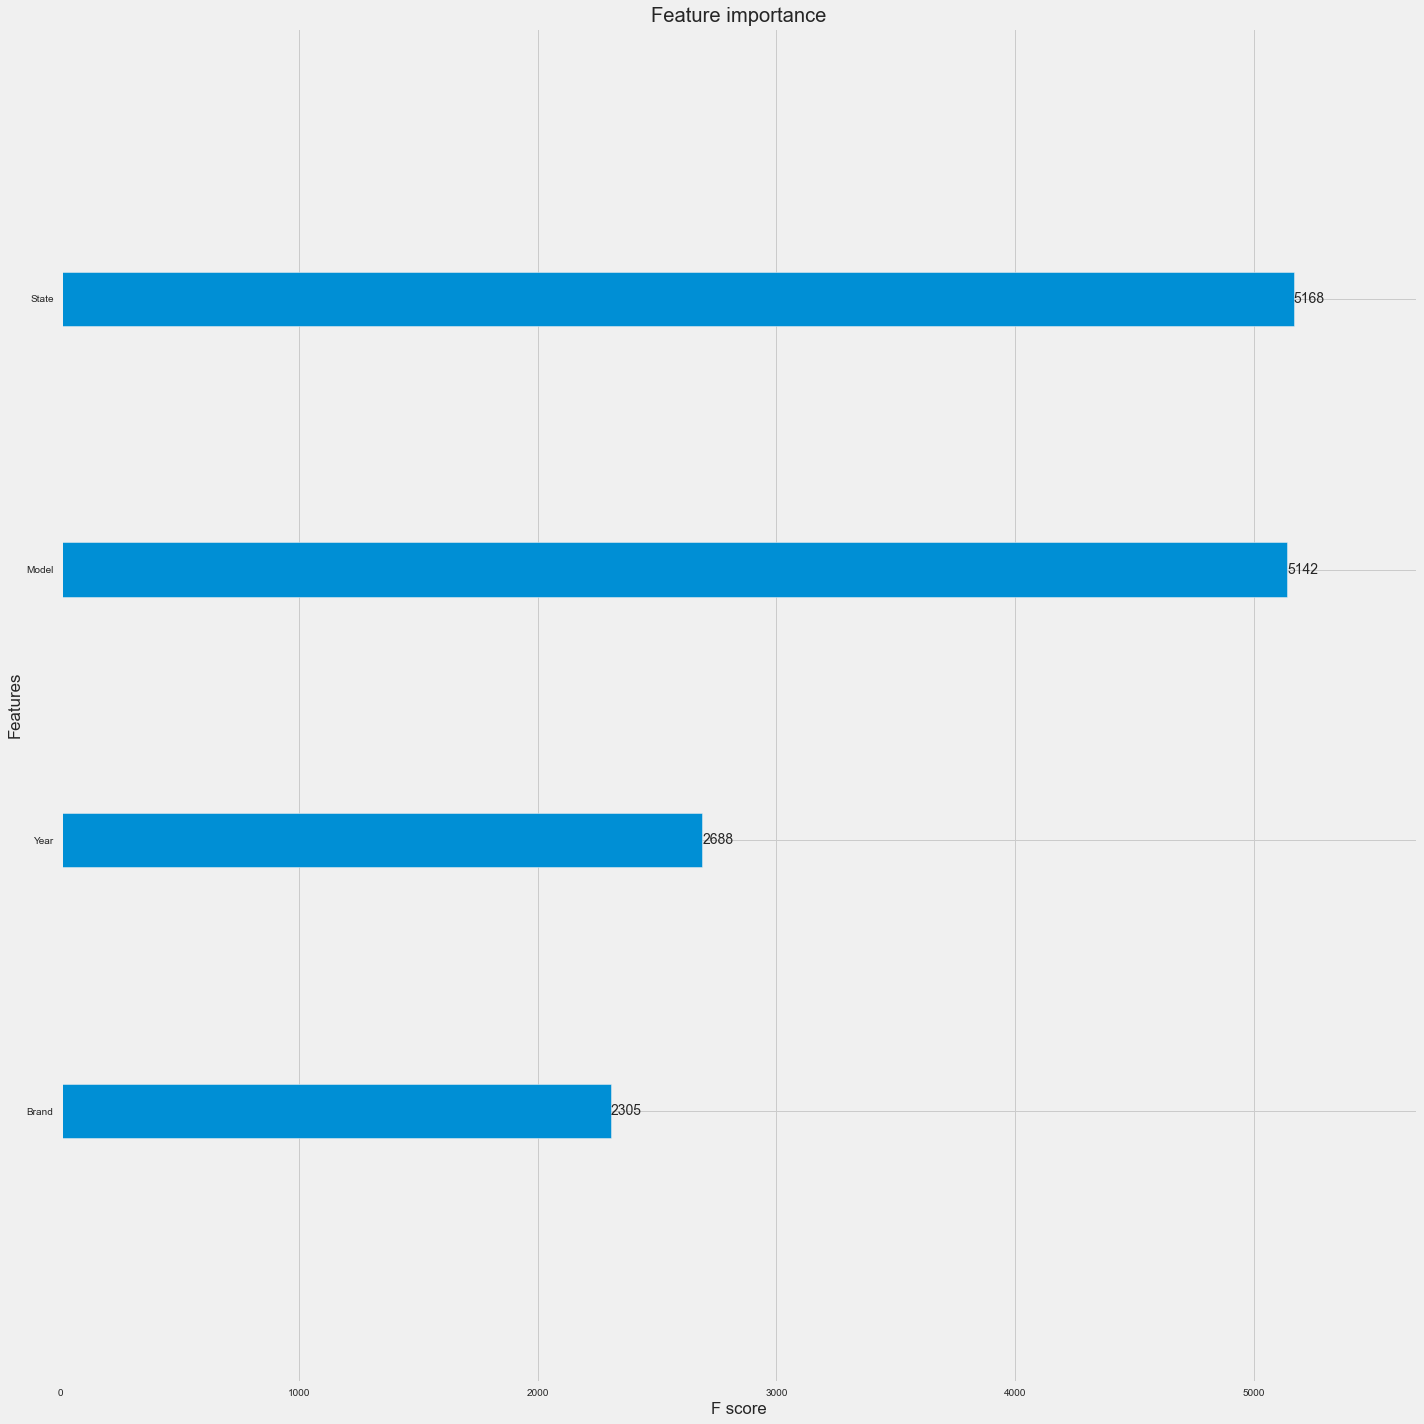

In [638]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [20, 20]
plt.tight_layout()
plt.savefig('XGBoost-Features-Importance.jpg')
plt.show();

### VIII. Engnieering Rare Labels

In [639]:
#model implementation and fitting data
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', learning_rate = 0.4,
                max_depth = 24, alpha = 5, n_estimators = 200)
xg_reg.fit(rare_ohe_enc_train,y_train)
y_pred = xg_reg.predict(rare_ohe_enc_test)

In [640]:
#model evaluation
r8_xg=result('MEAN_ENC',y_test,y_pred,'XGBoost Regressor')
print("MSLE : {}".format(r8_xg[1]))
print("Root MSLE : {}".format(r8_xg[2]))
print("R2 Score : {} or {}%".format(r8_xg[3],r8_xg[4]))
accu['XGBoost Regressor']=r8_xg

MSLE : 0.024127360347922205
Root MSLE : 0.15532984371305536
R2 Score : 0.29778898266529663 or 30.0%


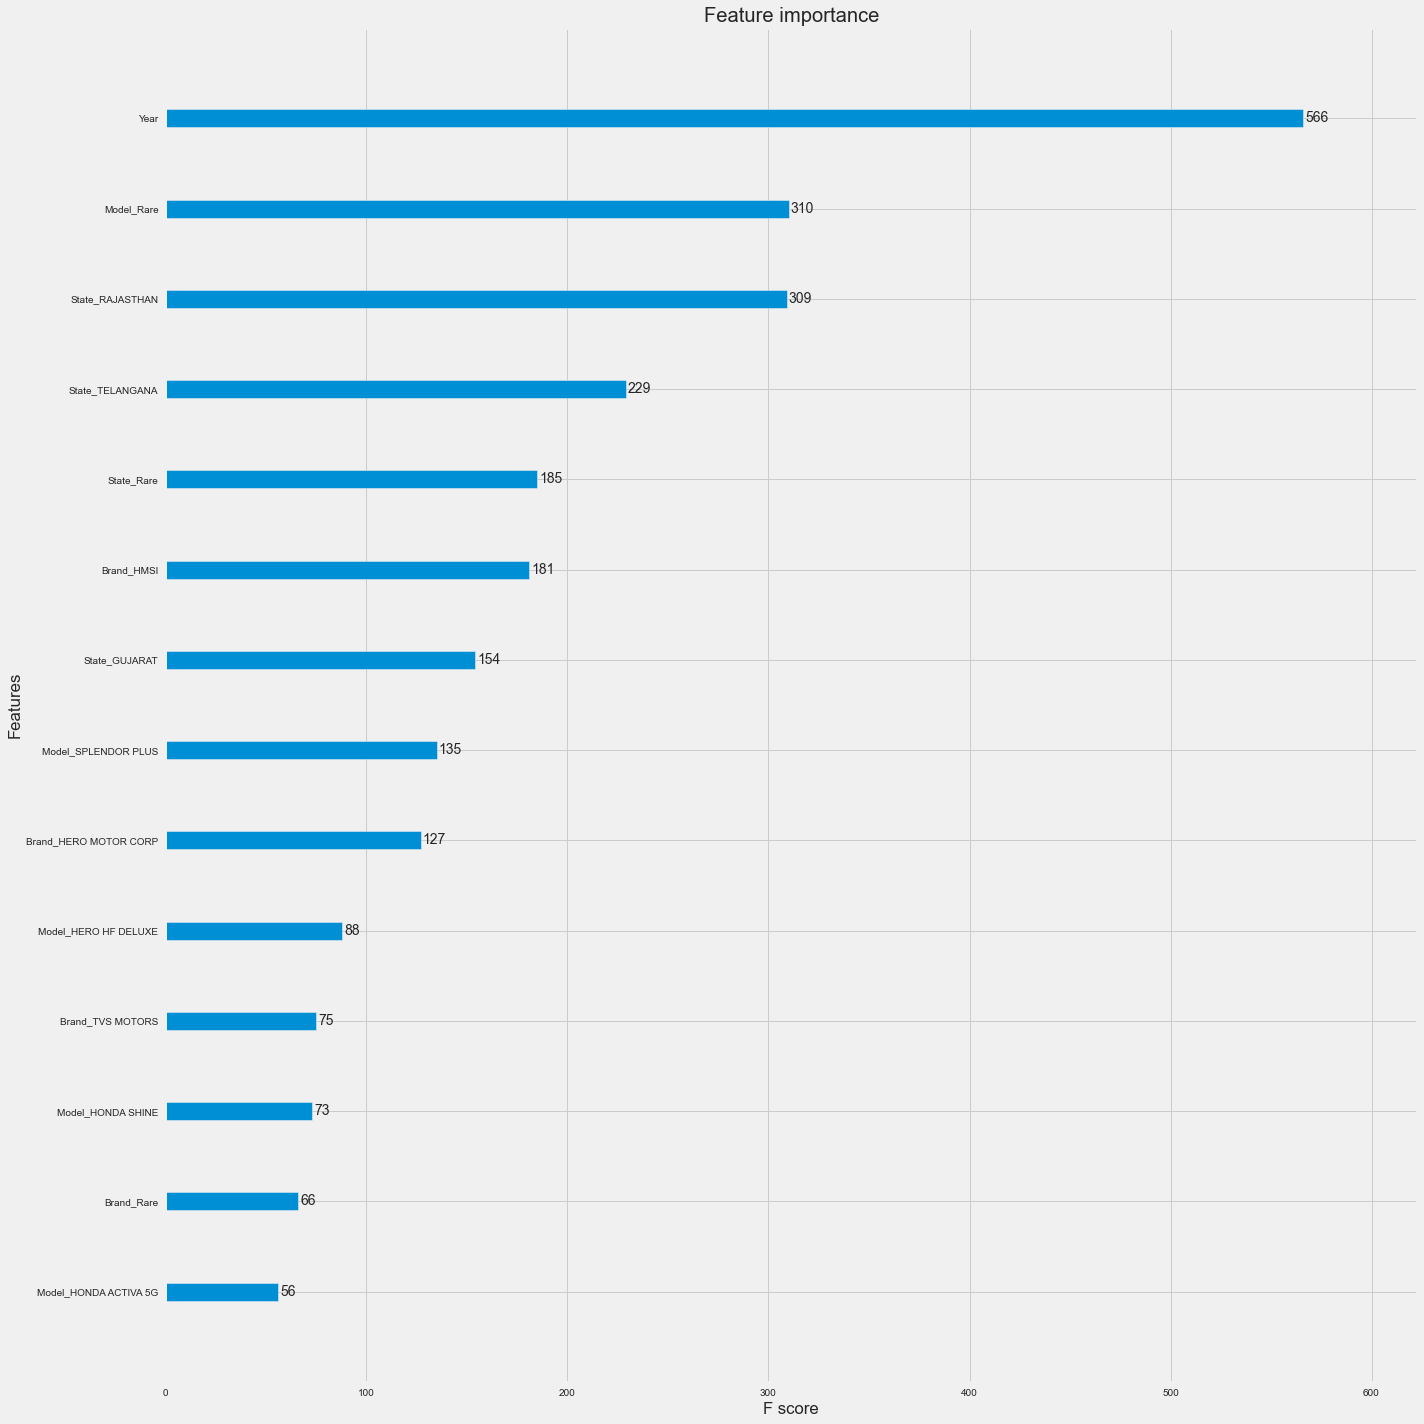

In [641]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [20, 20]
plt.tight_layout()
plt.savefig('XGBoost-Features-Importance.jpg')
plt.show();

## Conclusion

In [642]:
report = pd.DataFrame(all_data,columns=['Encoding_Method','MSLE','Root MSLE','R2 Score','Accuracy','Model'])
report = report[['Model','Encoding_Method', 'MSLE', 'Root MSLE', 'R2 Score', 'Accuracy']]

In [646]:
report.sort_values(by=['Accuracy'],ascending=False,ignore_index=True)

Model  Encoding_Method      MSLE  Root MSLE      R2 Score  \
0        RF Regressor         MEAN_ENC  0.015805   0.125717  6.048277e-01   
1        RF Regressor  ORDERED_INT_ENC  0.015980   0.126412  6.020507e-01   
2        RF Regressor              OHE  0.016229   0.127394  5.881405e-01   
3    Lasso Regression              OHE  0.015292   0.123661  5.937247e-01   
4    Ridge Regression              OHE  0.015356   0.123918  5.912688e-01   
..                ...              ...       ...        ...           ...   
59   Lasso Regression          INT_ENC  0.031878   0.178544  9.754304e-02   
60  Linear Regression          INT_ENC  0.031878   0.178544  9.754303e-02   
61  Bagging Regressor        COUNT_ENC  0.033522   0.183089  7.523498e-02   
62  Bagging Regressor    FREQUENCY_ENC  0.033522   0.183089  7.523498e-02   
63  Linear Regression              OHE  7.685155   2.772211 -1.058217e+21   

        Accuracy  
0   6.000000e+01  
1   6.000000e+01  
2   5.900000e+01  
3   5.900000e+01  
4   5.900000e+01  
..           ...  
59  1.000000e+01  
60  1.000000e+01  
61  8.000000e+00  
62  8.000000e+00  
63 -1.058217e+23  

[64 rows x 6 columns]

In [649]:
# We can choose Random Forest Regressor with Mean Encoding (or) Ordered Integer Encoding Technique 

In [729]:
regressor = RandomForestRegressor()

In [730]:
n_estimators = [100,200,300,400,500]
min_samples_leaf=[1,2,3,4]
max_features = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
oob_score = [True,False]

# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators': n_estimators,
    'min_samples_leaf':min_samples_leaf,
    'max_features':max_features,
    'oob_score':oob_score
    }

In [731]:
from sklearn.model_selection import RandomizedSearchCV
# Set up the random search with 4-fold cross validation
random_cv = RandomizedSearchCV(estimator=regressor,
            param_distributions=hyperparameter_grid,
            cv=10, n_iter=50,
            scoring = 'r2',n_jobs = 4,
            verbose = 5, 
            return_train_score = True,
            random_state=42)

In [732]:
random_cv.fit(mean_enc_train,y_train)

Fitting 10 folds for each of 50 candidates, totalling 500 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:   10.4s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:   37.4s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:  1.5min
[Parallel(n_jobs=4)]: Done 280 tasks      | elapsed:  2.6min
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:  3.9min
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:  4.3min finished


RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                             

In [733]:
random_cv.best_score_

0.6673982846507118

In [734]:
random_cv.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=0.6, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=2,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=True,
                      random_state=None, verbose=0, warm_start=False)

In [735]:
regressor = RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=0.6, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=2,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=True,
                      random_state=None, verbose=0, warm_start=False)

In [736]:
regressor.fit(mean_enc_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=0.6, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=2,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=True,
                      random_state=None, verbose=0, warm_start=False)

In [738]:
from sklearn.externals import joblib 
  
# Save the model as a pickle in a file 
joblib.dump(regressor, 'mean_enc_rf_reg.pkl') 
  
# Load the model from the file 
rf_from_joblib = joblib.load('mean_enc_rf_reg.pkl')  
  
# Use the loaded model to make predictions 
rf_from_joblib.predict(mean_enc_test_filled) 

array([39767.37975093, 44645.66811848, 29055.86961415, 53958.3231887 ,
       46664.97608533, 32658.71921998, 33641.30028899, 43421.34240091,
       44645.66811848, 40202.88554685, 46954.41621095, 27405.71804095,
       39368.91696343, 43131.38886962, 32413.0679231 , 40760.71362448,
       40202.88554685, 46433.65749753, 39500.43887742, 39313.31772915,
       41254.25761484, 45839.85030372, 45839.85030372, 46903.22412661,
       52479.14174335, 31926.79507576, 33622.38387674, 46903.22412661,
       33429.59070642, 37561.53608919, 39313.31772915, 40202.88554685,
       40939.08031708, 33883.95111459, 41976.4106007 , 46433.65749753,
       45901.66773419, 43939.13914499, 34930.75781576, 29761.26302357,
       44132.19072955, 39313.31772915, 40202.88554685, 39313.31772915,
       33361.75732734, 45839.85030372, 39313.31772915, 38771.67271354,
       46527.44645423, 44645.66811848, 51449.31900834, 44645.66811848,
       61090.9036075 , 41893.14271046, 31926.79507576, 49505.87243358,
      

In [739]:
regressor.predict(np.asarray(mean_enc_test_filled.iloc[2]).reshape(1,-1))

array([29055.86961415])

### References:

https://machinelearningmastery.com/standardscaler-and-minmaxscaler-transforms-in-python/

https://machinelearningmastery.com/lasso-regression-with-python/
https://chrisalbon.com/machine_learning/linear_regression/effect_of_alpha_on_lasso_regression/#:~:text=The%20math%20behind%20it%20is,coefficients%20as%20a%20linear%20regression.